In [1]:
import pandas as pd
import numpy as np
import os
import time
import glob
import csv

from scipy.io import wavfile, savemat
from scipy.fft import fft, fftfreq
from scipy import signal
from scipy.fft import fftshift
from scipy.io import loadmat
from sklearn.model_selection import train_test_split
from lazypredict.Supervised import LazyClassifier
from sklearn import preprocessing

import mne
import librosa
import pymatreader
import yasa
import seaborn as sns
from yasa import sliding_window


import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable
import matplotlib
%matplotlib inline

In [ ]:
# Set gpu as backend
import tensorflow as tf
import keras
config = tf.compat.v1.ConfigProto()
sess = tf.compat.v1.Session(config=config)
keras.backend.set_session(sess)

In [2]:
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

2023-03-25 22:36:53.258022: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-25 22:36:53.431267: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-03-25 22:36:54.298207: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda-11.4/lib64/stubs:/usr/local/cuda-11.4/lib64::/home/shivam/anaconda3/lib

In [12]:
! pip install cuml

  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [34 lines of output]
      running bdist_wheel
      running build
      /home/shivam/anaconda3/lib/python3.9/site-packages/setuptools/command/install.py:34: SetuptoolsDeprecationWarning: setup.py install is deprecated. Use build and pip and other standards-based tools.
        warnings.warn(
      installing to build/bdist.linux-x86_64/wheel
      running install
      Traceback (most recent call last):
        File "<string>", line 2, in <module>
        File "<pip-setuptools-caller>", line 34, in <module>
        File "/tmp/pip-install-obamwe7p/cuml_411bf19623f149259634cfc43dfabe7b/setup.py", line 18, in <module>
          setup(name=pkg,
        File "/home/shivam/anaconda3/lib/python3.9/site-packages/setuptools/__init__.py", line 87, in setup
          return distutils.core.setup(**attrs)
        File "/home/shivam/anaco

In [11]:
mne.__version__

'1.3.0'

# Saving preprocessed data as csv

In [2]:
os.chdir("/mnt/sda1/shivam/DrummingEEG/FullStudyData/Preprocessed/temp")
processed = glob.glob("*.npy")
for file in processed:
    data = np.load(file)
    print(data.shape)

(29965, 64)
(29970, 64)
(29986, 64)
(29990, 64)
(29992, 64)
(30002, 64)
(29972, 64)
(29986, 64)
(29986, 64)
(29969, 64)
(29986, 64)
(29990, 64)
(29990, 64)
(30000, 64)
(29971, 64)
(29998, 64)
(29986, 64)
(29999, 64)
(29987, 64)
(29987, 64)
(29972, 64)
(30002, 64)
(29987, 64)
(29989, 64)
(29986, 64)
(29972, 64)
(30001, 64)
(29971, 64)
(30003, 64)
(29984, 64)
(29985, 64)
(29972, 64)
(30003, 64)
(29999, 64)
(29990, 64)
(29989, 64)
(29959, 64)
(29969, 64)
(29986, 64)
(29973, 64)
(29971, 64)
(29983, 64)
(29987, 64)
(29970, 64)
(29990, 64)
(29973, 64)
(29986, 64)
(29989, 64)
(29970, 64)
(29972, 64)
(29963, 64)
(30001, 64)
(30003, 64)
(29990, 64)
(29983, 64)
(29976, 64)
(29983, 64)
(29986, 64)
(29979, 64)
(29970, 64)
(29976, 64)
(29953, 64)
(29983, 64)
(29990, 64)
(29979, 64)
(30003, 64)
(29973, 64)
(29969, 64)
(29985, 64)
(29976, 64)
(29990, 64)
(29989, 64)
(29988, 64)
(29985, 64)
(30000, 64)
(29982, 64)
(29984, 64)
(30018, 64)
(29993, 64)
(29920, 64)
(29993, 64)
(29972, 64)
(29987, 64)
(299

In [3]:
channels = np.array([[x] for x in range(1, 65)])
# channels

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12],
       [13],
       [14],
       [15],
       [16],
       [17],
       [18],
       [19],
       [20],
       [21],
       [22],
       [23],
       [24],
       [25],
       [26],
       [27],
       [28],
       [29],
       [30],
       [31],
       [32],
       [33],
       [34],
       [35],
       [36],
       [37],
       [38],
       [39],
       [40],
       [41],
       [42],
       [43],
       [44],
       [45],
       [46],
       [47],
       [48],
       [49],
       [50],
       [51],
       [52],
       [53],
       [54],
       [55],
       [56],
       [57],
       [58],
       [59],
       [60],
       [61],
       [62],
       [63],
       [64]])

In [15]:
os.chdir("/mnt/sda1/shivam/DrummingEEG/FullStudyData/Preprocessed/temp")
processed = glob.glob("*.npy")
req_length = 30000

# eeg_df = []

channels = np.array([[x] for x in range(1, 65)])

for file in processed:
    
    # Acquiring the name of the file
    name_split = file.split("_")
    
    # Creating columns
    pname = np.array([[name_split[0]]] * 64)
    beatname = np.array([[name_split[1]]] * 64)
    trialnum = np.array([[name_split[2]]] * 64)
    rating = np.array([[name_split[3][:-4]]] * 64)
    
    # Standardizing the data
    target = np.zeros((req_length, 64))
    data = np.load(file)
    
    if data.shape[0] < req_length:
        target[:data.shape[0], :data.shape[1]] = data
    if data.shape[0] > req_length:
        target = data[:req_length, :]
    if data.shape[0] == req_length:
        target = data
        
    # Creating list for dataframe
    p_eeg = target.T
    p_eeg = np.append(p_eeg, pname, axis=1)
    p_eeg = np.append(p_eeg, beatname, axis=1)
    p_eeg = np.append(p_eeg, trialnum, axis=1)
    p_eeg = np.append(p_eeg, rating, axis=1)
    p_eeg = np.append(p_eeg, channels, axis=1)
    
    
    with open('clean_drumming.csv','a') as f1:
        writer=csv.writer(f1, delimiter=',',lineterminator='\n',)
        for row in p_eeg:
            writer.writerow(row)


In [35]:
os.chdir("/mnt/sda1/shivam/DrummingEEG/FullStudyData/Preprocessed/csv")
dataset = pd.read_csv("drumming_clean_csv.csv")
dataset

1             2             3             4             5  \
0     -10440.162109 -10424.821289 -10401.626953 -10376.078125 -10343.244141   
1      -3692.168701  -3678.727539  -3654.859863  -3627.355469  -3594.214844   
2      -3742.145264  -3726.562500  -3702.301270  -3673.696533  -3637.745605   
3       1121.457886   1133.348755   1153.574951   1176.409668   1202.249023   
4      -6571.812988  -6561.331543  -6535.538086  -6505.833008  -6472.849609   
...             ...           ...           ...           ...           ...   
32635  -1985.310913  -1986.926880  -1991.454346  -1993.042480  -1984.090576   
32636  -5384.934570  -5394.950195  -5395.732910  -5389.854004  -5389.158203   
32637   5273.817383   5270.714355   5271.045898   5275.425781   5275.548340   
32638   -589.483093   -590.686951   -589.906250   -583.891541   -583.473450   
32639  -8982.636719  -8983.219727  -8982.476562  -8976.010742  -8974.241211   

                  6             7             8             9            10  \
0     -10321.076172 -10305.493164 -10296.353516 -10289.977539 -10292.373047   
1      -3572.022217  -3556.378418  -3545.014648  -3540.080322  -3543.705322   
2      -3618.757324  -3603.936523  -3593.318604  -3587.173096  -3591.902588   
3       1219.136353   1229.367310   1236.980469   1240.882446   1239.306885   
4      -6450.255371  -6430.916504  -6418.420898  -6411.930664  -6415.750488   
...             ...           ...           ...           ...           ...   
32635  -1981.792847  -1985.121338  -1988.244751  -1989.471313  -1992.438965   
32636  -5379.987305  -5377.458984  -5376.545898  -5379.188965  -5385.891602   
32637   5282.632812   5284.975586   5285.363281   5285.842285   5278.759277   
32638   -580.783386   -579.187134   -577.511414   -581.997375   -588.927002   
32639  -8971.620117  -8968.684570  -8970.364258  -8973.845703  -8980.109375   

       ...  29996  29997  29998  29999  30000  Subject  Drumbeat  Trial  \
0      ...    0.0    0.0    0.0    0.0    0.0   Drum10    drum06      2   
1      ...    0.0    0.0    0.0    0.0    0.0   Drum10    drum06      2   
2      ...    0.0    0.0    0.0    0.0    0.0   Drum10    drum06      2   
3      ...    0.0    0.0    0.0    0.0    0.0   Drum10    drum06      2   
4      ...    0.0    0.0    0.0    0.0    0.0   Drum10    drum06      2   
...    ...    ...    ...    ...    ...    ...      ...       ...    ...   
32635  ...    0.0    0.0    0.0    0.0    0.0   Drum15    drum10      1   
32636  ...    0.0    0.0    0.0    0.0    0.0   Drum15    drum10      1   
32637  ...    0.0    0.0    0.0    0.0    0.0   Drum15    drum10      1   
32638  ...    0.0    0.0    0.0    0.0    0.0   Drum15    drum10      1   
32639  ...    0.0    0.0    0.0    0.0    0.0   Drum15    drum10      1   

       Pleasantness  Channel  
0                 9        1  
1                 9        2  
2                 9        3  
3                 9        4  
4                 9        5  
...             ...      ...  
32635             3       60  
32636             3       61  
32637             3       62  
32638             3       63  
32639             3       64  

[32640 rows x 30005 columns]

In [36]:
temp = dataset[(dataset["Subject"] == "Drum10") & (dataset["Trial"] == 1) & (dataset["Drumbeat"] == "drum02")].iloc[:, :-5]
temp

1             2             3             4             5  \
14976 -11077.245117 -11075.110352 -11084.420898 -11096.197266 -11106.370117   
14977  -4560.022461  -4563.587402  -4575.093262  -4586.915527  -4601.056152   
14978  -4915.853516  -4917.765625  -4927.064941  -4938.857422  -4952.376953   
14979    -63.791847    -65.953705    -74.066185    -82.538559    -91.980858   
14980  -6554.828125  -6553.922852  -6563.278320  -6579.979004  -6597.385742   
...             ...           ...           ...           ...           ...   
15035  -8365.433594  -8365.080078  -8371.021484  -8379.511719  -8391.377930   
15036 -11401.130859 -11398.298828 -11405.861328 -11422.323242 -11432.672852   
15037  -3637.457275  -3639.520020  -3647.957031  -3662.013184  -3674.406494   
15038   -752.594177   -758.045898   -770.729370   -783.055481   -795.330322   
15039  -7576.610352  -7580.523437  -7592.539062  -7602.485352  -7616.377441   

                  6             7             8             9            10  \
14976 -11118.198242 -11128.312500 -11142.846680 -11148.849609 -11156.189453   
14977  -4613.922363  -4624.321777  -4636.851562  -4645.009766  -4655.595703   
14978  -4964.522461  -4977.053223  -4989.155273  -4997.008789  -5005.673828   
14979   -100.375092   -108.247169   -116.565353   -122.455032   -130.948532   
14980  -6611.495117  -6621.365234  -6635.534668  -6638.792969  -6648.260254   
...             ...           ...           ...           ...           ...   
15035  -8403.945312  -8414.588867  -8427.856445  -8435.202148  -8445.209961   
15036 -11443.770508 -11458.117188 -11470.313477 -11475.988281 -11481.208008   
15037  -3689.114258  -3703.236572  -3714.301514  -3721.144531  -3728.820801   
15038   -807.082092   -819.722107   -824.878784   -838.717712   -853.480469   
15039  -7629.717285  -7639.896973  -7650.333008  -7658.827637  -7669.123535   

       ...  29991  29992  29993  29994  29995  29996  29997  29998  29999  \
14976  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
14977  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
14978  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
14979  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
14980  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
...    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
15035  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
15036  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
15037  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
15038  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
15039  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

       30000  
14976    0.0  
14977    0.0  
14978    0.0  
14979    0.0  
14980    0.0  
...      ...  
15035    0.0  
15036    0.0  
15037    0.0  
15038    0.0  
15039    0.0  

[64 rows x 30000 columns]

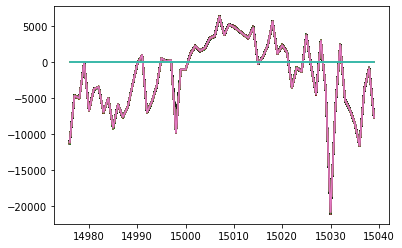

In [38]:
plt.plot(temp)
plt.show()

# Analysis

Trial x electrode x stimuli x time

Drumbeat prediction for individual channals and time-steps (1s, 3s and 5s)

1. Predict drumbeat via each electrode.

    1.1. In time domain
    
    1.2. In frequency domain
    
    
2. Predict drumbeat via different time steps of 1s, 3s, and 5s.

    2.1. Time domain
    
    2.2. Frequency domain
    


### Prediction electrode-wise

In [64]:
for chan in range(1, 65):
    # 64 models
    X = dataset[dataset["Channel"] == chan].iloc[:, :-5].to_numpy()
    y = np.array(dataset[dataset["Channel"] == chan].iloc[: , -4])
    X_train, X_eval, y_train, y_eval = train_test_split(X, y, test_size=0.2, random_state=42)
    clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
    models, predictions = clf.fit(X_train, X_eval, y_train, y_eval)
    print("Channel: ", chan)
    print(models)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 29/29 [31:38<00:00, 65.47s/it]


Channel:  1
                               Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                          
LogisticRegression                 0.13               0.14    None      0.10   
RidgeClassifier                    0.14               0.13    None      0.15   
LinearSVC                          0.11               0.10    None      0.10   
RidgeClassifierCV                  0.10               0.09    None      0.09   
ExtraTreeClassifier                0.08               0.08    None      0.07   
BaggingClassifier                  0.09               0.08    None      0.09   
NuSVC                              0.09               0.08    None      0.09   
NearestCentroid                    0.08               0.08    None      0.08   
Perceptron                         0.07               0.07    None      0.02   
CalibratedClassifierCV             0.07               0.07    None      0.06   
LabelPropagation            

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 29/29 [32:51<00:00, 67.99s/it]


Channel:  2
                               Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                          
RidgeClassifierCV                  0.14               0.13    None      0.15   
LinearSVC                          0.10               0.09    None      0.10   
PassiveAggressiveClassifier        0.09               0.09    None      0.04   
LinearDiscriminantAnalysis         0.10               0.09    None      0.10   
RidgeClassifier                    0.10               0.09    None      0.11   
DecisionTreeClassifier             0.10               0.09    None      0.11   
LogisticRegression                 0.09               0.09    None      0.08   
LGBMClassifier                     0.09               0.09    None      0.09   
ExtraTreeClassifier                0.08               0.08    None      0.08   
QuadraticDiscriminantAnalysis      0.09               0.08    None      0.08   
Perceptron                  

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 29/29 [33:19<00:00, 68.94s/it]


Channel:  3
                               Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                          
ExtraTreesClassifier               0.11               0.11    None      0.10   
RidgeClassifier                    0.11               0.10    None      0.12   
ExtraTreeClassifier                0.11               0.10    None      0.12   
BaggingClassifier                  0.11               0.09    None      0.11   
LGBMClassifier                     0.11               0.09    None      0.11   
SGDClassifier                      0.08               0.09    None      0.03   
RidgeClassifierCV                  0.09               0.08    None      0.11   
AdaBoostClassifier                 0.08               0.08    None      0.06   
LabelPropagation                   0.08               0.08    None      0.08   
LabelSpreading                     0.08               0.08    None      0.08   
DecisionTreeClassifier      

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 29/29 [34:46<00:00, 71.94s/it]


Channel:  4
                               Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                          
CalibratedClassifierCV             0.14               0.15    None      0.12   
RidgeClassifier                    0.14               0.15    None      0.12   
RidgeClassifierCV                  0.13               0.13    None      0.12   
SGDClassifier                      0.09               0.10    None      0.05   
LogisticRegression                 0.10               0.10    None      0.10   
PassiveAggressiveClassifier        0.09               0.10    None      0.07   
DecisionTreeClassifier             0.08               0.07    None      0.07   
QuadraticDiscriminantAnalysis      0.06               0.07    None      0.04   
LinearSVC                          0.07               0.07    None      0.07   
LinearDiscriminantAnalysis         0.06               0.07    None      0.06   
DummyClassifier             

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 29/29 [35:15<00:00, 72.95s/it]


Channel:  5
                               Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                          
LinearDiscriminantAnalysis         0.12               0.12    None      0.12   
DecisionTreeClassifier             0.11               0.11    None      0.11   
LinearSVC                          0.10               0.10    None      0.07   
LGBMClassifier                     0.10               0.10    None      0.10   
LogisticRegression                 0.10               0.09    None      0.10   
AdaBoostClassifier                 0.09               0.09    None      0.08   
PassiveAggressiveClassifier        0.08               0.08    None      0.03   
RidgeClassifierCV                  0.09               0.08    None      0.10   
QuadraticDiscriminantAnalysis      0.07               0.08    None      0.06   
SVC                                0.06               0.07    None      0.03   
DummyClassifier             

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 29/29 [34:08<00:00, 70.62s/it]


Channel:  6
                               Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                          
QuadraticDiscriminantAnalysis      0.12               0.12    None      0.11   
LinearSVC                          0.12               0.11    None      0.09   
LGBMClassifier                     0.12               0.10    None      0.12   
RidgeClassifierCV                  0.11               0.10    None      0.11   
RidgeClassifier                    0.11               0.10    None      0.11   
CalibratedClassifierCV             0.09               0.10    None      0.06   
BaggingClassifier                  0.10               0.10    None      0.10   
Perceptron                         0.08               0.08    None      0.05   
AdaBoostClassifier                 0.08               0.07    None      0.09   
LogisticRegression                 0.08               0.07    None      0.07   
NearestCentroid             

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 29/29 [35:37<00:00, 73.72s/it]


Channel:  7
                               Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                          
RidgeClassifier                    0.12               0.12    None      0.12   
QuadraticDiscriminantAnalysis      0.12               0.12    None      0.11   
LogisticRegression                 0.11               0.11    None      0.11   
RidgeClassifierCV                  0.10               0.10    None      0.09   
PassiveAggressiveClassifier        0.10               0.10    None      0.05   
LinearDiscriminantAnalysis         0.09               0.10    None      0.08   
CalibratedClassifierCV             0.08               0.09    None      0.06   
BaggingClassifier                  0.09               0.08    None      0.09   
SGDClassifier                      0.08               0.08    None      0.02   
Perceptron                         0.08               0.08    None      0.02   
LinearSVC                   

 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████    | 28/29 [32:04<01:08, 68.74s/it]


KeyboardInterrupt: 

In [90]:
eeg, beat, chan = [], [], []
for i in range(32640):
    row = np.array(dataset.iloc[i, :-5])
    epochs = sliding_window(row, sf=1000, window=1)[1]
    eeg.append(epochs)
    beat.append([dataset.iloc[i, -4]] * 30)
    chan.append([dataset.iloc[i, -1]] * 30)
    print(len(eeg), eeg[-1].shape, len(beat), len(beat[-1]))

1 (30, 1000) 1 30
2 (30, 1000) 2 30
3 (30, 1000) 3 30
4 (30, 1000) 4 30
5 (30, 1000) 5 30
6 (30, 1000) 6 30
7 (30, 1000) 7 30
8 (30, 1000) 8 30
9 (30, 1000) 9 30
10 (30, 1000) 10 30
11 (30, 1000) 11 30
12 (30, 1000) 12 30
13 (30, 1000) 13 30
14 (30, 1000) 14 30
15 (30, 1000) 15 30
16 (30, 1000) 16 30
17 (30, 1000) 17 30
18 (30, 1000) 18 30
19 (30, 1000) 19 30
20 (30, 1000) 20 30
21 (30, 1000) 21 30
22 (30, 1000) 22 30
23 (30, 1000) 23 30
24 (30, 1000) 24 30
25 (30, 1000) 25 30
26 (30, 1000) 26 30
27 (30, 1000) 27 30
28 (30, 1000) 28 30
29 (30, 1000) 29 30
30 (30, 1000) 30 30
31 (30, 1000) 31 30
32 (30, 1000) 32 30
33 (30, 1000) 33 30
34 (30, 1000) 34 30
35 (30, 1000) 35 30
36 (30, 1000) 36 30
37 (30, 1000) 37 30
38 (30, 1000) 38 30
39 (30, 1000) 39 30
40 (30, 1000) 40 30
41 (30, 1000) 41 30
42 (30, 1000) 42 30
43 (30, 1000) 43 30
44 (30, 1000) 44 30
45 (30, 1000) 45 30
46 (30, 1000) 46 30
47 (30, 1000) 47 30
48 (30, 1000) 48 30
49 (30, 1000) 49 30
50 (30, 1000) 50 30
51 (30, 1000) 51 3

384 (30, 1000) 384 30
385 (30, 1000) 385 30
386 (30, 1000) 386 30
387 (30, 1000) 387 30
388 (30, 1000) 388 30
389 (30, 1000) 389 30
390 (30, 1000) 390 30
391 (30, 1000) 391 30
392 (30, 1000) 392 30
393 (30, 1000) 393 30
394 (30, 1000) 394 30
395 (30, 1000) 395 30
396 (30, 1000) 396 30
397 (30, 1000) 397 30
398 (30, 1000) 398 30
399 (30, 1000) 399 30
400 (30, 1000) 400 30
401 (30, 1000) 401 30
402 (30, 1000) 402 30
403 (30, 1000) 403 30
404 (30, 1000) 404 30
405 (30, 1000) 405 30
406 (30, 1000) 406 30
407 (30, 1000) 407 30
408 (30, 1000) 408 30
409 (30, 1000) 409 30
410 (30, 1000) 410 30
411 (30, 1000) 411 30
412 (30, 1000) 412 30
413 (30, 1000) 413 30
414 (30, 1000) 414 30
415 (30, 1000) 415 30
416 (30, 1000) 416 30
417 (30, 1000) 417 30
418 (30, 1000) 418 30
419 (30, 1000) 419 30
420 (30, 1000) 420 30
421 (30, 1000) 421 30
422 (30, 1000) 422 30
423 (30, 1000) 423 30
424 (30, 1000) 424 30
425 (30, 1000) 425 30
426 (30, 1000) 426 30
427 (30, 1000) 427 30
428 (30, 1000) 428 30
429 (30, 1

775 (30, 1000) 775 30
776 (30, 1000) 776 30
777 (30, 1000) 777 30
778 (30, 1000) 778 30
779 (30, 1000) 779 30
780 (30, 1000) 780 30
781 (30, 1000) 781 30
782 (30, 1000) 782 30
783 (30, 1000) 783 30
784 (30, 1000) 784 30
785 (30, 1000) 785 30
786 (30, 1000) 786 30
787 (30, 1000) 787 30
788 (30, 1000) 788 30
789 (30, 1000) 789 30
790 (30, 1000) 790 30
791 (30, 1000) 791 30
792 (30, 1000) 792 30
793 (30, 1000) 793 30
794 (30, 1000) 794 30
795 (30, 1000) 795 30
796 (30, 1000) 796 30
797 (30, 1000) 797 30
798 (30, 1000) 798 30
799 (30, 1000) 799 30
800 (30, 1000) 800 30
801 (30, 1000) 801 30
802 (30, 1000) 802 30
803 (30, 1000) 803 30
804 (30, 1000) 804 30
805 (30, 1000) 805 30
806 (30, 1000) 806 30
807 (30, 1000) 807 30
808 (30, 1000) 808 30
809 (30, 1000) 809 30
810 (30, 1000) 810 30
811 (30, 1000) 811 30
812 (30, 1000) 812 30
813 (30, 1000) 813 30
814 (30, 1000) 814 30
815 (30, 1000) 815 30
816 (30, 1000) 816 30
817 (30, 1000) 817 30
818 (30, 1000) 818 30
819 (30, 1000) 819 30
820 (30, 1

1148 (30, 1000) 1148 30
1149 (30, 1000) 1149 30
1150 (30, 1000) 1150 30
1151 (30, 1000) 1151 30
1152 (30, 1000) 1152 30
1153 (30, 1000) 1153 30
1154 (30, 1000) 1154 30
1155 (30, 1000) 1155 30
1156 (30, 1000) 1156 30
1157 (30, 1000) 1157 30
1158 (30, 1000) 1158 30
1159 (30, 1000) 1159 30
1160 (30, 1000) 1160 30
1161 (30, 1000) 1161 30
1162 (30, 1000) 1162 30
1163 (30, 1000) 1163 30
1164 (30, 1000) 1164 30
1165 (30, 1000) 1165 30
1166 (30, 1000) 1166 30
1167 (30, 1000) 1167 30
1168 (30, 1000) 1168 30
1169 (30, 1000) 1169 30
1170 (30, 1000) 1170 30
1171 (30, 1000) 1171 30
1172 (30, 1000) 1172 30
1173 (30, 1000) 1173 30
1174 (30, 1000) 1174 30
1175 (30, 1000) 1175 30
1176 (30, 1000) 1176 30
1177 (30, 1000) 1177 30
1178 (30, 1000) 1178 30
1179 (30, 1000) 1179 30
1180 (30, 1000) 1180 30
1181 (30, 1000) 1181 30
1182 (30, 1000) 1182 30
1183 (30, 1000) 1183 30
1184 (30, 1000) 1184 30
1185 (30, 1000) 1185 30
1186 (30, 1000) 1186 30
1187 (30, 1000) 1187 30
1188 (30, 1000) 1188 30
1189 (30, 1000) 

1504 (30, 1000) 1504 30
1505 (30, 1000) 1505 30
1506 (30, 1000) 1506 30
1507 (30, 1000) 1507 30
1508 (30, 1000) 1508 30
1509 (30, 1000) 1509 30
1510 (30, 1000) 1510 30
1511 (30, 1000) 1511 30
1512 (30, 1000) 1512 30
1513 (30, 1000) 1513 30
1514 (30, 1000) 1514 30
1515 (30, 1000) 1515 30
1516 (30, 1000) 1516 30
1517 (30, 1000) 1517 30
1518 (30, 1000) 1518 30
1519 (30, 1000) 1519 30
1520 (30, 1000) 1520 30
1521 (30, 1000) 1521 30
1522 (30, 1000) 1522 30
1523 (30, 1000) 1523 30
1524 (30, 1000) 1524 30
1525 (30, 1000) 1525 30
1526 (30, 1000) 1526 30
1527 (30, 1000) 1527 30
1528 (30, 1000) 1528 30
1529 (30, 1000) 1529 30
1530 (30, 1000) 1530 30
1531 (30, 1000) 1531 30
1532 (30, 1000) 1532 30
1533 (30, 1000) 1533 30
1534 (30, 1000) 1534 30
1535 (30, 1000) 1535 30
1536 (30, 1000) 1536 30
1537 (30, 1000) 1537 30
1538 (30, 1000) 1538 30
1539 (30, 1000) 1539 30
1540 (30, 1000) 1540 30
1541 (30, 1000) 1541 30
1542 (30, 1000) 1542 30
1543 (30, 1000) 1543 30
1544 (30, 1000) 1544 30
1545 (30, 1000) 

1856 (30, 1000) 1856 30
1857 (30, 1000) 1857 30
1858 (30, 1000) 1858 30
1859 (30, 1000) 1859 30
1860 (30, 1000) 1860 30
1861 (30, 1000) 1861 30
1862 (30, 1000) 1862 30
1863 (30, 1000) 1863 30
1864 (30, 1000) 1864 30
1865 (30, 1000) 1865 30
1866 (30, 1000) 1866 30
1867 (30, 1000) 1867 30
1868 (30, 1000) 1868 30
1869 (30, 1000) 1869 30
1870 (30, 1000) 1870 30
1871 (30, 1000) 1871 30
1872 (30, 1000) 1872 30
1873 (30, 1000) 1873 30
1874 (30, 1000) 1874 30
1875 (30, 1000) 1875 30
1876 (30, 1000) 1876 30
1877 (30, 1000) 1877 30
1878 (30, 1000) 1878 30
1879 (30, 1000) 1879 30
1880 (30, 1000) 1880 30
1881 (30, 1000) 1881 30
1882 (30, 1000) 1882 30
1883 (30, 1000) 1883 30
1884 (30, 1000) 1884 30
1885 (30, 1000) 1885 30
1886 (30, 1000) 1886 30
1887 (30, 1000) 1887 30
1888 (30, 1000) 1888 30
1889 (30, 1000) 1889 30
1890 (30, 1000) 1890 30
1891 (30, 1000) 1891 30
1892 (30, 1000) 1892 30
1893 (30, 1000) 1893 30
1894 (30, 1000) 1894 30
1895 (30, 1000) 1895 30
1896 (30, 1000) 1896 30
1897 (30, 1000) 

2210 (30, 1000) 2210 30
2211 (30, 1000) 2211 30
2212 (30, 1000) 2212 30
2213 (30, 1000) 2213 30
2214 (30, 1000) 2214 30
2215 (30, 1000) 2215 30
2216 (30, 1000) 2216 30
2217 (30, 1000) 2217 30
2218 (30, 1000) 2218 30
2219 (30, 1000) 2219 30
2220 (30, 1000) 2220 30
2221 (30, 1000) 2221 30
2222 (30, 1000) 2222 30
2223 (30, 1000) 2223 30
2224 (30, 1000) 2224 30
2225 (30, 1000) 2225 30
2226 (30, 1000) 2226 30
2227 (30, 1000) 2227 30
2228 (30, 1000) 2228 30
2229 (30, 1000) 2229 30
2230 (30, 1000) 2230 30
2231 (30, 1000) 2231 30
2232 (30, 1000) 2232 30
2233 (30, 1000) 2233 30
2234 (30, 1000) 2234 30
2235 (30, 1000) 2235 30
2236 (30, 1000) 2236 30
2237 (30, 1000) 2237 30
2238 (30, 1000) 2238 30
2239 (30, 1000) 2239 30
2240 (30, 1000) 2240 30
2241 (30, 1000) 2241 30
2242 (30, 1000) 2242 30
2243 (30, 1000) 2243 30
2244 (30, 1000) 2244 30
2245 (30, 1000) 2245 30
2246 (30, 1000) 2246 30
2247 (30, 1000) 2247 30
2248 (30, 1000) 2248 30
2249 (30, 1000) 2249 30
2250 (30, 1000) 2250 30
2251 (30, 1000) 

2556 (30, 1000) 2556 30
2557 (30, 1000) 2557 30
2558 (30, 1000) 2558 30
2559 (30, 1000) 2559 30
2560 (30, 1000) 2560 30
2561 (30, 1000) 2561 30
2562 (30, 1000) 2562 30
2563 (30, 1000) 2563 30
2564 (30, 1000) 2564 30
2565 (30, 1000) 2565 30
2566 (30, 1000) 2566 30
2567 (30, 1000) 2567 30
2568 (30, 1000) 2568 30
2569 (30, 1000) 2569 30
2570 (30, 1000) 2570 30
2571 (30, 1000) 2571 30
2572 (30, 1000) 2572 30
2573 (30, 1000) 2573 30
2574 (30, 1000) 2574 30
2575 (30, 1000) 2575 30
2576 (30, 1000) 2576 30
2577 (30, 1000) 2577 30
2578 (30, 1000) 2578 30
2579 (30, 1000) 2579 30
2580 (30, 1000) 2580 30
2581 (30, 1000) 2581 30
2582 (30, 1000) 2582 30
2583 (30, 1000) 2583 30
2584 (30, 1000) 2584 30
2585 (30, 1000) 2585 30
2586 (30, 1000) 2586 30
2587 (30, 1000) 2587 30
2588 (30, 1000) 2588 30
2589 (30, 1000) 2589 30
2590 (30, 1000) 2590 30
2591 (30, 1000) 2591 30
2592 (30, 1000) 2592 30
2593 (30, 1000) 2593 30
2594 (30, 1000) 2594 30
2595 (30, 1000) 2595 30
2596 (30, 1000) 2596 30
2597 (30, 1000) 

2902 (30, 1000) 2902 30
2903 (30, 1000) 2903 30
2904 (30, 1000) 2904 30
2905 (30, 1000) 2905 30
2906 (30, 1000) 2906 30
2907 (30, 1000) 2907 30
2908 (30, 1000) 2908 30
2909 (30, 1000) 2909 30
2910 (30, 1000) 2910 30
2911 (30, 1000) 2911 30
2912 (30, 1000) 2912 30
2913 (30, 1000) 2913 30
2914 (30, 1000) 2914 30
2915 (30, 1000) 2915 30
2916 (30, 1000) 2916 30
2917 (30, 1000) 2917 30
2918 (30, 1000) 2918 30
2919 (30, 1000) 2919 30
2920 (30, 1000) 2920 30
2921 (30, 1000) 2921 30
2922 (30, 1000) 2922 30
2923 (30, 1000) 2923 30
2924 (30, 1000) 2924 30
2925 (30, 1000) 2925 30
2926 (30, 1000) 2926 30
2927 (30, 1000) 2927 30
2928 (30, 1000) 2928 30
2929 (30, 1000) 2929 30
2930 (30, 1000) 2930 30
2931 (30, 1000) 2931 30
2932 (30, 1000) 2932 30
2933 (30, 1000) 2933 30
2934 (30, 1000) 2934 30
2935 (30, 1000) 2935 30
2936 (30, 1000) 2936 30
2937 (30, 1000) 2937 30
2938 (30, 1000) 2938 30
2939 (30, 1000) 2939 30
2940 (30, 1000) 2940 30
2941 (30, 1000) 2941 30
2942 (30, 1000) 2942 30
2943 (30, 1000) 

3252 (30, 1000) 3252 30
3253 (30, 1000) 3253 30
3254 (30, 1000) 3254 30
3255 (30, 1000) 3255 30
3256 (30, 1000) 3256 30
3257 (30, 1000) 3257 30
3258 (30, 1000) 3258 30
3259 (30, 1000) 3259 30
3260 (30, 1000) 3260 30
3261 (30, 1000) 3261 30
3262 (30, 1000) 3262 30
3263 (30, 1000) 3263 30
3264 (30, 1000) 3264 30
3265 (30, 1000) 3265 30
3266 (30, 1000) 3266 30
3267 (30, 1000) 3267 30
3268 (30, 1000) 3268 30
3269 (30, 1000) 3269 30
3270 (30, 1000) 3270 30
3271 (30, 1000) 3271 30
3272 (30, 1000) 3272 30
3273 (30, 1000) 3273 30
3274 (30, 1000) 3274 30
3275 (30, 1000) 3275 30
3276 (30, 1000) 3276 30
3277 (30, 1000) 3277 30
3278 (30, 1000) 3278 30
3279 (30, 1000) 3279 30
3280 (30, 1000) 3280 30
3281 (30, 1000) 3281 30
3282 (30, 1000) 3282 30
3283 (30, 1000) 3283 30
3284 (30, 1000) 3284 30
3285 (30, 1000) 3285 30
3286 (30, 1000) 3286 30
3287 (30, 1000) 3287 30
3288 (30, 1000) 3288 30
3289 (30, 1000) 3289 30
3290 (30, 1000) 3290 30
3291 (30, 1000) 3291 30
3292 (30, 1000) 3292 30
3293 (30, 1000) 

3603 (30, 1000) 3603 30
3604 (30, 1000) 3604 30
3605 (30, 1000) 3605 30
3606 (30, 1000) 3606 30
3607 (30, 1000) 3607 30
3608 (30, 1000) 3608 30
3609 (30, 1000) 3609 30
3610 (30, 1000) 3610 30
3611 (30, 1000) 3611 30
3612 (30, 1000) 3612 30
3613 (30, 1000) 3613 30
3614 (30, 1000) 3614 30
3615 (30, 1000) 3615 30
3616 (30, 1000) 3616 30
3617 (30, 1000) 3617 30
3618 (30, 1000) 3618 30
3619 (30, 1000) 3619 30
3620 (30, 1000) 3620 30
3621 (30, 1000) 3621 30
3622 (30, 1000) 3622 30
3623 (30, 1000) 3623 30
3624 (30, 1000) 3624 30
3625 (30, 1000) 3625 30
3626 (30, 1000) 3626 30
3627 (30, 1000) 3627 30
3628 (30, 1000) 3628 30
3629 (30, 1000) 3629 30
3630 (30, 1000) 3630 30
3631 (30, 1000) 3631 30
3632 (30, 1000) 3632 30
3633 (30, 1000) 3633 30
3634 (30, 1000) 3634 30
3635 (30, 1000) 3635 30
3636 (30, 1000) 3636 30
3637 (30, 1000) 3637 30
3638 (30, 1000) 3638 30
3639 (30, 1000) 3639 30
3640 (30, 1000) 3640 30
3641 (30, 1000) 3641 30
3642 (30, 1000) 3642 30
3643 (30, 1000) 3643 30
3644 (30, 1000) 

3950 (30, 1000) 3950 30
3951 (30, 1000) 3951 30
3952 (30, 1000) 3952 30
3953 (30, 1000) 3953 30
3954 (30, 1000) 3954 30
3955 (30, 1000) 3955 30
3956 (30, 1000) 3956 30
3957 (30, 1000) 3957 30
3958 (30, 1000) 3958 30
3959 (30, 1000) 3959 30
3960 (30, 1000) 3960 30
3961 (30, 1000) 3961 30
3962 (30, 1000) 3962 30
3963 (30, 1000) 3963 30
3964 (30, 1000) 3964 30
3965 (30, 1000) 3965 30
3966 (30, 1000) 3966 30
3967 (30, 1000) 3967 30
3968 (30, 1000) 3968 30
3969 (30, 1000) 3969 30
3970 (30, 1000) 3970 30
3971 (30, 1000) 3971 30
3972 (30, 1000) 3972 30
3973 (30, 1000) 3973 30
3974 (30, 1000) 3974 30
3975 (30, 1000) 3975 30
3976 (30, 1000) 3976 30
3977 (30, 1000) 3977 30
3978 (30, 1000) 3978 30
3979 (30, 1000) 3979 30
3980 (30, 1000) 3980 30
3981 (30, 1000) 3981 30
3982 (30, 1000) 3982 30
3983 (30, 1000) 3983 30
3984 (30, 1000) 3984 30
3985 (30, 1000) 3985 30
3986 (30, 1000) 3986 30
3987 (30, 1000) 3987 30
3988 (30, 1000) 3988 30
3989 (30, 1000) 3989 30
3990 (30, 1000) 3990 30
3991 (30, 1000) 

4295 (30, 1000) 4295 30
4296 (30, 1000) 4296 30
4297 (30, 1000) 4297 30
4298 (30, 1000) 4298 30
4299 (30, 1000) 4299 30
4300 (30, 1000) 4300 30
4301 (30, 1000) 4301 30
4302 (30, 1000) 4302 30
4303 (30, 1000) 4303 30
4304 (30, 1000) 4304 30
4305 (30, 1000) 4305 30
4306 (30, 1000) 4306 30
4307 (30, 1000) 4307 30
4308 (30, 1000) 4308 30
4309 (30, 1000) 4309 30
4310 (30, 1000) 4310 30
4311 (30, 1000) 4311 30
4312 (30, 1000) 4312 30
4313 (30, 1000) 4313 30
4314 (30, 1000) 4314 30
4315 (30, 1000) 4315 30
4316 (30, 1000) 4316 30
4317 (30, 1000) 4317 30
4318 (30, 1000) 4318 30
4319 (30, 1000) 4319 30
4320 (30, 1000) 4320 30
4321 (30, 1000) 4321 30
4322 (30, 1000) 4322 30
4323 (30, 1000) 4323 30
4324 (30, 1000) 4324 30
4325 (30, 1000) 4325 30
4326 (30, 1000) 4326 30
4327 (30, 1000) 4327 30
4328 (30, 1000) 4328 30
4329 (30, 1000) 4329 30
4330 (30, 1000) 4330 30
4331 (30, 1000) 4331 30
4332 (30, 1000) 4332 30
4333 (30, 1000) 4333 30
4334 (30, 1000) 4334 30
4335 (30, 1000) 4335 30
4336 (30, 1000) 

4651 (30, 1000) 4651 30
4652 (30, 1000) 4652 30
4653 (30, 1000) 4653 30
4654 (30, 1000) 4654 30
4655 (30, 1000) 4655 30
4656 (30, 1000) 4656 30
4657 (30, 1000) 4657 30
4658 (30, 1000) 4658 30
4659 (30, 1000) 4659 30
4660 (30, 1000) 4660 30
4661 (30, 1000) 4661 30
4662 (30, 1000) 4662 30
4663 (30, 1000) 4663 30
4664 (30, 1000) 4664 30
4665 (30, 1000) 4665 30
4666 (30, 1000) 4666 30
4667 (30, 1000) 4667 30
4668 (30, 1000) 4668 30
4669 (30, 1000) 4669 30
4670 (30, 1000) 4670 30
4671 (30, 1000) 4671 30
4672 (30, 1000) 4672 30
4673 (30, 1000) 4673 30
4674 (30, 1000) 4674 30
4675 (30, 1000) 4675 30
4676 (30, 1000) 4676 30
4677 (30, 1000) 4677 30
4678 (30, 1000) 4678 30
4679 (30, 1000) 4679 30
4680 (30, 1000) 4680 30
4681 (30, 1000) 4681 30
4682 (30, 1000) 4682 30
4683 (30, 1000) 4683 30
4684 (30, 1000) 4684 30
4685 (30, 1000) 4685 30
4686 (30, 1000) 4686 30
4687 (30, 1000) 4687 30
4688 (30, 1000) 4688 30
4689 (30, 1000) 4689 30
4690 (30, 1000) 4690 30
4691 (30, 1000) 4691 30
4692 (30, 1000) 

4999 (30, 1000) 4999 30
5000 (30, 1000) 5000 30
5001 (30, 1000) 5001 30
5002 (30, 1000) 5002 30
5003 (30, 1000) 5003 30
5004 (30, 1000) 5004 30
5005 (30, 1000) 5005 30
5006 (30, 1000) 5006 30
5007 (30, 1000) 5007 30
5008 (30, 1000) 5008 30
5009 (30, 1000) 5009 30
5010 (30, 1000) 5010 30
5011 (30, 1000) 5011 30
5012 (30, 1000) 5012 30
5013 (30, 1000) 5013 30
5014 (30, 1000) 5014 30
5015 (30, 1000) 5015 30
5016 (30, 1000) 5016 30
5017 (30, 1000) 5017 30
5018 (30, 1000) 5018 30
5019 (30, 1000) 5019 30
5020 (30, 1000) 5020 30
5021 (30, 1000) 5021 30
5022 (30, 1000) 5022 30
5023 (30, 1000) 5023 30
5024 (30, 1000) 5024 30
5025 (30, 1000) 5025 30
5026 (30, 1000) 5026 30
5027 (30, 1000) 5027 30
5028 (30, 1000) 5028 30
5029 (30, 1000) 5029 30
5030 (30, 1000) 5030 30
5031 (30, 1000) 5031 30
5032 (30, 1000) 5032 30
5033 (30, 1000) 5033 30
5034 (30, 1000) 5034 30
5035 (30, 1000) 5035 30
5036 (30, 1000) 5036 30
5037 (30, 1000) 5037 30
5038 (30, 1000) 5038 30
5039 (30, 1000) 5039 30
5040 (30, 1000) 

5358 (30, 1000) 5358 30
5359 (30, 1000) 5359 30
5360 (30, 1000) 5360 30
5361 (30, 1000) 5361 30
5362 (30, 1000) 5362 30
5363 (30, 1000) 5363 30
5364 (30, 1000) 5364 30
5365 (30, 1000) 5365 30
5366 (30, 1000) 5366 30
5367 (30, 1000) 5367 30
5368 (30, 1000) 5368 30
5369 (30, 1000) 5369 30
5370 (30, 1000) 5370 30
5371 (30, 1000) 5371 30
5372 (30, 1000) 5372 30
5373 (30, 1000) 5373 30
5374 (30, 1000) 5374 30
5375 (30, 1000) 5375 30
5376 (30, 1000) 5376 30
5377 (30, 1000) 5377 30
5378 (30, 1000) 5378 30
5379 (30, 1000) 5379 30
5380 (30, 1000) 5380 30
5381 (30, 1000) 5381 30
5382 (30, 1000) 5382 30
5383 (30, 1000) 5383 30
5384 (30, 1000) 5384 30
5385 (30, 1000) 5385 30
5386 (30, 1000) 5386 30
5387 (30, 1000) 5387 30
5388 (30, 1000) 5388 30
5389 (30, 1000) 5389 30
5390 (30, 1000) 5390 30
5391 (30, 1000) 5391 30
5392 (30, 1000) 5392 30
5393 (30, 1000) 5393 30
5394 (30, 1000) 5394 30
5395 (30, 1000) 5395 30
5396 (30, 1000) 5396 30
5397 (30, 1000) 5397 30
5398 (30, 1000) 5398 30
5399 (30, 1000) 

5709 (30, 1000) 5709 30
5710 (30, 1000) 5710 30
5711 (30, 1000) 5711 30
5712 (30, 1000) 5712 30
5713 (30, 1000) 5713 30
5714 (30, 1000) 5714 30
5715 (30, 1000) 5715 30
5716 (30, 1000) 5716 30
5717 (30, 1000) 5717 30
5718 (30, 1000) 5718 30
5719 (30, 1000) 5719 30
5720 (30, 1000) 5720 30
5721 (30, 1000) 5721 30
5722 (30, 1000) 5722 30
5723 (30, 1000) 5723 30
5724 (30, 1000) 5724 30
5725 (30, 1000) 5725 30
5726 (30, 1000) 5726 30
5727 (30, 1000) 5727 30
5728 (30, 1000) 5728 30
5729 (30, 1000) 5729 30
5730 (30, 1000) 5730 30
5731 (30, 1000) 5731 30
5732 (30, 1000) 5732 30
5733 (30, 1000) 5733 30
5734 (30, 1000) 5734 30
5735 (30, 1000) 5735 30
5736 (30, 1000) 5736 30
5737 (30, 1000) 5737 30
5738 (30, 1000) 5738 30
5739 (30, 1000) 5739 30
5740 (30, 1000) 5740 30
5741 (30, 1000) 5741 30
5742 (30, 1000) 5742 30
5743 (30, 1000) 5743 30
5744 (30, 1000) 5744 30
5745 (30, 1000) 5745 30
5746 (30, 1000) 5746 30
5747 (30, 1000) 5747 30
5748 (30, 1000) 5748 30
5749 (30, 1000) 5749 30
5750 (30, 1000) 

6058 (30, 1000) 6058 30
6059 (30, 1000) 6059 30
6060 (30, 1000) 6060 30
6061 (30, 1000) 6061 30
6062 (30, 1000) 6062 30
6063 (30, 1000) 6063 30
6064 (30, 1000) 6064 30
6065 (30, 1000) 6065 30
6066 (30, 1000) 6066 30
6067 (30, 1000) 6067 30
6068 (30, 1000) 6068 30
6069 (30, 1000) 6069 30
6070 (30, 1000) 6070 30
6071 (30, 1000) 6071 30
6072 (30, 1000) 6072 30
6073 (30, 1000) 6073 30
6074 (30, 1000) 6074 30
6075 (30, 1000) 6075 30
6076 (30, 1000) 6076 30
6077 (30, 1000) 6077 30
6078 (30, 1000) 6078 30
6079 (30, 1000) 6079 30
6080 (30, 1000) 6080 30
6081 (30, 1000) 6081 30
6082 (30, 1000) 6082 30
6083 (30, 1000) 6083 30
6084 (30, 1000) 6084 30
6085 (30, 1000) 6085 30
6086 (30, 1000) 6086 30
6087 (30, 1000) 6087 30
6088 (30, 1000) 6088 30
6089 (30, 1000) 6089 30
6090 (30, 1000) 6090 30
6091 (30, 1000) 6091 30
6092 (30, 1000) 6092 30
6093 (30, 1000) 6093 30
6094 (30, 1000) 6094 30
6095 (30, 1000) 6095 30
6096 (30, 1000) 6096 30
6097 (30, 1000) 6097 30
6098 (30, 1000) 6098 30
6099 (30, 1000) 

6411 (30, 1000) 6411 30
6412 (30, 1000) 6412 30
6413 (30, 1000) 6413 30
6414 (30, 1000) 6414 30
6415 (30, 1000) 6415 30
6416 (30, 1000) 6416 30
6417 (30, 1000) 6417 30
6418 (30, 1000) 6418 30
6419 (30, 1000) 6419 30
6420 (30, 1000) 6420 30
6421 (30, 1000) 6421 30
6422 (30, 1000) 6422 30
6423 (30, 1000) 6423 30
6424 (30, 1000) 6424 30
6425 (30, 1000) 6425 30
6426 (30, 1000) 6426 30
6427 (30, 1000) 6427 30
6428 (30, 1000) 6428 30
6429 (30, 1000) 6429 30
6430 (30, 1000) 6430 30
6431 (30, 1000) 6431 30
6432 (30, 1000) 6432 30
6433 (30, 1000) 6433 30
6434 (30, 1000) 6434 30
6435 (30, 1000) 6435 30
6436 (30, 1000) 6436 30
6437 (30, 1000) 6437 30
6438 (30, 1000) 6438 30
6439 (30, 1000) 6439 30
6440 (30, 1000) 6440 30
6441 (30, 1000) 6441 30
6442 (30, 1000) 6442 30
6443 (30, 1000) 6443 30
6444 (30, 1000) 6444 30
6445 (30, 1000) 6445 30
6446 (30, 1000) 6446 30
6447 (30, 1000) 6447 30
6448 (30, 1000) 6448 30
6449 (30, 1000) 6449 30
6450 (30, 1000) 6450 30
6451 (30, 1000) 6451 30
6452 (30, 1000) 

6765 (30, 1000) 6765 30
6766 (30, 1000) 6766 30
6767 (30, 1000) 6767 30
6768 (30, 1000) 6768 30
6769 (30, 1000) 6769 30
6770 (30, 1000) 6770 30
6771 (30, 1000) 6771 30
6772 (30, 1000) 6772 30
6773 (30, 1000) 6773 30
6774 (30, 1000) 6774 30
6775 (30, 1000) 6775 30
6776 (30, 1000) 6776 30
6777 (30, 1000) 6777 30
6778 (30, 1000) 6778 30
6779 (30, 1000) 6779 30
6780 (30, 1000) 6780 30
6781 (30, 1000) 6781 30
6782 (30, 1000) 6782 30
6783 (30, 1000) 6783 30
6784 (30, 1000) 6784 30
6785 (30, 1000) 6785 30
6786 (30, 1000) 6786 30
6787 (30, 1000) 6787 30
6788 (30, 1000) 6788 30
6789 (30, 1000) 6789 30
6790 (30, 1000) 6790 30
6791 (30, 1000) 6791 30
6792 (30, 1000) 6792 30
6793 (30, 1000) 6793 30
6794 (30, 1000) 6794 30
6795 (30, 1000) 6795 30
6796 (30, 1000) 6796 30
6797 (30, 1000) 6797 30
6798 (30, 1000) 6798 30
6799 (30, 1000) 6799 30
6800 (30, 1000) 6800 30
6801 (30, 1000) 6801 30
6802 (30, 1000) 6802 30
6803 (30, 1000) 6803 30
6804 (30, 1000) 6804 30
6805 (30, 1000) 6805 30
6806 (30, 1000) 

7119 (30, 1000) 7119 30
7120 (30, 1000) 7120 30
7121 (30, 1000) 7121 30
7122 (30, 1000) 7122 30
7123 (30, 1000) 7123 30
7124 (30, 1000) 7124 30
7125 (30, 1000) 7125 30
7126 (30, 1000) 7126 30
7127 (30, 1000) 7127 30
7128 (30, 1000) 7128 30
7129 (30, 1000) 7129 30
7130 (30, 1000) 7130 30
7131 (30, 1000) 7131 30
7132 (30, 1000) 7132 30
7133 (30, 1000) 7133 30
7134 (30, 1000) 7134 30
7135 (30, 1000) 7135 30
7136 (30, 1000) 7136 30
7137 (30, 1000) 7137 30
7138 (30, 1000) 7138 30
7139 (30, 1000) 7139 30
7140 (30, 1000) 7140 30
7141 (30, 1000) 7141 30
7142 (30, 1000) 7142 30
7143 (30, 1000) 7143 30
7144 (30, 1000) 7144 30
7145 (30, 1000) 7145 30
7146 (30, 1000) 7146 30
7147 (30, 1000) 7147 30
7148 (30, 1000) 7148 30
7149 (30, 1000) 7149 30
7150 (30, 1000) 7150 30
7151 (30, 1000) 7151 30
7152 (30, 1000) 7152 30
7153 (30, 1000) 7153 30
7154 (30, 1000) 7154 30
7155 (30, 1000) 7155 30
7156 (30, 1000) 7156 30
7157 (30, 1000) 7157 30
7158 (30, 1000) 7158 30
7159 (30, 1000) 7159 30
7160 (30, 1000) 

7479 (30, 1000) 7479 30
7480 (30, 1000) 7480 30
7481 (30, 1000) 7481 30
7482 (30, 1000) 7482 30
7483 (30, 1000) 7483 30
7484 (30, 1000) 7484 30
7485 (30, 1000) 7485 30
7486 (30, 1000) 7486 30
7487 (30, 1000) 7487 30
7488 (30, 1000) 7488 30
7489 (30, 1000) 7489 30
7490 (30, 1000) 7490 30
7491 (30, 1000) 7491 30
7492 (30, 1000) 7492 30
7493 (30, 1000) 7493 30
7494 (30, 1000) 7494 30
7495 (30, 1000) 7495 30
7496 (30, 1000) 7496 30
7497 (30, 1000) 7497 30
7498 (30, 1000) 7498 30
7499 (30, 1000) 7499 30
7500 (30, 1000) 7500 30
7501 (30, 1000) 7501 30
7502 (30, 1000) 7502 30
7503 (30, 1000) 7503 30
7504 (30, 1000) 7504 30
7505 (30, 1000) 7505 30
7506 (30, 1000) 7506 30
7507 (30, 1000) 7507 30
7508 (30, 1000) 7508 30
7509 (30, 1000) 7509 30
7510 (30, 1000) 7510 30
7511 (30, 1000) 7511 30
7512 (30, 1000) 7512 30
7513 (30, 1000) 7513 30
7514 (30, 1000) 7514 30
7515 (30, 1000) 7515 30
7516 (30, 1000) 7516 30
7517 (30, 1000) 7517 30
7518 (30, 1000) 7518 30
7519 (30, 1000) 7519 30
7520 (30, 1000) 

7834 (30, 1000) 7834 30
7835 (30, 1000) 7835 30
7836 (30, 1000) 7836 30
7837 (30, 1000) 7837 30
7838 (30, 1000) 7838 30
7839 (30, 1000) 7839 30
7840 (30, 1000) 7840 30
7841 (30, 1000) 7841 30
7842 (30, 1000) 7842 30
7843 (30, 1000) 7843 30
7844 (30, 1000) 7844 30
7845 (30, 1000) 7845 30
7846 (30, 1000) 7846 30
7847 (30, 1000) 7847 30
7848 (30, 1000) 7848 30
7849 (30, 1000) 7849 30
7850 (30, 1000) 7850 30
7851 (30, 1000) 7851 30
7852 (30, 1000) 7852 30
7853 (30, 1000) 7853 30
7854 (30, 1000) 7854 30
7855 (30, 1000) 7855 30
7856 (30, 1000) 7856 30
7857 (30, 1000) 7857 30
7858 (30, 1000) 7858 30
7859 (30, 1000) 7859 30
7860 (30, 1000) 7860 30
7861 (30, 1000) 7861 30
7862 (30, 1000) 7862 30
7863 (30, 1000) 7863 30
7864 (30, 1000) 7864 30
7865 (30, 1000) 7865 30
7866 (30, 1000) 7866 30
7867 (30, 1000) 7867 30
7868 (30, 1000) 7868 30
7869 (30, 1000) 7869 30
7870 (30, 1000) 7870 30
7871 (30, 1000) 7871 30
7872 (30, 1000) 7872 30
7873 (30, 1000) 7873 30
7874 (30, 1000) 7874 30
7875 (30, 1000) 

8182 (30, 1000) 8182 30
8183 (30, 1000) 8183 30
8184 (30, 1000) 8184 30
8185 (30, 1000) 8185 30
8186 (30, 1000) 8186 30
8187 (30, 1000) 8187 30
8188 (30, 1000) 8188 30
8189 (30, 1000) 8189 30
8190 (30, 1000) 8190 30
8191 (30, 1000) 8191 30
8192 (30, 1000) 8192 30
8193 (30, 1000) 8193 30
8194 (30, 1000) 8194 30
8195 (30, 1000) 8195 30
8196 (30, 1000) 8196 30
8197 (30, 1000) 8197 30
8198 (30, 1000) 8198 30
8199 (30, 1000) 8199 30
8200 (30, 1000) 8200 30
8201 (30, 1000) 8201 30
8202 (30, 1000) 8202 30
8203 (30, 1000) 8203 30
8204 (30, 1000) 8204 30
8205 (30, 1000) 8205 30
8206 (30, 1000) 8206 30
8207 (30, 1000) 8207 30
8208 (30, 1000) 8208 30
8209 (30, 1000) 8209 30
8210 (30, 1000) 8210 30
8211 (30, 1000) 8211 30
8212 (30, 1000) 8212 30
8213 (30, 1000) 8213 30
8214 (30, 1000) 8214 30
8215 (30, 1000) 8215 30
8216 (30, 1000) 8216 30
8217 (30, 1000) 8217 30
8218 (30, 1000) 8218 30
8219 (30, 1000) 8219 30
8220 (30, 1000) 8220 30
8221 (30, 1000) 8221 30
8222 (30, 1000) 8222 30
8223 (30, 1000) 

8525 (30, 1000) 8525 30
8526 (30, 1000) 8526 30
8527 (30, 1000) 8527 30
8528 (30, 1000) 8528 30
8529 (30, 1000) 8529 30
8530 (30, 1000) 8530 30
8531 (30, 1000) 8531 30
8532 (30, 1000) 8532 30
8533 (30, 1000) 8533 30
8534 (30, 1000) 8534 30
8535 (30, 1000) 8535 30
8536 (30, 1000) 8536 30
8537 (30, 1000) 8537 30
8538 (30, 1000) 8538 30
8539 (30, 1000) 8539 30
8540 (30, 1000) 8540 30
8541 (30, 1000) 8541 30
8542 (30, 1000) 8542 30
8543 (30, 1000) 8543 30
8544 (30, 1000) 8544 30
8545 (30, 1000) 8545 30
8546 (30, 1000) 8546 30
8547 (30, 1000) 8547 30
8548 (30, 1000) 8548 30
8549 (30, 1000) 8549 30
8550 (30, 1000) 8550 30
8551 (30, 1000) 8551 30
8552 (30, 1000) 8552 30
8553 (30, 1000) 8553 30
8554 (30, 1000) 8554 30
8555 (30, 1000) 8555 30
8556 (30, 1000) 8556 30
8557 (30, 1000) 8557 30
8558 (30, 1000) 8558 30
8559 (30, 1000) 8559 30
8560 (30, 1000) 8560 30
8561 (30, 1000) 8561 30
8562 (30, 1000) 8562 30
8563 (30, 1000) 8563 30
8564 (30, 1000) 8564 30
8565 (30, 1000) 8565 30
8566 (30, 1000) 

8875 (30, 1000) 8875 30
8876 (30, 1000) 8876 30
8877 (30, 1000) 8877 30
8878 (30, 1000) 8878 30
8879 (30, 1000) 8879 30
8880 (30, 1000) 8880 30
8881 (30, 1000) 8881 30
8882 (30, 1000) 8882 30
8883 (30, 1000) 8883 30
8884 (30, 1000) 8884 30
8885 (30, 1000) 8885 30
8886 (30, 1000) 8886 30
8887 (30, 1000) 8887 30
8888 (30, 1000) 8888 30
8889 (30, 1000) 8889 30
8890 (30, 1000) 8890 30
8891 (30, 1000) 8891 30
8892 (30, 1000) 8892 30
8893 (30, 1000) 8893 30
8894 (30, 1000) 8894 30
8895 (30, 1000) 8895 30
8896 (30, 1000) 8896 30
8897 (30, 1000) 8897 30
8898 (30, 1000) 8898 30
8899 (30, 1000) 8899 30
8900 (30, 1000) 8900 30
8901 (30, 1000) 8901 30
8902 (30, 1000) 8902 30
8903 (30, 1000) 8903 30
8904 (30, 1000) 8904 30
8905 (30, 1000) 8905 30
8906 (30, 1000) 8906 30
8907 (30, 1000) 8907 30
8908 (30, 1000) 8908 30
8909 (30, 1000) 8909 30
8910 (30, 1000) 8910 30
8911 (30, 1000) 8911 30
8912 (30, 1000) 8912 30
8913 (30, 1000) 8913 30
8914 (30, 1000) 8914 30
8915 (30, 1000) 8915 30
8916 (30, 1000) 

9232 (30, 1000) 9232 30
9233 (30, 1000) 9233 30
9234 (30, 1000) 9234 30
9235 (30, 1000) 9235 30
9236 (30, 1000) 9236 30
9237 (30, 1000) 9237 30
9238 (30, 1000) 9238 30
9239 (30, 1000) 9239 30
9240 (30, 1000) 9240 30
9241 (30, 1000) 9241 30
9242 (30, 1000) 9242 30
9243 (30, 1000) 9243 30
9244 (30, 1000) 9244 30
9245 (30, 1000) 9245 30
9246 (30, 1000) 9246 30
9247 (30, 1000) 9247 30
9248 (30, 1000) 9248 30
9249 (30, 1000) 9249 30
9250 (30, 1000) 9250 30
9251 (30, 1000) 9251 30
9252 (30, 1000) 9252 30
9253 (30, 1000) 9253 30
9254 (30, 1000) 9254 30
9255 (30, 1000) 9255 30
9256 (30, 1000) 9256 30
9257 (30, 1000) 9257 30
9258 (30, 1000) 9258 30
9259 (30, 1000) 9259 30
9260 (30, 1000) 9260 30
9261 (30, 1000) 9261 30
9262 (30, 1000) 9262 30
9263 (30, 1000) 9263 30
9264 (30, 1000) 9264 30
9265 (30, 1000) 9265 30
9266 (30, 1000) 9266 30
9267 (30, 1000) 9267 30
9268 (30, 1000) 9268 30
9269 (30, 1000) 9269 30
9270 (30, 1000) 9270 30
9271 (30, 1000) 9271 30
9272 (30, 1000) 9272 30
9273 (30, 1000) 

9585 (30, 1000) 9585 30
9586 (30, 1000) 9586 30
9587 (30, 1000) 9587 30
9588 (30, 1000) 9588 30
9589 (30, 1000) 9589 30
9590 (30, 1000) 9590 30
9591 (30, 1000) 9591 30
9592 (30, 1000) 9592 30
9593 (30, 1000) 9593 30
9594 (30, 1000) 9594 30
9595 (30, 1000) 9595 30
9596 (30, 1000) 9596 30
9597 (30, 1000) 9597 30
9598 (30, 1000) 9598 30
9599 (30, 1000) 9599 30
9600 (30, 1000) 9600 30
9601 (30, 1000) 9601 30
9602 (30, 1000) 9602 30
9603 (30, 1000) 9603 30
9604 (30, 1000) 9604 30
9605 (30, 1000) 9605 30
9606 (30, 1000) 9606 30
9607 (30, 1000) 9607 30
9608 (30, 1000) 9608 30
9609 (30, 1000) 9609 30
9610 (30, 1000) 9610 30
9611 (30, 1000) 9611 30
9612 (30, 1000) 9612 30
9613 (30, 1000) 9613 30
9614 (30, 1000) 9614 30
9615 (30, 1000) 9615 30
9616 (30, 1000) 9616 30
9617 (30, 1000) 9617 30
9618 (30, 1000) 9618 30
9619 (30, 1000) 9619 30
9620 (30, 1000) 9620 30
9621 (30, 1000) 9621 30
9622 (30, 1000) 9622 30
9623 (30, 1000) 9623 30
9624 (30, 1000) 9624 30
9625 (30, 1000) 9625 30
9626 (30, 1000) 

9947 (30, 1000) 9947 30
9948 (30, 1000) 9948 30
9949 (30, 1000) 9949 30
9950 (30, 1000) 9950 30
9951 (30, 1000) 9951 30
9952 (30, 1000) 9952 30
9953 (30, 1000) 9953 30
9954 (30, 1000) 9954 30
9955 (30, 1000) 9955 30
9956 (30, 1000) 9956 30
9957 (30, 1000) 9957 30
9958 (30, 1000) 9958 30
9959 (30, 1000) 9959 30
9960 (30, 1000) 9960 30
9961 (30, 1000) 9961 30
9962 (30, 1000) 9962 30
9963 (30, 1000) 9963 30
9964 (30, 1000) 9964 30
9965 (30, 1000) 9965 30
9966 (30, 1000) 9966 30
9967 (30, 1000) 9967 30
9968 (30, 1000) 9968 30
9969 (30, 1000) 9969 30
9970 (30, 1000) 9970 30
9971 (30, 1000) 9971 30
9972 (30, 1000) 9972 30
9973 (30, 1000) 9973 30
9974 (30, 1000) 9974 30
9975 (30, 1000) 9975 30
9976 (30, 1000) 9976 30
9977 (30, 1000) 9977 30
9978 (30, 1000) 9978 30
9979 (30, 1000) 9979 30
9980 (30, 1000) 9980 30
9981 (30, 1000) 9981 30
9982 (30, 1000) 9982 30
9983 (30, 1000) 9983 30
9984 (30, 1000) 9984 30
9985 (30, 1000) 9985 30
9986 (30, 1000) 9986 30
9987 (30, 1000) 9987 30
9988 (30, 1000) 

10283 (30, 1000) 10283 30
10284 (30, 1000) 10284 30
10285 (30, 1000) 10285 30
10286 (30, 1000) 10286 30
10287 (30, 1000) 10287 30
10288 (30, 1000) 10288 30
10289 (30, 1000) 10289 30
10290 (30, 1000) 10290 30
10291 (30, 1000) 10291 30
10292 (30, 1000) 10292 30
10293 (30, 1000) 10293 30
10294 (30, 1000) 10294 30
10295 (30, 1000) 10295 30
10296 (30, 1000) 10296 30
10297 (30, 1000) 10297 30
10298 (30, 1000) 10298 30
10299 (30, 1000) 10299 30
10300 (30, 1000) 10300 30
10301 (30, 1000) 10301 30
10302 (30, 1000) 10302 30
10303 (30, 1000) 10303 30
10304 (30, 1000) 10304 30
10305 (30, 1000) 10305 30
10306 (30, 1000) 10306 30
10307 (30, 1000) 10307 30
10308 (30, 1000) 10308 30
10309 (30, 1000) 10309 30
10310 (30, 1000) 10310 30
10311 (30, 1000) 10311 30
10312 (30, 1000) 10312 30
10313 (30, 1000) 10313 30
10314 (30, 1000) 10314 30
10315 (30, 1000) 10315 30
10316 (30, 1000) 10316 30
10317 (30, 1000) 10317 30
10318 (30, 1000) 10318 30
10319 (30, 1000) 10319 30
10320 (30, 1000) 10320 30
10321 (30, 1

10612 (30, 1000) 10612 30
10613 (30, 1000) 10613 30
10614 (30, 1000) 10614 30
10615 (30, 1000) 10615 30
10616 (30, 1000) 10616 30
10617 (30, 1000) 10617 30
10618 (30, 1000) 10618 30
10619 (30, 1000) 10619 30
10620 (30, 1000) 10620 30
10621 (30, 1000) 10621 30
10622 (30, 1000) 10622 30
10623 (30, 1000) 10623 30
10624 (30, 1000) 10624 30
10625 (30, 1000) 10625 30
10626 (30, 1000) 10626 30
10627 (30, 1000) 10627 30
10628 (30, 1000) 10628 30
10629 (30, 1000) 10629 30
10630 (30, 1000) 10630 30
10631 (30, 1000) 10631 30
10632 (30, 1000) 10632 30
10633 (30, 1000) 10633 30
10634 (30, 1000) 10634 30
10635 (30, 1000) 10635 30
10636 (30, 1000) 10636 30
10637 (30, 1000) 10637 30
10638 (30, 1000) 10638 30
10639 (30, 1000) 10639 30
10640 (30, 1000) 10640 30
10641 (30, 1000) 10641 30
10642 (30, 1000) 10642 30
10643 (30, 1000) 10643 30
10644 (30, 1000) 10644 30
10645 (30, 1000) 10645 30
10646 (30, 1000) 10646 30
10647 (30, 1000) 10647 30
10648 (30, 1000) 10648 30
10649 (30, 1000) 10649 30
10650 (30, 1

10950 (30, 1000) 10950 30
10951 (30, 1000) 10951 30
10952 (30, 1000) 10952 30
10953 (30, 1000) 10953 30
10954 (30, 1000) 10954 30
10955 (30, 1000) 10955 30
10956 (30, 1000) 10956 30
10957 (30, 1000) 10957 30
10958 (30, 1000) 10958 30
10959 (30, 1000) 10959 30
10960 (30, 1000) 10960 30
10961 (30, 1000) 10961 30
10962 (30, 1000) 10962 30
10963 (30, 1000) 10963 30
10964 (30, 1000) 10964 30
10965 (30, 1000) 10965 30
10966 (30, 1000) 10966 30
10967 (30, 1000) 10967 30
10968 (30, 1000) 10968 30
10969 (30, 1000) 10969 30
10970 (30, 1000) 10970 30
10971 (30, 1000) 10971 30
10972 (30, 1000) 10972 30
10973 (30, 1000) 10973 30
10974 (30, 1000) 10974 30
10975 (30, 1000) 10975 30
10976 (30, 1000) 10976 30
10977 (30, 1000) 10977 30
10978 (30, 1000) 10978 30
10979 (30, 1000) 10979 30
10980 (30, 1000) 10980 30
10981 (30, 1000) 10981 30
10982 (30, 1000) 10982 30
10983 (30, 1000) 10983 30
10984 (30, 1000) 10984 30
10985 (30, 1000) 10985 30
10986 (30, 1000) 10986 30
10987 (30, 1000) 10987 30
10988 (30, 1

11278 (30, 1000) 11278 30
11279 (30, 1000) 11279 30
11280 (30, 1000) 11280 30
11281 (30, 1000) 11281 30
11282 (30, 1000) 11282 30
11283 (30, 1000) 11283 30
11284 (30, 1000) 11284 30
11285 (30, 1000) 11285 30
11286 (30, 1000) 11286 30
11287 (30, 1000) 11287 30
11288 (30, 1000) 11288 30
11289 (30, 1000) 11289 30
11290 (30, 1000) 11290 30
11291 (30, 1000) 11291 30
11292 (30, 1000) 11292 30
11293 (30, 1000) 11293 30
11294 (30, 1000) 11294 30
11295 (30, 1000) 11295 30
11296 (30, 1000) 11296 30
11297 (30, 1000) 11297 30
11298 (30, 1000) 11298 30
11299 (30, 1000) 11299 30
11300 (30, 1000) 11300 30
11301 (30, 1000) 11301 30
11302 (30, 1000) 11302 30
11303 (30, 1000) 11303 30
11304 (30, 1000) 11304 30
11305 (30, 1000) 11305 30
11306 (30, 1000) 11306 30
11307 (30, 1000) 11307 30
11308 (30, 1000) 11308 30
11309 (30, 1000) 11309 30
11310 (30, 1000) 11310 30
11311 (30, 1000) 11311 30
11312 (30, 1000) 11312 30
11313 (30, 1000) 11313 30
11314 (30, 1000) 11314 30
11315 (30, 1000) 11315 30
11316 (30, 1

11613 (30, 1000) 11613 30
11614 (30, 1000) 11614 30
11615 (30, 1000) 11615 30
11616 (30, 1000) 11616 30
11617 (30, 1000) 11617 30
11618 (30, 1000) 11618 30
11619 (30, 1000) 11619 30
11620 (30, 1000) 11620 30
11621 (30, 1000) 11621 30
11622 (30, 1000) 11622 30
11623 (30, 1000) 11623 30
11624 (30, 1000) 11624 30
11625 (30, 1000) 11625 30
11626 (30, 1000) 11626 30
11627 (30, 1000) 11627 30
11628 (30, 1000) 11628 30
11629 (30, 1000) 11629 30
11630 (30, 1000) 11630 30
11631 (30, 1000) 11631 30
11632 (30, 1000) 11632 30
11633 (30, 1000) 11633 30
11634 (30, 1000) 11634 30
11635 (30, 1000) 11635 30
11636 (30, 1000) 11636 30
11637 (30, 1000) 11637 30
11638 (30, 1000) 11638 30
11639 (30, 1000) 11639 30
11640 (30, 1000) 11640 30
11641 (30, 1000) 11641 30
11642 (30, 1000) 11642 30
11643 (30, 1000) 11643 30
11644 (30, 1000) 11644 30
11645 (30, 1000) 11645 30
11646 (30, 1000) 11646 30
11647 (30, 1000) 11647 30
11648 (30, 1000) 11648 30
11649 (30, 1000) 11649 30
11650 (30, 1000) 11650 30
11651 (30, 1

11932 (30, 1000) 11932 30
11933 (30, 1000) 11933 30
11934 (30, 1000) 11934 30
11935 (30, 1000) 11935 30
11936 (30, 1000) 11936 30
11937 (30, 1000) 11937 30
11938 (30, 1000) 11938 30
11939 (30, 1000) 11939 30
11940 (30, 1000) 11940 30
11941 (30, 1000) 11941 30
11942 (30, 1000) 11942 30
11943 (30, 1000) 11943 30
11944 (30, 1000) 11944 30
11945 (30, 1000) 11945 30
11946 (30, 1000) 11946 30
11947 (30, 1000) 11947 30
11948 (30, 1000) 11948 30
11949 (30, 1000) 11949 30
11950 (30, 1000) 11950 30
11951 (30, 1000) 11951 30
11952 (30, 1000) 11952 30
11953 (30, 1000) 11953 30
11954 (30, 1000) 11954 30
11955 (30, 1000) 11955 30
11956 (30, 1000) 11956 30
11957 (30, 1000) 11957 30
11958 (30, 1000) 11958 30
11959 (30, 1000) 11959 30
11960 (30, 1000) 11960 30
11961 (30, 1000) 11961 30
11962 (30, 1000) 11962 30
11963 (30, 1000) 11963 30
11964 (30, 1000) 11964 30
11965 (30, 1000) 11965 30
11966 (30, 1000) 11966 30
11967 (30, 1000) 11967 30
11968 (30, 1000) 11968 30
11969 (30, 1000) 11969 30
11970 (30, 1

12262 (30, 1000) 12262 30
12263 (30, 1000) 12263 30
12264 (30, 1000) 12264 30
12265 (30, 1000) 12265 30
12266 (30, 1000) 12266 30
12267 (30, 1000) 12267 30
12268 (30, 1000) 12268 30
12269 (30, 1000) 12269 30
12270 (30, 1000) 12270 30
12271 (30, 1000) 12271 30
12272 (30, 1000) 12272 30
12273 (30, 1000) 12273 30
12274 (30, 1000) 12274 30
12275 (30, 1000) 12275 30
12276 (30, 1000) 12276 30
12277 (30, 1000) 12277 30
12278 (30, 1000) 12278 30
12279 (30, 1000) 12279 30
12280 (30, 1000) 12280 30
12281 (30, 1000) 12281 30
12282 (30, 1000) 12282 30
12283 (30, 1000) 12283 30
12284 (30, 1000) 12284 30
12285 (30, 1000) 12285 30
12286 (30, 1000) 12286 30
12287 (30, 1000) 12287 30
12288 (30, 1000) 12288 30
12289 (30, 1000) 12289 30
12290 (30, 1000) 12290 30
12291 (30, 1000) 12291 30
12292 (30, 1000) 12292 30
12293 (30, 1000) 12293 30
12294 (30, 1000) 12294 30
12295 (30, 1000) 12295 30
12296 (30, 1000) 12296 30
12297 (30, 1000) 12297 30
12298 (30, 1000) 12298 30
12299 (30, 1000) 12299 30
12300 (30, 1

12590 (30, 1000) 12590 30
12591 (30, 1000) 12591 30
12592 (30, 1000) 12592 30
12593 (30, 1000) 12593 30
12594 (30, 1000) 12594 30
12595 (30, 1000) 12595 30
12596 (30, 1000) 12596 30
12597 (30, 1000) 12597 30
12598 (30, 1000) 12598 30
12599 (30, 1000) 12599 30
12600 (30, 1000) 12600 30
12601 (30, 1000) 12601 30
12602 (30, 1000) 12602 30
12603 (30, 1000) 12603 30
12604 (30, 1000) 12604 30
12605 (30, 1000) 12605 30
12606 (30, 1000) 12606 30
12607 (30, 1000) 12607 30
12608 (30, 1000) 12608 30
12609 (30, 1000) 12609 30
12610 (30, 1000) 12610 30
12611 (30, 1000) 12611 30
12612 (30, 1000) 12612 30
12613 (30, 1000) 12613 30
12614 (30, 1000) 12614 30
12615 (30, 1000) 12615 30
12616 (30, 1000) 12616 30
12617 (30, 1000) 12617 30
12618 (30, 1000) 12618 30
12619 (30, 1000) 12619 30
12620 (30, 1000) 12620 30
12621 (30, 1000) 12621 30
12622 (30, 1000) 12622 30
12623 (30, 1000) 12623 30
12624 (30, 1000) 12624 30
12625 (30, 1000) 12625 30
12626 (30, 1000) 12626 30
12627 (30, 1000) 12627 30
12628 (30, 1

12907 (30, 1000) 12907 30
12908 (30, 1000) 12908 30
12909 (30, 1000) 12909 30
12910 (30, 1000) 12910 30
12911 (30, 1000) 12911 30
12912 (30, 1000) 12912 30
12913 (30, 1000) 12913 30
12914 (30, 1000) 12914 30
12915 (30, 1000) 12915 30
12916 (30, 1000) 12916 30
12917 (30, 1000) 12917 30
12918 (30, 1000) 12918 30
12919 (30, 1000) 12919 30
12920 (30, 1000) 12920 30
12921 (30, 1000) 12921 30
12922 (30, 1000) 12922 30
12923 (30, 1000) 12923 30
12924 (30, 1000) 12924 30
12925 (30, 1000) 12925 30
12926 (30, 1000) 12926 30
12927 (30, 1000) 12927 30
12928 (30, 1000) 12928 30
12929 (30, 1000) 12929 30
12930 (30, 1000) 12930 30
12931 (30, 1000) 12931 30
12932 (30, 1000) 12932 30
12933 (30, 1000) 12933 30
12934 (30, 1000) 12934 30
12935 (30, 1000) 12935 30
12936 (30, 1000) 12936 30
12937 (30, 1000) 12937 30
12938 (30, 1000) 12938 30
12939 (30, 1000) 12939 30
12940 (30, 1000) 12940 30
12941 (30, 1000) 12941 30
12942 (30, 1000) 12942 30
12943 (30, 1000) 12943 30
12944 (30, 1000) 12944 30
12945 (30, 1

13241 (30, 1000) 13241 30
13242 (30, 1000) 13242 30
13243 (30, 1000) 13243 30
13244 (30, 1000) 13244 30
13245 (30, 1000) 13245 30
13246 (30, 1000) 13246 30
13247 (30, 1000) 13247 30
13248 (30, 1000) 13248 30
13249 (30, 1000) 13249 30
13250 (30, 1000) 13250 30
13251 (30, 1000) 13251 30
13252 (30, 1000) 13252 30
13253 (30, 1000) 13253 30
13254 (30, 1000) 13254 30
13255 (30, 1000) 13255 30
13256 (30, 1000) 13256 30
13257 (30, 1000) 13257 30
13258 (30, 1000) 13258 30
13259 (30, 1000) 13259 30
13260 (30, 1000) 13260 30
13261 (30, 1000) 13261 30
13262 (30, 1000) 13262 30
13263 (30, 1000) 13263 30
13264 (30, 1000) 13264 30
13265 (30, 1000) 13265 30
13266 (30, 1000) 13266 30
13267 (30, 1000) 13267 30
13268 (30, 1000) 13268 30
13269 (30, 1000) 13269 30
13270 (30, 1000) 13270 30
13271 (30, 1000) 13271 30
13272 (30, 1000) 13272 30
13273 (30, 1000) 13273 30
13274 (30, 1000) 13274 30
13275 (30, 1000) 13275 30
13276 (30, 1000) 13276 30
13277 (30, 1000) 13277 30
13278 (30, 1000) 13278 30
13279 (30, 1

13569 (30, 1000) 13569 30
13570 (30, 1000) 13570 30
13571 (30, 1000) 13571 30
13572 (30, 1000) 13572 30
13573 (30, 1000) 13573 30
13574 (30, 1000) 13574 30
13575 (30, 1000) 13575 30
13576 (30, 1000) 13576 30
13577 (30, 1000) 13577 30
13578 (30, 1000) 13578 30
13579 (30, 1000) 13579 30
13580 (30, 1000) 13580 30
13581 (30, 1000) 13581 30
13582 (30, 1000) 13582 30
13583 (30, 1000) 13583 30
13584 (30, 1000) 13584 30
13585 (30, 1000) 13585 30
13586 (30, 1000) 13586 30
13587 (30, 1000) 13587 30
13588 (30, 1000) 13588 30
13589 (30, 1000) 13589 30
13590 (30, 1000) 13590 30
13591 (30, 1000) 13591 30
13592 (30, 1000) 13592 30
13593 (30, 1000) 13593 30
13594 (30, 1000) 13594 30
13595 (30, 1000) 13595 30
13596 (30, 1000) 13596 30
13597 (30, 1000) 13597 30
13598 (30, 1000) 13598 30
13599 (30, 1000) 13599 30
13600 (30, 1000) 13600 30
13601 (30, 1000) 13601 30
13602 (30, 1000) 13602 30
13603 (30, 1000) 13603 30
13604 (30, 1000) 13604 30
13605 (30, 1000) 13605 30
13606 (30, 1000) 13606 30
13607 (30, 1

13898 (30, 1000) 13898 30
13899 (30, 1000) 13899 30
13900 (30, 1000) 13900 30
13901 (30, 1000) 13901 30
13902 (30, 1000) 13902 30
13903 (30, 1000) 13903 30
13904 (30, 1000) 13904 30
13905 (30, 1000) 13905 30
13906 (30, 1000) 13906 30
13907 (30, 1000) 13907 30
13908 (30, 1000) 13908 30
13909 (30, 1000) 13909 30
13910 (30, 1000) 13910 30
13911 (30, 1000) 13911 30
13912 (30, 1000) 13912 30
13913 (30, 1000) 13913 30
13914 (30, 1000) 13914 30
13915 (30, 1000) 13915 30
13916 (30, 1000) 13916 30
13917 (30, 1000) 13917 30
13918 (30, 1000) 13918 30
13919 (30, 1000) 13919 30
13920 (30, 1000) 13920 30
13921 (30, 1000) 13921 30
13922 (30, 1000) 13922 30
13923 (30, 1000) 13923 30
13924 (30, 1000) 13924 30
13925 (30, 1000) 13925 30
13926 (30, 1000) 13926 30
13927 (30, 1000) 13927 30
13928 (30, 1000) 13928 30
13929 (30, 1000) 13929 30
13930 (30, 1000) 13930 30
13931 (30, 1000) 13931 30
13932 (30, 1000) 13932 30
13933 (30, 1000) 13933 30
13934 (30, 1000) 13934 30
13935 (30, 1000) 13935 30
13936 (30, 1

14221 (30, 1000) 14221 30
14222 (30, 1000) 14222 30
14223 (30, 1000) 14223 30
14224 (30, 1000) 14224 30
14225 (30, 1000) 14225 30
14226 (30, 1000) 14226 30
14227 (30, 1000) 14227 30
14228 (30, 1000) 14228 30
14229 (30, 1000) 14229 30
14230 (30, 1000) 14230 30
14231 (30, 1000) 14231 30
14232 (30, 1000) 14232 30
14233 (30, 1000) 14233 30
14234 (30, 1000) 14234 30
14235 (30, 1000) 14235 30
14236 (30, 1000) 14236 30
14237 (30, 1000) 14237 30
14238 (30, 1000) 14238 30
14239 (30, 1000) 14239 30
14240 (30, 1000) 14240 30
14241 (30, 1000) 14241 30
14242 (30, 1000) 14242 30
14243 (30, 1000) 14243 30
14244 (30, 1000) 14244 30
14245 (30, 1000) 14245 30
14246 (30, 1000) 14246 30
14247 (30, 1000) 14247 30
14248 (30, 1000) 14248 30
14249 (30, 1000) 14249 30
14250 (30, 1000) 14250 30
14251 (30, 1000) 14251 30
14252 (30, 1000) 14252 30
14253 (30, 1000) 14253 30
14254 (30, 1000) 14254 30
14255 (30, 1000) 14255 30
14256 (30, 1000) 14256 30
14257 (30, 1000) 14257 30
14258 (30, 1000) 14258 30
14259 (30, 1

14542 (30, 1000) 14542 30
14543 (30, 1000) 14543 30
14544 (30, 1000) 14544 30
14545 (30, 1000) 14545 30
14546 (30, 1000) 14546 30
14547 (30, 1000) 14547 30
14548 (30, 1000) 14548 30
14549 (30, 1000) 14549 30
14550 (30, 1000) 14550 30
14551 (30, 1000) 14551 30
14552 (30, 1000) 14552 30
14553 (30, 1000) 14553 30
14554 (30, 1000) 14554 30
14555 (30, 1000) 14555 30
14556 (30, 1000) 14556 30
14557 (30, 1000) 14557 30
14558 (30, 1000) 14558 30
14559 (30, 1000) 14559 30
14560 (30, 1000) 14560 30
14561 (30, 1000) 14561 30
14562 (30, 1000) 14562 30
14563 (30, 1000) 14563 30
14564 (30, 1000) 14564 30
14565 (30, 1000) 14565 30
14566 (30, 1000) 14566 30
14567 (30, 1000) 14567 30
14568 (30, 1000) 14568 30
14569 (30, 1000) 14569 30
14570 (30, 1000) 14570 30
14571 (30, 1000) 14571 30
14572 (30, 1000) 14572 30
14573 (30, 1000) 14573 30
14574 (30, 1000) 14574 30
14575 (30, 1000) 14575 30
14576 (30, 1000) 14576 30
14577 (30, 1000) 14577 30
14578 (30, 1000) 14578 30
14579 (30, 1000) 14579 30
14580 (30, 1

14871 (30, 1000) 14871 30
14872 (30, 1000) 14872 30
14873 (30, 1000) 14873 30
14874 (30, 1000) 14874 30
14875 (30, 1000) 14875 30
14876 (30, 1000) 14876 30
14877 (30, 1000) 14877 30
14878 (30, 1000) 14878 30
14879 (30, 1000) 14879 30
14880 (30, 1000) 14880 30
14881 (30, 1000) 14881 30
14882 (30, 1000) 14882 30
14883 (30, 1000) 14883 30
14884 (30, 1000) 14884 30
14885 (30, 1000) 14885 30
14886 (30, 1000) 14886 30
14887 (30, 1000) 14887 30
14888 (30, 1000) 14888 30
14889 (30, 1000) 14889 30
14890 (30, 1000) 14890 30
14891 (30, 1000) 14891 30
14892 (30, 1000) 14892 30
14893 (30, 1000) 14893 30
14894 (30, 1000) 14894 30
14895 (30, 1000) 14895 30
14896 (30, 1000) 14896 30
14897 (30, 1000) 14897 30
14898 (30, 1000) 14898 30
14899 (30, 1000) 14899 30
14900 (30, 1000) 14900 30
14901 (30, 1000) 14901 30
14902 (30, 1000) 14902 30
14903 (30, 1000) 14903 30
14904 (30, 1000) 14904 30
14905 (30, 1000) 14905 30
14906 (30, 1000) 14906 30
14907 (30, 1000) 14907 30
14908 (30, 1000) 14908 30
14909 (30, 1

15203 (30, 1000) 15203 30
15204 (30, 1000) 15204 30
15205 (30, 1000) 15205 30
15206 (30, 1000) 15206 30
15207 (30, 1000) 15207 30
15208 (30, 1000) 15208 30
15209 (30, 1000) 15209 30
15210 (30, 1000) 15210 30
15211 (30, 1000) 15211 30
15212 (30, 1000) 15212 30
15213 (30, 1000) 15213 30
15214 (30, 1000) 15214 30
15215 (30, 1000) 15215 30
15216 (30, 1000) 15216 30
15217 (30, 1000) 15217 30
15218 (30, 1000) 15218 30
15219 (30, 1000) 15219 30
15220 (30, 1000) 15220 30
15221 (30, 1000) 15221 30
15222 (30, 1000) 15222 30
15223 (30, 1000) 15223 30
15224 (30, 1000) 15224 30
15225 (30, 1000) 15225 30
15226 (30, 1000) 15226 30
15227 (30, 1000) 15227 30
15228 (30, 1000) 15228 30
15229 (30, 1000) 15229 30
15230 (30, 1000) 15230 30
15231 (30, 1000) 15231 30
15232 (30, 1000) 15232 30
15233 (30, 1000) 15233 30
15234 (30, 1000) 15234 30
15235 (30, 1000) 15235 30
15236 (30, 1000) 15236 30
15237 (30, 1000) 15237 30
15238 (30, 1000) 15238 30
15239 (30, 1000) 15239 30
15240 (30, 1000) 15240 30
15241 (30, 1

15520 (30, 1000) 15520 30
15521 (30, 1000) 15521 30
15522 (30, 1000) 15522 30
15523 (30, 1000) 15523 30
15524 (30, 1000) 15524 30
15525 (30, 1000) 15525 30
15526 (30, 1000) 15526 30
15527 (30, 1000) 15527 30
15528 (30, 1000) 15528 30
15529 (30, 1000) 15529 30
15530 (30, 1000) 15530 30
15531 (30, 1000) 15531 30
15532 (30, 1000) 15532 30
15533 (30, 1000) 15533 30
15534 (30, 1000) 15534 30
15535 (30, 1000) 15535 30
15536 (30, 1000) 15536 30
15537 (30, 1000) 15537 30
15538 (30, 1000) 15538 30
15539 (30, 1000) 15539 30
15540 (30, 1000) 15540 30
15541 (30, 1000) 15541 30
15542 (30, 1000) 15542 30
15543 (30, 1000) 15543 30
15544 (30, 1000) 15544 30
15545 (30, 1000) 15545 30
15546 (30, 1000) 15546 30
15547 (30, 1000) 15547 30
15548 (30, 1000) 15548 30
15549 (30, 1000) 15549 30
15550 (30, 1000) 15550 30
15551 (30, 1000) 15551 30
15552 (30, 1000) 15552 30
15553 (30, 1000) 15553 30
15554 (30, 1000) 15554 30
15555 (30, 1000) 15555 30
15556 (30, 1000) 15556 30
15557 (30, 1000) 15557 30
15558 (30, 1

15837 (30, 1000) 15837 30
15838 (30, 1000) 15838 30
15839 (30, 1000) 15839 30
15840 (30, 1000) 15840 30
15841 (30, 1000) 15841 30
15842 (30, 1000) 15842 30
15843 (30, 1000) 15843 30
15844 (30, 1000) 15844 30
15845 (30, 1000) 15845 30
15846 (30, 1000) 15846 30
15847 (30, 1000) 15847 30
15848 (30, 1000) 15848 30
15849 (30, 1000) 15849 30
15850 (30, 1000) 15850 30
15851 (30, 1000) 15851 30
15852 (30, 1000) 15852 30
15853 (30, 1000) 15853 30
15854 (30, 1000) 15854 30
15855 (30, 1000) 15855 30
15856 (30, 1000) 15856 30
15857 (30, 1000) 15857 30
15858 (30, 1000) 15858 30
15859 (30, 1000) 15859 30
15860 (30, 1000) 15860 30
15861 (30, 1000) 15861 30
15862 (30, 1000) 15862 30
15863 (30, 1000) 15863 30
15864 (30, 1000) 15864 30
15865 (30, 1000) 15865 30
15866 (30, 1000) 15866 30
15867 (30, 1000) 15867 30
15868 (30, 1000) 15868 30
15869 (30, 1000) 15869 30
15870 (30, 1000) 15870 30
15871 (30, 1000) 15871 30
15872 (30, 1000) 15872 30
15873 (30, 1000) 15873 30
15874 (30, 1000) 15874 30
15875 (30, 1

16164 (30, 1000) 16164 30
16165 (30, 1000) 16165 30
16166 (30, 1000) 16166 30
16167 (30, 1000) 16167 30
16168 (30, 1000) 16168 30
16169 (30, 1000) 16169 30
16170 (30, 1000) 16170 30
16171 (30, 1000) 16171 30
16172 (30, 1000) 16172 30
16173 (30, 1000) 16173 30
16174 (30, 1000) 16174 30
16175 (30, 1000) 16175 30
16176 (30, 1000) 16176 30
16177 (30, 1000) 16177 30
16178 (30, 1000) 16178 30
16179 (30, 1000) 16179 30
16180 (30, 1000) 16180 30
16181 (30, 1000) 16181 30
16182 (30, 1000) 16182 30
16183 (30, 1000) 16183 30
16184 (30, 1000) 16184 30
16185 (30, 1000) 16185 30
16186 (30, 1000) 16186 30
16187 (30, 1000) 16187 30
16188 (30, 1000) 16188 30
16189 (30, 1000) 16189 30
16190 (30, 1000) 16190 30
16191 (30, 1000) 16191 30
16192 (30, 1000) 16192 30
16193 (30, 1000) 16193 30
16194 (30, 1000) 16194 30
16195 (30, 1000) 16195 30
16196 (30, 1000) 16196 30
16197 (30, 1000) 16197 30
16198 (30, 1000) 16198 30
16199 (30, 1000) 16199 30
16200 (30, 1000) 16200 30
16201 (30, 1000) 16201 30
16202 (30, 1

16491 (30, 1000) 16491 30
16492 (30, 1000) 16492 30
16493 (30, 1000) 16493 30
16494 (30, 1000) 16494 30
16495 (30, 1000) 16495 30
16496 (30, 1000) 16496 30
16497 (30, 1000) 16497 30
16498 (30, 1000) 16498 30
16499 (30, 1000) 16499 30
16500 (30, 1000) 16500 30
16501 (30, 1000) 16501 30
16502 (30, 1000) 16502 30
16503 (30, 1000) 16503 30
16504 (30, 1000) 16504 30
16505 (30, 1000) 16505 30
16506 (30, 1000) 16506 30
16507 (30, 1000) 16507 30
16508 (30, 1000) 16508 30
16509 (30, 1000) 16509 30
16510 (30, 1000) 16510 30
16511 (30, 1000) 16511 30
16512 (30, 1000) 16512 30
16513 (30, 1000) 16513 30
16514 (30, 1000) 16514 30
16515 (30, 1000) 16515 30
16516 (30, 1000) 16516 30
16517 (30, 1000) 16517 30
16518 (30, 1000) 16518 30
16519 (30, 1000) 16519 30
16520 (30, 1000) 16520 30
16521 (30, 1000) 16521 30
16522 (30, 1000) 16522 30
16523 (30, 1000) 16523 30
16524 (30, 1000) 16524 30
16525 (30, 1000) 16525 30
16526 (30, 1000) 16526 30
16527 (30, 1000) 16527 30
16528 (30, 1000) 16528 30
16529 (30, 1

16818 (30, 1000) 16818 30
16819 (30, 1000) 16819 30
16820 (30, 1000) 16820 30
16821 (30, 1000) 16821 30
16822 (30, 1000) 16822 30
16823 (30, 1000) 16823 30
16824 (30, 1000) 16824 30
16825 (30, 1000) 16825 30
16826 (30, 1000) 16826 30
16827 (30, 1000) 16827 30
16828 (30, 1000) 16828 30
16829 (30, 1000) 16829 30
16830 (30, 1000) 16830 30
16831 (30, 1000) 16831 30
16832 (30, 1000) 16832 30
16833 (30, 1000) 16833 30
16834 (30, 1000) 16834 30
16835 (30, 1000) 16835 30
16836 (30, 1000) 16836 30
16837 (30, 1000) 16837 30
16838 (30, 1000) 16838 30
16839 (30, 1000) 16839 30
16840 (30, 1000) 16840 30
16841 (30, 1000) 16841 30
16842 (30, 1000) 16842 30
16843 (30, 1000) 16843 30
16844 (30, 1000) 16844 30
16845 (30, 1000) 16845 30
16846 (30, 1000) 16846 30
16847 (30, 1000) 16847 30
16848 (30, 1000) 16848 30
16849 (30, 1000) 16849 30
16850 (30, 1000) 16850 30
16851 (30, 1000) 16851 30
16852 (30, 1000) 16852 30
16853 (30, 1000) 16853 30
16854 (30, 1000) 16854 30
16855 (30, 1000) 16855 30
16856 (30, 1

17134 (30, 1000) 17134 30
17135 (30, 1000) 17135 30
17136 (30, 1000) 17136 30
17137 (30, 1000) 17137 30
17138 (30, 1000) 17138 30
17139 (30, 1000) 17139 30
17140 (30, 1000) 17140 30
17141 (30, 1000) 17141 30
17142 (30, 1000) 17142 30
17143 (30, 1000) 17143 30
17144 (30, 1000) 17144 30
17145 (30, 1000) 17145 30
17146 (30, 1000) 17146 30
17147 (30, 1000) 17147 30
17148 (30, 1000) 17148 30
17149 (30, 1000) 17149 30
17150 (30, 1000) 17150 30
17151 (30, 1000) 17151 30
17152 (30, 1000) 17152 30
17153 (30, 1000) 17153 30
17154 (30, 1000) 17154 30
17155 (30, 1000) 17155 30
17156 (30, 1000) 17156 30
17157 (30, 1000) 17157 30
17158 (30, 1000) 17158 30
17159 (30, 1000) 17159 30
17160 (30, 1000) 17160 30
17161 (30, 1000) 17161 30
17162 (30, 1000) 17162 30
17163 (30, 1000) 17163 30
17164 (30, 1000) 17164 30
17165 (30, 1000) 17165 30
17166 (30, 1000) 17166 30
17167 (30, 1000) 17167 30
17168 (30, 1000) 17168 30
17169 (30, 1000) 17169 30
17170 (30, 1000) 17170 30
17171 (30, 1000) 17171 30
17172 (30, 1

17463 (30, 1000) 17463 30
17464 (30, 1000) 17464 30
17465 (30, 1000) 17465 30
17466 (30, 1000) 17466 30
17467 (30, 1000) 17467 30
17468 (30, 1000) 17468 30
17469 (30, 1000) 17469 30
17470 (30, 1000) 17470 30
17471 (30, 1000) 17471 30
17472 (30, 1000) 17472 30
17473 (30, 1000) 17473 30
17474 (30, 1000) 17474 30
17475 (30, 1000) 17475 30
17476 (30, 1000) 17476 30
17477 (30, 1000) 17477 30
17478 (30, 1000) 17478 30
17479 (30, 1000) 17479 30
17480 (30, 1000) 17480 30
17481 (30, 1000) 17481 30
17482 (30, 1000) 17482 30
17483 (30, 1000) 17483 30
17484 (30, 1000) 17484 30
17485 (30, 1000) 17485 30
17486 (30, 1000) 17486 30
17487 (30, 1000) 17487 30
17488 (30, 1000) 17488 30
17489 (30, 1000) 17489 30
17490 (30, 1000) 17490 30
17491 (30, 1000) 17491 30
17492 (30, 1000) 17492 30
17493 (30, 1000) 17493 30
17494 (30, 1000) 17494 30
17495 (30, 1000) 17495 30
17496 (30, 1000) 17496 30
17497 (30, 1000) 17497 30
17498 (30, 1000) 17498 30
17499 (30, 1000) 17499 30
17500 (30, 1000) 17500 30
17501 (30, 1

17779 (30, 1000) 17779 30
17780 (30, 1000) 17780 30
17781 (30, 1000) 17781 30
17782 (30, 1000) 17782 30
17783 (30, 1000) 17783 30
17784 (30, 1000) 17784 30
17785 (30, 1000) 17785 30
17786 (30, 1000) 17786 30
17787 (30, 1000) 17787 30
17788 (30, 1000) 17788 30
17789 (30, 1000) 17789 30
17790 (30, 1000) 17790 30
17791 (30, 1000) 17791 30
17792 (30, 1000) 17792 30
17793 (30, 1000) 17793 30
17794 (30, 1000) 17794 30
17795 (30, 1000) 17795 30
17796 (30, 1000) 17796 30
17797 (30, 1000) 17797 30
17798 (30, 1000) 17798 30
17799 (30, 1000) 17799 30
17800 (30, 1000) 17800 30
17801 (30, 1000) 17801 30
17802 (30, 1000) 17802 30
17803 (30, 1000) 17803 30
17804 (30, 1000) 17804 30
17805 (30, 1000) 17805 30
17806 (30, 1000) 17806 30
17807 (30, 1000) 17807 30
17808 (30, 1000) 17808 30
17809 (30, 1000) 17809 30
17810 (30, 1000) 17810 30
17811 (30, 1000) 17811 30
17812 (30, 1000) 17812 30
17813 (30, 1000) 17813 30
17814 (30, 1000) 17814 30
17815 (30, 1000) 17815 30
17816 (30, 1000) 17816 30
17817 (30, 1

18107 (30, 1000) 18107 30
18108 (30, 1000) 18108 30
18109 (30, 1000) 18109 30
18110 (30, 1000) 18110 30
18111 (30, 1000) 18111 30
18112 (30, 1000) 18112 30
18113 (30, 1000) 18113 30
18114 (30, 1000) 18114 30
18115 (30, 1000) 18115 30
18116 (30, 1000) 18116 30
18117 (30, 1000) 18117 30
18118 (30, 1000) 18118 30
18119 (30, 1000) 18119 30
18120 (30, 1000) 18120 30
18121 (30, 1000) 18121 30
18122 (30, 1000) 18122 30
18123 (30, 1000) 18123 30
18124 (30, 1000) 18124 30
18125 (30, 1000) 18125 30
18126 (30, 1000) 18126 30
18127 (30, 1000) 18127 30
18128 (30, 1000) 18128 30
18129 (30, 1000) 18129 30
18130 (30, 1000) 18130 30
18131 (30, 1000) 18131 30
18132 (30, 1000) 18132 30
18133 (30, 1000) 18133 30
18134 (30, 1000) 18134 30
18135 (30, 1000) 18135 30
18136 (30, 1000) 18136 30
18137 (30, 1000) 18137 30
18138 (30, 1000) 18138 30
18139 (30, 1000) 18139 30
18140 (30, 1000) 18140 30
18141 (30, 1000) 18141 30
18142 (30, 1000) 18142 30
18143 (30, 1000) 18143 30
18144 (30, 1000) 18144 30
18145 (30, 1

18423 (30, 1000) 18423 30
18424 (30, 1000) 18424 30
18425 (30, 1000) 18425 30
18426 (30, 1000) 18426 30
18427 (30, 1000) 18427 30
18428 (30, 1000) 18428 30
18429 (30, 1000) 18429 30
18430 (30, 1000) 18430 30
18431 (30, 1000) 18431 30
18432 (30, 1000) 18432 30
18433 (30, 1000) 18433 30
18434 (30, 1000) 18434 30
18435 (30, 1000) 18435 30
18436 (30, 1000) 18436 30
18437 (30, 1000) 18437 30
18438 (30, 1000) 18438 30
18439 (30, 1000) 18439 30
18440 (30, 1000) 18440 30
18441 (30, 1000) 18441 30
18442 (30, 1000) 18442 30
18443 (30, 1000) 18443 30
18444 (30, 1000) 18444 30
18445 (30, 1000) 18445 30
18446 (30, 1000) 18446 30
18447 (30, 1000) 18447 30
18448 (30, 1000) 18448 30
18449 (30, 1000) 18449 30
18450 (30, 1000) 18450 30
18451 (30, 1000) 18451 30
18452 (30, 1000) 18452 30
18453 (30, 1000) 18453 30
18454 (30, 1000) 18454 30
18455 (30, 1000) 18455 30
18456 (30, 1000) 18456 30
18457 (30, 1000) 18457 30
18458 (30, 1000) 18458 30
18459 (30, 1000) 18459 30
18460 (30, 1000) 18460 30
18461 (30, 1

18739 (30, 1000) 18739 30
18740 (30, 1000) 18740 30
18741 (30, 1000) 18741 30
18742 (30, 1000) 18742 30
18743 (30, 1000) 18743 30
18744 (30, 1000) 18744 30
18745 (30, 1000) 18745 30
18746 (30, 1000) 18746 30
18747 (30, 1000) 18747 30
18748 (30, 1000) 18748 30
18749 (30, 1000) 18749 30
18750 (30, 1000) 18750 30
18751 (30, 1000) 18751 30
18752 (30, 1000) 18752 30
18753 (30, 1000) 18753 30
18754 (30, 1000) 18754 30
18755 (30, 1000) 18755 30
18756 (30, 1000) 18756 30
18757 (30, 1000) 18757 30
18758 (30, 1000) 18758 30
18759 (30, 1000) 18759 30
18760 (30, 1000) 18760 30
18761 (30, 1000) 18761 30
18762 (30, 1000) 18762 30
18763 (30, 1000) 18763 30
18764 (30, 1000) 18764 30
18765 (30, 1000) 18765 30
18766 (30, 1000) 18766 30
18767 (30, 1000) 18767 30
18768 (30, 1000) 18768 30
18769 (30, 1000) 18769 30
18770 (30, 1000) 18770 30
18771 (30, 1000) 18771 30
18772 (30, 1000) 18772 30
18773 (30, 1000) 18773 30
18774 (30, 1000) 18774 30
18775 (30, 1000) 18775 30
18776 (30, 1000) 18776 30
18777 (30, 1

19057 (30, 1000) 19057 30
19058 (30, 1000) 19058 30
19059 (30, 1000) 19059 30
19060 (30, 1000) 19060 30
19061 (30, 1000) 19061 30
19062 (30, 1000) 19062 30
19063 (30, 1000) 19063 30
19064 (30, 1000) 19064 30
19065 (30, 1000) 19065 30
19066 (30, 1000) 19066 30
19067 (30, 1000) 19067 30
19068 (30, 1000) 19068 30
19069 (30, 1000) 19069 30
19070 (30, 1000) 19070 30
19071 (30, 1000) 19071 30
19072 (30, 1000) 19072 30
19073 (30, 1000) 19073 30
19074 (30, 1000) 19074 30
19075 (30, 1000) 19075 30
19076 (30, 1000) 19076 30
19077 (30, 1000) 19077 30
19078 (30, 1000) 19078 30
19079 (30, 1000) 19079 30
19080 (30, 1000) 19080 30
19081 (30, 1000) 19081 30
19082 (30, 1000) 19082 30
19083 (30, 1000) 19083 30
19084 (30, 1000) 19084 30
19085 (30, 1000) 19085 30
19086 (30, 1000) 19086 30
19087 (30, 1000) 19087 30
19088 (30, 1000) 19088 30
19089 (30, 1000) 19089 30
19090 (30, 1000) 19090 30
19091 (30, 1000) 19091 30
19092 (30, 1000) 19092 30
19093 (30, 1000) 19093 30
19094 (30, 1000) 19094 30
19095 (30, 1

19373 (30, 1000) 19373 30
19374 (30, 1000) 19374 30
19375 (30, 1000) 19375 30
19376 (30, 1000) 19376 30
19377 (30, 1000) 19377 30
19378 (30, 1000) 19378 30
19379 (30, 1000) 19379 30
19380 (30, 1000) 19380 30
19381 (30, 1000) 19381 30
19382 (30, 1000) 19382 30
19383 (30, 1000) 19383 30
19384 (30, 1000) 19384 30
19385 (30, 1000) 19385 30
19386 (30, 1000) 19386 30
19387 (30, 1000) 19387 30
19388 (30, 1000) 19388 30
19389 (30, 1000) 19389 30
19390 (30, 1000) 19390 30
19391 (30, 1000) 19391 30
19392 (30, 1000) 19392 30
19393 (30, 1000) 19393 30
19394 (30, 1000) 19394 30
19395 (30, 1000) 19395 30
19396 (30, 1000) 19396 30
19397 (30, 1000) 19397 30
19398 (30, 1000) 19398 30
19399 (30, 1000) 19399 30
19400 (30, 1000) 19400 30
19401 (30, 1000) 19401 30
19402 (30, 1000) 19402 30
19403 (30, 1000) 19403 30
19404 (30, 1000) 19404 30
19405 (30, 1000) 19405 30
19406 (30, 1000) 19406 30
19407 (30, 1000) 19407 30
19408 (30, 1000) 19408 30
19409 (30, 1000) 19409 30
19410 (30, 1000) 19410 30
19411 (30, 1

19698 (30, 1000) 19698 30
19699 (30, 1000) 19699 30
19700 (30, 1000) 19700 30
19701 (30, 1000) 19701 30
19702 (30, 1000) 19702 30
19703 (30, 1000) 19703 30
19704 (30, 1000) 19704 30
19705 (30, 1000) 19705 30
19706 (30, 1000) 19706 30
19707 (30, 1000) 19707 30
19708 (30, 1000) 19708 30
19709 (30, 1000) 19709 30
19710 (30, 1000) 19710 30
19711 (30, 1000) 19711 30
19712 (30, 1000) 19712 30
19713 (30, 1000) 19713 30
19714 (30, 1000) 19714 30
19715 (30, 1000) 19715 30
19716 (30, 1000) 19716 30
19717 (30, 1000) 19717 30
19718 (30, 1000) 19718 30
19719 (30, 1000) 19719 30
19720 (30, 1000) 19720 30
19721 (30, 1000) 19721 30
19722 (30, 1000) 19722 30
19723 (30, 1000) 19723 30
19724 (30, 1000) 19724 30
19725 (30, 1000) 19725 30
19726 (30, 1000) 19726 30
19727 (30, 1000) 19727 30
19728 (30, 1000) 19728 30
19729 (30, 1000) 19729 30
19730 (30, 1000) 19730 30
19731 (30, 1000) 19731 30
19732 (30, 1000) 19732 30
19733 (30, 1000) 19733 30
19734 (30, 1000) 19734 30
19735 (30, 1000) 19735 30
19736 (30, 1

20023 (30, 1000) 20023 30
20024 (30, 1000) 20024 30
20025 (30, 1000) 20025 30
20026 (30, 1000) 20026 30
20027 (30, 1000) 20027 30
20028 (30, 1000) 20028 30
20029 (30, 1000) 20029 30
20030 (30, 1000) 20030 30
20031 (30, 1000) 20031 30
20032 (30, 1000) 20032 30
20033 (30, 1000) 20033 30
20034 (30, 1000) 20034 30
20035 (30, 1000) 20035 30
20036 (30, 1000) 20036 30
20037 (30, 1000) 20037 30
20038 (30, 1000) 20038 30
20039 (30, 1000) 20039 30
20040 (30, 1000) 20040 30
20041 (30, 1000) 20041 30
20042 (30, 1000) 20042 30
20043 (30, 1000) 20043 30
20044 (30, 1000) 20044 30
20045 (30, 1000) 20045 30
20046 (30, 1000) 20046 30
20047 (30, 1000) 20047 30
20048 (30, 1000) 20048 30
20049 (30, 1000) 20049 30
20050 (30, 1000) 20050 30
20051 (30, 1000) 20051 30
20052 (30, 1000) 20052 30
20053 (30, 1000) 20053 30
20054 (30, 1000) 20054 30
20055 (30, 1000) 20055 30
20056 (30, 1000) 20056 30
20057 (30, 1000) 20057 30
20058 (30, 1000) 20058 30
20059 (30, 1000) 20059 30
20060 (30, 1000) 20060 30
20061 (30, 1

20349 (30, 1000) 20349 30
20350 (30, 1000) 20350 30
20351 (30, 1000) 20351 30
20352 (30, 1000) 20352 30
20353 (30, 1000) 20353 30
20354 (30, 1000) 20354 30
20355 (30, 1000) 20355 30
20356 (30, 1000) 20356 30
20357 (30, 1000) 20357 30
20358 (30, 1000) 20358 30
20359 (30, 1000) 20359 30
20360 (30, 1000) 20360 30
20361 (30, 1000) 20361 30
20362 (30, 1000) 20362 30
20363 (30, 1000) 20363 30
20364 (30, 1000) 20364 30
20365 (30, 1000) 20365 30
20366 (30, 1000) 20366 30
20367 (30, 1000) 20367 30
20368 (30, 1000) 20368 30
20369 (30, 1000) 20369 30
20370 (30, 1000) 20370 30
20371 (30, 1000) 20371 30
20372 (30, 1000) 20372 30
20373 (30, 1000) 20373 30
20374 (30, 1000) 20374 30
20375 (30, 1000) 20375 30
20376 (30, 1000) 20376 30
20377 (30, 1000) 20377 30
20378 (30, 1000) 20378 30
20379 (30, 1000) 20379 30
20380 (30, 1000) 20380 30
20381 (30, 1000) 20381 30
20382 (30, 1000) 20382 30
20383 (30, 1000) 20383 30
20384 (30, 1000) 20384 30
20385 (30, 1000) 20385 30
20386 (30, 1000) 20386 30
20387 (30, 1

20667 (30, 1000) 20667 30
20668 (30, 1000) 20668 30
20669 (30, 1000) 20669 30
20670 (30, 1000) 20670 30
20671 (30, 1000) 20671 30
20672 (30, 1000) 20672 30
20673 (30, 1000) 20673 30
20674 (30, 1000) 20674 30
20675 (30, 1000) 20675 30
20676 (30, 1000) 20676 30
20677 (30, 1000) 20677 30
20678 (30, 1000) 20678 30
20679 (30, 1000) 20679 30
20680 (30, 1000) 20680 30
20681 (30, 1000) 20681 30
20682 (30, 1000) 20682 30
20683 (30, 1000) 20683 30
20684 (30, 1000) 20684 30
20685 (30, 1000) 20685 30
20686 (30, 1000) 20686 30
20687 (30, 1000) 20687 30
20688 (30, 1000) 20688 30
20689 (30, 1000) 20689 30
20690 (30, 1000) 20690 30
20691 (30, 1000) 20691 30
20692 (30, 1000) 20692 30
20693 (30, 1000) 20693 30
20694 (30, 1000) 20694 30
20695 (30, 1000) 20695 30
20696 (30, 1000) 20696 30
20697 (30, 1000) 20697 30
20698 (30, 1000) 20698 30
20699 (30, 1000) 20699 30
20700 (30, 1000) 20700 30
20701 (30, 1000) 20701 30
20702 (30, 1000) 20702 30
20703 (30, 1000) 20703 30
20704 (30, 1000) 20704 30
20705 (30, 1

20988 (30, 1000) 20988 30
20989 (30, 1000) 20989 30
20990 (30, 1000) 20990 30
20991 (30, 1000) 20991 30
20992 (30, 1000) 20992 30
20993 (30, 1000) 20993 30
20994 (30, 1000) 20994 30
20995 (30, 1000) 20995 30
20996 (30, 1000) 20996 30
20997 (30, 1000) 20997 30
20998 (30, 1000) 20998 30
20999 (30, 1000) 20999 30
21000 (30, 1000) 21000 30
21001 (30, 1000) 21001 30
21002 (30, 1000) 21002 30
21003 (30, 1000) 21003 30
21004 (30, 1000) 21004 30
21005 (30, 1000) 21005 30
21006 (30, 1000) 21006 30
21007 (30, 1000) 21007 30
21008 (30, 1000) 21008 30
21009 (30, 1000) 21009 30
21010 (30, 1000) 21010 30
21011 (30, 1000) 21011 30
21012 (30, 1000) 21012 30
21013 (30, 1000) 21013 30
21014 (30, 1000) 21014 30
21015 (30, 1000) 21015 30
21016 (30, 1000) 21016 30
21017 (30, 1000) 21017 30
21018 (30, 1000) 21018 30
21019 (30, 1000) 21019 30
21020 (30, 1000) 21020 30
21021 (30, 1000) 21021 30
21022 (30, 1000) 21022 30
21023 (30, 1000) 21023 30
21024 (30, 1000) 21024 30
21025 (30, 1000) 21025 30
21026 (30, 1

21306 (30, 1000) 21306 30
21307 (30, 1000) 21307 30
21308 (30, 1000) 21308 30
21309 (30, 1000) 21309 30
21310 (30, 1000) 21310 30
21311 (30, 1000) 21311 30
21312 (30, 1000) 21312 30
21313 (30, 1000) 21313 30
21314 (30, 1000) 21314 30
21315 (30, 1000) 21315 30
21316 (30, 1000) 21316 30
21317 (30, 1000) 21317 30
21318 (30, 1000) 21318 30
21319 (30, 1000) 21319 30
21320 (30, 1000) 21320 30
21321 (30, 1000) 21321 30
21322 (30, 1000) 21322 30
21323 (30, 1000) 21323 30
21324 (30, 1000) 21324 30
21325 (30, 1000) 21325 30
21326 (30, 1000) 21326 30
21327 (30, 1000) 21327 30
21328 (30, 1000) 21328 30
21329 (30, 1000) 21329 30
21330 (30, 1000) 21330 30
21331 (30, 1000) 21331 30
21332 (30, 1000) 21332 30
21333 (30, 1000) 21333 30
21334 (30, 1000) 21334 30
21335 (30, 1000) 21335 30
21336 (30, 1000) 21336 30
21337 (30, 1000) 21337 30
21338 (30, 1000) 21338 30
21339 (30, 1000) 21339 30
21340 (30, 1000) 21340 30
21341 (30, 1000) 21341 30
21342 (30, 1000) 21342 30
21343 (30, 1000) 21343 30
21344 (30, 1

21630 (30, 1000) 21630 30
21631 (30, 1000) 21631 30
21632 (30, 1000) 21632 30
21633 (30, 1000) 21633 30
21634 (30, 1000) 21634 30
21635 (30, 1000) 21635 30
21636 (30, 1000) 21636 30
21637 (30, 1000) 21637 30
21638 (30, 1000) 21638 30
21639 (30, 1000) 21639 30
21640 (30, 1000) 21640 30
21641 (30, 1000) 21641 30
21642 (30, 1000) 21642 30
21643 (30, 1000) 21643 30
21644 (30, 1000) 21644 30
21645 (30, 1000) 21645 30
21646 (30, 1000) 21646 30
21647 (30, 1000) 21647 30
21648 (30, 1000) 21648 30
21649 (30, 1000) 21649 30
21650 (30, 1000) 21650 30
21651 (30, 1000) 21651 30
21652 (30, 1000) 21652 30
21653 (30, 1000) 21653 30
21654 (30, 1000) 21654 30
21655 (30, 1000) 21655 30
21656 (30, 1000) 21656 30
21657 (30, 1000) 21657 30
21658 (30, 1000) 21658 30
21659 (30, 1000) 21659 30
21660 (30, 1000) 21660 30
21661 (30, 1000) 21661 30
21662 (30, 1000) 21662 30
21663 (30, 1000) 21663 30
21664 (30, 1000) 21664 30
21665 (30, 1000) 21665 30
21666 (30, 1000) 21666 30
21667 (30, 1000) 21667 30
21668 (30, 1

21955 (30, 1000) 21955 30
21956 (30, 1000) 21956 30
21957 (30, 1000) 21957 30
21958 (30, 1000) 21958 30
21959 (30, 1000) 21959 30
21960 (30, 1000) 21960 30
21961 (30, 1000) 21961 30
21962 (30, 1000) 21962 30
21963 (30, 1000) 21963 30
21964 (30, 1000) 21964 30
21965 (30, 1000) 21965 30
21966 (30, 1000) 21966 30
21967 (30, 1000) 21967 30
21968 (30, 1000) 21968 30
21969 (30, 1000) 21969 30
21970 (30, 1000) 21970 30
21971 (30, 1000) 21971 30
21972 (30, 1000) 21972 30
21973 (30, 1000) 21973 30
21974 (30, 1000) 21974 30
21975 (30, 1000) 21975 30
21976 (30, 1000) 21976 30
21977 (30, 1000) 21977 30
21978 (30, 1000) 21978 30
21979 (30, 1000) 21979 30
21980 (30, 1000) 21980 30
21981 (30, 1000) 21981 30
21982 (30, 1000) 21982 30
21983 (30, 1000) 21983 30
21984 (30, 1000) 21984 30
21985 (30, 1000) 21985 30
21986 (30, 1000) 21986 30
21987 (30, 1000) 21987 30
21988 (30, 1000) 21988 30
21989 (30, 1000) 21989 30
21990 (30, 1000) 21990 30
21991 (30, 1000) 21991 30
21992 (30, 1000) 21992 30
21993 (30, 1

22291 (30, 1000) 22291 30
22292 (30, 1000) 22292 30
22293 (30, 1000) 22293 30
22294 (30, 1000) 22294 30
22295 (30, 1000) 22295 30
22296 (30, 1000) 22296 30
22297 (30, 1000) 22297 30
22298 (30, 1000) 22298 30
22299 (30, 1000) 22299 30
22300 (30, 1000) 22300 30
22301 (30, 1000) 22301 30
22302 (30, 1000) 22302 30
22303 (30, 1000) 22303 30
22304 (30, 1000) 22304 30
22305 (30, 1000) 22305 30
22306 (30, 1000) 22306 30
22307 (30, 1000) 22307 30
22308 (30, 1000) 22308 30
22309 (30, 1000) 22309 30
22310 (30, 1000) 22310 30
22311 (30, 1000) 22311 30
22312 (30, 1000) 22312 30
22313 (30, 1000) 22313 30
22314 (30, 1000) 22314 30
22315 (30, 1000) 22315 30
22316 (30, 1000) 22316 30
22317 (30, 1000) 22317 30
22318 (30, 1000) 22318 30
22319 (30, 1000) 22319 30
22320 (30, 1000) 22320 30
22321 (30, 1000) 22321 30
22322 (30, 1000) 22322 30
22323 (30, 1000) 22323 30
22324 (30, 1000) 22324 30
22325 (30, 1000) 22325 30
22326 (30, 1000) 22326 30
22327 (30, 1000) 22327 30
22328 (30, 1000) 22328 30
22329 (30, 1

22613 (30, 1000) 22613 30
22614 (30, 1000) 22614 30
22615 (30, 1000) 22615 30
22616 (30, 1000) 22616 30
22617 (30, 1000) 22617 30
22618 (30, 1000) 22618 30
22619 (30, 1000) 22619 30
22620 (30, 1000) 22620 30
22621 (30, 1000) 22621 30
22622 (30, 1000) 22622 30
22623 (30, 1000) 22623 30
22624 (30, 1000) 22624 30
22625 (30, 1000) 22625 30
22626 (30, 1000) 22626 30
22627 (30, 1000) 22627 30
22628 (30, 1000) 22628 30
22629 (30, 1000) 22629 30
22630 (30, 1000) 22630 30
22631 (30, 1000) 22631 30
22632 (30, 1000) 22632 30
22633 (30, 1000) 22633 30
22634 (30, 1000) 22634 30
22635 (30, 1000) 22635 30
22636 (30, 1000) 22636 30
22637 (30, 1000) 22637 30
22638 (30, 1000) 22638 30
22639 (30, 1000) 22639 30
22640 (30, 1000) 22640 30
22641 (30, 1000) 22641 30
22642 (30, 1000) 22642 30
22643 (30, 1000) 22643 30
22644 (30, 1000) 22644 30
22645 (30, 1000) 22645 30
22646 (30, 1000) 22646 30
22647 (30, 1000) 22647 30
22648 (30, 1000) 22648 30
22649 (30, 1000) 22649 30
22650 (30, 1000) 22650 30
22651 (30, 1

22938 (30, 1000) 22938 30
22939 (30, 1000) 22939 30
22940 (30, 1000) 22940 30
22941 (30, 1000) 22941 30
22942 (30, 1000) 22942 30
22943 (30, 1000) 22943 30
22944 (30, 1000) 22944 30
22945 (30, 1000) 22945 30
22946 (30, 1000) 22946 30
22947 (30, 1000) 22947 30
22948 (30, 1000) 22948 30
22949 (30, 1000) 22949 30
22950 (30, 1000) 22950 30
22951 (30, 1000) 22951 30
22952 (30, 1000) 22952 30
22953 (30, 1000) 22953 30
22954 (30, 1000) 22954 30
22955 (30, 1000) 22955 30
22956 (30, 1000) 22956 30
22957 (30, 1000) 22957 30
22958 (30, 1000) 22958 30
22959 (30, 1000) 22959 30
22960 (30, 1000) 22960 30
22961 (30, 1000) 22961 30
22962 (30, 1000) 22962 30
22963 (30, 1000) 22963 30
22964 (30, 1000) 22964 30
22965 (30, 1000) 22965 30
22966 (30, 1000) 22966 30
22967 (30, 1000) 22967 30
22968 (30, 1000) 22968 30
22969 (30, 1000) 22969 30
22970 (30, 1000) 22970 30
22971 (30, 1000) 22971 30
22972 (30, 1000) 22972 30
22973 (30, 1000) 22973 30
22974 (30, 1000) 22974 30
22975 (30, 1000) 22975 30
22976 (30, 1

23276 (30, 1000) 23276 30
23277 (30, 1000) 23277 30
23278 (30, 1000) 23278 30
23279 (30, 1000) 23279 30
23280 (30, 1000) 23280 30
23281 (30, 1000) 23281 30
23282 (30, 1000) 23282 30
23283 (30, 1000) 23283 30
23284 (30, 1000) 23284 30
23285 (30, 1000) 23285 30
23286 (30, 1000) 23286 30
23287 (30, 1000) 23287 30
23288 (30, 1000) 23288 30
23289 (30, 1000) 23289 30
23290 (30, 1000) 23290 30
23291 (30, 1000) 23291 30
23292 (30, 1000) 23292 30
23293 (30, 1000) 23293 30
23294 (30, 1000) 23294 30
23295 (30, 1000) 23295 30
23296 (30, 1000) 23296 30
23297 (30, 1000) 23297 30
23298 (30, 1000) 23298 30
23299 (30, 1000) 23299 30
23300 (30, 1000) 23300 30
23301 (30, 1000) 23301 30
23302 (30, 1000) 23302 30
23303 (30, 1000) 23303 30
23304 (30, 1000) 23304 30
23305 (30, 1000) 23305 30
23306 (30, 1000) 23306 30
23307 (30, 1000) 23307 30
23308 (30, 1000) 23308 30
23309 (30, 1000) 23309 30
23310 (30, 1000) 23310 30
23311 (30, 1000) 23311 30
23312 (30, 1000) 23312 30
23313 (30, 1000) 23313 30
23314 (30, 1

23597 (30, 1000) 23597 30
23598 (30, 1000) 23598 30
23599 (30, 1000) 23599 30
23600 (30, 1000) 23600 30
23601 (30, 1000) 23601 30
23602 (30, 1000) 23602 30
23603 (30, 1000) 23603 30
23604 (30, 1000) 23604 30
23605 (30, 1000) 23605 30
23606 (30, 1000) 23606 30
23607 (30, 1000) 23607 30
23608 (30, 1000) 23608 30
23609 (30, 1000) 23609 30
23610 (30, 1000) 23610 30
23611 (30, 1000) 23611 30
23612 (30, 1000) 23612 30
23613 (30, 1000) 23613 30
23614 (30, 1000) 23614 30
23615 (30, 1000) 23615 30
23616 (30, 1000) 23616 30
23617 (30, 1000) 23617 30
23618 (30, 1000) 23618 30
23619 (30, 1000) 23619 30
23620 (30, 1000) 23620 30
23621 (30, 1000) 23621 30
23622 (30, 1000) 23622 30
23623 (30, 1000) 23623 30
23624 (30, 1000) 23624 30
23625 (30, 1000) 23625 30
23626 (30, 1000) 23626 30
23627 (30, 1000) 23627 30
23628 (30, 1000) 23628 30
23629 (30, 1000) 23629 30
23630 (30, 1000) 23630 30
23631 (30, 1000) 23631 30
23632 (30, 1000) 23632 30
23633 (30, 1000) 23633 30
23634 (30, 1000) 23634 30
23635 (30, 1

23929 (30, 1000) 23929 30
23930 (30, 1000) 23930 30
23931 (30, 1000) 23931 30
23932 (30, 1000) 23932 30
23933 (30, 1000) 23933 30
23934 (30, 1000) 23934 30
23935 (30, 1000) 23935 30
23936 (30, 1000) 23936 30
23937 (30, 1000) 23937 30
23938 (30, 1000) 23938 30
23939 (30, 1000) 23939 30
23940 (30, 1000) 23940 30
23941 (30, 1000) 23941 30
23942 (30, 1000) 23942 30
23943 (30, 1000) 23943 30
23944 (30, 1000) 23944 30
23945 (30, 1000) 23945 30
23946 (30, 1000) 23946 30
23947 (30, 1000) 23947 30
23948 (30, 1000) 23948 30
23949 (30, 1000) 23949 30
23950 (30, 1000) 23950 30
23951 (30, 1000) 23951 30
23952 (30, 1000) 23952 30
23953 (30, 1000) 23953 30
23954 (30, 1000) 23954 30
23955 (30, 1000) 23955 30
23956 (30, 1000) 23956 30
23957 (30, 1000) 23957 30
23958 (30, 1000) 23958 30
23959 (30, 1000) 23959 30
23960 (30, 1000) 23960 30
23961 (30, 1000) 23961 30
23962 (30, 1000) 23962 30
23963 (30, 1000) 23963 30
23964 (30, 1000) 23964 30
23965 (30, 1000) 23965 30
23966 (30, 1000) 23966 30
23967 (30, 1

24248 (30, 1000) 24248 30
24249 (30, 1000) 24249 30
24250 (30, 1000) 24250 30
24251 (30, 1000) 24251 30
24252 (30, 1000) 24252 30
24253 (30, 1000) 24253 30
24254 (30, 1000) 24254 30
24255 (30, 1000) 24255 30
24256 (30, 1000) 24256 30
24257 (30, 1000) 24257 30
24258 (30, 1000) 24258 30
24259 (30, 1000) 24259 30
24260 (30, 1000) 24260 30
24261 (30, 1000) 24261 30
24262 (30, 1000) 24262 30
24263 (30, 1000) 24263 30
24264 (30, 1000) 24264 30
24265 (30, 1000) 24265 30
24266 (30, 1000) 24266 30
24267 (30, 1000) 24267 30
24268 (30, 1000) 24268 30
24269 (30, 1000) 24269 30
24270 (30, 1000) 24270 30
24271 (30, 1000) 24271 30
24272 (30, 1000) 24272 30
24273 (30, 1000) 24273 30
24274 (30, 1000) 24274 30
24275 (30, 1000) 24275 30
24276 (30, 1000) 24276 30
24277 (30, 1000) 24277 30
24278 (30, 1000) 24278 30
24279 (30, 1000) 24279 30
24280 (30, 1000) 24280 30
24281 (30, 1000) 24281 30
24282 (30, 1000) 24282 30
24283 (30, 1000) 24283 30
24284 (30, 1000) 24284 30
24285 (30, 1000) 24285 30
24286 (30, 1

24569 (30, 1000) 24569 30
24570 (30, 1000) 24570 30
24571 (30, 1000) 24571 30
24572 (30, 1000) 24572 30
24573 (30, 1000) 24573 30
24574 (30, 1000) 24574 30
24575 (30, 1000) 24575 30
24576 (30, 1000) 24576 30
24577 (30, 1000) 24577 30
24578 (30, 1000) 24578 30
24579 (30, 1000) 24579 30
24580 (30, 1000) 24580 30
24581 (30, 1000) 24581 30
24582 (30, 1000) 24582 30
24583 (30, 1000) 24583 30
24584 (30, 1000) 24584 30
24585 (30, 1000) 24585 30
24586 (30, 1000) 24586 30
24587 (30, 1000) 24587 30
24588 (30, 1000) 24588 30
24589 (30, 1000) 24589 30
24590 (30, 1000) 24590 30
24591 (30, 1000) 24591 30
24592 (30, 1000) 24592 30
24593 (30, 1000) 24593 30
24594 (30, 1000) 24594 30
24595 (30, 1000) 24595 30
24596 (30, 1000) 24596 30
24597 (30, 1000) 24597 30
24598 (30, 1000) 24598 30
24599 (30, 1000) 24599 30
24600 (30, 1000) 24600 30
24601 (30, 1000) 24601 30
24602 (30, 1000) 24602 30
24603 (30, 1000) 24603 30
24604 (30, 1000) 24604 30
24605 (30, 1000) 24605 30
24606 (30, 1000) 24606 30
24607 (30, 1

24888 (30, 1000) 24888 30
24889 (30, 1000) 24889 30
24890 (30, 1000) 24890 30
24891 (30, 1000) 24891 30
24892 (30, 1000) 24892 30
24893 (30, 1000) 24893 30
24894 (30, 1000) 24894 30
24895 (30, 1000) 24895 30
24896 (30, 1000) 24896 30
24897 (30, 1000) 24897 30
24898 (30, 1000) 24898 30
24899 (30, 1000) 24899 30
24900 (30, 1000) 24900 30
24901 (30, 1000) 24901 30
24902 (30, 1000) 24902 30
24903 (30, 1000) 24903 30
24904 (30, 1000) 24904 30
24905 (30, 1000) 24905 30
24906 (30, 1000) 24906 30
24907 (30, 1000) 24907 30
24908 (30, 1000) 24908 30
24909 (30, 1000) 24909 30
24910 (30, 1000) 24910 30
24911 (30, 1000) 24911 30
24912 (30, 1000) 24912 30
24913 (30, 1000) 24913 30
24914 (30, 1000) 24914 30
24915 (30, 1000) 24915 30
24916 (30, 1000) 24916 30
24917 (30, 1000) 24917 30
24918 (30, 1000) 24918 30
24919 (30, 1000) 24919 30
24920 (30, 1000) 24920 30
24921 (30, 1000) 24921 30
24922 (30, 1000) 24922 30
24923 (30, 1000) 24923 30
24924 (30, 1000) 24924 30
24925 (30, 1000) 24925 30
24926 (30, 1

25207 (30, 1000) 25207 30
25208 (30, 1000) 25208 30
25209 (30, 1000) 25209 30
25210 (30, 1000) 25210 30
25211 (30, 1000) 25211 30
25212 (30, 1000) 25212 30
25213 (30, 1000) 25213 30
25214 (30, 1000) 25214 30
25215 (30, 1000) 25215 30
25216 (30, 1000) 25216 30
25217 (30, 1000) 25217 30
25218 (30, 1000) 25218 30
25219 (30, 1000) 25219 30
25220 (30, 1000) 25220 30
25221 (30, 1000) 25221 30
25222 (30, 1000) 25222 30
25223 (30, 1000) 25223 30
25224 (30, 1000) 25224 30
25225 (30, 1000) 25225 30
25226 (30, 1000) 25226 30
25227 (30, 1000) 25227 30
25228 (30, 1000) 25228 30
25229 (30, 1000) 25229 30
25230 (30, 1000) 25230 30
25231 (30, 1000) 25231 30
25232 (30, 1000) 25232 30
25233 (30, 1000) 25233 30
25234 (30, 1000) 25234 30
25235 (30, 1000) 25235 30
25236 (30, 1000) 25236 30
25237 (30, 1000) 25237 30
25238 (30, 1000) 25238 30
25239 (30, 1000) 25239 30
25240 (30, 1000) 25240 30
25241 (30, 1000) 25241 30
25242 (30, 1000) 25242 30
25243 (30, 1000) 25243 30
25244 (30, 1000) 25244 30
25245 (30, 1

25531 (30, 1000) 25531 30
25532 (30, 1000) 25532 30
25533 (30, 1000) 25533 30
25534 (30, 1000) 25534 30
25535 (30, 1000) 25535 30
25536 (30, 1000) 25536 30
25537 (30, 1000) 25537 30
25538 (30, 1000) 25538 30
25539 (30, 1000) 25539 30
25540 (30, 1000) 25540 30
25541 (30, 1000) 25541 30
25542 (30, 1000) 25542 30
25543 (30, 1000) 25543 30
25544 (30, 1000) 25544 30
25545 (30, 1000) 25545 30
25546 (30, 1000) 25546 30
25547 (30, 1000) 25547 30
25548 (30, 1000) 25548 30
25549 (30, 1000) 25549 30
25550 (30, 1000) 25550 30
25551 (30, 1000) 25551 30
25552 (30, 1000) 25552 30
25553 (30, 1000) 25553 30
25554 (30, 1000) 25554 30
25555 (30, 1000) 25555 30
25556 (30, 1000) 25556 30
25557 (30, 1000) 25557 30
25558 (30, 1000) 25558 30
25559 (30, 1000) 25559 30
25560 (30, 1000) 25560 30
25561 (30, 1000) 25561 30
25562 (30, 1000) 25562 30
25563 (30, 1000) 25563 30
25564 (30, 1000) 25564 30
25565 (30, 1000) 25565 30
25566 (30, 1000) 25566 30
25567 (30, 1000) 25567 30
25568 (30, 1000) 25568 30
25569 (30, 1

25852 (30, 1000) 25852 30
25853 (30, 1000) 25853 30
25854 (30, 1000) 25854 30
25855 (30, 1000) 25855 30
25856 (30, 1000) 25856 30
25857 (30, 1000) 25857 30
25858 (30, 1000) 25858 30
25859 (30, 1000) 25859 30
25860 (30, 1000) 25860 30
25861 (30, 1000) 25861 30
25862 (30, 1000) 25862 30
25863 (30, 1000) 25863 30
25864 (30, 1000) 25864 30
25865 (30, 1000) 25865 30
25866 (30, 1000) 25866 30
25867 (30, 1000) 25867 30
25868 (30, 1000) 25868 30
25869 (30, 1000) 25869 30
25870 (30, 1000) 25870 30
25871 (30, 1000) 25871 30
25872 (30, 1000) 25872 30
25873 (30, 1000) 25873 30
25874 (30, 1000) 25874 30
25875 (30, 1000) 25875 30
25876 (30, 1000) 25876 30
25877 (30, 1000) 25877 30
25878 (30, 1000) 25878 30
25879 (30, 1000) 25879 30
25880 (30, 1000) 25880 30
25881 (30, 1000) 25881 30
25882 (30, 1000) 25882 30
25883 (30, 1000) 25883 30
25884 (30, 1000) 25884 30
25885 (30, 1000) 25885 30
25886 (30, 1000) 25886 30
25887 (30, 1000) 25887 30
25888 (30, 1000) 25888 30
25889 (30, 1000) 25889 30
25890 (30, 1

26171 (30, 1000) 26171 30
26172 (30, 1000) 26172 30
26173 (30, 1000) 26173 30
26174 (30, 1000) 26174 30
26175 (30, 1000) 26175 30
26176 (30, 1000) 26176 30
26177 (30, 1000) 26177 30
26178 (30, 1000) 26178 30
26179 (30, 1000) 26179 30
26180 (30, 1000) 26180 30
26181 (30, 1000) 26181 30
26182 (30, 1000) 26182 30
26183 (30, 1000) 26183 30
26184 (30, 1000) 26184 30
26185 (30, 1000) 26185 30
26186 (30, 1000) 26186 30
26187 (30, 1000) 26187 30
26188 (30, 1000) 26188 30
26189 (30, 1000) 26189 30
26190 (30, 1000) 26190 30
26191 (30, 1000) 26191 30
26192 (30, 1000) 26192 30
26193 (30, 1000) 26193 30
26194 (30, 1000) 26194 30
26195 (30, 1000) 26195 30
26196 (30, 1000) 26196 30
26197 (30, 1000) 26197 30
26198 (30, 1000) 26198 30
26199 (30, 1000) 26199 30
26200 (30, 1000) 26200 30
26201 (30, 1000) 26201 30
26202 (30, 1000) 26202 30
26203 (30, 1000) 26203 30
26204 (30, 1000) 26204 30
26205 (30, 1000) 26205 30
26206 (30, 1000) 26206 30
26207 (30, 1000) 26207 30
26208 (30, 1000) 26208 30
26209 (30, 1

26503 (30, 1000) 26503 30
26504 (30, 1000) 26504 30
26505 (30, 1000) 26505 30
26506 (30, 1000) 26506 30
26507 (30, 1000) 26507 30
26508 (30, 1000) 26508 30
26509 (30, 1000) 26509 30
26510 (30, 1000) 26510 30
26511 (30, 1000) 26511 30
26512 (30, 1000) 26512 30
26513 (30, 1000) 26513 30
26514 (30, 1000) 26514 30
26515 (30, 1000) 26515 30
26516 (30, 1000) 26516 30
26517 (30, 1000) 26517 30
26518 (30, 1000) 26518 30
26519 (30, 1000) 26519 30
26520 (30, 1000) 26520 30
26521 (30, 1000) 26521 30
26522 (30, 1000) 26522 30
26523 (30, 1000) 26523 30
26524 (30, 1000) 26524 30
26525 (30, 1000) 26525 30
26526 (30, 1000) 26526 30
26527 (30, 1000) 26527 30
26528 (30, 1000) 26528 30
26529 (30, 1000) 26529 30
26530 (30, 1000) 26530 30
26531 (30, 1000) 26531 30
26532 (30, 1000) 26532 30
26533 (30, 1000) 26533 30
26534 (30, 1000) 26534 30
26535 (30, 1000) 26535 30
26536 (30, 1000) 26536 30
26537 (30, 1000) 26537 30
26538 (30, 1000) 26538 30
26539 (30, 1000) 26539 30
26540 (30, 1000) 26540 30
26541 (30, 1

26829 (30, 1000) 26829 30
26830 (30, 1000) 26830 30
26831 (30, 1000) 26831 30
26832 (30, 1000) 26832 30
26833 (30, 1000) 26833 30
26834 (30, 1000) 26834 30
26835 (30, 1000) 26835 30
26836 (30, 1000) 26836 30
26837 (30, 1000) 26837 30
26838 (30, 1000) 26838 30
26839 (30, 1000) 26839 30
26840 (30, 1000) 26840 30
26841 (30, 1000) 26841 30
26842 (30, 1000) 26842 30
26843 (30, 1000) 26843 30
26844 (30, 1000) 26844 30
26845 (30, 1000) 26845 30
26846 (30, 1000) 26846 30
26847 (30, 1000) 26847 30
26848 (30, 1000) 26848 30
26849 (30, 1000) 26849 30
26850 (30, 1000) 26850 30
26851 (30, 1000) 26851 30
26852 (30, 1000) 26852 30
26853 (30, 1000) 26853 30
26854 (30, 1000) 26854 30
26855 (30, 1000) 26855 30
26856 (30, 1000) 26856 30
26857 (30, 1000) 26857 30
26858 (30, 1000) 26858 30
26859 (30, 1000) 26859 30
26860 (30, 1000) 26860 30
26861 (30, 1000) 26861 30
26862 (30, 1000) 26862 30
26863 (30, 1000) 26863 30
26864 (30, 1000) 26864 30
26865 (30, 1000) 26865 30
26866 (30, 1000) 26866 30
26867 (30, 1

27163 (30, 1000) 27163 30
27164 (30, 1000) 27164 30
27165 (30, 1000) 27165 30
27166 (30, 1000) 27166 30
27167 (30, 1000) 27167 30
27168 (30, 1000) 27168 30
27169 (30, 1000) 27169 30
27170 (30, 1000) 27170 30
27171 (30, 1000) 27171 30
27172 (30, 1000) 27172 30
27173 (30, 1000) 27173 30
27174 (30, 1000) 27174 30
27175 (30, 1000) 27175 30
27176 (30, 1000) 27176 30
27177 (30, 1000) 27177 30
27178 (30, 1000) 27178 30
27179 (30, 1000) 27179 30
27180 (30, 1000) 27180 30
27181 (30, 1000) 27181 30
27182 (30, 1000) 27182 30
27183 (30, 1000) 27183 30
27184 (30, 1000) 27184 30
27185 (30, 1000) 27185 30
27186 (30, 1000) 27186 30
27187 (30, 1000) 27187 30
27188 (30, 1000) 27188 30
27189 (30, 1000) 27189 30
27190 (30, 1000) 27190 30
27191 (30, 1000) 27191 30
27192 (30, 1000) 27192 30
27193 (30, 1000) 27193 30
27194 (30, 1000) 27194 30
27195 (30, 1000) 27195 30
27196 (30, 1000) 27196 30
27197 (30, 1000) 27197 30
27198 (30, 1000) 27198 30
27199 (30, 1000) 27199 30
27200 (30, 1000) 27200 30
27201 (30, 1

27482 (30, 1000) 27482 30
27483 (30, 1000) 27483 30
27484 (30, 1000) 27484 30
27485 (30, 1000) 27485 30
27486 (30, 1000) 27486 30
27487 (30, 1000) 27487 30
27488 (30, 1000) 27488 30
27489 (30, 1000) 27489 30
27490 (30, 1000) 27490 30
27491 (30, 1000) 27491 30
27492 (30, 1000) 27492 30
27493 (30, 1000) 27493 30
27494 (30, 1000) 27494 30
27495 (30, 1000) 27495 30
27496 (30, 1000) 27496 30
27497 (30, 1000) 27497 30
27498 (30, 1000) 27498 30
27499 (30, 1000) 27499 30
27500 (30, 1000) 27500 30
27501 (30, 1000) 27501 30
27502 (30, 1000) 27502 30
27503 (30, 1000) 27503 30
27504 (30, 1000) 27504 30
27505 (30, 1000) 27505 30
27506 (30, 1000) 27506 30
27507 (30, 1000) 27507 30
27508 (30, 1000) 27508 30
27509 (30, 1000) 27509 30
27510 (30, 1000) 27510 30
27511 (30, 1000) 27511 30
27512 (30, 1000) 27512 30
27513 (30, 1000) 27513 30
27514 (30, 1000) 27514 30
27515 (30, 1000) 27515 30
27516 (30, 1000) 27516 30
27517 (30, 1000) 27517 30
27518 (30, 1000) 27518 30
27519 (30, 1000) 27519 30
27520 (30, 1

27801 (30, 1000) 27801 30
27802 (30, 1000) 27802 30
27803 (30, 1000) 27803 30
27804 (30, 1000) 27804 30
27805 (30, 1000) 27805 30
27806 (30, 1000) 27806 30
27807 (30, 1000) 27807 30
27808 (30, 1000) 27808 30
27809 (30, 1000) 27809 30
27810 (30, 1000) 27810 30
27811 (30, 1000) 27811 30
27812 (30, 1000) 27812 30
27813 (30, 1000) 27813 30
27814 (30, 1000) 27814 30
27815 (30, 1000) 27815 30
27816 (30, 1000) 27816 30
27817 (30, 1000) 27817 30
27818 (30, 1000) 27818 30
27819 (30, 1000) 27819 30
27820 (30, 1000) 27820 30
27821 (30, 1000) 27821 30
27822 (30, 1000) 27822 30
27823 (30, 1000) 27823 30
27824 (30, 1000) 27824 30
27825 (30, 1000) 27825 30
27826 (30, 1000) 27826 30
27827 (30, 1000) 27827 30
27828 (30, 1000) 27828 30
27829 (30, 1000) 27829 30
27830 (30, 1000) 27830 30
27831 (30, 1000) 27831 30
27832 (30, 1000) 27832 30
27833 (30, 1000) 27833 30
27834 (30, 1000) 27834 30
27835 (30, 1000) 27835 30
27836 (30, 1000) 27836 30
27837 (30, 1000) 27837 30
27838 (30, 1000) 27838 30
27839 (30, 1

28130 (30, 1000) 28130 30
28131 (30, 1000) 28131 30
28132 (30, 1000) 28132 30
28133 (30, 1000) 28133 30
28134 (30, 1000) 28134 30
28135 (30, 1000) 28135 30
28136 (30, 1000) 28136 30
28137 (30, 1000) 28137 30
28138 (30, 1000) 28138 30
28139 (30, 1000) 28139 30
28140 (30, 1000) 28140 30
28141 (30, 1000) 28141 30
28142 (30, 1000) 28142 30
28143 (30, 1000) 28143 30
28144 (30, 1000) 28144 30
28145 (30, 1000) 28145 30
28146 (30, 1000) 28146 30
28147 (30, 1000) 28147 30
28148 (30, 1000) 28148 30
28149 (30, 1000) 28149 30
28150 (30, 1000) 28150 30
28151 (30, 1000) 28151 30
28152 (30, 1000) 28152 30
28153 (30, 1000) 28153 30
28154 (30, 1000) 28154 30
28155 (30, 1000) 28155 30
28156 (30, 1000) 28156 30
28157 (30, 1000) 28157 30
28158 (30, 1000) 28158 30
28159 (30, 1000) 28159 30
28160 (30, 1000) 28160 30
28161 (30, 1000) 28161 30
28162 (30, 1000) 28162 30
28163 (30, 1000) 28163 30
28164 (30, 1000) 28164 30
28165 (30, 1000) 28165 30
28166 (30, 1000) 28166 30
28167 (30, 1000) 28167 30
28168 (30, 1

28447 (30, 1000) 28447 30
28448 (30, 1000) 28448 30
28449 (30, 1000) 28449 30
28450 (30, 1000) 28450 30
28451 (30, 1000) 28451 30
28452 (30, 1000) 28452 30
28453 (30, 1000) 28453 30
28454 (30, 1000) 28454 30
28455 (30, 1000) 28455 30
28456 (30, 1000) 28456 30
28457 (30, 1000) 28457 30
28458 (30, 1000) 28458 30
28459 (30, 1000) 28459 30
28460 (30, 1000) 28460 30
28461 (30, 1000) 28461 30
28462 (30, 1000) 28462 30
28463 (30, 1000) 28463 30
28464 (30, 1000) 28464 30
28465 (30, 1000) 28465 30
28466 (30, 1000) 28466 30
28467 (30, 1000) 28467 30
28468 (30, 1000) 28468 30
28469 (30, 1000) 28469 30
28470 (30, 1000) 28470 30
28471 (30, 1000) 28471 30
28472 (30, 1000) 28472 30
28473 (30, 1000) 28473 30
28474 (30, 1000) 28474 30
28475 (30, 1000) 28475 30
28476 (30, 1000) 28476 30
28477 (30, 1000) 28477 30
28478 (30, 1000) 28478 30
28479 (30, 1000) 28479 30
28480 (30, 1000) 28480 30
28481 (30, 1000) 28481 30
28482 (30, 1000) 28482 30
28483 (30, 1000) 28483 30
28484 (30, 1000) 28484 30
28485 (30, 1

28768 (30, 1000) 28768 30
28769 (30, 1000) 28769 30
28770 (30, 1000) 28770 30
28771 (30, 1000) 28771 30
28772 (30, 1000) 28772 30
28773 (30, 1000) 28773 30
28774 (30, 1000) 28774 30
28775 (30, 1000) 28775 30
28776 (30, 1000) 28776 30
28777 (30, 1000) 28777 30
28778 (30, 1000) 28778 30
28779 (30, 1000) 28779 30
28780 (30, 1000) 28780 30
28781 (30, 1000) 28781 30
28782 (30, 1000) 28782 30
28783 (30, 1000) 28783 30
28784 (30, 1000) 28784 30
28785 (30, 1000) 28785 30
28786 (30, 1000) 28786 30
28787 (30, 1000) 28787 30
28788 (30, 1000) 28788 30
28789 (30, 1000) 28789 30
28790 (30, 1000) 28790 30
28791 (30, 1000) 28791 30
28792 (30, 1000) 28792 30
28793 (30, 1000) 28793 30
28794 (30, 1000) 28794 30
28795 (30, 1000) 28795 30
28796 (30, 1000) 28796 30
28797 (30, 1000) 28797 30
28798 (30, 1000) 28798 30
28799 (30, 1000) 28799 30
28800 (30, 1000) 28800 30
28801 (30, 1000) 28801 30
28802 (30, 1000) 28802 30
28803 (30, 1000) 28803 30
28804 (30, 1000) 28804 30
28805 (30, 1000) 28805 30
28806 (30, 1

29084 (30, 1000) 29084 30
29085 (30, 1000) 29085 30
29086 (30, 1000) 29086 30
29087 (30, 1000) 29087 30
29088 (30, 1000) 29088 30
29089 (30, 1000) 29089 30
29090 (30, 1000) 29090 30
29091 (30, 1000) 29091 30
29092 (30, 1000) 29092 30
29093 (30, 1000) 29093 30
29094 (30, 1000) 29094 30
29095 (30, 1000) 29095 30
29096 (30, 1000) 29096 30
29097 (30, 1000) 29097 30
29098 (30, 1000) 29098 30
29099 (30, 1000) 29099 30
29100 (30, 1000) 29100 30
29101 (30, 1000) 29101 30
29102 (30, 1000) 29102 30
29103 (30, 1000) 29103 30
29104 (30, 1000) 29104 30
29105 (30, 1000) 29105 30
29106 (30, 1000) 29106 30
29107 (30, 1000) 29107 30
29108 (30, 1000) 29108 30
29109 (30, 1000) 29109 30
29110 (30, 1000) 29110 30
29111 (30, 1000) 29111 30
29112 (30, 1000) 29112 30
29113 (30, 1000) 29113 30
29114 (30, 1000) 29114 30
29115 (30, 1000) 29115 30
29116 (30, 1000) 29116 30
29117 (30, 1000) 29117 30
29118 (30, 1000) 29118 30
29119 (30, 1000) 29119 30
29120 (30, 1000) 29120 30
29121 (30, 1000) 29121 30
29122 (30, 1

29413 (30, 1000) 29413 30
29414 (30, 1000) 29414 30
29415 (30, 1000) 29415 30
29416 (30, 1000) 29416 30
29417 (30, 1000) 29417 30
29418 (30, 1000) 29418 30
29419 (30, 1000) 29419 30
29420 (30, 1000) 29420 30
29421 (30, 1000) 29421 30
29422 (30, 1000) 29422 30
29423 (30, 1000) 29423 30
29424 (30, 1000) 29424 30
29425 (30, 1000) 29425 30
29426 (30, 1000) 29426 30
29427 (30, 1000) 29427 30
29428 (30, 1000) 29428 30
29429 (30, 1000) 29429 30
29430 (30, 1000) 29430 30
29431 (30, 1000) 29431 30
29432 (30, 1000) 29432 30
29433 (30, 1000) 29433 30
29434 (30, 1000) 29434 30
29435 (30, 1000) 29435 30
29436 (30, 1000) 29436 30
29437 (30, 1000) 29437 30
29438 (30, 1000) 29438 30
29439 (30, 1000) 29439 30
29440 (30, 1000) 29440 30
29441 (30, 1000) 29441 30
29442 (30, 1000) 29442 30
29443 (30, 1000) 29443 30
29444 (30, 1000) 29444 30
29445 (30, 1000) 29445 30
29446 (30, 1000) 29446 30
29447 (30, 1000) 29447 30
29448 (30, 1000) 29448 30
29449 (30, 1000) 29449 30
29450 (30, 1000) 29450 30
29451 (30, 1

29729 (30, 1000) 29729 30
29730 (30, 1000) 29730 30
29731 (30, 1000) 29731 30
29732 (30, 1000) 29732 30
29733 (30, 1000) 29733 30
29734 (30, 1000) 29734 30
29735 (30, 1000) 29735 30
29736 (30, 1000) 29736 30
29737 (30, 1000) 29737 30
29738 (30, 1000) 29738 30
29739 (30, 1000) 29739 30
29740 (30, 1000) 29740 30
29741 (30, 1000) 29741 30
29742 (30, 1000) 29742 30
29743 (30, 1000) 29743 30
29744 (30, 1000) 29744 30
29745 (30, 1000) 29745 30
29746 (30, 1000) 29746 30
29747 (30, 1000) 29747 30
29748 (30, 1000) 29748 30
29749 (30, 1000) 29749 30
29750 (30, 1000) 29750 30
29751 (30, 1000) 29751 30
29752 (30, 1000) 29752 30
29753 (30, 1000) 29753 30
29754 (30, 1000) 29754 30
29755 (30, 1000) 29755 30
29756 (30, 1000) 29756 30
29757 (30, 1000) 29757 30
29758 (30, 1000) 29758 30
29759 (30, 1000) 29759 30
29760 (30, 1000) 29760 30
29761 (30, 1000) 29761 30
29762 (30, 1000) 29762 30
29763 (30, 1000) 29763 30
29764 (30, 1000) 29764 30
29765 (30, 1000) 29765 30
29766 (30, 1000) 29766 30
29767 (30, 1

30055 (30, 1000) 30055 30
30056 (30, 1000) 30056 30
30057 (30, 1000) 30057 30
30058 (30, 1000) 30058 30
30059 (30, 1000) 30059 30
30060 (30, 1000) 30060 30
30061 (30, 1000) 30061 30
30062 (30, 1000) 30062 30
30063 (30, 1000) 30063 30
30064 (30, 1000) 30064 30
30065 (30, 1000) 30065 30
30066 (30, 1000) 30066 30
30067 (30, 1000) 30067 30
30068 (30, 1000) 30068 30
30069 (30, 1000) 30069 30
30070 (30, 1000) 30070 30
30071 (30, 1000) 30071 30
30072 (30, 1000) 30072 30
30073 (30, 1000) 30073 30
30074 (30, 1000) 30074 30
30075 (30, 1000) 30075 30
30076 (30, 1000) 30076 30
30077 (30, 1000) 30077 30
30078 (30, 1000) 30078 30
30079 (30, 1000) 30079 30
30080 (30, 1000) 30080 30
30081 (30, 1000) 30081 30
30082 (30, 1000) 30082 30
30083 (30, 1000) 30083 30
30084 (30, 1000) 30084 30
30085 (30, 1000) 30085 30
30086 (30, 1000) 30086 30
30087 (30, 1000) 30087 30
30088 (30, 1000) 30088 30
30089 (30, 1000) 30089 30
30090 (30, 1000) 30090 30
30091 (30, 1000) 30091 30
30092 (30, 1000) 30092 30
30093 (30, 1

30383 (30, 1000) 30383 30
30384 (30, 1000) 30384 30
30385 (30, 1000) 30385 30
30386 (30, 1000) 30386 30
30387 (30, 1000) 30387 30
30388 (30, 1000) 30388 30
30389 (30, 1000) 30389 30
30390 (30, 1000) 30390 30
30391 (30, 1000) 30391 30
30392 (30, 1000) 30392 30
30393 (30, 1000) 30393 30
30394 (30, 1000) 30394 30
30395 (30, 1000) 30395 30
30396 (30, 1000) 30396 30
30397 (30, 1000) 30397 30
30398 (30, 1000) 30398 30
30399 (30, 1000) 30399 30
30400 (30, 1000) 30400 30
30401 (30, 1000) 30401 30
30402 (30, 1000) 30402 30
30403 (30, 1000) 30403 30
30404 (30, 1000) 30404 30
30405 (30, 1000) 30405 30
30406 (30, 1000) 30406 30
30407 (30, 1000) 30407 30
30408 (30, 1000) 30408 30
30409 (30, 1000) 30409 30
30410 (30, 1000) 30410 30
30411 (30, 1000) 30411 30
30412 (30, 1000) 30412 30
30413 (30, 1000) 30413 30
30414 (30, 1000) 30414 30
30415 (30, 1000) 30415 30
30416 (30, 1000) 30416 30
30417 (30, 1000) 30417 30
30418 (30, 1000) 30418 30
30419 (30, 1000) 30419 30
30420 (30, 1000) 30420 30
30421 (30, 1

30714 (30, 1000) 30714 30
30715 (30, 1000) 30715 30
30716 (30, 1000) 30716 30
30717 (30, 1000) 30717 30
30718 (30, 1000) 30718 30
30719 (30, 1000) 30719 30
30720 (30, 1000) 30720 30
30721 (30, 1000) 30721 30
30722 (30, 1000) 30722 30
30723 (30, 1000) 30723 30
30724 (30, 1000) 30724 30
30725 (30, 1000) 30725 30
30726 (30, 1000) 30726 30
30727 (30, 1000) 30727 30
30728 (30, 1000) 30728 30
30729 (30, 1000) 30729 30
30730 (30, 1000) 30730 30
30731 (30, 1000) 30731 30
30732 (30, 1000) 30732 30
30733 (30, 1000) 30733 30
30734 (30, 1000) 30734 30
30735 (30, 1000) 30735 30
30736 (30, 1000) 30736 30
30737 (30, 1000) 30737 30
30738 (30, 1000) 30738 30
30739 (30, 1000) 30739 30
30740 (30, 1000) 30740 30
30741 (30, 1000) 30741 30
30742 (30, 1000) 30742 30
30743 (30, 1000) 30743 30
30744 (30, 1000) 30744 30
30745 (30, 1000) 30745 30
30746 (30, 1000) 30746 30
30747 (30, 1000) 30747 30
30748 (30, 1000) 30748 30
30749 (30, 1000) 30749 30
30750 (30, 1000) 30750 30
30751 (30, 1000) 30751 30
30752 (30, 1

31030 (30, 1000) 31030 30
31031 (30, 1000) 31031 30
31032 (30, 1000) 31032 30
31033 (30, 1000) 31033 30
31034 (30, 1000) 31034 30
31035 (30, 1000) 31035 30
31036 (30, 1000) 31036 30
31037 (30, 1000) 31037 30
31038 (30, 1000) 31038 30
31039 (30, 1000) 31039 30
31040 (30, 1000) 31040 30
31041 (30, 1000) 31041 30
31042 (30, 1000) 31042 30
31043 (30, 1000) 31043 30
31044 (30, 1000) 31044 30
31045 (30, 1000) 31045 30
31046 (30, 1000) 31046 30
31047 (30, 1000) 31047 30
31048 (30, 1000) 31048 30
31049 (30, 1000) 31049 30
31050 (30, 1000) 31050 30
31051 (30, 1000) 31051 30
31052 (30, 1000) 31052 30
31053 (30, 1000) 31053 30
31054 (30, 1000) 31054 30
31055 (30, 1000) 31055 30
31056 (30, 1000) 31056 30
31057 (30, 1000) 31057 30
31058 (30, 1000) 31058 30
31059 (30, 1000) 31059 30
31060 (30, 1000) 31060 30
31061 (30, 1000) 31061 30
31062 (30, 1000) 31062 30
31063 (30, 1000) 31063 30
31064 (30, 1000) 31064 30
31065 (30, 1000) 31065 30
31066 (30, 1000) 31066 30
31067 (30, 1000) 31067 30
31068 (30, 1

31347 (30, 1000) 31347 30
31348 (30, 1000) 31348 30
31349 (30, 1000) 31349 30
31350 (30, 1000) 31350 30
31351 (30, 1000) 31351 30
31352 (30, 1000) 31352 30
31353 (30, 1000) 31353 30
31354 (30, 1000) 31354 30
31355 (30, 1000) 31355 30
31356 (30, 1000) 31356 30
31357 (30, 1000) 31357 30
31358 (30, 1000) 31358 30
31359 (30, 1000) 31359 30
31360 (30, 1000) 31360 30
31361 (30, 1000) 31361 30
31362 (30, 1000) 31362 30
31363 (30, 1000) 31363 30
31364 (30, 1000) 31364 30
31365 (30, 1000) 31365 30
31366 (30, 1000) 31366 30
31367 (30, 1000) 31367 30
31368 (30, 1000) 31368 30
31369 (30, 1000) 31369 30
31370 (30, 1000) 31370 30
31371 (30, 1000) 31371 30
31372 (30, 1000) 31372 30
31373 (30, 1000) 31373 30
31374 (30, 1000) 31374 30
31375 (30, 1000) 31375 30
31376 (30, 1000) 31376 30
31377 (30, 1000) 31377 30
31378 (30, 1000) 31378 30
31379 (30, 1000) 31379 30
31380 (30, 1000) 31380 30
31381 (30, 1000) 31381 30
31382 (30, 1000) 31382 30
31383 (30, 1000) 31383 30
31384 (30, 1000) 31384 30
31385 (30, 1

31664 (30, 1000) 31664 30
31665 (30, 1000) 31665 30
31666 (30, 1000) 31666 30
31667 (30, 1000) 31667 30
31668 (30, 1000) 31668 30
31669 (30, 1000) 31669 30
31670 (30, 1000) 31670 30
31671 (30, 1000) 31671 30
31672 (30, 1000) 31672 30
31673 (30, 1000) 31673 30
31674 (30, 1000) 31674 30
31675 (30, 1000) 31675 30
31676 (30, 1000) 31676 30
31677 (30, 1000) 31677 30
31678 (30, 1000) 31678 30
31679 (30, 1000) 31679 30
31680 (30, 1000) 31680 30
31681 (30, 1000) 31681 30
31682 (30, 1000) 31682 30
31683 (30, 1000) 31683 30
31684 (30, 1000) 31684 30
31685 (30, 1000) 31685 30
31686 (30, 1000) 31686 30
31687 (30, 1000) 31687 30
31688 (30, 1000) 31688 30
31689 (30, 1000) 31689 30
31690 (30, 1000) 31690 30
31691 (30, 1000) 31691 30
31692 (30, 1000) 31692 30
31693 (30, 1000) 31693 30
31694 (30, 1000) 31694 30
31695 (30, 1000) 31695 30
31696 (30, 1000) 31696 30
31697 (30, 1000) 31697 30
31698 (30, 1000) 31698 30
31699 (30, 1000) 31699 30
31700 (30, 1000) 31700 30
31701 (30, 1000) 31701 30
31702 (30, 1

31981 (30, 1000) 31981 30
31982 (30, 1000) 31982 30
31983 (30, 1000) 31983 30
31984 (30, 1000) 31984 30
31985 (30, 1000) 31985 30
31986 (30, 1000) 31986 30
31987 (30, 1000) 31987 30
31988 (30, 1000) 31988 30
31989 (30, 1000) 31989 30
31990 (30, 1000) 31990 30
31991 (30, 1000) 31991 30
31992 (30, 1000) 31992 30
31993 (30, 1000) 31993 30
31994 (30, 1000) 31994 30
31995 (30, 1000) 31995 30
31996 (30, 1000) 31996 30
31997 (30, 1000) 31997 30
31998 (30, 1000) 31998 30
31999 (30, 1000) 31999 30
32000 (30, 1000) 32000 30
32001 (30, 1000) 32001 30
32002 (30, 1000) 32002 30
32003 (30, 1000) 32003 30
32004 (30, 1000) 32004 30
32005 (30, 1000) 32005 30
32006 (30, 1000) 32006 30
32007 (30, 1000) 32007 30
32008 (30, 1000) 32008 30
32009 (30, 1000) 32009 30
32010 (30, 1000) 32010 30
32011 (30, 1000) 32011 30
32012 (30, 1000) 32012 30
32013 (30, 1000) 32013 30
32014 (30, 1000) 32014 30
32015 (30, 1000) 32015 30
32016 (30, 1000) 32016 30
32017 (30, 1000) 32017 30
32018 (30, 1000) 32018 30
32019 (30, 1

32298 (30, 1000) 32298 30
32299 (30, 1000) 32299 30
32300 (30, 1000) 32300 30
32301 (30, 1000) 32301 30
32302 (30, 1000) 32302 30
32303 (30, 1000) 32303 30
32304 (30, 1000) 32304 30
32305 (30, 1000) 32305 30
32306 (30, 1000) 32306 30
32307 (30, 1000) 32307 30
32308 (30, 1000) 32308 30
32309 (30, 1000) 32309 30
32310 (30, 1000) 32310 30
32311 (30, 1000) 32311 30
32312 (30, 1000) 32312 30
32313 (30, 1000) 32313 30
32314 (30, 1000) 32314 30
32315 (30, 1000) 32315 30
32316 (30, 1000) 32316 30
32317 (30, 1000) 32317 30
32318 (30, 1000) 32318 30
32319 (30, 1000) 32319 30
32320 (30, 1000) 32320 30
32321 (30, 1000) 32321 30
32322 (30, 1000) 32322 30
32323 (30, 1000) 32323 30
32324 (30, 1000) 32324 30
32325 (30, 1000) 32325 30
32326 (30, 1000) 32326 30
32327 (30, 1000) 32327 30
32328 (30, 1000) 32328 30
32329 (30, 1000) 32329 30
32330 (30, 1000) 32330 30
32331 (30, 1000) 32331 30
32332 (30, 1000) 32332 30
32333 (30, 1000) 32333 30
32334 (30, 1000) 32334 30
32335 (30, 1000) 32335 30
32336 (30, 1

32623 (30, 1000) 32623 30
32624 (30, 1000) 32624 30
32625 (30, 1000) 32625 30
32626 (30, 1000) 32626 30
32627 (30, 1000) 32627 30
32628 (30, 1000) 32628 30
32629 (30, 1000) 32629 30
32630 (30, 1000) 32630 30
32631 (30, 1000) 32631 30
32632 (30, 1000) 32632 30
32633 (30, 1000) 32633 30
32634 (30, 1000) 32634 30
32635 (30, 1000) 32635 30
32636 (30, 1000) 32636 30
32637 (30, 1000) 32637 30
32638 (30, 1000) 32638 30
32639 (30, 1000) 32639 30
32640 (30, 1000) 32640 30


In [92]:
X = np.array(eeg)
X = np.vstack(X)
y = np.array(beat)
y = y.flatten()
chan = np.array(chan)
chan = chan.flatten()
X.shape, y.shape, chan.shape

((979200, 1000), (979200,), (979200,))

In [95]:
chan[chan == 64].shape

(15300,)

In [97]:
X[chan == 33].shape

(15300, 1000)

In [109]:
# https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import cross_val_score

In [110]:
# source : https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html

clfs = [
    KNeighborsClassifier(2),
    # SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    # GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=200),
    RandomForestClassifier(max_depth=200, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()
]

names = [
    "Nearest Neighbors",
    # "Linear SVM",
    "RBF SVM",
    # "Gaussian Process",
    "Decision Tree",
    "Random Forest",
    "Neural Net",
    "AdaBoost",
    "Naive Bayes",
    "QDA",
]

clfs_mlp = [
    MLPClassifier(hidden_layer_sizes=(10, 20, 10), alpha=0.01, max_iter=1000),
    MLPClassifier(hidden_layer_sizes=(20, 40, 30), alpha=0.01, max_iter=1000),
    MLPClassifier(hidden_layer_sizes=(30, 60, 45), alpha=0.01, max_iter=1000),
    MLPClassifier(hidden_layer_sizes=(40, 80, 60), alpha=0.01, max_iter=1000),
    MLPClassifier(hidden_layer_sizes=(60, 120, 80), alpha=0.01, max_iter=1000),
    MLPClassifier(hidden_layer_sizes=(80, 140, 100), alpha=0.01, max_iter=1000),
]

names_mlp = [
    "MLP1",
    "MLP2",
    "MLP3",
    "MLP4",
    "MLP5",
    "MLP6",
]

In [112]:
# Chance: 100/15 ~ 6.66%
scores_chan = {}
for c in range(1, 65):
    Xc, yc = X[chan==c], y[chan==c]
    X_train, X_eval, y_train, y_eval = train_test_split(Xc, yc, test_size=0.2, random_state=42)
    print("Channel Number: ", c)
    scores_chan[c] = []
    for idx,clf in enumerate(clfs):
        clf.fit(X_train, y_train)
        score = clf.score(X_eval, y_eval)
        scores_chan[c].append(score)
        print(clfs[idx], ": ", score)

Channel Number:  1
KNeighborsClassifier(n_neighbors=2) :  0.4297385620915033
SVC(C=1, gamma=2) :  0.06143790849673202
DecisionTreeClassifier(max_depth=200) :  0.38169934640522873
RandomForestClassifier(max_depth=200, max_features=1, n_estimators=10) :  0.4366013071895425
MLPClassifier(alpha=1, max_iter=1000) :  7.156862745098039e-02
AdaBoostClassifier() :  0.12058823529411765
GaussianNB() :  0.05588235294117647
QuadraticDiscriminantAnalysis() :  0.07549019607843137
Channel Number:  2
KNeighborsClassifier(n_neighbors=2) :  0.44052287581699345
SVC(C=1, gamma=2) :  0.06143790849673202
DecisionTreeClassifier(max_depth=200) :  0.369281045751634
RandomForestClassifier(max_depth=200, max_features=1, n_estimators=10) :  0.45326797385620915
MLPClassifier(alpha=1, max_iter=1000) :  7.026143790849673e-02
AdaBoostClassifier() :  0.12549019607843137
GaussianNB() :  0.05915032679738562
QuadraticDiscriminantAnalysis() :  0.0650326797385621
Channel Number:  3
KNeighborsClassifier(n_neighbors=2) :  0.4

MLPClassifier(alpha=1, max_iter=1000) :  6.372549019607843e-02
AdaBoostClassifier() :  0.11143790849673203
GaussianNB() :  0.07026143790849673
QuadraticDiscriminantAnalysis() :  0.07450980392156863
Channel Number:  19
KNeighborsClassifier(n_neighbors=2) :  0.4392156862745098
SVC(C=1, gamma=2) :  0.06143790849673202
DecisionTreeClassifier(max_depth=200) :  0.3862745098039216
RandomForestClassifier(max_depth=200, max_features=1, n_estimators=10) :  0.4441176470588235
MLPClassifier(alpha=1, max_iter=1000) :  6.895424836601308e-02
AdaBoostClassifier() :  0.11633986928104575
GaussianNB() :  0.06895424836601308
QuadraticDiscriminantAnalysis() :  0.06928104575163399
Channel Number:  20
KNeighborsClassifier(n_neighbors=2) :  0.5483660130718955
SVC(C=1, gamma=2) :  0.06143790849673202
DecisionTreeClassifier(max_depth=200) :  0.4519607843137255
RandomForestClassifier(max_depth=200, max_features=1, n_estimators=10) :  0.5300653594771242
MLPClassifier(alpha=1, max_iter=1000) :  6.470588235294118e-

SVC(C=1, gamma=2) :  0.06143790849673202
DecisionTreeClassifier(max_depth=200) :  0.45555555555555555
RandomForestClassifier(max_depth=200, max_features=1, n_estimators=10) :  0.5163398692810458
MLPClassifier(alpha=1, max_iter=1000) :  6.274509803921569e-02
AdaBoostClassifier() :  0.1238562091503268
GaussianNB() :  0.07058823529411765
QuadraticDiscriminantAnalysis() :  0.07058823529411765
Channel Number:  37
KNeighborsClassifier(n_neighbors=2) :  0.5160130718954249
SVC(C=1, gamma=2) :  0.06143790849673202
DecisionTreeClassifier(max_depth=200) :  0.4434640522875817
RandomForestClassifier(max_depth=200, max_features=1, n_estimators=10) :  0.4973856209150327
MLPClassifier(alpha=1, max_iter=1000) :  7.352941176470588e-02
AdaBoostClassifier() :  0.11830065359477124
GaussianNB() :  0.06209150326797386
QuadraticDiscriminantAnalysis() :  0.0673202614379085
Channel Number:  38
KNeighborsClassifier(n_neighbors=2) :  0.5081699346405228
SVC(C=1, gamma=2) :  0.06143790849673202
DecisionTreeClassifi

AdaBoostClassifier() :  0.11993464052287582
GaussianNB() :  0.05816993464052288
QuadraticDiscriminantAnalysis() :  0.06601307189542484
Channel Number:  54
KNeighborsClassifier(n_neighbors=2) :  0.5415032679738562
SVC(C=1, gamma=2) :  0.06143790849673202
DecisionTreeClassifier(max_depth=200) :  0.4591503267973856
RandomForestClassifier(max_depth=200, max_features=1, n_estimators=10) :  0.5235294117647059
MLPClassifier(alpha=1, max_iter=1000) :  7.026143790849673e-02
AdaBoostClassifier() :  0.11568627450980393
GaussianNB() :  0.05849673202614379
QuadraticDiscriminantAnalysis() :  0.07516339869281045
Channel Number:  55
KNeighborsClassifier(n_neighbors=2) :  0.49052287581699344
SVC(C=1, gamma=2) :  0.06143790849673202
DecisionTreeClassifier(max_depth=200) :  0.4173202614379085
RandomForestClassifier(max_depth=200, max_features=1, n_estimators=10) :  0.47875816993464054
MLPClassifier(alpha=1, max_iter=1000) :  7.124183006535947e-02
AdaBoostClassifier() :  0.11830065359477124
GaussianNB() :

In [116]:
scores_df = pd.DataFrame(scores_chan, columns=list(range(1, 65)), index=names)
scores_df

1    2    3    4    5    6    7    8    9    10  ...   55  \
Nearest Neighbors 0.43 0.44 0.46 0.54 0.38 0.46 0.57 0.44 0.49 0.37  ... 0.49   
RBF SVM           0.06 0.06 0.06 0.06 0.06 0.06 0.06 0.06 0.06 0.06  ... 0.06   
Decision Tree     0.38 0.37 0.39 0.46 0.33 0.39 0.49 0.37 0.44 0.33  ... 0.42   
Random Forest     0.44 0.45 0.46 0.52 0.38 0.46 0.55 0.43 0.48 0.40  ... 0.48   
Neural Net        0.07 0.07 0.07 0.07 0.07 0.06 0.06 0.07 0.08 0.07  ... 0.07   
AdaBoost          0.12 0.13 0.11 0.13 0.13 0.13 0.12 0.12 0.13 0.13  ... 0.12   
Naive Bayes       0.06 0.06 0.06 0.05 0.08 0.06 0.07 0.07 0.07 0.06  ... 0.07   
QDA               0.08 0.07 0.07 0.08 0.07 0.06 0.08 0.07 0.07 0.07  ... 0.07   

                    56   57   58   59   60   61   62   63   64  
Nearest Neighbors 0.51 0.52 0.51 0.44 0.46 0.53 0.47 0.45 0.47  
RBF SVM           0.06 0.06 0.06 0.06 0.06 0.06 0.06 0.06 0.06  
Decision Tree     0.45 0.45 0.44 0.38 0.39 0.47 0.43 0.39 0.42  
Random Forest     0.51 0.52 0.50 0.46 0.45 0.52 0.48 0.46 0.46  
Neural Net        0.06 0.08 0.07 0.06 0.06 0.06 0.07 0.06 0.07  
AdaBoost          0.12 0.11 0.14 0.09 0.12 0.13 0.14 0.12 0.13  
Naive Bayes       0.07 0.06 0.08 0.07 0.06 0.07 0.08 0.06 0.07  
QDA               0.08 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.06  

[8 rows x 64 columns]

In [117]:
os.chdir("/mnt/sda1/shivam/DrummingEEG/FullStudyData/Results")
scores_df.to_csv("scores_channel_wise_time_series.csv", index=True, header=list(range(1, 65)))

### Topomap of brain activation for best classifier ~ KNN

In [2]:
os.chdir("/mnt/sda1/shivam/DrummingEEG/FullStudyData/Results")
chan_wise_score = pd.read_csv("scores_channel_wise_time_series.csv")
chan_wise_score

Classifiers    1    2    3    4    5    6    7    8    9  ...   55  \
0  Nearest Neighbors 0.43 0.44 0.46 0.54 0.38 0.46 0.57 0.44 0.49  ... 0.49   
1            RBF SVM 0.06 0.06 0.06 0.06 0.06 0.06 0.06 0.06 0.06  ... 0.06   
2      Decision Tree 0.38 0.37 0.39 0.46 0.33 0.39 0.49 0.37 0.44  ... 0.42   
3      Random Forest 0.44 0.45 0.46 0.52 0.38 0.46 0.55 0.43 0.48  ... 0.48   
4         Neural Net 0.07 0.07 0.07 0.07 0.07 0.06 0.06 0.07 0.08  ... 0.07   
5           AdaBoost 0.12 0.13 0.11 0.13 0.13 0.13 0.12 0.12 0.13  ... 0.12   
6        Naive Bayes 0.06 0.06 0.06 0.05 0.08 0.06 0.07 0.07 0.07  ... 0.07   
7                QDA 0.08 0.07 0.07 0.08 0.07 0.06 0.08 0.07 0.07  ... 0.07   

    56   57   58   59   60   61   62   63   64  
0 0.51 0.52 0.51 0.44 0.46 0.53 0.47 0.45 0.47  
1 0.06 0.06 0.06 0.06 0.06 0.06 0.06 0.06 0.06  
2 0.45 0.45 0.44 0.38 0.39 0.47 0.43 0.39 0.42  
3 0.51 0.52 0.50 0.46 0.45 0.52 0.48 0.46 0.46  
4 0.06 0.08 0.07 0.06 0.06 0.06 0.07 0.06 0.07  
5 0.12 0.11 0.14 0.09 0.12 0.13 0.14 0.12 0.13  
6 0.07 0.06 0.08 0.07 0.06 0.07 0.08 0.06 0.07  
7 0.08 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.06  

[8 rows x 65 columns]

In [3]:
chanloc = "/mnt/sda1/shivam/Thesis/Grasp Experiment/Data/ChannelLocations/EGIAmpServer64Chan.loc"
chans = mne.channels.read_custom_montage(chanloc)
channels = [f'E{n:1}' for n in range(1, 65)]
# info.set_montage("GSN-HydroCel-64_1.0")
info = mne.create_info(channels, sfreq=1000, ch_types="eeg")
info.set_montage(chans)
info

<Info | 8 non-empty values
 bads: []
 ch_names: E1, E2, E3, E4, E5, E6, E7, E8, E9, E10, E11, E12, E13, E14, ...
 chs: 64 EEG
 custom_ref_applied: False
 dig: 67 items (3 Cardinal, 64 EEG)
 highpass: 0.0 Hz
 lowpass: 500.0 Hz
 meas_date: unspecified
 nchan: 64
 projs: []
 sfreq: 1000.0 Hz
>

In [4]:
builtin_montages = mne.channels.get_builtin_montages()
for montage_name in builtin_montages:
    print(montage_name)

# GSN-HydroCel-64_1.0

standard_1005
standard_1020
standard_alphabetic
standard_postfixed
standard_prefixed
standard_primed
biosemi16
biosemi32
biosemi64
biosemi128
biosemi160
biosemi256
easycap-M1
easycap-M10
EGI_256
GSN-HydroCel-32
GSN-HydroCel-64_1.0
GSN-HydroCel-65_1.0
GSN-HydroCel-128
GSN-HydroCel-129
GSN-HydroCel-256
GSN-HydroCel-257
mgh60
mgh70
artinis-octamon
artinis-brite23
brainproducts-RNP-BA-128


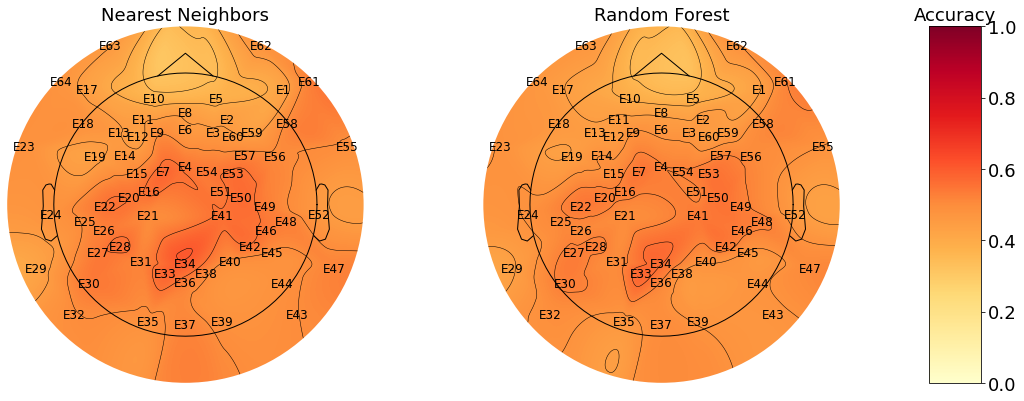

In [24]:
values1 = np.array(chan_wise_score.iloc[0, :][1:])
values2 = np.array(chan_wise_score.iloc[3, :][1:])

fig, ax = plt.subplots(1, 3, gridspec_kw=dict(width_ratios=[8, 8, 1]), figsize=(18, 6))


mne.viz.plot_topomap(values1, info, ch_type="eeg", res=5000, axes=ax[0], names=channels, show=False,
                     contours=6, cmap="YlOrRd", vlim=(0, 1))
ax[0].set_title('Nearest Neighbors')


mne.viz.plot_topomap(values2, info, ch_type="eeg", res=5000, axes=ax[1], names=channels, show=False,
                     contours=6, cmap="YlOrRd", vlim=(0, 1))
ax[1].set_title('Random Forest')

plt.colorbar(ScalarMappable(None, cmap="YlOrRd"), cax=ax[2])
ax[2].set_title('Accuracy')

for tt in plt.findobj(fig, matplotlib.text.Text):
    if "E" in tt.get_text():
        tt.set_fontsize(12)
    else:
        tt.set_fontsize(18)


plt.savefig("/mnt/sda1/shivam/DrummingEEG/FullStudyData/images/topomap_electrodewise.png")
    
plt.show()

<Figure size 864x576 with 0 Axes>

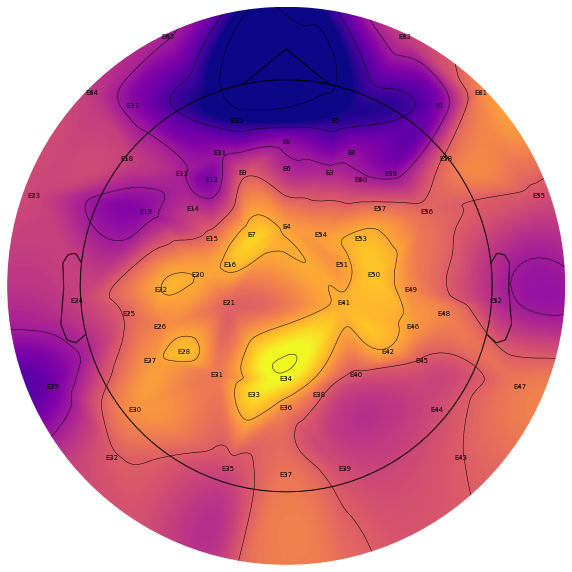

AttributeError: 'AxesImage' object has no attribute '_axes_locator'

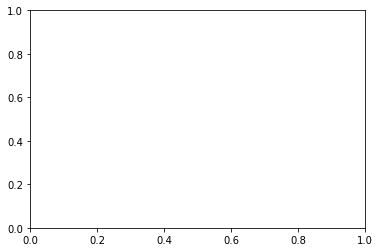

In [171]:
# https://github.com/mne-tools/mne-python/issues/3127

# ax = plt.figure(figsize=(12, 8))
fig = plt.figure(figsize=(12, 8))
ax, _ = mne.viz.plot_topomap(
    np.array(chan_wise_score.iloc[0, :])[1:], info, ch_type="eeg", 
    #sensors="r.", 
    res=500, 
    size=10,
    names=channels,
#     show=False,
    outlines="head", 
    contours=6,
    cmap="plasma",
    vlim=(min(np.array(chan_wise_score.iloc[0, :])[1:]), max(np.array(chan_wise_score.iloc[0, :])[1:])),
)
plt.colorbar(ScalarMappable(None, cmap="plasma"), cax=ax)

for tt in plt.findobj(fig, matplotlib.text.Text):
    tt.set_fontsize(20)

fig.show()

In [67]:
ax

In [68]:
plt.findobj(ax, matplotlib.text.Text)

[]

# Timestamp wise prediction

## 1-sec windows

In [118]:
os.chdir("/mnt/sda1/shivam/DrummingEEG/FullStudyData/Preprocessed/csv")
dataset = pd.read_csv("drumming_clean_csv.csv")
dataset

1         2         3         4         5         6         7  \
0     -10440.16 -10424.82 -10401.63 -10376.08 -10343.24 -10321.08 -10305.49   
1      -3692.17  -3678.73  -3654.86  -3627.36  -3594.21  -3572.02  -3556.38   
2      -3742.15  -3726.56  -3702.30  -3673.70  -3637.75  -3618.76  -3603.94   
3       1121.46   1133.35   1153.57   1176.41   1202.25   1219.14   1229.37   
4      -6571.81  -6561.33  -6535.54  -6505.83  -6472.85  -6450.26  -6430.92   
...         ...       ...       ...       ...       ...       ...       ...   
32635  -1985.31  -1986.93  -1991.45  -1993.04  -1984.09  -1981.79  -1985.12   
32636  -5384.93  -5394.95  -5395.73  -5389.85  -5389.16  -5379.99  -5377.46   
32637   5273.82   5270.71   5271.05   5275.43   5275.55   5282.63   5284.98   
32638   -589.48   -590.69   -589.91   -583.89   -583.47   -580.78   -579.19   
32639  -8982.64  -8983.22  -8982.48  -8976.01  -8974.24  -8971.62  -8968.68   

              8         9        10  ...  29996  29997  29998  29999  30000  \
0     -10296.35 -10289.98 -10292.37  ...   0.00   0.00   0.00   0.00   0.00   
1      -3545.01  -3540.08  -3543.71  ...   0.00   0.00   0.00   0.00   0.00   
2      -3593.32  -3587.17  -3591.90  ...   0.00   0.00   0.00   0.00   0.00   
3       1236.98   1240.88   1239.31  ...   0.00   0.00   0.00   0.00   0.00   
4      -6418.42  -6411.93  -6415.75  ...   0.00   0.00   0.00   0.00   0.00   
...         ...       ...       ...  ...    ...    ...    ...    ...    ...   
32635  -1988.24  -1989.47  -1992.44  ...   0.00   0.00   0.00   0.00   0.00   
32636  -5376.55  -5379.19  -5385.89  ...   0.00   0.00   0.00   0.00   0.00   
32637   5285.36   5285.84   5278.76  ...   0.00   0.00   0.00   0.00   0.00   
32638   -577.51   -582.00   -588.93  ...   0.00   0.00   0.00   0.00   0.00   
32639  -8970.36  -8973.85  -8980.11  ...   0.00   0.00   0.00   0.00   0.00   

       Subject  Drumbeat  Trial  Pleasantness  Channel  
0       Drum10    drum06      2             9        1  
1       Drum10    drum06      2             9        2  
2       Drum10    drum06      2             9        3  
3       Drum10    drum06      2             9        4  
4       Drum10    drum06      2             9        5  
...        ...       ...    ...           ...      ...  
32635   Drum15    drum10      1             3       60  
32636   Drum15    drum10      1             3       61  
32637   Drum15    drum10      1             3       62  
32638   Drum15    drum10      1             3       63  
32639   Drum15    drum10      1             3       64  

[32640 rows x 30005 columns]

In [181]:
eeg, beat, chan = [], [], []
window_size = 1

nchan = 64
sf = 1000
iterations  = int(len(dataset) // nchan)

X = np.array([])
y = np.array([])
beat = []
for idx in range(iterations):
    start = idx * nchan
    end = (idx + 1) * nchan
    p_eeg = dataset.iloc[start:end, :-5].to_numpy()
    epochs = sliding_window(p_eeg, sf=sf, window=window_size)
    
    X = epochs[1] if len(X) == 0 else np.concatenate((X, epochs[1]))
    y = epochs[0] if len(y) == 0 else np.concatenate((y, epochs[0]))
    beat += [dataset.iloc[start, -4]] * len(epochs[0])
    
    print(X.shape, y.shape, len(beat))


(30, 64, 1000) (30,) 30
(60, 64, 1000) (60,) 60
(90, 64, 1000) (90,) 90
(120, 64, 1000) (120,) 120
(150, 64, 1000) (150,) 150
(180, 64, 1000) (180,) 180
(210, 64, 1000) (210,) 210
(240, 64, 1000) (240,) 240
(270, 64, 1000) (270,) 270
(300, 64, 1000) (300,) 300
(330, 64, 1000) (330,) 330
(360, 64, 1000) (360,) 360
(390, 64, 1000) (390,) 390
(420, 64, 1000) (420,) 420
(450, 64, 1000) (450,) 450
(480, 64, 1000) (480,) 480
(510, 64, 1000) (510,) 510
(540, 64, 1000) (540,) 540
(570, 64, 1000) (570,) 570
(600, 64, 1000) (600,) 600
(630, 64, 1000) (630,) 630
(660, 64, 1000) (660,) 660
(690, 64, 1000) (690,) 690
(720, 64, 1000) (720,) 720
(750, 64, 1000) (750,) 750
(780, 64, 1000) (780,) 780
(810, 64, 1000) (810,) 810
(840, 64, 1000) (840,) 840
(870, 64, 1000) (870,) 870
(900, 64, 1000) (900,) 900
(930, 64, 1000) (930,) 930
(960, 64, 1000) (960,) 960
(990, 64, 1000) (990,) 990
(1020, 64, 1000) (1020,) 1020
(1050, 64, 1000) (1050,) 1050
(1080, 64, 1000) (1080,) 1080
(1110, 64, 1000) (1110,) 111

(8340, 64, 1000) (8340,) 8340
(8370, 64, 1000) (8370,) 8370
(8400, 64, 1000) (8400,) 8400
(8430, 64, 1000) (8430,) 8430
(8460, 64, 1000) (8460,) 8460
(8490, 64, 1000) (8490,) 8490
(8520, 64, 1000) (8520,) 8520
(8550, 64, 1000) (8550,) 8550
(8580, 64, 1000) (8580,) 8580
(8610, 64, 1000) (8610,) 8610
(8640, 64, 1000) (8640,) 8640
(8670, 64, 1000) (8670,) 8670
(8700, 64, 1000) (8700,) 8700
(8730, 64, 1000) (8730,) 8730
(8760, 64, 1000) (8760,) 8760
(8790, 64, 1000) (8790,) 8790
(8820, 64, 1000) (8820,) 8820
(8850, 64, 1000) (8850,) 8850
(8880, 64, 1000) (8880,) 8880
(8910, 64, 1000) (8910,) 8910
(8940, 64, 1000) (8940,) 8940
(8970, 64, 1000) (8970,) 8970
(9000, 64, 1000) (9000,) 9000
(9030, 64, 1000) (9030,) 9030
(9060, 64, 1000) (9060,) 9060
(9090, 64, 1000) (9090,) 9090
(9120, 64, 1000) (9120,) 9120
(9150, 64, 1000) (9150,) 9150
(9180, 64, 1000) (9180,) 9180
(9210, 64, 1000) (9210,) 9210
(9240, 64, 1000) (9240,) 9240
(9270, 64, 1000) (9270,) 9270
(9300, 64, 1000) (9300,) 9300
(9330, 64,

In [184]:
y = np.array(y, dtype=int)
beat = np.array(beat)
Xred = np.resize(X, (15300, 64000))
Xred.shape, y.shape, beat.shape

(15300,)

In [201]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit(beat)
yl = le.transform(beat)
yl, np.unique(yl)

(array([ 7,  7,  7, ..., 11, 11, 11]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]))

In [202]:
times = np.array(y, dtype=int).flatten()
times, times.shape

(array([ 0,  1,  2, ..., 27, 28, 29]), (15300,))

In [204]:
# Prediction time point wise (1 sec); Chance: 100/15 ~ 6.66%
scores_time_1 = {}
for t in range(30):
    scores_time_1[t] = []
    Xt, yt = Xred[times==t], yl[times==t]
    X_train, X_eval, y_train, y_eval = train_test_split(Xt, yt, test_size=0.2, random_state=42)
    print("Time Point: ", t)
    for idx,clf in enumerate(clfs):
        clf.fit(X_train, y_train)
        score = clf.score(X_eval, y_eval)
        scores_time_1[t].append(score)
        print(clfs[idx], ": ", score)

Time Point:  0
KNeighborsClassifier(n_neighbors=2) :  0.0
SVC(C=1, gamma=2) :  0.049019607843137254
DecisionTreeClassifier(max_depth=200) :  0.0
RandomForestClassifier(max_depth=200, max_features=1, n_estimators=10) :  0.0
MLPClassifier(alpha=1, max_iter=1000) :  6.862745098039216e-02
AdaBoostClassifier() :  0.0196078431372549
GaussianNB() :  0.00980392156862745
QuadraticDiscriminantAnalysis() :  0.029411764705882353
Time Point:  1
KNeighborsClassifier(n_neighbors=2) :  0.0
SVC(C=1, gamma=2) :  0.049019607843137254
DecisionTreeClassifier(max_depth=200) :  0.00980392156862745
RandomForestClassifier(max_depth=200, max_features=1, n_estimators=10) :  0.0
MLPClassifier(alpha=1, max_iter=1000) :  5.8823529411764705e-02
AdaBoostClassifier() :  0.029411764705882353
GaussianNB() :  0.00980392156862745
QuadraticDiscriminantAnalysis() :  0.0196078431372549
Time Point:  2
KNeighborsClassifier(n_neighbors=2) :  0.0
SVC(C=1, gamma=2) :  0.049019607843137254
DecisionTreeClassifier(max_depth=200) :  

SVC(C=1, gamma=2) :  0.049019607843137254
DecisionTreeClassifier(max_depth=200) :  0.0
RandomForestClassifier(max_depth=200, max_features=1, n_estimators=10) :  0.0
MLPClassifier(alpha=1, max_iter=1000) :  5.8823529411764705e-02
AdaBoostClassifier() :  0.00980392156862745
GaussianNB() :  0.00980392156862745
QuadraticDiscriminantAnalysis() :  0.0196078431372549
Time Point:  20
KNeighborsClassifier(n_neighbors=2) :  0.0
SVC(C=1, gamma=2) :  0.049019607843137254
DecisionTreeClassifier(max_depth=200) :  0.0
RandomForestClassifier(max_depth=200, max_features=1, n_estimators=10) :  0.0
MLPClassifier(alpha=1, max_iter=1000) :  5.8823529411764705e-02
AdaBoostClassifier() :  0.049019607843137254
GaussianNB() :  0.00980392156862745
QuadraticDiscriminantAnalysis() :  0.0196078431372549
Time Point:  21
KNeighborsClassifier(n_neighbors=2) :  0.0
SVC(C=1, gamma=2) :  0.049019607843137254
DecisionTreeClassifier(max_depth=200) :  0.00980392156862745
RandomForestClassifier(max_depth=200, max_features=1

In [239]:
scores_df = pd.DataFrame(scores_time_1, columns=list(range(30)), index=names)
os.chdir("/mnt/sda1/shivam/DrummingEEG/FullStudyData/Results")
scores_df.to_csv("scores_time_wise_1sec_time_series.csv", index=True)

## 3-sec windows

In [206]:
os.chdir("/mnt/sda1/shivam/DrummingEEG/FullStudyData/Preprocessed/csv")
dataset = pd.read_csv("drumming_clean_csv.csv")
dataset

1         2         3         4         5         6         7  \
0     -10440.16 -10424.82 -10401.63 -10376.08 -10343.24 -10321.08 -10305.49   
1      -3692.17  -3678.73  -3654.86  -3627.36  -3594.21  -3572.02  -3556.38   
2      -3742.15  -3726.56  -3702.30  -3673.70  -3637.75  -3618.76  -3603.94   
3       1121.46   1133.35   1153.57   1176.41   1202.25   1219.14   1229.37   
4      -6571.81  -6561.33  -6535.54  -6505.83  -6472.85  -6450.26  -6430.92   
...         ...       ...       ...       ...       ...       ...       ...   
32635  -1985.31  -1986.93  -1991.45  -1993.04  -1984.09  -1981.79  -1985.12   
32636  -5384.93  -5394.95  -5395.73  -5389.85  -5389.16  -5379.99  -5377.46   
32637   5273.82   5270.71   5271.05   5275.43   5275.55   5282.63   5284.98   
32638   -589.48   -590.69   -589.91   -583.89   -583.47   -580.78   -579.19   
32639  -8982.64  -8983.22  -8982.48  -8976.01  -8974.24  -8971.62  -8968.68   

              8         9        10  ...  29996  29997  29998  29999  30000  \
0     -10296.35 -10289.98 -10292.37  ...   0.00   0.00   0.00   0.00   0.00   
1      -3545.01  -3540.08  -3543.71  ...   0.00   0.00   0.00   0.00   0.00   
2      -3593.32  -3587.17  -3591.90  ...   0.00   0.00   0.00   0.00   0.00   
3       1236.98   1240.88   1239.31  ...   0.00   0.00   0.00   0.00   0.00   
4      -6418.42  -6411.93  -6415.75  ...   0.00   0.00   0.00   0.00   0.00   
...         ...       ...       ...  ...    ...    ...    ...    ...    ...   
32635  -1988.24  -1989.47  -1992.44  ...   0.00   0.00   0.00   0.00   0.00   
32636  -5376.55  -5379.19  -5385.89  ...   0.00   0.00   0.00   0.00   0.00   
32637   5285.36   5285.84   5278.76  ...   0.00   0.00   0.00   0.00   0.00   
32638   -577.51   -582.00   -588.93  ...   0.00   0.00   0.00   0.00   0.00   
32639  -8970.36  -8973.85  -8980.11  ...   0.00   0.00   0.00   0.00   0.00   

       Subject  Drumbeat  Trial  Pleasantness  Channel  
0       Drum10    drum06      2             9        1  
1       Drum10    drum06      2             9        2  
2       Drum10    drum06      2             9        3  
3       Drum10    drum06      2             9        4  
4       Drum10    drum06      2             9        5  
...        ...       ...    ...           ...      ...  
32635   Drum15    drum10      1             3       60  
32636   Drum15    drum10      1             3       61  
32637   Drum15    drum10      1             3       62  
32638   Drum15    drum10      1             3       63  
32639   Drum15    drum10      1             3       64  

[32640 rows x 30005 columns]

In [212]:
eeg, beat, chan = [], [], []
window_size = 3

nchan = 64
sf = 1000
iterations  = int(len(dataset) // nchan)

X = np.array([])
indexes = np.array([])
beat = []
for idx in range(iterations):
    start = idx * nchan
    end = (idx + 1) * nchan
    p_eeg = dataset.iloc[start:end, :-5].to_numpy()
    epochs = sliding_window(p_eeg, sf=sf, window=window_size)
    
    X = epochs[1] if len(X) == 0 else np.concatenate((X, epochs[1]))
    indexes = np.array(list(range(10))) if len(indexes) == 0 else np.concatenate((indexes, np.array(list(range(10)))))
    beat += [dataset.iloc[start, -4]] * len(epochs[0])
        
    print(X.shape, indexes.shape, len(beat))

(10, 64, 3000) (10,) 10
(20, 64, 3000) (20,) 20
(30, 64, 3000) (30,) 30
(40, 64, 3000) (40,) 40
(50, 64, 3000) (50,) 50
(60, 64, 3000) (60,) 60
(70, 64, 3000) (70,) 70
(80, 64, 3000) (80,) 80
(90, 64, 3000) (90,) 90
(100, 64, 3000) (100,) 100
(110, 64, 3000) (110,) 110
(120, 64, 3000) (120,) 120
(130, 64, 3000) (130,) 130
(140, 64, 3000) (140,) 140
(150, 64, 3000) (150,) 150
(160, 64, 3000) (160,) 160
(170, 64, 3000) (170,) 170
(180, 64, 3000) (180,) 180
(190, 64, 3000) (190,) 190
(200, 64, 3000) (200,) 200
(210, 64, 3000) (210,) 210
(220, 64, 3000) (220,) 220
(230, 64, 3000) (230,) 230
(240, 64, 3000) (240,) 240
(250, 64, 3000) (250,) 250
(260, 64, 3000) (260,) 260
(270, 64, 3000) (270,) 270
(280, 64, 3000) (280,) 280
(290, 64, 3000) (290,) 290
(300, 64, 3000) (300,) 300
(310, 64, 3000) (310,) 310
(320, 64, 3000) (320,) 320
(330, 64, 3000) (330,) 330
(340, 64, 3000) (340,) 340
(350, 64, 3000) (350,) 350
(360, 64, 3000) (360,) 360
(370, 64, 3000) (370,) 370
(380, 64, 3000) (380,) 380
(

(2850, 64, 3000) (2850,) 2850
(2860, 64, 3000) (2860,) 2860
(2870, 64, 3000) (2870,) 2870
(2880, 64, 3000) (2880,) 2880
(2890, 64, 3000) (2890,) 2890
(2900, 64, 3000) (2900,) 2900
(2910, 64, 3000) (2910,) 2910
(2920, 64, 3000) (2920,) 2920
(2930, 64, 3000) (2930,) 2930
(2940, 64, 3000) (2940,) 2940
(2950, 64, 3000) (2950,) 2950
(2960, 64, 3000) (2960,) 2960
(2970, 64, 3000) (2970,) 2970
(2980, 64, 3000) (2980,) 2980
(2990, 64, 3000) (2990,) 2990
(3000, 64, 3000) (3000,) 3000
(3010, 64, 3000) (3010,) 3010
(3020, 64, 3000) (3020,) 3020
(3030, 64, 3000) (3030,) 3030
(3040, 64, 3000) (3040,) 3040
(3050, 64, 3000) (3050,) 3050
(3060, 64, 3000) (3060,) 3060
(3070, 64, 3000) (3070,) 3070
(3080, 64, 3000) (3080,) 3080
(3090, 64, 3000) (3090,) 3090
(3100, 64, 3000) (3100,) 3100
(3110, 64, 3000) (3110,) 3110
(3120, 64, 3000) (3120,) 3120
(3130, 64, 3000) (3130,) 3130
(3140, 64, 3000) (3140,) 3140
(3150, 64, 3000) (3150,) 3150
(3160, 64, 3000) (3160,) 3160
(3170, 64, 3000) (3170,) 3170
(3180, 64,

In [214]:
beat = np.array(beat)
Xred = np.resize(X, (5100, 192000))
Xred.shape, indexes.shape, beat.shape

((5100, 192000), (5100,), (5100,))

In [215]:
le = preprocessing.LabelEncoder()
le.fit(beat)
yl = le.transform(beat)
yl, np.unique(yl)

(array([ 7,  7,  7, ..., 11, 11, 11]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]))

In [218]:
# Prediction time point wise (3 sec); Chance: 100/15 ~ 6.66%
scores_time_3 = {}
for t in range(10):
    scores_time_3[t] = []
    Xt, yt = Xred[times==t], yl[times==t]
    X_train, X_eval, y_train, y_eval = train_test_split(Xt, yt, test_size=0.2, random_state=42)
    print("Time Point: ", t)
    for idx,clf in enumerate(clfs):
        clf.fit(X_train, y_train)
        score = clf.score(X_eval, y_eval)
        scores_time_3[t].append(score)
        print(clfs[idx], "\t: ", score)

Time Point:  0
KNeighborsClassifier(n_neighbors=2) 	:  0.0
SVC(C=1, gamma=2) 	:  0.049019607843137254
DecisionTreeClassifier(max_depth=200) 	:  0.00980392156862745
RandomForestClassifier(max_depth=200, max_features=1, n_estimators=10) 	:  0.0
MLPClassifier(alpha=1, max_iter=1000) 	:  4.9019607843137254e-02
AdaBoostClassifier() 	:  0.0392156862745098
GaussianNB() 	:  0.00980392156862745
QuadraticDiscriminantAnalysis() 	:  0.0196078431372549
Time Point:  1
KNeighborsClassifier(n_neighbors=2) 	:  0.0
SVC(C=1, gamma=2) 	:  0.049019607843137254
DecisionTreeClassifier(max_depth=200) 	:  0.00980392156862745
RandomForestClassifier(max_depth=200, max_features=1, n_estimators=10) 	:  0.0
MLPClassifier(alpha=1, max_iter=1000) 	:  6.862745098039216e-02
AdaBoostClassifier() 	:  0.0392156862745098
GaussianNB() 	:  0.00980392156862745
QuadraticDiscriminantAnalysis() 	:  0.0196078431372549
Time Point:  2
KNeighborsClassifier(n_neighbors=2) 	:  0.0
SVC(C=1, gamma=2) 	:  0.049019607843137254
DecisionTre

In [238]:
scores_df = pd.DataFrame(scores_time_3, columns=list(range(10)), index=names)
os.chdir("/mnt/sda1/shivam/DrummingEEG/FullStudyData/Results")
scores_df.to_csv("scores_time_wise_3sec_time_series.csv", index=True)

In [236]:
scores_df

0    1    2    3    4    5    6    7    8    9
Nearest Neighbors 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
RBF SVM           0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05
Decision Tree     0.01 0.01 0.00 0.01 0.01 0.01 0.01 0.01 0.02 0.06
Random Forest     0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
Neural Net        0.05 0.07 0.07 0.07 0.05 0.07 0.07 0.06 0.05 0.11
AdaBoost          0.04 0.04 0.01 0.02 0.02 0.01 0.04 0.04 0.02 0.07
Naive Bayes       0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
QDA               0.02 0.02 0.03 0.04 0.03 0.03 0.02 0.02 0.05 0.02

## 5-sec windows

In [220]:
os.chdir("/mnt/sda1/shivam/DrummingEEG/FullStudyData/Preprocessed/csv")
dataset = pd.read_csv("drumming_clean_csv.csv")
dataset

1         2         3         4         5         6         7  \
0     -10440.16 -10424.82 -10401.63 -10376.08 -10343.24 -10321.08 -10305.49   
1      -3692.17  -3678.73  -3654.86  -3627.36  -3594.21  -3572.02  -3556.38   
2      -3742.15  -3726.56  -3702.30  -3673.70  -3637.75  -3618.76  -3603.94   
3       1121.46   1133.35   1153.57   1176.41   1202.25   1219.14   1229.37   
4      -6571.81  -6561.33  -6535.54  -6505.83  -6472.85  -6450.26  -6430.92   
...         ...       ...       ...       ...       ...       ...       ...   
32635  -1985.31  -1986.93  -1991.45  -1993.04  -1984.09  -1981.79  -1985.12   
32636  -5384.93  -5394.95  -5395.73  -5389.85  -5389.16  -5379.99  -5377.46   
32637   5273.82   5270.71   5271.05   5275.43   5275.55   5282.63   5284.98   
32638   -589.48   -590.69   -589.91   -583.89   -583.47   -580.78   -579.19   
32639  -8982.64  -8983.22  -8982.48  -8976.01  -8974.24  -8971.62  -8968.68   

              8         9        10  ...  29996  29997  29998  29999  30000  \
0     -10296.35 -10289.98 -10292.37  ...   0.00   0.00   0.00   0.00   0.00   
1      -3545.01  -3540.08  -3543.71  ...   0.00   0.00   0.00   0.00   0.00   
2      -3593.32  -3587.17  -3591.90  ...   0.00   0.00   0.00   0.00   0.00   
3       1236.98   1240.88   1239.31  ...   0.00   0.00   0.00   0.00   0.00   
4      -6418.42  -6411.93  -6415.75  ...   0.00   0.00   0.00   0.00   0.00   
...         ...       ...       ...  ...    ...    ...    ...    ...    ...   
32635  -1988.24  -1989.47  -1992.44  ...   0.00   0.00   0.00   0.00   0.00   
32636  -5376.55  -5379.19  -5385.89  ...   0.00   0.00   0.00   0.00   0.00   
32637   5285.36   5285.84   5278.76  ...   0.00   0.00   0.00   0.00   0.00   
32638   -577.51   -582.00   -588.93  ...   0.00   0.00   0.00   0.00   0.00   
32639  -8970.36  -8973.85  -8980.11  ...   0.00   0.00   0.00   0.00   0.00   

       Subject  Drumbeat  Trial  Pleasantness  Channel  
0       Drum10    drum06      2             9        1  
1       Drum10    drum06      2             9        2  
2       Drum10    drum06      2             9        3  
3       Drum10    drum06      2             9        4  
4       Drum10    drum06      2             9        5  
...        ...       ...    ...           ...      ...  
32635   Drum15    drum10      1             3       60  
32636   Drum15    drum10      1             3       61  
32637   Drum15    drum10      1             3       62  
32638   Drum15    drum10      1             3       63  
32639   Drum15    drum10      1             3       64  

[32640 rows x 30005 columns]

In [224]:
eeg, beat, chan = [], [], []
window_size = 5

nchan = 64
sf = 1000
iterations  = int(len(dataset) // nchan)

X = np.array([])
indexes = np.array([])
beat = []
for idx in range(iterations):
    start = idx * nchan
    end = (idx + 1) * nchan
    p_eeg = dataset.iloc[start:end, :-5].to_numpy()
    epochs = sliding_window(p_eeg, sf=sf, window=window_size)
    
    
    X = epochs[1] if len(X) == 0 else np.concatenate((X, epochs[1]))
    indexes = np.array(list(range(6))) if len(indexes) == 0 else np.concatenate((indexes, np.array(list(range(6)))))
    beat += [dataset.iloc[start, -4]] * len(epochs[0])

    print(X.shape, indexes.shape, len(beat))

(6, 64, 5000) (6,) 6
(12, 64, 5000) (12,) 12
(18, 64, 5000) (18,) 18
(24, 64, 5000) (24,) 24
(30, 64, 5000) (30,) 30
(36, 64, 5000) (36,) 36
(42, 64, 5000) (42,) 42
(48, 64, 5000) (48,) 48
(54, 64, 5000) (54,) 54
(60, 64, 5000) (60,) 60
(66, 64, 5000) (66,) 66
(72, 64, 5000) (72,) 72
(78, 64, 5000) (78,) 78
(84, 64, 5000) (84,) 84
(90, 64, 5000) (90,) 90
(96, 64, 5000) (96,) 96
(102, 64, 5000) (102,) 102
(108, 64, 5000) (108,) 108
(114, 64, 5000) (114,) 114
(120, 64, 5000) (120,) 120
(126, 64, 5000) (126,) 126
(132, 64, 5000) (132,) 132
(138, 64, 5000) (138,) 138
(144, 64, 5000) (144,) 144
(150, 64, 5000) (150,) 150
(156, 64, 5000) (156,) 156
(162, 64, 5000) (162,) 162
(168, 64, 5000) (168,) 168
(174, 64, 5000) (174,) 174
(180, 64, 5000) (180,) 180
(186, 64, 5000) (186,) 186
(192, 64, 5000) (192,) 192
(198, 64, 5000) (198,) 198
(204, 64, 5000) (204,) 204
(210, 64, 5000) (210,) 210
(216, 64, 5000) (216,) 216
(222, 64, 5000) (222,) 222
(228, 64, 5000) (228,) 228
(234, 64, 5000) (234,) 23

(1758, 64, 5000) (1758,) 1758
(1764, 64, 5000) (1764,) 1764
(1770, 64, 5000) (1770,) 1770
(1776, 64, 5000) (1776,) 1776
(1782, 64, 5000) (1782,) 1782
(1788, 64, 5000) (1788,) 1788
(1794, 64, 5000) (1794,) 1794
(1800, 64, 5000) (1800,) 1800
(1806, 64, 5000) (1806,) 1806
(1812, 64, 5000) (1812,) 1812
(1818, 64, 5000) (1818,) 1818
(1824, 64, 5000) (1824,) 1824
(1830, 64, 5000) (1830,) 1830
(1836, 64, 5000) (1836,) 1836
(1842, 64, 5000) (1842,) 1842
(1848, 64, 5000) (1848,) 1848
(1854, 64, 5000) (1854,) 1854
(1860, 64, 5000) (1860,) 1860
(1866, 64, 5000) (1866,) 1866
(1872, 64, 5000) (1872,) 1872
(1878, 64, 5000) (1878,) 1878
(1884, 64, 5000) (1884,) 1884
(1890, 64, 5000) (1890,) 1890
(1896, 64, 5000) (1896,) 1896
(1902, 64, 5000) (1902,) 1902
(1908, 64, 5000) (1908,) 1908
(1914, 64, 5000) (1914,) 1914
(1920, 64, 5000) (1920,) 1920
(1926, 64, 5000) (1926,) 1926
(1932, 64, 5000) (1932,) 1932
(1938, 64, 5000) (1938,) 1938
(1944, 64, 5000) (1944,) 1944
(1950, 64, 5000) (1950,) 1950
(1956, 64,

In [225]:
beat = np.array(beat)
Xred = np.resize(X, (3060, 320000))
Xred.shape, indexes.shape, beat.shape

((3060, 320000), (3060,), (3060,))

In [226]:
le = preprocessing.LabelEncoder()
le.fit(beat)
yl = le.transform(beat)
yl, np.unique(yl)

(array([ 7,  7,  7, ..., 11, 11, 11]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]))

In [228]:
# Prediction time point wise (3 sec); Chance: 100/15 ~ 6.66%
scores_time_5 = {}
for t in range(6):
    scores_time_5[t] = []
    Xt, yt = Xred[indexes==t], yl[indexes==t]
    X_train, X_eval, y_train, y_eval = train_test_split(Xt, yt, test_size=0.2, random_state=42)
    print("Time Point: ", t)
    for idx,clf in enumerate(clfs):
        clf.fit(X_train, y_train)
        score = clf.score(X_eval, y_eval)
        scores_time_5[t].append(score)
        print(clfs[idx], "\t: ", score)

Time Point:  0
KNeighborsClassifier(n_neighbors=2) 	:  0.0
SVC(C=1, gamma=2) 	:  0.049019607843137254
DecisionTreeClassifier(max_depth=200) 	:  0.00980392156862745
RandomForestClassifier(max_depth=200, max_features=1, n_estimators=10) 	:  0.0
MLPClassifier(alpha=1, max_iter=1000) 	:  6.862745098039216e-02
AdaBoostClassifier() 	:  0.0392156862745098
GaussianNB() 	:  0.00980392156862745
QuadraticDiscriminantAnalysis() 	:  0.00980392156862745
Time Point:  1
KNeighborsClassifier(n_neighbors=2) 	:  0.0
SVC(C=1, gamma=2) 	:  0.049019607843137254
DecisionTreeClassifier(max_depth=200) 	:  0.0
RandomForestClassifier(max_depth=200, max_features=1, n_estimators=10) 	:  0.0
MLPClassifier(alpha=1, max_iter=1000) 	:  6.862745098039216e-02
AdaBoostClassifier() 	:  0.0196078431372549
GaussianNB() 	:  0.00980392156862745
QuadraticDiscriminantAnalysis() 	:  0.049019607843137254
Time Point:  2
KNeighborsClassifier(n_neighbors=2) 	:  0.0
SVC(C=1, gamma=2) 	:  0.049019607843137254
DecisionTreeClassifier(ma

In [241]:
scores_df = pd.DataFrame(scores_time_5, columns=list(range(6)), index=names)
os.chdir("/mnt/sda1/shivam/DrummingEEG/FullStudyData/Results")
scores_df.to_csv("scores_time_wise_5sec_time_series.csv", index=True)

In [231]:
scores_time_5

{0: [0.0,
  0.049019607843137254,
  0.00980392156862745,
  0.0,
  0.06862745098039216,
  0.0392156862745098,
  0.00980392156862745,
  0.00980392156862745],
 1: [0.0,
  0.049019607843137254,
  0.0,
  0.0,
  0.06862745098039216,
  0.0196078431372549,
  0.00980392156862745,
  0.049019607843137254],
 2: [0.0,
  0.049019607843137254,
  0.0,
  0.0,
  0.06862745098039216,
  0.0196078431372549,
  0.00980392156862745,
  0.0392156862745098],
 3: [0.0,
  0.049019607843137254,
  0.0,
  0.0,
  0.049019607843137254,
  0.029411764705882353,
  0.00980392156862745,
  0.00980392156862745],
 4: [0.0,
  0.049019607843137254,
  0.00980392156862745,
  0.0,
  0.049019607843137254,
  0.049019607843137254,
  0.00980392156862745,
  0.0],
 5: [0.0,
  0.049019607843137254,
  0.08823529411764706,
  0.0,
  0.049019607843137254,
  0.08823529411764706,
  0.00980392156862745,
  0.0392156862745098]}

# Drumbeat classification using spectopo [ML]

In [2]:
os.chdir("/mnt/sda1/shivam/DrummingEEG/FullStudyData/Preprocessed/spectopov2")
processed = glob.glob("*.mat")
len(processed), processed

(510,
 ['Drum13_drum04part01_1_4_clean_spec.mat',
  'Drum06_drum10_2_8_clean_spec.mat',
  'Drum09_drum07_1_3_clean_spec.mat',
  'Drum05_drum04part01_2_7_clean_spec.mat',
  'Drum10_drum10_1_5_clean_spec.mat',
  'Drum02_drum01part01_1_8_clean_spec.mat',
  'Subj4_drum05_1_2_clean_spec.mat',
  'Drum13_drum03_2_5_clean_spec.mat',
  'Subj2_drum04part01_1_7_clean_spec.mat',
  'Drum15_mix_2_3_clean_spec.mat',
  'Drum13_drum08_2_3_clean_spec.mat',
  'Drum06_mix_2_2_clean_spec.mat',
  'Drum11_drum04part02_1_6_clean_spec.mat',
  'Drum01_drum05_1_8_clean_spec.mat',
  'Subj4_drum06_1_8_clean_spec.mat',
  'Drum08_drum07_1_5_clean_spec.mat',
  'Drum14_drum04part01_1_6_clean_spec.mat',
  'Drum11_drum11_2_6_clean_spec.mat',
  'Drum10_drum11_2_6_clean_spec.mat',
  'Drum08_drum08_1_5_clean_spec.mat',
  'Drum15_drum05_1_3_clean_spec.mat',
  'Drum08_drum11_1_6_clean_spec.mat',
  'Drum13_drum10_2_2_clean_spec.mat',
  'Drum07_mix_rev_2_3_clean_spec.mat',
  'Drum10_drum07_1_4_clean_spec.mat',
  'Drum05_drum05

In [3]:
# Drum beat dict
drum_dict = {
    "drum01part01": 0,
    "drum01part02": 1,
    "drum02": 2,
    "drum03": 3,
    "drum04part01": 4,
    "drum04part02": 5,
    "drum05": 6,
    "drum06": 7,
    "drum07": 8,
    "drum08": 9,
    "drum09": 10,
    "drum10": 11,
    "drum11": 12,
    "mix": 13,
    "mix_rev": 14
}

In [4]:
X, y = [], []
for mat in processed:
    data = loadmat(mat)["spectra"]
    data = np.expand_dims(data, 3)
    if len(X) > 0:
        X = np.concatenate((X, data))
    else:
        X = data
    if "mix_rev" in mat:
        y += [14] * data.shape[0]
    else:
        label = drum_dict[mat.split("_")[1]]
        y += [label]* data.shape[0] 
    
    print(X.shape, len(y))
    assert(X.shape[0] == len(y)), mat

(453, 64, 501, 1) 453
(906, 64, 501, 1) 906
(1359, 64, 501, 1) 1359
(1812, 64, 501, 1) 1812
(2265, 64, 501, 1) 2265
(2719, 64, 501, 1) 2719
(3172, 64, 501, 1) 3172
(3625, 64, 501, 1) 3625
(4078, 64, 501, 1) 4078
(4531, 64, 501, 1) 4531
(4984, 64, 501, 1) 4984
(5437, 64, 501, 1) 5437
(5890, 64, 501, 1) 5890
(6344, 64, 501, 1) 6344
(6797, 64, 501, 1) 6797
(7250, 64, 501, 1) 7250
(7703, 64, 501, 1) 7703
(8156, 64, 501, 1) 8156
(8609, 64, 501, 1) 8609
(9062, 64, 501, 1) 9062
(9515, 64, 501, 1) 9515
(9968, 64, 501, 1) 9968
(10422, 64, 501, 1) 10422
(10875, 64, 501, 1) 10875
(11328, 64, 501, 1) 11328
(11781, 64, 501, 1) 11781
(12234, 64, 501, 1) 12234
(12688, 64, 501, 1) 12688
(13141, 64, 501, 1) 13141
(13594, 64, 501, 1) 13594
(14048, 64, 501, 1) 14048
(14502, 64, 501, 1) 14502
(14955, 64, 501, 1) 14955
(15408, 64, 501, 1) 15408
(15861, 64, 501, 1) 15861
(16314, 64, 501, 1) 16314
(16768, 64, 501, 1) 16768
(17221, 64, 501, 1) 17221
(17674, 64, 501, 1) 17674
(18127, 64, 501, 1) 18127
(18581, 

(141394, 64, 501, 1) 141394
(141847, 64, 501, 1) 141847
(142300, 64, 501, 1) 142300
(142753, 64, 501, 1) 142753
(143207, 64, 501, 1) 143207
(143660, 64, 501, 1) 143660
(144113, 64, 501, 1) 144113
(144566, 64, 501, 1) 144566
(145019, 64, 501, 1) 145019
(145472, 64, 501, 1) 145472
(145925, 64, 501, 1) 145925
(146378, 64, 501, 1) 146378
(146831, 64, 501, 1) 146831
(147285, 64, 501, 1) 147285
(147738, 64, 501, 1) 147738
(148191, 64, 501, 1) 148191
(148644, 64, 501, 1) 148644
(149097, 64, 501, 1) 149097
(149551, 64, 501, 1) 149551
(150004, 64, 501, 1) 150004
(150457, 64, 501, 1) 150457
(150911, 64, 501, 1) 150911
(151365, 64, 501, 1) 151365
(151818, 64, 501, 1) 151818
(152271, 64, 501, 1) 152271
(152724, 64, 501, 1) 152724
(153177, 64, 501, 1) 153177
(153631, 64, 501, 1) 153631
(154084, 64, 501, 1) 154084
(154537, 64, 501, 1) 154537
(154990, 64, 501, 1) 154990
(155443, 64, 501, 1) 155443
(155897, 64, 501, 1) 155897
(156351, 64, 501, 1) 156351
(156804, 64, 501, 1) 156804
(157257, 64, 501, 1)

In [5]:
y = np.array(y)
y.shape

(231125,)

In [6]:
X[0][0, :, 0].shape

(501,)

In [7]:
y, np.unique(y)

(array([4, 4, 4, ..., 1, 1, 1]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]))

In [8]:
# https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import cross_val_score

In [9]:
# source : https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html

clfs = [
    KNeighborsClassifier(2),
    # SVC(kernel="linear", C=0.025),
#     SVC(gamma=2, C=1),
    # GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=200),
    RandomForestClassifier(max_depth=200, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()
]

names = [
    "Nearest Neighbors",
    # "Linear SVM",
#     "RBF SVM",
    # "Gaussian Process",
    "Decision Tree",
    "Random Forest",
    "Neural Net",
    "AdaBoost",
    "Naive Bayes",
    "QDA",
]


In [24]:
X[:, 0, :, 0].shape

(231125, 501)

## Channel-wise prediction

In [14]:
# Chance: 100/15 ~ 6.66%
from joblib import parallel_backend
with parallel_backend('threading', n_jobs=27):
    scores_chan_spectopo = {}
    for chan in range(64):
        Xc, yc = X[:, chan, :, 0], y
        X_train, X_eval, y_train, y_eval = train_test_split(Xc, yc, test_size=0.2, random_state=42)

        print("Channel Number: ", chan)
        scores_chan_spectopo[chan] = []
        for idx, clf in enumerate(clfs):
            clf.fit(X_train, y_train)
            score = clf.score(X_eval, y_eval)
            scores_chan_spectopo[chan].append(score)
            print(clfs[idx], ": ", score)

Channel Number:  0
KNeighborsClassifier(n_neighbors=2) :  9.99545700378583e-01
DecisionTreeClassifier(max_depth=200) :  0.8899296917252569
RandomForestClassifier(max_depth=200, max_features=1, n_estimators=10) :  0.5170362358031368
MLPClassifier(alpha=1, max_iter=1000) :  2.0508382909680908e-01
AdaBoostClassifier() :  1.352082206598161e-01
GaussianNB() :  0.10660897782585181
QuadraticDiscriminantAnalysis() :  0.8969821525148729
Channel Number:  1
KNeighborsClassifier(n_neighbors=2) :  0.9842725797728502
DecisionTreeClassifier(max_depth=200) :  0.8751541373715522
RandomForestClassifier(max_depth=200, max_features=1, n_estimators=10) :  0.4903190914007572
MLPClassifier(alpha=1, max_iter=1000) :  2.629313142239048e-01
AdaBoostClassifier() :  1.3605191995673338e-01
GaussianNB() :  0.11052460789616009
QuadraticDiscriminantAnalysis() :  0.8613304488912926
Channel Number:  2
KNeighborsClassifier(n_neighbors=2) :  0.9966901027582477
DecisionTreeClassifier(max_depth=200) :  0.8846511627906977
R

KNeighborsClassifier(n_neighbors=2) :  0.9998053001622499
DecisionTreeClassifier(max_depth=200) :  0.910978907517577
RandomForestClassifier(max_depth=200, max_features=1, n_estimators=10) :  0.5394699837750135
MLPClassifier(alpha=1, max_iter=1000) :  2.4179556517036235e-01
AdaBoostClassifier() :  1.4818820984315847e-01
GaussianNB() :  0.10230394808004327
QuadraticDiscriminantAnalysis() :  0.9066306111411574
Channel Number:  20
KNeighborsClassifier(n_neighbors=2) :  0.9998918334234721
DecisionTreeClassifier(max_depth=200) :  0.9079069767441861
RandomForestClassifier(max_depth=200, max_features=1, n_estimators=10) :  0.5373715521903731
MLPClassifier(alpha=1, max_iter=1000) :  2.3666846944294212e-01
AdaBoostClassifier() :  1.4349378042184965e-01
GaussianNB() :  0.1048566792861006
QuadraticDiscriminantAnalysis() :  0.9120173066522445
Channel Number:  21
KNeighborsClassifier(n_neighbors=2) :  0.9997404002163331
DecisionTreeClassifier(max_depth=200) :  0.9265116279069767
RandomForestClassifi

DecisionTreeClassifier(max_depth=200) :  0.89934018388318
RandomForestClassifier(max_depth=200, max_features=1, n_estimators=10) :  0.5058301784748512
MLPClassifier(alpha=1, max_iter=1000) :  2.2851270957274203e-01
AdaBoostClassifier() :  1.5480800432666306e-01
GaussianNB() :  0.10533261222282314
QuadraticDiscriminantAnalysis() :  0.90085451595457
Channel Number:  39
KNeighborsClassifier(n_neighbors=2) :  0.9997836668469443
DecisionTreeClassifier(max_depth=200) :  0.9018063818280151
RandomForestClassifier(max_depth=200, max_features=1, n_estimators=10) :  0.5295402920497566
MLPClassifier(alpha=1, max_iter=1000) :  2.7805300162249863e-01
AdaBoostClassifier() :  2.124175229853975e-01
GaussianNB() :  0.13678745267712278
QuadraticDiscriminantAnalysis() :  0.918334234721471
Channel Number:  40
KNeighborsClassifier(n_neighbors=2) :  0.9997620335316387
DecisionTreeClassifier(max_depth=200) :  0.9150892374256355
RandomForestClassifier(max_depth=200, max_features=1, n_estimators=10) :  0.537955

RandomForestClassifier(max_depth=200, max_features=1, n_estimators=10) :  0.524889129259059
MLPClassifier(alpha=1, max_iter=1000) :  2.4071389940508384e-01
AdaBoostClassifier() :  1.375013520822066e-01
GaussianNB() :  0.11290427257977285
QuadraticDiscriminantAnalysis() :  0.8792212006489994
Channel Number:  58
KNeighborsClassifier(n_neighbors=2) :  0.9956733369388859
DecisionTreeClassifier(max_depth=200) :  0.8880692266089778
RandomForestClassifier(max_depth=200, max_features=1, n_estimators=10) :  0.5261871281773932
MLPClassifier(alpha=1, max_iter=1000) :  2.4677122769064358e-01
AdaBoostClassifier() :  1.2458626284478096e-01
GaussianNB() :  0.09957815035154137
QuadraticDiscriminantAnalysis() :  0.8851054624121146
Channel Number:  59
KNeighborsClassifier(n_neighbors=2) :  0.9947431043807463
DecisionTreeClassifier(max_depth=200) :  0.8914007571660357
RandomForestClassifier(max_depth=200, max_features=1, n_estimators=10) :  0.5225310978907518
MLPClassifier(alpha=1, max_iter=1000) :  2.52

In [15]:
scores_chan_spectopo

{0: [0.999545700378583,
  0.8899296917252569,
  0.5170362358031368,
  0.20508382909680908,
  0.1352082206598161,
  0.10660897782585181,
  0.8969821525148729],
 1: [0.9842725797728502,
  0.8751541373715522,
  0.4903190914007572,
  0.2629313142239048,
  0.13605191995673338,
  0.11052460789616009,
  0.8613304488912926],
 2: [0.9966901027582477,
  0.8846511627906977,
  0.5101568415359654,
  0.26591671173607356,
  0.16975662520281234,
  0.12041103299080584,
  0.8875932936722553],
 3: [0.9998053001622499,
  0.9048566792861006,
  0.5206057328285559,
  0.2861005949161709,
  0.20233639805300163,
  0.13687398593834504,
  0.9205624661979448],
 4: [0.9886425094645754,
  0.8333369388858842,
  0.4672796106003245,
  0.2385289345592212,
  0.1493347755543537,
  0.10812330989724175,
  0.8571768523526231],
 5: [0.99848566792861,
  0.8850621957815035,
  0.48525689561925367,
  0.25864791779340185,
  0.1794267171444024,
  0.11980530016224987,
  0.8952298539751217],
 6: [0.9995673336938886,
  0.9145916711736

In [16]:
scores_df = pd.DataFrame(scores_chan_spectopo, columns=list(range(64)), index=names)
os.chdir("/mnt/sda1/shivam/DrummingEEG/FullStudyData/Results")
scores_df.to_csv("scores_chan_wise_spectopo.csv", index=True)

### Topomap

In [252]:
os.chdir("/mnt/sda1/shivam/DrummingEEG/FullStudyData/Results")
chan_wise_score = pd.read_csv("scores_chan_wise_spectopo.csv")
chan_wise_score

Unnamed: 0    0    1    2    3    4    5    6    7    8  ...   54  \
0  Nearest Neighbors 1.00 0.98 1.00 1.00 0.99 1.00 1.00 0.99 1.00  ... 1.00   
1      Decision Tree 0.89 0.88 0.88 0.90 0.83 0.89 0.91 0.86 0.91  ... 0.90   
2      Random Forest 0.52 0.49 0.51 0.52 0.47 0.49 0.52 0.48 0.51  ... 0.54   
3         Neural Net 0.21 0.26 0.27 0.29 0.24 0.26 0.29 0.27 0.25  ... 0.31   
4           AdaBoost 0.14 0.14 0.17 0.20 0.15 0.18 0.19 0.17 0.16  ... 0.17   
5        Naive Bayes 0.11 0.11 0.12 0.14 0.11 0.12 0.12 0.13 0.12  ... 0.12   
6                QDA 0.90 0.86 0.89 0.92 0.86 0.90 0.91 0.88 0.89  ... 0.90   

    55   56   57   58   59   60   61   62   63  
0 0.99 1.00 0.99 1.00 0.99 1.00 1.00 1.00 1.00  
1 0.91 0.91 0.89 0.89 0.89 0.91 0.90 0.90 0.91  
2 0.54 0.53 0.52 0.53 0.52 0.50 0.50 0.49 0.50  
3 0.25 0.24 0.24 0.25 0.25 0.22 0.23 0.22 0.23  
4 0.11 0.13 0.14 0.12 0.14 0.14 0.13 0.13 0.12  
5 0.10 0.11 0.11 0.10 0.11 0.11 0.10 0.08 0.10  
6 0.89 0.89 0.88 0.89 0.88 0.90 0.91 0.91 0.91  

[7 rows x 65 columns]

In [253]:
chanloc = "/mnt/sda1/shivam/Thesis/Grasp Experiment/Data/ChannelLocations/EGIAmpServer64Chan.loc"
chans = mne.channels.read_custom_montage(chanloc)
channels = [f'E{n:1}' for n in range(1, 65)]
# info.set_montage("GSN-HydroCel-64_1.0")
info = mne.create_info(channels, sfreq=1000, ch_types="eeg")
info.set_montage(chans)
info

<Info | 8 non-empty values
 bads: []
 ch_names: E1, E2, E3, E4, E5, E6, E7, E8, E9, E10, E11, E12, E13, E14, ...
 chs: 64 EEG
 custom_ref_applied: False
 dig: 67 items (3 Cardinal, 64 EEG)
 highpass: 0.0 Hz
 lowpass: 500.0 Hz
 meas_date: unspecified
 nchan: 64
 projs: []
 sfreq: 1000.0 Hz
>

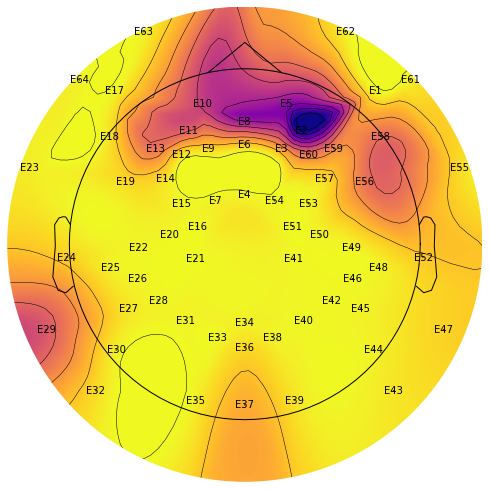

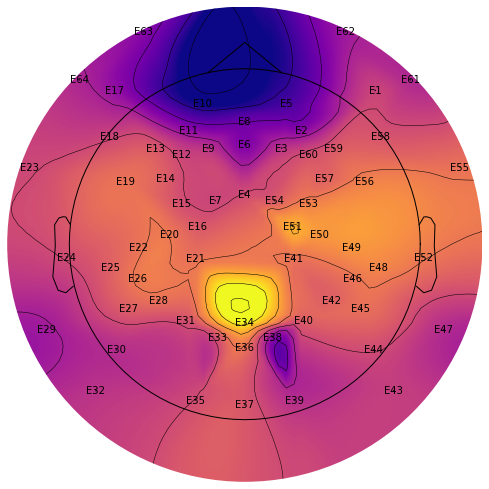

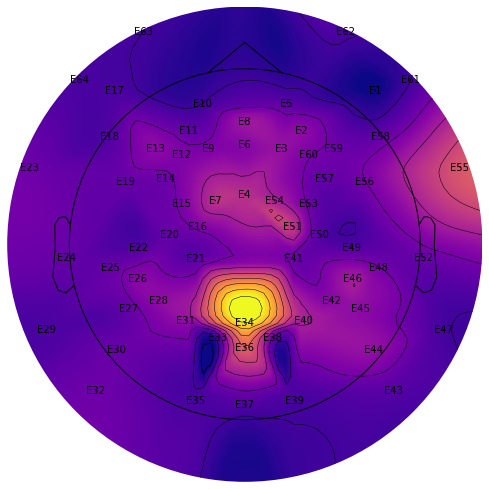

In [53]:
class_idx = [0, 2, 3]
ctr = 1
for idx in class_idx:
    fig = plt.figure(figsize=(12, 8))
    mne.viz.plot_topomap(
        np.array(chan_wise_score.iloc[idx, :])[1:],
        info, 
#         sensors="r.", 
    #     res=5000, 
        names=channels, 
        show_names=True, 
        show=False,
        outlines="skirt", 
        contours=10,
        cmap="plasma",
        vmin=min(np.array(chan_wise_score.iloc[idx, :])[1:]),
        vmax=max(np.array(chan_wise_score.iloc[idx, :])[1:]),
    )

    for tt in plt.findobj(fig, matplotlib.text.Text):
        tt.set_fontsize(10)


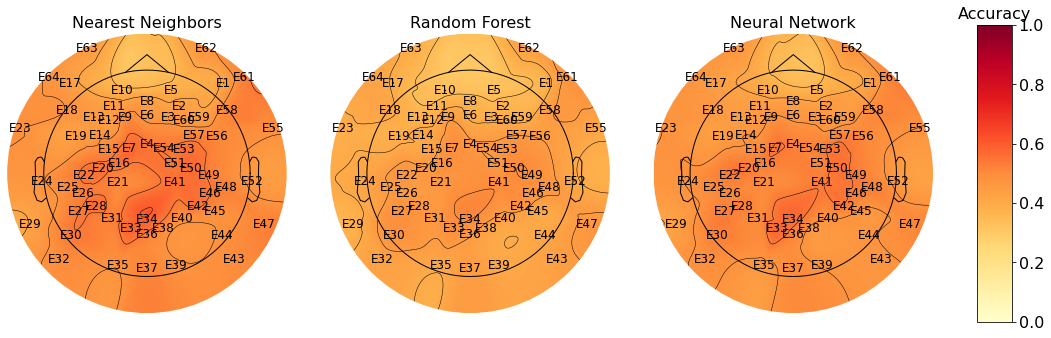

In [26]:
class_idx = [0, 2, 3]

values1 = np.array(chan_wise_score.iloc[0, :][1:])
values2 = np.array(chan_wise_score.iloc[2, :][1:])
values3 = np.array(chan_wise_score.iloc[3, :][1:])

fig, ax = plt.subplots(1, 4, gridspec_kw=dict(width_ratios=[8, 8, 8, 1]), figsize=(18, 5))


mne.viz.plot_topomap(values1, info, ch_type="eeg", res=5000, axes=ax[0], names=channels, show=False,
                     contours=4,cmap="YlOrRd", vlim=(0, 1))
ax[0].set_title('Nearest Neighbors')


mne.viz.plot_topomap(values2, info, ch_type="eeg", res=5000, axes=ax[1], names=channels, show=False,
                     contours=4,cmap="YlOrRd", vlim=(0, 1))
ax[1].set_title('Random Forest')

mne.viz.plot_topomap(values3, info, ch_type="eeg", res=5000, axes=ax[2], names=channels, show=False,
                     contours=4,cmap="YlOrRd", vlim=(0, 1))
ax[2].set_title('Neural Network')

plt.colorbar(ScalarMappable(None, cmap="YlOrRd"), cax=ax[3])
ax[3].set_title('Accuracy')

for tt in plt.findobj(fig, matplotlib.text.Text):
    if "E" in tt.get_text():
        tt.set_fontsize(12)
    else:
        tt.set_fontsize(16)


plt.savefig("/mnt/sda1/shivam/DrummingEEG/FullStudyData/images/topomap_electrodewise_spectopo.png")
    
plt.show()

In [ ]:
values1 = np.array(chan_wise_score.iloc[0, :][1:])
values2 = np.array(chan_wise_score.iloc[3, :][1:])

fig, ax = plt.subplots(1, 3, gridspec_kw=dict(width_ratios=[8, 8, 1]), figsize=(18, 6))


mne.viz.plot_topomap(values1, info, ch_type="eeg", res=5000, axes=ax[0], names=channels, show=False,
                     contours=6,cmap="plasma", vlim=(min(values1), max(values1)))
ax[0].set_title('Nearest Neighbors')


mne.viz.plot_topomap(values2, info, ch_type="eeg", res=5000, axes=ax[1], names=channels, show=False,
                     contours=6,cmap="plasma", vlim=(min(values2), max(values2)))
ax[1].set_title('Random Forest')

plt.colorbar(ScalarMappable(None, cmap="plasma"), cax=ax[2])
ax[2].set_title('Accuracy')

for tt in plt.findobj(fig, matplotlib.text.Text):
    if "E" in tt.get_text():
        tt.set_fontsize(12)
    else:
        tt.set_fontsize(16)


plt.savefig("/mnt/sda1/shivam/DrummingEEG/FullStudyData/images/topomap_electrodewise.png")
    
plt.show()

In [63]:
from cuml.neighbors import KNeighborsClassifier
from cuml.datasets import make_blobs
from cuml.model_selection import train_test_split

X, y = make_blobs(n_samples=100, centers=5,
                  n_features=10, random_state=5)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.80, random_state=5)

knn = KNeighborsClassifier(n_neighbors=10)

knn.fit(X_train, y_train)

knn.predict(X_test) 

ImportError: cannot import name 'sanitize_compile_result_entries' from 'numba.core.compiler' (/home/shivam/anaconda3/lib/python3.9/site-packages/numba/core/compiler.py)

In [62]:
# import cudf
import numpy as np
# from cuml.datasets import make_blobs
from cuml.neighbors import NearestNeighbors as cuNearestNeighbors
from sklearn.neighbors import NearestNeighbors as skNearestNeighbors


ImportError: cannot import name 'sanitize_compile_result_entries' from 'numba.core.compiler' (/home/shivam/anaconda3/lib/python3.9/site-packages/numba/core/compiler.py)

# Participant Classification

In [2]:
# https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import cross_val_score

In [4]:
# source : https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html

clfs = [
    KNeighborsClassifier(2),
    # SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    # GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=200),
    RandomForestClassifier(max_depth=200, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()
]

names = [
    "Nearest Neighbors",
    # "Linear SVM",
    "RBF SVM",
    # "Gaussian Process",
    "Decision Tree",
    "Random Forest",
    "Neural Net",
    "AdaBoost",
    "Naive Bayes",
    "QDA",
]


## 1 second time-domain classification

In [6]:
os.chdir("/mnt/sda1/shivam/DrummingEEG/FullStudyData/Preprocessed/csv")
dataset = pd.read_csv("drumming_clean_csv.csv")
dataset

1         2         3         4         5         6         7  \
0     -10440.16 -10424.82 -10401.63 -10376.08 -10343.24 -10321.08 -10305.49   
1      -3692.17  -3678.73  -3654.86  -3627.36  -3594.21  -3572.02  -3556.38   
2      -3742.15  -3726.56  -3702.30  -3673.70  -3637.75  -3618.76  -3603.94   
3       1121.46   1133.35   1153.57   1176.41   1202.25   1219.14   1229.37   
4      -6571.81  -6561.33  -6535.54  -6505.83  -6472.85  -6450.26  -6430.92   
...         ...       ...       ...       ...       ...       ...       ...   
32635  -1985.31  -1986.93  -1991.45  -1993.04  -1984.09  -1981.79  -1985.12   
32636  -5384.93  -5394.95  -5395.73  -5389.85  -5389.16  -5379.99  -5377.46   
32637   5273.82   5270.71   5271.05   5275.43   5275.55   5282.63   5284.98   
32638   -589.48   -590.69   -589.91   -583.89   -583.47   -580.78   -579.19   
32639  -8982.64  -8983.22  -8982.48  -8976.01  -8974.24  -8971.62  -8968.68   

              8         9        10  ...  29996  29997  29998  29999  30000  \
0     -10296.35 -10289.98 -10292.37  ...   0.00   0.00   0.00   0.00   0.00   
1      -3545.01  -3540.08  -3543.71  ...   0.00   0.00   0.00   0.00   0.00   
2      -3593.32  -3587.17  -3591.90  ...   0.00   0.00   0.00   0.00   0.00   
3       1236.98   1240.88   1239.31  ...   0.00   0.00   0.00   0.00   0.00   
4      -6418.42  -6411.93  -6415.75  ...   0.00   0.00   0.00   0.00   0.00   
...         ...       ...       ...  ...    ...    ...    ...    ...    ...   
32635  -1988.24  -1989.47  -1992.44  ...   0.00   0.00   0.00   0.00   0.00   
32636  -5376.55  -5379.19  -5385.89  ...   0.00   0.00   0.00   0.00   0.00   
32637   5285.36   5285.84   5278.76  ...   0.00   0.00   0.00   0.00   0.00   
32638   -577.51   -582.00   -588.93  ...   0.00   0.00   0.00   0.00   0.00   
32639  -8970.36  -8973.85  -8980.11  ...   0.00   0.00   0.00   0.00   0.00   

       Subject  Drumbeat  Trial  Pleasantness  Channel  
0       Drum10    drum06      2             9        1  
1       Drum10    drum06      2             9        2  
2       Drum10    drum06      2             9        3  
3       Drum10    drum06      2             9        4  
4       Drum10    drum06      2             9        5  
...        ...       ...    ...           ...      ...  
32635   Drum15    drum10      1             3       60  
32636   Drum15    drum10      1             3       61  
32637   Drum15    drum10      1             3       62  
32638   Drum15    drum10      1             3       63  
32639   Drum15    drum10      1             3       64  

[32640 rows x 30005 columns]

In [10]:
eeg, beat, chan, part = [], [], [], []
for i in range(32640):
    row = np.array(dataset.iloc[i, :-5])
    epochs = sliding_window(row, sf=1000, window=1)[1]
    eeg.append(epochs)
    beat.append([dataset.iloc[i, -4]] * 30)
    part.append([dataset.iloc[i, -5]] * 30)
    chan.append([dataset.iloc[i, -1]] * 30)
    print(len(eeg), eeg[-1].shape, len(beat), len(beat[-1]), len(part), len(part[-1]))

1 (30, 1000) 1 30 1 30
2 (30, 1000) 2 30 2 30
3 (30, 1000) 3 30 3 30
4 (30, 1000) 4 30 4 30
5 (30, 1000) 5 30 5 30
6 (30, 1000) 6 30 6 30
7 (30, 1000) 7 30 7 30
8 (30, 1000) 8 30 8 30
9 (30, 1000) 9 30 9 30
10 (30, 1000) 10 30 10 30
11 (30, 1000) 11 30 11 30
12 (30, 1000) 12 30 12 30
13 (30, 1000) 13 30 13 30
14 (30, 1000) 14 30 14 30
15 (30, 1000) 15 30 15 30
16 (30, 1000) 16 30 16 30
17 (30, 1000) 17 30 17 30
18 (30, 1000) 18 30 18 30
19 (30, 1000) 19 30 19 30
20 (30, 1000) 20 30 20 30
21 (30, 1000) 21 30 21 30
22 (30, 1000) 22 30 22 30
23 (30, 1000) 23 30 23 30
24 (30, 1000) 24 30 24 30
25 (30, 1000) 25 30 25 30
26 (30, 1000) 26 30 26 30
27 (30, 1000) 27 30 27 30
28 (30, 1000) 28 30 28 30
29 (30, 1000) 29 30 29 30
30 (30, 1000) 30 30 30 30
31 (30, 1000) 31 30 31 30
32 (30, 1000) 32 30 32 30
33 (30, 1000) 33 30 33 30
34 (30, 1000) 34 30 34 30
35 (30, 1000) 35 30 35 30
36 (30, 1000) 36 30 36 30
37 (30, 1000) 37 30 37 30
38 (30, 1000) 38 30 38 30
39 (30, 1000) 39 30 39 30
40 (30, 1000)

299 (30, 1000) 299 30 299 30
300 (30, 1000) 300 30 300 30
301 (30, 1000) 301 30 301 30
302 (30, 1000) 302 30 302 30
303 (30, 1000) 303 30 303 30
304 (30, 1000) 304 30 304 30
305 (30, 1000) 305 30 305 30
306 (30, 1000) 306 30 306 30
307 (30, 1000) 307 30 307 30
308 (30, 1000) 308 30 308 30
309 (30, 1000) 309 30 309 30
310 (30, 1000) 310 30 310 30
311 (30, 1000) 311 30 311 30
312 (30, 1000) 312 30 312 30
313 (30, 1000) 313 30 313 30
314 (30, 1000) 314 30 314 30
315 (30, 1000) 315 30 315 30
316 (30, 1000) 316 30 316 30
317 (30, 1000) 317 30 317 30
318 (30, 1000) 318 30 318 30
319 (30, 1000) 319 30 319 30
320 (30, 1000) 320 30 320 30
321 (30, 1000) 321 30 321 30
322 (30, 1000) 322 30 322 30
323 (30, 1000) 323 30 323 30
324 (30, 1000) 324 30 324 30
325 (30, 1000) 325 30 325 30
326 (30, 1000) 326 30 326 30
327 (30, 1000) 327 30 327 30
328 (30, 1000) 328 30 328 30
329 (30, 1000) 329 30 329 30
330 (30, 1000) 330 30 330 30
331 (30, 1000) 331 30 331 30
332 (30, 1000) 332 30 332 30
333 (30, 1000)

594 (30, 1000) 594 30 594 30
595 (30, 1000) 595 30 595 30
596 (30, 1000) 596 30 596 30
597 (30, 1000) 597 30 597 30
598 (30, 1000) 598 30 598 30
599 (30, 1000) 599 30 599 30
600 (30, 1000) 600 30 600 30
601 (30, 1000) 601 30 601 30
602 (30, 1000) 602 30 602 30
603 (30, 1000) 603 30 603 30
604 (30, 1000) 604 30 604 30
605 (30, 1000) 605 30 605 30
606 (30, 1000) 606 30 606 30
607 (30, 1000) 607 30 607 30
608 (30, 1000) 608 30 608 30
609 (30, 1000) 609 30 609 30
610 (30, 1000) 610 30 610 30
611 (30, 1000) 611 30 611 30
612 (30, 1000) 612 30 612 30
613 (30, 1000) 613 30 613 30
614 (30, 1000) 614 30 614 30
615 (30, 1000) 615 30 615 30
616 (30, 1000) 616 30 616 30
617 (30, 1000) 617 30 617 30
618 (30, 1000) 618 30 618 30
619 (30, 1000) 619 30 619 30
620 (30, 1000) 620 30 620 30
621 (30, 1000) 621 30 621 30
622 (30, 1000) 622 30 622 30
623 (30, 1000) 623 30 623 30
624 (30, 1000) 624 30 624 30
625 (30, 1000) 625 30 625 30
626 (30, 1000) 626 30 626 30
627 (30, 1000) 627 30 627 30
628 (30, 1000)

879 (30, 1000) 879 30 879 30
880 (30, 1000) 880 30 880 30
881 (30, 1000) 881 30 881 30
882 (30, 1000) 882 30 882 30
883 (30, 1000) 883 30 883 30
884 (30, 1000) 884 30 884 30
885 (30, 1000) 885 30 885 30
886 (30, 1000) 886 30 886 30
887 (30, 1000) 887 30 887 30
888 (30, 1000) 888 30 888 30
889 (30, 1000) 889 30 889 30
890 (30, 1000) 890 30 890 30
891 (30, 1000) 891 30 891 30
892 (30, 1000) 892 30 892 30
893 (30, 1000) 893 30 893 30
894 (30, 1000) 894 30 894 30
895 (30, 1000) 895 30 895 30
896 (30, 1000) 896 30 896 30
897 (30, 1000) 897 30 897 30
898 (30, 1000) 898 30 898 30
899 (30, 1000) 899 30 899 30
900 (30, 1000) 900 30 900 30
901 (30, 1000) 901 30 901 30
902 (30, 1000) 902 30 902 30
903 (30, 1000) 903 30 903 30
904 (30, 1000) 904 30 904 30
905 (30, 1000) 905 30 905 30
906 (30, 1000) 906 30 906 30
907 (30, 1000) 907 30 907 30
908 (30, 1000) 908 30 908 30
909 (30, 1000) 909 30 909 30
910 (30, 1000) 910 30 910 30
911 (30, 1000) 911 30 911 30
912 (30, 1000) 912 30 912 30
913 (30, 1000)

1154 (30, 1000) 1154 30 1154 30
1155 (30, 1000) 1155 30 1155 30
1156 (30, 1000) 1156 30 1156 30
1157 (30, 1000) 1157 30 1157 30
1158 (30, 1000) 1158 30 1158 30
1159 (30, 1000) 1159 30 1159 30
1160 (30, 1000) 1160 30 1160 30
1161 (30, 1000) 1161 30 1161 30
1162 (30, 1000) 1162 30 1162 30
1163 (30, 1000) 1163 30 1163 30
1164 (30, 1000) 1164 30 1164 30
1165 (30, 1000) 1165 30 1165 30
1166 (30, 1000) 1166 30 1166 30
1167 (30, 1000) 1167 30 1167 30
1168 (30, 1000) 1168 30 1168 30
1169 (30, 1000) 1169 30 1169 30
1170 (30, 1000) 1170 30 1170 30
1171 (30, 1000) 1171 30 1171 30
1172 (30, 1000) 1172 30 1172 30
1173 (30, 1000) 1173 30 1173 30
1174 (30, 1000) 1174 30 1174 30
1175 (30, 1000) 1175 30 1175 30
1176 (30, 1000) 1176 30 1176 30
1177 (30, 1000) 1177 30 1177 30
1178 (30, 1000) 1178 30 1178 30
1179 (30, 1000) 1179 30 1179 30
1180 (30, 1000) 1180 30 1180 30
1181 (30, 1000) 1181 30 1181 30
1182 (30, 1000) 1182 30 1182 30
1183 (30, 1000) 1183 30 1183 30
1184 (30, 1000) 1184 30 1184 30
1185 (30

1412 (30, 1000) 1412 30 1412 30
1413 (30, 1000) 1413 30 1413 30
1414 (30, 1000) 1414 30 1414 30
1415 (30, 1000) 1415 30 1415 30
1416 (30, 1000) 1416 30 1416 30
1417 (30, 1000) 1417 30 1417 30
1418 (30, 1000) 1418 30 1418 30
1419 (30, 1000) 1419 30 1419 30
1420 (30, 1000) 1420 30 1420 30
1421 (30, 1000) 1421 30 1421 30
1422 (30, 1000) 1422 30 1422 30
1423 (30, 1000) 1423 30 1423 30
1424 (30, 1000) 1424 30 1424 30
1425 (30, 1000) 1425 30 1425 30
1426 (30, 1000) 1426 30 1426 30
1427 (30, 1000) 1427 30 1427 30
1428 (30, 1000) 1428 30 1428 30
1429 (30, 1000) 1429 30 1429 30
1430 (30, 1000) 1430 30 1430 30
1431 (30, 1000) 1431 30 1431 30
1432 (30, 1000) 1432 30 1432 30
1433 (30, 1000) 1433 30 1433 30
1434 (30, 1000) 1434 30 1434 30
1435 (30, 1000) 1435 30 1435 30
1436 (30, 1000) 1436 30 1436 30
1437 (30, 1000) 1437 30 1437 30
1438 (30, 1000) 1438 30 1438 30
1439 (30, 1000) 1439 30 1439 30
1440 (30, 1000) 1440 30 1440 30
1441 (30, 1000) 1441 30 1441 30
1442 (30, 1000) 1442 30 1442 30
1443 (30

1679 (30, 1000) 1679 30 1679 30
1680 (30, 1000) 1680 30 1680 30
1681 (30, 1000) 1681 30 1681 30
1682 (30, 1000) 1682 30 1682 30
1683 (30, 1000) 1683 30 1683 30
1684 (30, 1000) 1684 30 1684 30
1685 (30, 1000) 1685 30 1685 30
1686 (30, 1000) 1686 30 1686 30
1687 (30, 1000) 1687 30 1687 30
1688 (30, 1000) 1688 30 1688 30
1689 (30, 1000) 1689 30 1689 30
1690 (30, 1000) 1690 30 1690 30
1691 (30, 1000) 1691 30 1691 30
1692 (30, 1000) 1692 30 1692 30
1693 (30, 1000) 1693 30 1693 30
1694 (30, 1000) 1694 30 1694 30
1695 (30, 1000) 1695 30 1695 30
1696 (30, 1000) 1696 30 1696 30
1697 (30, 1000) 1697 30 1697 30
1698 (30, 1000) 1698 30 1698 30
1699 (30, 1000) 1699 30 1699 30
1700 (30, 1000) 1700 30 1700 30
1701 (30, 1000) 1701 30 1701 30
1702 (30, 1000) 1702 30 1702 30
1703 (30, 1000) 1703 30 1703 30
1704 (30, 1000) 1704 30 1704 30
1705 (30, 1000) 1705 30 1705 30
1706 (30, 1000) 1706 30 1706 30
1707 (30, 1000) 1707 30 1707 30
1708 (30, 1000) 1708 30 1708 30
1709 (30, 1000) 1709 30 1709 30
1710 (30

1940 (30, 1000) 1940 30 1940 30
1941 (30, 1000) 1941 30 1941 30
1942 (30, 1000) 1942 30 1942 30
1943 (30, 1000) 1943 30 1943 30
1944 (30, 1000) 1944 30 1944 30
1945 (30, 1000) 1945 30 1945 30
1946 (30, 1000) 1946 30 1946 30
1947 (30, 1000) 1947 30 1947 30
1948 (30, 1000) 1948 30 1948 30
1949 (30, 1000) 1949 30 1949 30
1950 (30, 1000) 1950 30 1950 30
1951 (30, 1000) 1951 30 1951 30
1952 (30, 1000) 1952 30 1952 30
1953 (30, 1000) 1953 30 1953 30
1954 (30, 1000) 1954 30 1954 30
1955 (30, 1000) 1955 30 1955 30
1956 (30, 1000) 1956 30 1956 30
1957 (30, 1000) 1957 30 1957 30
1958 (30, 1000) 1958 30 1958 30
1959 (30, 1000) 1959 30 1959 30
1960 (30, 1000) 1960 30 1960 30
1961 (30, 1000) 1961 30 1961 30
1962 (30, 1000) 1962 30 1962 30
1963 (30, 1000) 1963 30 1963 30
1964 (30, 1000) 1964 30 1964 30
1965 (30, 1000) 1965 30 1965 30
1966 (30, 1000) 1966 30 1966 30
1967 (30, 1000) 1967 30 1967 30
1968 (30, 1000) 1968 30 1968 30
1969 (30, 1000) 1969 30 1969 30
1970 (30, 1000) 1970 30 1970 30
1971 (30

2200 (30, 1000) 2200 30 2200 30
2201 (30, 1000) 2201 30 2201 30
2202 (30, 1000) 2202 30 2202 30
2203 (30, 1000) 2203 30 2203 30
2204 (30, 1000) 2204 30 2204 30
2205 (30, 1000) 2205 30 2205 30
2206 (30, 1000) 2206 30 2206 30
2207 (30, 1000) 2207 30 2207 30
2208 (30, 1000) 2208 30 2208 30
2209 (30, 1000) 2209 30 2209 30
2210 (30, 1000) 2210 30 2210 30
2211 (30, 1000) 2211 30 2211 30
2212 (30, 1000) 2212 30 2212 30
2213 (30, 1000) 2213 30 2213 30
2214 (30, 1000) 2214 30 2214 30
2215 (30, 1000) 2215 30 2215 30
2216 (30, 1000) 2216 30 2216 30
2217 (30, 1000) 2217 30 2217 30
2218 (30, 1000) 2218 30 2218 30
2219 (30, 1000) 2219 30 2219 30
2220 (30, 1000) 2220 30 2220 30
2221 (30, 1000) 2221 30 2221 30
2222 (30, 1000) 2222 30 2222 30
2223 (30, 1000) 2223 30 2223 30
2224 (30, 1000) 2224 30 2224 30
2225 (30, 1000) 2225 30 2225 30
2226 (30, 1000) 2226 30 2226 30
2227 (30, 1000) 2227 30 2227 30
2228 (30, 1000) 2228 30 2228 30
2229 (30, 1000) 2229 30 2229 30
2230 (30, 1000) 2230 30 2230 30
2231 (30

2459 (30, 1000) 2459 30 2459 30
2460 (30, 1000) 2460 30 2460 30
2461 (30, 1000) 2461 30 2461 30
2462 (30, 1000) 2462 30 2462 30
2463 (30, 1000) 2463 30 2463 30
2464 (30, 1000) 2464 30 2464 30
2465 (30, 1000) 2465 30 2465 30
2466 (30, 1000) 2466 30 2466 30
2467 (30, 1000) 2467 30 2467 30
2468 (30, 1000) 2468 30 2468 30
2469 (30, 1000) 2469 30 2469 30
2470 (30, 1000) 2470 30 2470 30
2471 (30, 1000) 2471 30 2471 30
2472 (30, 1000) 2472 30 2472 30
2473 (30, 1000) 2473 30 2473 30
2474 (30, 1000) 2474 30 2474 30
2475 (30, 1000) 2475 30 2475 30
2476 (30, 1000) 2476 30 2476 30
2477 (30, 1000) 2477 30 2477 30
2478 (30, 1000) 2478 30 2478 30
2479 (30, 1000) 2479 30 2479 30
2480 (30, 1000) 2480 30 2480 30
2481 (30, 1000) 2481 30 2481 30
2482 (30, 1000) 2482 30 2482 30
2483 (30, 1000) 2483 30 2483 30
2484 (30, 1000) 2484 30 2484 30
2485 (30, 1000) 2485 30 2485 30
2486 (30, 1000) 2486 30 2486 30
2487 (30, 1000) 2487 30 2487 30
2488 (30, 1000) 2488 30 2488 30
2489 (30, 1000) 2489 30 2489 30
2490 (30

2719 (30, 1000) 2719 30 2719 30
2720 (30, 1000) 2720 30 2720 30
2721 (30, 1000) 2721 30 2721 30
2722 (30, 1000) 2722 30 2722 30
2723 (30, 1000) 2723 30 2723 30
2724 (30, 1000) 2724 30 2724 30
2725 (30, 1000) 2725 30 2725 30
2726 (30, 1000) 2726 30 2726 30
2727 (30, 1000) 2727 30 2727 30
2728 (30, 1000) 2728 30 2728 30
2729 (30, 1000) 2729 30 2729 30
2730 (30, 1000) 2730 30 2730 30
2731 (30, 1000) 2731 30 2731 30
2732 (30, 1000) 2732 30 2732 30
2733 (30, 1000) 2733 30 2733 30
2734 (30, 1000) 2734 30 2734 30
2735 (30, 1000) 2735 30 2735 30
2736 (30, 1000) 2736 30 2736 30
2737 (30, 1000) 2737 30 2737 30
2738 (30, 1000) 2738 30 2738 30
2739 (30, 1000) 2739 30 2739 30
2740 (30, 1000) 2740 30 2740 30
2741 (30, 1000) 2741 30 2741 30
2742 (30, 1000) 2742 30 2742 30
2743 (30, 1000) 2743 30 2743 30
2744 (30, 1000) 2744 30 2744 30
2745 (30, 1000) 2745 30 2745 30
2746 (30, 1000) 2746 30 2746 30
2747 (30, 1000) 2747 30 2747 30
2748 (30, 1000) 2748 30 2748 30
2749 (30, 1000) 2749 30 2749 30
2750 (30

2991 (30, 1000) 2991 30 2991 30
2992 (30, 1000) 2992 30 2992 30
2993 (30, 1000) 2993 30 2993 30
2994 (30, 1000) 2994 30 2994 30
2995 (30, 1000) 2995 30 2995 30
2996 (30, 1000) 2996 30 2996 30
2997 (30, 1000) 2997 30 2997 30
2998 (30, 1000) 2998 30 2998 30
2999 (30, 1000) 2999 30 2999 30
3000 (30, 1000) 3000 30 3000 30
3001 (30, 1000) 3001 30 3001 30
3002 (30, 1000) 3002 30 3002 30
3003 (30, 1000) 3003 30 3003 30
3004 (30, 1000) 3004 30 3004 30
3005 (30, 1000) 3005 30 3005 30
3006 (30, 1000) 3006 30 3006 30
3007 (30, 1000) 3007 30 3007 30
3008 (30, 1000) 3008 30 3008 30
3009 (30, 1000) 3009 30 3009 30
3010 (30, 1000) 3010 30 3010 30
3011 (30, 1000) 3011 30 3011 30
3012 (30, 1000) 3012 30 3012 30
3013 (30, 1000) 3013 30 3013 30
3014 (30, 1000) 3014 30 3014 30
3015 (30, 1000) 3015 30 3015 30
3016 (30, 1000) 3016 30 3016 30
3017 (30, 1000) 3017 30 3017 30
3018 (30, 1000) 3018 30 3018 30
3019 (30, 1000) 3019 30 3019 30
3020 (30, 1000) 3020 30 3020 30
3021 (30, 1000) 3021 30 3021 30
3022 (30

3249 (30, 1000) 3249 30 3249 30
3250 (30, 1000) 3250 30 3250 30
3251 (30, 1000) 3251 30 3251 30
3252 (30, 1000) 3252 30 3252 30
3253 (30, 1000) 3253 30 3253 30
3254 (30, 1000) 3254 30 3254 30
3255 (30, 1000) 3255 30 3255 30
3256 (30, 1000) 3256 30 3256 30
3257 (30, 1000) 3257 30 3257 30
3258 (30, 1000) 3258 30 3258 30
3259 (30, 1000) 3259 30 3259 30
3260 (30, 1000) 3260 30 3260 30
3261 (30, 1000) 3261 30 3261 30
3262 (30, 1000) 3262 30 3262 30
3263 (30, 1000) 3263 30 3263 30
3264 (30, 1000) 3264 30 3264 30
3265 (30, 1000) 3265 30 3265 30
3266 (30, 1000) 3266 30 3266 30
3267 (30, 1000) 3267 30 3267 30
3268 (30, 1000) 3268 30 3268 30
3269 (30, 1000) 3269 30 3269 30
3270 (30, 1000) 3270 30 3270 30
3271 (30, 1000) 3271 30 3271 30
3272 (30, 1000) 3272 30 3272 30
3273 (30, 1000) 3273 30 3273 30
3274 (30, 1000) 3274 30 3274 30
3275 (30, 1000) 3275 30 3275 30
3276 (30, 1000) 3276 30 3276 30
3277 (30, 1000) 3277 30 3277 30
3278 (30, 1000) 3278 30 3278 30
3279 (30, 1000) 3279 30 3279 30
3280 (30

3517 (30, 1000) 3517 30 3517 30
3518 (30, 1000) 3518 30 3518 30
3519 (30, 1000) 3519 30 3519 30
3520 (30, 1000) 3520 30 3520 30
3521 (30, 1000) 3521 30 3521 30
3522 (30, 1000) 3522 30 3522 30
3523 (30, 1000) 3523 30 3523 30
3524 (30, 1000) 3524 30 3524 30
3525 (30, 1000) 3525 30 3525 30
3526 (30, 1000) 3526 30 3526 30
3527 (30, 1000) 3527 30 3527 30
3528 (30, 1000) 3528 30 3528 30
3529 (30, 1000) 3529 30 3529 30
3530 (30, 1000) 3530 30 3530 30
3531 (30, 1000) 3531 30 3531 30
3532 (30, 1000) 3532 30 3532 30
3533 (30, 1000) 3533 30 3533 30
3534 (30, 1000) 3534 30 3534 30
3535 (30, 1000) 3535 30 3535 30
3536 (30, 1000) 3536 30 3536 30
3537 (30, 1000) 3537 30 3537 30
3538 (30, 1000) 3538 30 3538 30
3539 (30, 1000) 3539 30 3539 30
3540 (30, 1000) 3540 30 3540 30
3541 (30, 1000) 3541 30 3541 30
3542 (30, 1000) 3542 30 3542 30
3543 (30, 1000) 3543 30 3543 30
3544 (30, 1000) 3544 30 3544 30
3545 (30, 1000) 3545 30 3545 30
3546 (30, 1000) 3546 30 3546 30
3547 (30, 1000) 3547 30 3547 30
3548 (30

3781 (30, 1000) 3781 30 3781 30
3782 (30, 1000) 3782 30 3782 30
3783 (30, 1000) 3783 30 3783 30
3784 (30, 1000) 3784 30 3784 30
3785 (30, 1000) 3785 30 3785 30
3786 (30, 1000) 3786 30 3786 30
3787 (30, 1000) 3787 30 3787 30
3788 (30, 1000) 3788 30 3788 30
3789 (30, 1000) 3789 30 3789 30
3790 (30, 1000) 3790 30 3790 30
3791 (30, 1000) 3791 30 3791 30
3792 (30, 1000) 3792 30 3792 30
3793 (30, 1000) 3793 30 3793 30
3794 (30, 1000) 3794 30 3794 30
3795 (30, 1000) 3795 30 3795 30
3796 (30, 1000) 3796 30 3796 30
3797 (30, 1000) 3797 30 3797 30
3798 (30, 1000) 3798 30 3798 30
3799 (30, 1000) 3799 30 3799 30
3800 (30, 1000) 3800 30 3800 30
3801 (30, 1000) 3801 30 3801 30
3802 (30, 1000) 3802 30 3802 30
3803 (30, 1000) 3803 30 3803 30
3804 (30, 1000) 3804 30 3804 30
3805 (30, 1000) 3805 30 3805 30
3806 (30, 1000) 3806 30 3806 30
3807 (30, 1000) 3807 30 3807 30
3808 (30, 1000) 3808 30 3808 30
3809 (30, 1000) 3809 30 3809 30
3810 (30, 1000) 3810 30 3810 30
3811 (30, 1000) 3811 30 3811 30
3812 (30

4043 (30, 1000) 4043 30 4043 30
4044 (30, 1000) 4044 30 4044 30
4045 (30, 1000) 4045 30 4045 30
4046 (30, 1000) 4046 30 4046 30
4047 (30, 1000) 4047 30 4047 30
4048 (30, 1000) 4048 30 4048 30
4049 (30, 1000) 4049 30 4049 30
4050 (30, 1000) 4050 30 4050 30
4051 (30, 1000) 4051 30 4051 30
4052 (30, 1000) 4052 30 4052 30
4053 (30, 1000) 4053 30 4053 30
4054 (30, 1000) 4054 30 4054 30
4055 (30, 1000) 4055 30 4055 30
4056 (30, 1000) 4056 30 4056 30
4057 (30, 1000) 4057 30 4057 30
4058 (30, 1000) 4058 30 4058 30
4059 (30, 1000) 4059 30 4059 30
4060 (30, 1000) 4060 30 4060 30
4061 (30, 1000) 4061 30 4061 30
4062 (30, 1000) 4062 30 4062 30
4063 (30, 1000) 4063 30 4063 30
4064 (30, 1000) 4064 30 4064 30
4065 (30, 1000) 4065 30 4065 30
4066 (30, 1000) 4066 30 4066 30
4067 (30, 1000) 4067 30 4067 30
4068 (30, 1000) 4068 30 4068 30
4069 (30, 1000) 4069 30 4069 30
4070 (30, 1000) 4070 30 4070 30
4071 (30, 1000) 4071 30 4071 30
4072 (30, 1000) 4072 30 4072 30
4073 (30, 1000) 4073 30 4073 30
4074 (30

4307 (30, 1000) 4307 30 4307 30
4308 (30, 1000) 4308 30 4308 30
4309 (30, 1000) 4309 30 4309 30
4310 (30, 1000) 4310 30 4310 30
4311 (30, 1000) 4311 30 4311 30
4312 (30, 1000) 4312 30 4312 30
4313 (30, 1000) 4313 30 4313 30
4314 (30, 1000) 4314 30 4314 30
4315 (30, 1000) 4315 30 4315 30
4316 (30, 1000) 4316 30 4316 30
4317 (30, 1000) 4317 30 4317 30
4318 (30, 1000) 4318 30 4318 30
4319 (30, 1000) 4319 30 4319 30
4320 (30, 1000) 4320 30 4320 30
4321 (30, 1000) 4321 30 4321 30
4322 (30, 1000) 4322 30 4322 30
4323 (30, 1000) 4323 30 4323 30
4324 (30, 1000) 4324 30 4324 30
4325 (30, 1000) 4325 30 4325 30
4326 (30, 1000) 4326 30 4326 30
4327 (30, 1000) 4327 30 4327 30
4328 (30, 1000) 4328 30 4328 30
4329 (30, 1000) 4329 30 4329 30
4330 (30, 1000) 4330 30 4330 30
4331 (30, 1000) 4331 30 4331 30
4332 (30, 1000) 4332 30 4332 30
4333 (30, 1000) 4333 30 4333 30
4334 (30, 1000) 4334 30 4334 30
4335 (30, 1000) 4335 30 4335 30
4336 (30, 1000) 4336 30 4336 30
4337 (30, 1000) 4337 30 4337 30
4338 (30

4572 (30, 1000) 4572 30 4572 30
4573 (30, 1000) 4573 30 4573 30
4574 (30, 1000) 4574 30 4574 30
4575 (30, 1000) 4575 30 4575 30
4576 (30, 1000) 4576 30 4576 30
4577 (30, 1000) 4577 30 4577 30
4578 (30, 1000) 4578 30 4578 30
4579 (30, 1000) 4579 30 4579 30
4580 (30, 1000) 4580 30 4580 30
4581 (30, 1000) 4581 30 4581 30
4582 (30, 1000) 4582 30 4582 30
4583 (30, 1000) 4583 30 4583 30
4584 (30, 1000) 4584 30 4584 30
4585 (30, 1000) 4585 30 4585 30
4586 (30, 1000) 4586 30 4586 30
4587 (30, 1000) 4587 30 4587 30
4588 (30, 1000) 4588 30 4588 30
4589 (30, 1000) 4589 30 4589 30
4590 (30, 1000) 4590 30 4590 30
4591 (30, 1000) 4591 30 4591 30
4592 (30, 1000) 4592 30 4592 30
4593 (30, 1000) 4593 30 4593 30
4594 (30, 1000) 4594 30 4594 30
4595 (30, 1000) 4595 30 4595 30
4596 (30, 1000) 4596 30 4596 30
4597 (30, 1000) 4597 30 4597 30
4598 (30, 1000) 4598 30 4598 30
4599 (30, 1000) 4599 30 4599 30
4600 (30, 1000) 4600 30 4600 30
4601 (30, 1000) 4601 30 4601 30
4602 (30, 1000) 4602 30 4602 30
4603 (30

4832 (30, 1000) 4832 30 4832 30
4833 (30, 1000) 4833 30 4833 30
4834 (30, 1000) 4834 30 4834 30
4835 (30, 1000) 4835 30 4835 30
4836 (30, 1000) 4836 30 4836 30
4837 (30, 1000) 4837 30 4837 30
4838 (30, 1000) 4838 30 4838 30
4839 (30, 1000) 4839 30 4839 30
4840 (30, 1000) 4840 30 4840 30
4841 (30, 1000) 4841 30 4841 30
4842 (30, 1000) 4842 30 4842 30
4843 (30, 1000) 4843 30 4843 30
4844 (30, 1000) 4844 30 4844 30
4845 (30, 1000) 4845 30 4845 30
4846 (30, 1000) 4846 30 4846 30
4847 (30, 1000) 4847 30 4847 30
4848 (30, 1000) 4848 30 4848 30
4849 (30, 1000) 4849 30 4849 30
4850 (30, 1000) 4850 30 4850 30
4851 (30, 1000) 4851 30 4851 30
4852 (30, 1000) 4852 30 4852 30
4853 (30, 1000) 4853 30 4853 30
4854 (30, 1000) 4854 30 4854 30
4855 (30, 1000) 4855 30 4855 30
4856 (30, 1000) 4856 30 4856 30
4857 (30, 1000) 4857 30 4857 30
4858 (30, 1000) 4858 30 4858 30
4859 (30, 1000) 4859 30 4859 30
4860 (30, 1000) 4860 30 4860 30
4861 (30, 1000) 4861 30 4861 30
4862 (30, 1000) 4862 30 4862 30
4863 (30

5093 (30, 1000) 5093 30 5093 30
5094 (30, 1000) 5094 30 5094 30
5095 (30, 1000) 5095 30 5095 30
5096 (30, 1000) 5096 30 5096 30
5097 (30, 1000) 5097 30 5097 30
5098 (30, 1000) 5098 30 5098 30
5099 (30, 1000) 5099 30 5099 30
5100 (30, 1000) 5100 30 5100 30
5101 (30, 1000) 5101 30 5101 30
5102 (30, 1000) 5102 30 5102 30
5103 (30, 1000) 5103 30 5103 30
5104 (30, 1000) 5104 30 5104 30
5105 (30, 1000) 5105 30 5105 30
5106 (30, 1000) 5106 30 5106 30
5107 (30, 1000) 5107 30 5107 30
5108 (30, 1000) 5108 30 5108 30
5109 (30, 1000) 5109 30 5109 30
5110 (30, 1000) 5110 30 5110 30
5111 (30, 1000) 5111 30 5111 30
5112 (30, 1000) 5112 30 5112 30
5113 (30, 1000) 5113 30 5113 30
5114 (30, 1000) 5114 30 5114 30
5115 (30, 1000) 5115 30 5115 30
5116 (30, 1000) 5116 30 5116 30
5117 (30, 1000) 5117 30 5117 30
5118 (30, 1000) 5118 30 5118 30
5119 (30, 1000) 5119 30 5119 30
5120 (30, 1000) 5120 30 5120 30
5121 (30, 1000) 5121 30 5121 30
5122 (30, 1000) 5122 30 5122 30
5123 (30, 1000) 5123 30 5123 30
5124 (30

5355 (30, 1000) 5355 30 5355 30
5356 (30, 1000) 5356 30 5356 30
5357 (30, 1000) 5357 30 5357 30
5358 (30, 1000) 5358 30 5358 30
5359 (30, 1000) 5359 30 5359 30
5360 (30, 1000) 5360 30 5360 30
5361 (30, 1000) 5361 30 5361 30
5362 (30, 1000) 5362 30 5362 30
5363 (30, 1000) 5363 30 5363 30
5364 (30, 1000) 5364 30 5364 30
5365 (30, 1000) 5365 30 5365 30
5366 (30, 1000) 5366 30 5366 30
5367 (30, 1000) 5367 30 5367 30
5368 (30, 1000) 5368 30 5368 30
5369 (30, 1000) 5369 30 5369 30
5370 (30, 1000) 5370 30 5370 30
5371 (30, 1000) 5371 30 5371 30
5372 (30, 1000) 5372 30 5372 30
5373 (30, 1000) 5373 30 5373 30
5374 (30, 1000) 5374 30 5374 30
5375 (30, 1000) 5375 30 5375 30
5376 (30, 1000) 5376 30 5376 30
5377 (30, 1000) 5377 30 5377 30
5378 (30, 1000) 5378 30 5378 30
5379 (30, 1000) 5379 30 5379 30
5380 (30, 1000) 5380 30 5380 30
5381 (30, 1000) 5381 30 5381 30
5382 (30, 1000) 5382 30 5382 30
5383 (30, 1000) 5383 30 5383 30
5384 (30, 1000) 5384 30 5384 30
5385 (30, 1000) 5385 30 5385 30
5386 (30

5628 (30, 1000) 5628 30 5628 30
5629 (30, 1000) 5629 30 5629 30
5630 (30, 1000) 5630 30 5630 30
5631 (30, 1000) 5631 30 5631 30
5632 (30, 1000) 5632 30 5632 30
5633 (30, 1000) 5633 30 5633 30
5634 (30, 1000) 5634 30 5634 30
5635 (30, 1000) 5635 30 5635 30
5636 (30, 1000) 5636 30 5636 30
5637 (30, 1000) 5637 30 5637 30
5638 (30, 1000) 5638 30 5638 30
5639 (30, 1000) 5639 30 5639 30
5640 (30, 1000) 5640 30 5640 30
5641 (30, 1000) 5641 30 5641 30
5642 (30, 1000) 5642 30 5642 30
5643 (30, 1000) 5643 30 5643 30
5644 (30, 1000) 5644 30 5644 30
5645 (30, 1000) 5645 30 5645 30
5646 (30, 1000) 5646 30 5646 30
5647 (30, 1000) 5647 30 5647 30
5648 (30, 1000) 5648 30 5648 30
5649 (30, 1000) 5649 30 5649 30
5650 (30, 1000) 5650 30 5650 30
5651 (30, 1000) 5651 30 5651 30
5652 (30, 1000) 5652 30 5652 30
5653 (30, 1000) 5653 30 5653 30
5654 (30, 1000) 5654 30 5654 30
5655 (30, 1000) 5655 30 5655 30
5656 (30, 1000) 5656 30 5656 30
5657 (30, 1000) 5657 30 5657 30
5658 (30, 1000) 5658 30 5658 30
5659 (30

5889 (30, 1000) 5889 30 5889 30
5890 (30, 1000) 5890 30 5890 30
5891 (30, 1000) 5891 30 5891 30
5892 (30, 1000) 5892 30 5892 30
5893 (30, 1000) 5893 30 5893 30
5894 (30, 1000) 5894 30 5894 30
5895 (30, 1000) 5895 30 5895 30
5896 (30, 1000) 5896 30 5896 30
5897 (30, 1000) 5897 30 5897 30
5898 (30, 1000) 5898 30 5898 30
5899 (30, 1000) 5899 30 5899 30
5900 (30, 1000) 5900 30 5900 30
5901 (30, 1000) 5901 30 5901 30
5902 (30, 1000) 5902 30 5902 30
5903 (30, 1000) 5903 30 5903 30
5904 (30, 1000) 5904 30 5904 30
5905 (30, 1000) 5905 30 5905 30
5906 (30, 1000) 5906 30 5906 30
5907 (30, 1000) 5907 30 5907 30
5908 (30, 1000) 5908 30 5908 30
5909 (30, 1000) 5909 30 5909 30
5910 (30, 1000) 5910 30 5910 30
5911 (30, 1000) 5911 30 5911 30
5912 (30, 1000) 5912 30 5912 30
5913 (30, 1000) 5913 30 5913 30
5914 (30, 1000) 5914 30 5914 30
5915 (30, 1000) 5915 30 5915 30
5916 (30, 1000) 5916 30 5916 30
5917 (30, 1000) 5917 30 5917 30
5918 (30, 1000) 5918 30 5918 30
5919 (30, 1000) 5919 30 5919 30
5920 (30

6150 (30, 1000) 6150 30 6150 30
6151 (30, 1000) 6151 30 6151 30
6152 (30, 1000) 6152 30 6152 30
6153 (30, 1000) 6153 30 6153 30
6154 (30, 1000) 6154 30 6154 30
6155 (30, 1000) 6155 30 6155 30
6156 (30, 1000) 6156 30 6156 30
6157 (30, 1000) 6157 30 6157 30
6158 (30, 1000) 6158 30 6158 30
6159 (30, 1000) 6159 30 6159 30
6160 (30, 1000) 6160 30 6160 30
6161 (30, 1000) 6161 30 6161 30
6162 (30, 1000) 6162 30 6162 30
6163 (30, 1000) 6163 30 6163 30
6164 (30, 1000) 6164 30 6164 30
6165 (30, 1000) 6165 30 6165 30
6166 (30, 1000) 6166 30 6166 30
6167 (30, 1000) 6167 30 6167 30
6168 (30, 1000) 6168 30 6168 30
6169 (30, 1000) 6169 30 6169 30
6170 (30, 1000) 6170 30 6170 30
6171 (30, 1000) 6171 30 6171 30
6172 (30, 1000) 6172 30 6172 30
6173 (30, 1000) 6173 30 6173 30
6174 (30, 1000) 6174 30 6174 30
6175 (30, 1000) 6175 30 6175 30
6176 (30, 1000) 6176 30 6176 30
6177 (30, 1000) 6177 30 6177 30
6178 (30, 1000) 6178 30 6178 30
6179 (30, 1000) 6179 30 6179 30
6180 (30, 1000) 6180 30 6180 30
6181 (30

6416 (30, 1000) 6416 30 6416 30
6417 (30, 1000) 6417 30 6417 30
6418 (30, 1000) 6418 30 6418 30
6419 (30, 1000) 6419 30 6419 30
6420 (30, 1000) 6420 30 6420 30
6421 (30, 1000) 6421 30 6421 30
6422 (30, 1000) 6422 30 6422 30
6423 (30, 1000) 6423 30 6423 30
6424 (30, 1000) 6424 30 6424 30
6425 (30, 1000) 6425 30 6425 30
6426 (30, 1000) 6426 30 6426 30
6427 (30, 1000) 6427 30 6427 30
6428 (30, 1000) 6428 30 6428 30
6429 (30, 1000) 6429 30 6429 30
6430 (30, 1000) 6430 30 6430 30
6431 (30, 1000) 6431 30 6431 30
6432 (30, 1000) 6432 30 6432 30
6433 (30, 1000) 6433 30 6433 30
6434 (30, 1000) 6434 30 6434 30
6435 (30, 1000) 6435 30 6435 30
6436 (30, 1000) 6436 30 6436 30
6437 (30, 1000) 6437 30 6437 30
6438 (30, 1000) 6438 30 6438 30
6439 (30, 1000) 6439 30 6439 30
6440 (30, 1000) 6440 30 6440 30
6441 (30, 1000) 6441 30 6441 30
6442 (30, 1000) 6442 30 6442 30
6443 (30, 1000) 6443 30 6443 30
6444 (30, 1000) 6444 30 6444 30
6445 (30, 1000) 6445 30 6445 30
6446 (30, 1000) 6446 30 6446 30
6447 (30

6675 (30, 1000) 6675 30 6675 30
6676 (30, 1000) 6676 30 6676 30
6677 (30, 1000) 6677 30 6677 30
6678 (30, 1000) 6678 30 6678 30
6679 (30, 1000) 6679 30 6679 30
6680 (30, 1000) 6680 30 6680 30
6681 (30, 1000) 6681 30 6681 30
6682 (30, 1000) 6682 30 6682 30
6683 (30, 1000) 6683 30 6683 30
6684 (30, 1000) 6684 30 6684 30
6685 (30, 1000) 6685 30 6685 30
6686 (30, 1000) 6686 30 6686 30
6687 (30, 1000) 6687 30 6687 30
6688 (30, 1000) 6688 30 6688 30
6689 (30, 1000) 6689 30 6689 30
6690 (30, 1000) 6690 30 6690 30
6691 (30, 1000) 6691 30 6691 30
6692 (30, 1000) 6692 30 6692 30
6693 (30, 1000) 6693 30 6693 30
6694 (30, 1000) 6694 30 6694 30
6695 (30, 1000) 6695 30 6695 30
6696 (30, 1000) 6696 30 6696 30
6697 (30, 1000) 6697 30 6697 30
6698 (30, 1000) 6698 30 6698 30
6699 (30, 1000) 6699 30 6699 30
6700 (30, 1000) 6700 30 6700 30
6701 (30, 1000) 6701 30 6701 30
6702 (30, 1000) 6702 30 6702 30
6703 (30, 1000) 6703 30 6703 30
6704 (30, 1000) 6704 30 6704 30
6705 (30, 1000) 6705 30 6705 30
6706 (30

6935 (30, 1000) 6935 30 6935 30
6936 (30, 1000) 6936 30 6936 30
6937 (30, 1000) 6937 30 6937 30
6938 (30, 1000) 6938 30 6938 30
6939 (30, 1000) 6939 30 6939 30
6940 (30, 1000) 6940 30 6940 30
6941 (30, 1000) 6941 30 6941 30
6942 (30, 1000) 6942 30 6942 30
6943 (30, 1000) 6943 30 6943 30
6944 (30, 1000) 6944 30 6944 30
6945 (30, 1000) 6945 30 6945 30
6946 (30, 1000) 6946 30 6946 30
6947 (30, 1000) 6947 30 6947 30
6948 (30, 1000) 6948 30 6948 30
6949 (30, 1000) 6949 30 6949 30
6950 (30, 1000) 6950 30 6950 30
6951 (30, 1000) 6951 30 6951 30
6952 (30, 1000) 6952 30 6952 30
6953 (30, 1000) 6953 30 6953 30
6954 (30, 1000) 6954 30 6954 30
6955 (30, 1000) 6955 30 6955 30
6956 (30, 1000) 6956 30 6956 30
6957 (30, 1000) 6957 30 6957 30
6958 (30, 1000) 6958 30 6958 30
6959 (30, 1000) 6959 30 6959 30
6960 (30, 1000) 6960 30 6960 30
6961 (30, 1000) 6961 30 6961 30
6962 (30, 1000) 6962 30 6962 30
6963 (30, 1000) 6963 30 6963 30
6964 (30, 1000) 6964 30 6964 30
6965 (30, 1000) 6965 30 6965 30
6966 (30

7202 (30, 1000) 7202 30 7202 30
7203 (30, 1000) 7203 30 7203 30
7204 (30, 1000) 7204 30 7204 30
7205 (30, 1000) 7205 30 7205 30
7206 (30, 1000) 7206 30 7206 30
7207 (30, 1000) 7207 30 7207 30
7208 (30, 1000) 7208 30 7208 30
7209 (30, 1000) 7209 30 7209 30
7210 (30, 1000) 7210 30 7210 30
7211 (30, 1000) 7211 30 7211 30
7212 (30, 1000) 7212 30 7212 30
7213 (30, 1000) 7213 30 7213 30
7214 (30, 1000) 7214 30 7214 30
7215 (30, 1000) 7215 30 7215 30
7216 (30, 1000) 7216 30 7216 30
7217 (30, 1000) 7217 30 7217 30
7218 (30, 1000) 7218 30 7218 30
7219 (30, 1000) 7219 30 7219 30
7220 (30, 1000) 7220 30 7220 30
7221 (30, 1000) 7221 30 7221 30
7222 (30, 1000) 7222 30 7222 30
7223 (30, 1000) 7223 30 7223 30
7224 (30, 1000) 7224 30 7224 30
7225 (30, 1000) 7225 30 7225 30
7226 (30, 1000) 7226 30 7226 30
7227 (30, 1000) 7227 30 7227 30
7228 (30, 1000) 7228 30 7228 30
7229 (30, 1000) 7229 30 7229 30
7230 (30, 1000) 7230 30 7230 30
7231 (30, 1000) 7231 30 7231 30
7232 (30, 1000) 7232 30 7232 30
7233 (30

7463 (30, 1000) 7463 30 7463 30
7464 (30, 1000) 7464 30 7464 30
7465 (30, 1000) 7465 30 7465 30
7466 (30, 1000) 7466 30 7466 30
7467 (30, 1000) 7467 30 7467 30
7468 (30, 1000) 7468 30 7468 30
7469 (30, 1000) 7469 30 7469 30
7470 (30, 1000) 7470 30 7470 30
7471 (30, 1000) 7471 30 7471 30
7472 (30, 1000) 7472 30 7472 30
7473 (30, 1000) 7473 30 7473 30
7474 (30, 1000) 7474 30 7474 30
7475 (30, 1000) 7475 30 7475 30
7476 (30, 1000) 7476 30 7476 30
7477 (30, 1000) 7477 30 7477 30
7478 (30, 1000) 7478 30 7478 30
7479 (30, 1000) 7479 30 7479 30
7480 (30, 1000) 7480 30 7480 30
7481 (30, 1000) 7481 30 7481 30
7482 (30, 1000) 7482 30 7482 30
7483 (30, 1000) 7483 30 7483 30
7484 (30, 1000) 7484 30 7484 30
7485 (30, 1000) 7485 30 7485 30
7486 (30, 1000) 7486 30 7486 30
7487 (30, 1000) 7487 30 7487 30
7488 (30, 1000) 7488 30 7488 30
7489 (30, 1000) 7489 30 7489 30
7490 (30, 1000) 7490 30 7490 30
7491 (30, 1000) 7491 30 7491 30
7492 (30, 1000) 7492 30 7492 30
7493 (30, 1000) 7493 30 7493 30
7494 (30

7721 (30, 1000) 7721 30 7721 30
7722 (30, 1000) 7722 30 7722 30
7723 (30, 1000) 7723 30 7723 30
7724 (30, 1000) 7724 30 7724 30
7725 (30, 1000) 7725 30 7725 30
7726 (30, 1000) 7726 30 7726 30
7727 (30, 1000) 7727 30 7727 30
7728 (30, 1000) 7728 30 7728 30
7729 (30, 1000) 7729 30 7729 30
7730 (30, 1000) 7730 30 7730 30
7731 (30, 1000) 7731 30 7731 30
7732 (30, 1000) 7732 30 7732 30
7733 (30, 1000) 7733 30 7733 30
7734 (30, 1000) 7734 30 7734 30
7735 (30, 1000) 7735 30 7735 30
7736 (30, 1000) 7736 30 7736 30
7737 (30, 1000) 7737 30 7737 30
7738 (30, 1000) 7738 30 7738 30
7739 (30, 1000) 7739 30 7739 30
7740 (30, 1000) 7740 30 7740 30
7741 (30, 1000) 7741 30 7741 30
7742 (30, 1000) 7742 30 7742 30
7743 (30, 1000) 7743 30 7743 30
7744 (30, 1000) 7744 30 7744 30
7745 (30, 1000) 7745 30 7745 30
7746 (30, 1000) 7746 30 7746 30
7747 (30, 1000) 7747 30 7747 30
7748 (30, 1000) 7748 30 7748 30
7749 (30, 1000) 7749 30 7749 30
7750 (30, 1000) 7750 30 7750 30
7751 (30, 1000) 7751 30 7751 30
7752 (30

7992 (30, 1000) 7992 30 7992 30
7993 (30, 1000) 7993 30 7993 30
7994 (30, 1000) 7994 30 7994 30
7995 (30, 1000) 7995 30 7995 30
7996 (30, 1000) 7996 30 7996 30
7997 (30, 1000) 7997 30 7997 30
7998 (30, 1000) 7998 30 7998 30
7999 (30, 1000) 7999 30 7999 30
8000 (30, 1000) 8000 30 8000 30
8001 (30, 1000) 8001 30 8001 30
8002 (30, 1000) 8002 30 8002 30
8003 (30, 1000) 8003 30 8003 30
8004 (30, 1000) 8004 30 8004 30
8005 (30, 1000) 8005 30 8005 30
8006 (30, 1000) 8006 30 8006 30
8007 (30, 1000) 8007 30 8007 30
8008 (30, 1000) 8008 30 8008 30
8009 (30, 1000) 8009 30 8009 30
8010 (30, 1000) 8010 30 8010 30
8011 (30, 1000) 8011 30 8011 30
8012 (30, 1000) 8012 30 8012 30
8013 (30, 1000) 8013 30 8013 30
8014 (30, 1000) 8014 30 8014 30
8015 (30, 1000) 8015 30 8015 30
8016 (30, 1000) 8016 30 8016 30
8017 (30, 1000) 8017 30 8017 30
8018 (30, 1000) 8018 30 8018 30
8019 (30, 1000) 8019 30 8019 30
8020 (30, 1000) 8020 30 8020 30
8021 (30, 1000) 8021 30 8021 30
8022 (30, 1000) 8022 30 8022 30
8023 (30

8251 (30, 1000) 8251 30 8251 30
8252 (30, 1000) 8252 30 8252 30
8253 (30, 1000) 8253 30 8253 30
8254 (30, 1000) 8254 30 8254 30
8255 (30, 1000) 8255 30 8255 30
8256 (30, 1000) 8256 30 8256 30
8257 (30, 1000) 8257 30 8257 30
8258 (30, 1000) 8258 30 8258 30
8259 (30, 1000) 8259 30 8259 30
8260 (30, 1000) 8260 30 8260 30
8261 (30, 1000) 8261 30 8261 30
8262 (30, 1000) 8262 30 8262 30
8263 (30, 1000) 8263 30 8263 30
8264 (30, 1000) 8264 30 8264 30
8265 (30, 1000) 8265 30 8265 30
8266 (30, 1000) 8266 30 8266 30
8267 (30, 1000) 8267 30 8267 30
8268 (30, 1000) 8268 30 8268 30
8269 (30, 1000) 8269 30 8269 30
8270 (30, 1000) 8270 30 8270 30
8271 (30, 1000) 8271 30 8271 30
8272 (30, 1000) 8272 30 8272 30
8273 (30, 1000) 8273 30 8273 30
8274 (30, 1000) 8274 30 8274 30
8275 (30, 1000) 8275 30 8275 30
8276 (30, 1000) 8276 30 8276 30
8277 (30, 1000) 8277 30 8277 30
8278 (30, 1000) 8278 30 8278 30
8279 (30, 1000) 8279 30 8279 30
8280 (30, 1000) 8280 30 8280 30
8281 (30, 1000) 8281 30 8281 30
8282 (30

8509 (30, 1000) 8509 30 8509 30
8510 (30, 1000) 8510 30 8510 30
8511 (30, 1000) 8511 30 8511 30
8512 (30, 1000) 8512 30 8512 30
8513 (30, 1000) 8513 30 8513 30
8514 (30, 1000) 8514 30 8514 30
8515 (30, 1000) 8515 30 8515 30
8516 (30, 1000) 8516 30 8516 30
8517 (30, 1000) 8517 30 8517 30
8518 (30, 1000) 8518 30 8518 30
8519 (30, 1000) 8519 30 8519 30
8520 (30, 1000) 8520 30 8520 30
8521 (30, 1000) 8521 30 8521 30
8522 (30, 1000) 8522 30 8522 30
8523 (30, 1000) 8523 30 8523 30
8524 (30, 1000) 8524 30 8524 30
8525 (30, 1000) 8525 30 8525 30
8526 (30, 1000) 8526 30 8526 30
8527 (30, 1000) 8527 30 8527 30
8528 (30, 1000) 8528 30 8528 30
8529 (30, 1000) 8529 30 8529 30
8530 (30, 1000) 8530 30 8530 30
8531 (30, 1000) 8531 30 8531 30
8532 (30, 1000) 8532 30 8532 30
8533 (30, 1000) 8533 30 8533 30
8534 (30, 1000) 8534 30 8534 30
8535 (30, 1000) 8535 30 8535 30
8536 (30, 1000) 8536 30 8536 30
8537 (30, 1000) 8537 30 8537 30
8538 (30, 1000) 8538 30 8538 30
8539 (30, 1000) 8539 30 8539 30
8540 (30

8771 (30, 1000) 8771 30 8771 30
8772 (30, 1000) 8772 30 8772 30
8773 (30, 1000) 8773 30 8773 30
8774 (30, 1000) 8774 30 8774 30
8775 (30, 1000) 8775 30 8775 30
8776 (30, 1000) 8776 30 8776 30
8777 (30, 1000) 8777 30 8777 30
8778 (30, 1000) 8778 30 8778 30
8779 (30, 1000) 8779 30 8779 30
8780 (30, 1000) 8780 30 8780 30
8781 (30, 1000) 8781 30 8781 30
8782 (30, 1000) 8782 30 8782 30
8783 (30, 1000) 8783 30 8783 30
8784 (30, 1000) 8784 30 8784 30
8785 (30, 1000) 8785 30 8785 30
8786 (30, 1000) 8786 30 8786 30
8787 (30, 1000) 8787 30 8787 30
8788 (30, 1000) 8788 30 8788 30
8789 (30, 1000) 8789 30 8789 30
8790 (30, 1000) 8790 30 8790 30
8791 (30, 1000) 8791 30 8791 30
8792 (30, 1000) 8792 30 8792 30
8793 (30, 1000) 8793 30 8793 30
8794 (30, 1000) 8794 30 8794 30
8795 (30, 1000) 8795 30 8795 30
8796 (30, 1000) 8796 30 8796 30
8797 (30, 1000) 8797 30 8797 30
8798 (30, 1000) 8798 30 8798 30
8799 (30, 1000) 8799 30 8799 30
8800 (30, 1000) 8800 30 8800 30
8801 (30, 1000) 8801 30 8801 30
8802 (30

9044 (30, 1000) 9044 30 9044 30
9045 (30, 1000) 9045 30 9045 30
9046 (30, 1000) 9046 30 9046 30
9047 (30, 1000) 9047 30 9047 30
9048 (30, 1000) 9048 30 9048 30
9049 (30, 1000) 9049 30 9049 30
9050 (30, 1000) 9050 30 9050 30
9051 (30, 1000) 9051 30 9051 30
9052 (30, 1000) 9052 30 9052 30
9053 (30, 1000) 9053 30 9053 30
9054 (30, 1000) 9054 30 9054 30
9055 (30, 1000) 9055 30 9055 30
9056 (30, 1000) 9056 30 9056 30
9057 (30, 1000) 9057 30 9057 30
9058 (30, 1000) 9058 30 9058 30
9059 (30, 1000) 9059 30 9059 30
9060 (30, 1000) 9060 30 9060 30
9061 (30, 1000) 9061 30 9061 30
9062 (30, 1000) 9062 30 9062 30
9063 (30, 1000) 9063 30 9063 30
9064 (30, 1000) 9064 30 9064 30
9065 (30, 1000) 9065 30 9065 30
9066 (30, 1000) 9066 30 9066 30
9067 (30, 1000) 9067 30 9067 30
9068 (30, 1000) 9068 30 9068 30
9069 (30, 1000) 9069 30 9069 30
9070 (30, 1000) 9070 30 9070 30
9071 (30, 1000) 9071 30 9071 30
9072 (30, 1000) 9072 30 9072 30
9073 (30, 1000) 9073 30 9073 30
9074 (30, 1000) 9074 30 9074 30
9075 (30

9301 (30, 1000) 9301 30 9301 30
9302 (30, 1000) 9302 30 9302 30
9303 (30, 1000) 9303 30 9303 30
9304 (30, 1000) 9304 30 9304 30
9305 (30, 1000) 9305 30 9305 30
9306 (30, 1000) 9306 30 9306 30
9307 (30, 1000) 9307 30 9307 30
9308 (30, 1000) 9308 30 9308 30
9309 (30, 1000) 9309 30 9309 30
9310 (30, 1000) 9310 30 9310 30
9311 (30, 1000) 9311 30 9311 30
9312 (30, 1000) 9312 30 9312 30
9313 (30, 1000) 9313 30 9313 30
9314 (30, 1000) 9314 30 9314 30
9315 (30, 1000) 9315 30 9315 30
9316 (30, 1000) 9316 30 9316 30
9317 (30, 1000) 9317 30 9317 30
9318 (30, 1000) 9318 30 9318 30
9319 (30, 1000) 9319 30 9319 30
9320 (30, 1000) 9320 30 9320 30
9321 (30, 1000) 9321 30 9321 30
9322 (30, 1000) 9322 30 9322 30
9323 (30, 1000) 9323 30 9323 30
9324 (30, 1000) 9324 30 9324 30
9325 (30, 1000) 9325 30 9325 30
9326 (30, 1000) 9326 30 9326 30
9327 (30, 1000) 9327 30 9327 30
9328 (30, 1000) 9328 30 9328 30
9329 (30, 1000) 9329 30 9329 30
9330 (30, 1000) 9330 30 9330 30
9331 (30, 1000) 9331 30 9331 30
9332 (30

9559 (30, 1000) 9559 30 9559 30
9560 (30, 1000) 9560 30 9560 30
9561 (30, 1000) 9561 30 9561 30
9562 (30, 1000) 9562 30 9562 30
9563 (30, 1000) 9563 30 9563 30
9564 (30, 1000) 9564 30 9564 30
9565 (30, 1000) 9565 30 9565 30
9566 (30, 1000) 9566 30 9566 30
9567 (30, 1000) 9567 30 9567 30
9568 (30, 1000) 9568 30 9568 30
9569 (30, 1000) 9569 30 9569 30
9570 (30, 1000) 9570 30 9570 30
9571 (30, 1000) 9571 30 9571 30
9572 (30, 1000) 9572 30 9572 30
9573 (30, 1000) 9573 30 9573 30
9574 (30, 1000) 9574 30 9574 30
9575 (30, 1000) 9575 30 9575 30
9576 (30, 1000) 9576 30 9576 30
9577 (30, 1000) 9577 30 9577 30
9578 (30, 1000) 9578 30 9578 30
9579 (30, 1000) 9579 30 9579 30
9580 (30, 1000) 9580 30 9580 30
9581 (30, 1000) 9581 30 9581 30
9582 (30, 1000) 9582 30 9582 30
9583 (30, 1000) 9583 30 9583 30
9584 (30, 1000) 9584 30 9584 30
9585 (30, 1000) 9585 30 9585 30
9586 (30, 1000) 9586 30 9586 30
9587 (30, 1000) 9587 30 9587 30
9588 (30, 1000) 9588 30 9588 30
9589 (30, 1000) 9589 30 9589 30
9590 (30

9823 (30, 1000) 9823 30 9823 30
9824 (30, 1000) 9824 30 9824 30
9825 (30, 1000) 9825 30 9825 30
9826 (30, 1000) 9826 30 9826 30
9827 (30, 1000) 9827 30 9827 30
9828 (30, 1000) 9828 30 9828 30
9829 (30, 1000) 9829 30 9829 30
9830 (30, 1000) 9830 30 9830 30
9831 (30, 1000) 9831 30 9831 30
9832 (30, 1000) 9832 30 9832 30
9833 (30, 1000) 9833 30 9833 30
9834 (30, 1000) 9834 30 9834 30
9835 (30, 1000) 9835 30 9835 30
9836 (30, 1000) 9836 30 9836 30
9837 (30, 1000) 9837 30 9837 30
9838 (30, 1000) 9838 30 9838 30
9839 (30, 1000) 9839 30 9839 30
9840 (30, 1000) 9840 30 9840 30
9841 (30, 1000) 9841 30 9841 30
9842 (30, 1000) 9842 30 9842 30
9843 (30, 1000) 9843 30 9843 30
9844 (30, 1000) 9844 30 9844 30
9845 (30, 1000) 9845 30 9845 30
9846 (30, 1000) 9846 30 9846 30
9847 (30, 1000) 9847 30 9847 30
9848 (30, 1000) 9848 30 9848 30
9849 (30, 1000) 9849 30 9849 30
9850 (30, 1000) 9850 30 9850 30
9851 (30, 1000) 9851 30 9851 30
9852 (30, 1000) 9852 30 9852 30
9853 (30, 1000) 9853 30 9853 30
9854 (30

10074 (30, 1000) 10074 30 10074 30
10075 (30, 1000) 10075 30 10075 30
10076 (30, 1000) 10076 30 10076 30
10077 (30, 1000) 10077 30 10077 30
10078 (30, 1000) 10078 30 10078 30
10079 (30, 1000) 10079 30 10079 30
10080 (30, 1000) 10080 30 10080 30
10081 (30, 1000) 10081 30 10081 30
10082 (30, 1000) 10082 30 10082 30
10083 (30, 1000) 10083 30 10083 30
10084 (30, 1000) 10084 30 10084 30
10085 (30, 1000) 10085 30 10085 30
10086 (30, 1000) 10086 30 10086 30
10087 (30, 1000) 10087 30 10087 30
10088 (30, 1000) 10088 30 10088 30
10089 (30, 1000) 10089 30 10089 30
10090 (30, 1000) 10090 30 10090 30
10091 (30, 1000) 10091 30 10091 30
10092 (30, 1000) 10092 30 10092 30
10093 (30, 1000) 10093 30 10093 30
10094 (30, 1000) 10094 30 10094 30
10095 (30, 1000) 10095 30 10095 30
10096 (30, 1000) 10096 30 10096 30
10097 (30, 1000) 10097 30 10097 30
10098 (30, 1000) 10098 30 10098 30
10099 (30, 1000) 10099 30 10099 30
10100 (30, 1000) 10100 30 10100 30
10101 (30, 1000) 10101 30 10101 30
10102 (30, 1000) 101

10321 (30, 1000) 10321 30 10321 30
10322 (30, 1000) 10322 30 10322 30
10323 (30, 1000) 10323 30 10323 30
10324 (30, 1000) 10324 30 10324 30
10325 (30, 1000) 10325 30 10325 30
10326 (30, 1000) 10326 30 10326 30
10327 (30, 1000) 10327 30 10327 30
10328 (30, 1000) 10328 30 10328 30
10329 (30, 1000) 10329 30 10329 30
10330 (30, 1000) 10330 30 10330 30
10331 (30, 1000) 10331 30 10331 30
10332 (30, 1000) 10332 30 10332 30
10333 (30, 1000) 10333 30 10333 30
10334 (30, 1000) 10334 30 10334 30
10335 (30, 1000) 10335 30 10335 30
10336 (30, 1000) 10336 30 10336 30
10337 (30, 1000) 10337 30 10337 30
10338 (30, 1000) 10338 30 10338 30
10339 (30, 1000) 10339 30 10339 30
10340 (30, 1000) 10340 30 10340 30
10341 (30, 1000) 10341 30 10341 30
10342 (30, 1000) 10342 30 10342 30
10343 (30, 1000) 10343 30 10343 30
10344 (30, 1000) 10344 30 10344 30
10345 (30, 1000) 10345 30 10345 30
10346 (30, 1000) 10346 30 10346 30
10347 (30, 1000) 10347 30 10347 30
10348 (30, 1000) 10348 30 10348 30
10349 (30, 1000) 103

10563 (30, 1000) 10563 30 10563 30
10564 (30, 1000) 10564 30 10564 30
10565 (30, 1000) 10565 30 10565 30
10566 (30, 1000) 10566 30 10566 30
10567 (30, 1000) 10567 30 10567 30
10568 (30, 1000) 10568 30 10568 30
10569 (30, 1000) 10569 30 10569 30
10570 (30, 1000) 10570 30 10570 30
10571 (30, 1000) 10571 30 10571 30
10572 (30, 1000) 10572 30 10572 30
10573 (30, 1000) 10573 30 10573 30
10574 (30, 1000) 10574 30 10574 30
10575 (30, 1000) 10575 30 10575 30
10576 (30, 1000) 10576 30 10576 30
10577 (30, 1000) 10577 30 10577 30
10578 (30, 1000) 10578 30 10578 30
10579 (30, 1000) 10579 30 10579 30
10580 (30, 1000) 10580 30 10580 30
10581 (30, 1000) 10581 30 10581 30
10582 (30, 1000) 10582 30 10582 30
10583 (30, 1000) 10583 30 10583 30
10584 (30, 1000) 10584 30 10584 30
10585 (30, 1000) 10585 30 10585 30
10586 (30, 1000) 10586 30 10586 30
10587 (30, 1000) 10587 30 10587 30
10588 (30, 1000) 10588 30 10588 30
10589 (30, 1000) 10589 30 10589 30
10590 (30, 1000) 10590 30 10590 30
10591 (30, 1000) 105

10799 (30, 1000) 10799 30 10799 30
10800 (30, 1000) 10800 30 10800 30
10801 (30, 1000) 10801 30 10801 30
10802 (30, 1000) 10802 30 10802 30
10803 (30, 1000) 10803 30 10803 30
10804 (30, 1000) 10804 30 10804 30
10805 (30, 1000) 10805 30 10805 30
10806 (30, 1000) 10806 30 10806 30
10807 (30, 1000) 10807 30 10807 30
10808 (30, 1000) 10808 30 10808 30
10809 (30, 1000) 10809 30 10809 30
10810 (30, 1000) 10810 30 10810 30
10811 (30, 1000) 10811 30 10811 30
10812 (30, 1000) 10812 30 10812 30
10813 (30, 1000) 10813 30 10813 30
10814 (30, 1000) 10814 30 10814 30
10815 (30, 1000) 10815 30 10815 30
10816 (30, 1000) 10816 30 10816 30
10817 (30, 1000) 10817 30 10817 30
10818 (30, 1000) 10818 30 10818 30
10819 (30, 1000) 10819 30 10819 30
10820 (30, 1000) 10820 30 10820 30
10821 (30, 1000) 10821 30 10821 30
10822 (30, 1000) 10822 30 10822 30
10823 (30, 1000) 10823 30 10823 30
10824 (30, 1000) 10824 30 10824 30
10825 (30, 1000) 10825 30 10825 30
10826 (30, 1000) 10826 30 10826 30
10827 (30, 1000) 108

11036 (30, 1000) 11036 30 11036 30
11037 (30, 1000) 11037 30 11037 30
11038 (30, 1000) 11038 30 11038 30
11039 (30, 1000) 11039 30 11039 30
11040 (30, 1000) 11040 30 11040 30
11041 (30, 1000) 11041 30 11041 30
11042 (30, 1000) 11042 30 11042 30
11043 (30, 1000) 11043 30 11043 30
11044 (30, 1000) 11044 30 11044 30
11045 (30, 1000) 11045 30 11045 30
11046 (30, 1000) 11046 30 11046 30
11047 (30, 1000) 11047 30 11047 30
11048 (30, 1000) 11048 30 11048 30
11049 (30, 1000) 11049 30 11049 30
11050 (30, 1000) 11050 30 11050 30
11051 (30, 1000) 11051 30 11051 30
11052 (30, 1000) 11052 30 11052 30
11053 (30, 1000) 11053 30 11053 30
11054 (30, 1000) 11054 30 11054 30
11055 (30, 1000) 11055 30 11055 30
11056 (30, 1000) 11056 30 11056 30
11057 (30, 1000) 11057 30 11057 30
11058 (30, 1000) 11058 30 11058 30
11059 (30, 1000) 11059 30 11059 30
11060 (30, 1000) 11060 30 11060 30
11061 (30, 1000) 11061 30 11061 30
11062 (30, 1000) 11062 30 11062 30
11063 (30, 1000) 11063 30 11063 30
11064 (30, 1000) 110

11286 (30, 1000) 11286 30 11286 30
11287 (30, 1000) 11287 30 11287 30
11288 (30, 1000) 11288 30 11288 30
11289 (30, 1000) 11289 30 11289 30
11290 (30, 1000) 11290 30 11290 30
11291 (30, 1000) 11291 30 11291 30
11292 (30, 1000) 11292 30 11292 30
11293 (30, 1000) 11293 30 11293 30
11294 (30, 1000) 11294 30 11294 30
11295 (30, 1000) 11295 30 11295 30
11296 (30, 1000) 11296 30 11296 30
11297 (30, 1000) 11297 30 11297 30
11298 (30, 1000) 11298 30 11298 30
11299 (30, 1000) 11299 30 11299 30
11300 (30, 1000) 11300 30 11300 30
11301 (30, 1000) 11301 30 11301 30
11302 (30, 1000) 11302 30 11302 30
11303 (30, 1000) 11303 30 11303 30
11304 (30, 1000) 11304 30 11304 30
11305 (30, 1000) 11305 30 11305 30
11306 (30, 1000) 11306 30 11306 30
11307 (30, 1000) 11307 30 11307 30
11308 (30, 1000) 11308 30 11308 30
11309 (30, 1000) 11309 30 11309 30
11310 (30, 1000) 11310 30 11310 30
11311 (30, 1000) 11311 30 11311 30
11312 (30, 1000) 11312 30 11312 30
11313 (30, 1000) 11313 30 11313 30
11314 (30, 1000) 113

11521 (30, 1000) 11521 30 11521 30
11522 (30, 1000) 11522 30 11522 30
11523 (30, 1000) 11523 30 11523 30
11524 (30, 1000) 11524 30 11524 30
11525 (30, 1000) 11525 30 11525 30
11526 (30, 1000) 11526 30 11526 30
11527 (30, 1000) 11527 30 11527 30
11528 (30, 1000) 11528 30 11528 30
11529 (30, 1000) 11529 30 11529 30
11530 (30, 1000) 11530 30 11530 30
11531 (30, 1000) 11531 30 11531 30
11532 (30, 1000) 11532 30 11532 30
11533 (30, 1000) 11533 30 11533 30
11534 (30, 1000) 11534 30 11534 30
11535 (30, 1000) 11535 30 11535 30
11536 (30, 1000) 11536 30 11536 30
11537 (30, 1000) 11537 30 11537 30
11538 (30, 1000) 11538 30 11538 30
11539 (30, 1000) 11539 30 11539 30
11540 (30, 1000) 11540 30 11540 30
11541 (30, 1000) 11541 30 11541 30
11542 (30, 1000) 11542 30 11542 30
11543 (30, 1000) 11543 30 11543 30
11544 (30, 1000) 11544 30 11544 30
11545 (30, 1000) 11545 30 11545 30
11546 (30, 1000) 11546 30 11546 30
11547 (30, 1000) 11547 30 11547 30
11548 (30, 1000) 11548 30 11548 30
11549 (30, 1000) 115

11757 (30, 1000) 11757 30 11757 30
11758 (30, 1000) 11758 30 11758 30
11759 (30, 1000) 11759 30 11759 30
11760 (30, 1000) 11760 30 11760 30
11761 (30, 1000) 11761 30 11761 30
11762 (30, 1000) 11762 30 11762 30
11763 (30, 1000) 11763 30 11763 30
11764 (30, 1000) 11764 30 11764 30
11765 (30, 1000) 11765 30 11765 30
11766 (30, 1000) 11766 30 11766 30
11767 (30, 1000) 11767 30 11767 30
11768 (30, 1000) 11768 30 11768 30
11769 (30, 1000) 11769 30 11769 30
11770 (30, 1000) 11770 30 11770 30
11771 (30, 1000) 11771 30 11771 30
11772 (30, 1000) 11772 30 11772 30
11773 (30, 1000) 11773 30 11773 30
11774 (30, 1000) 11774 30 11774 30
11775 (30, 1000) 11775 30 11775 30
11776 (30, 1000) 11776 30 11776 30
11777 (30, 1000) 11777 30 11777 30
11778 (30, 1000) 11778 30 11778 30
11779 (30, 1000) 11779 30 11779 30
11780 (30, 1000) 11780 30 11780 30
11781 (30, 1000) 11781 30 11781 30
11782 (30, 1000) 11782 30 11782 30
11783 (30, 1000) 11783 30 11783 30
11784 (30, 1000) 11784 30 11784 30
11785 (30, 1000) 117

11992 (30, 1000) 11992 30 11992 30
11993 (30, 1000) 11993 30 11993 30
11994 (30, 1000) 11994 30 11994 30
11995 (30, 1000) 11995 30 11995 30
11996 (30, 1000) 11996 30 11996 30
11997 (30, 1000) 11997 30 11997 30
11998 (30, 1000) 11998 30 11998 30
11999 (30, 1000) 11999 30 11999 30
12000 (30, 1000) 12000 30 12000 30
12001 (30, 1000) 12001 30 12001 30
12002 (30, 1000) 12002 30 12002 30
12003 (30, 1000) 12003 30 12003 30
12004 (30, 1000) 12004 30 12004 30
12005 (30, 1000) 12005 30 12005 30
12006 (30, 1000) 12006 30 12006 30
12007 (30, 1000) 12007 30 12007 30
12008 (30, 1000) 12008 30 12008 30
12009 (30, 1000) 12009 30 12009 30
12010 (30, 1000) 12010 30 12010 30
12011 (30, 1000) 12011 30 12011 30
12012 (30, 1000) 12012 30 12012 30
12013 (30, 1000) 12013 30 12013 30
12014 (30, 1000) 12014 30 12014 30
12015 (30, 1000) 12015 30 12015 30
12016 (30, 1000) 12016 30 12016 30
12017 (30, 1000) 12017 30 12017 30
12018 (30, 1000) 12018 30 12018 30
12019 (30, 1000) 12019 30 12019 30
12020 (30, 1000) 120

12234 (30, 1000) 12234 30 12234 30
12235 (30, 1000) 12235 30 12235 30
12236 (30, 1000) 12236 30 12236 30
12237 (30, 1000) 12237 30 12237 30
12238 (30, 1000) 12238 30 12238 30
12239 (30, 1000) 12239 30 12239 30
12240 (30, 1000) 12240 30 12240 30
12241 (30, 1000) 12241 30 12241 30
12242 (30, 1000) 12242 30 12242 30
12243 (30, 1000) 12243 30 12243 30
12244 (30, 1000) 12244 30 12244 30
12245 (30, 1000) 12245 30 12245 30
12246 (30, 1000) 12246 30 12246 30
12247 (30, 1000) 12247 30 12247 30
12248 (30, 1000) 12248 30 12248 30
12249 (30, 1000) 12249 30 12249 30
12250 (30, 1000) 12250 30 12250 30
12251 (30, 1000) 12251 30 12251 30
12252 (30, 1000) 12252 30 12252 30
12253 (30, 1000) 12253 30 12253 30
12254 (30, 1000) 12254 30 12254 30
12255 (30, 1000) 12255 30 12255 30
12256 (30, 1000) 12256 30 12256 30
12257 (30, 1000) 12257 30 12257 30
12258 (30, 1000) 12258 30 12258 30
12259 (30, 1000) 12259 30 12259 30
12260 (30, 1000) 12260 30 12260 30
12261 (30, 1000) 12261 30 12261 30
12262 (30, 1000) 122

12474 (30, 1000) 12474 30 12474 30
12475 (30, 1000) 12475 30 12475 30
12476 (30, 1000) 12476 30 12476 30
12477 (30, 1000) 12477 30 12477 30
12478 (30, 1000) 12478 30 12478 30
12479 (30, 1000) 12479 30 12479 30
12480 (30, 1000) 12480 30 12480 30
12481 (30, 1000) 12481 30 12481 30
12482 (30, 1000) 12482 30 12482 30
12483 (30, 1000) 12483 30 12483 30
12484 (30, 1000) 12484 30 12484 30
12485 (30, 1000) 12485 30 12485 30
12486 (30, 1000) 12486 30 12486 30
12487 (30, 1000) 12487 30 12487 30
12488 (30, 1000) 12488 30 12488 30
12489 (30, 1000) 12489 30 12489 30
12490 (30, 1000) 12490 30 12490 30
12491 (30, 1000) 12491 30 12491 30
12492 (30, 1000) 12492 30 12492 30
12493 (30, 1000) 12493 30 12493 30
12494 (30, 1000) 12494 30 12494 30
12495 (30, 1000) 12495 30 12495 30
12496 (30, 1000) 12496 30 12496 30
12497 (30, 1000) 12497 30 12497 30
12498 (30, 1000) 12498 30 12498 30
12499 (30, 1000) 12499 30 12499 30
12500 (30, 1000) 12500 30 12500 30
12501 (30, 1000) 12501 30 12501 30
12502 (30, 1000) 125

12715 (30, 1000) 12715 30 12715 30
12716 (30, 1000) 12716 30 12716 30
12717 (30, 1000) 12717 30 12717 30
12718 (30, 1000) 12718 30 12718 30
12719 (30, 1000) 12719 30 12719 30
12720 (30, 1000) 12720 30 12720 30
12721 (30, 1000) 12721 30 12721 30
12722 (30, 1000) 12722 30 12722 30
12723 (30, 1000) 12723 30 12723 30
12724 (30, 1000) 12724 30 12724 30
12725 (30, 1000) 12725 30 12725 30
12726 (30, 1000) 12726 30 12726 30
12727 (30, 1000) 12727 30 12727 30
12728 (30, 1000) 12728 30 12728 30
12729 (30, 1000) 12729 30 12729 30
12730 (30, 1000) 12730 30 12730 30
12731 (30, 1000) 12731 30 12731 30
12732 (30, 1000) 12732 30 12732 30
12733 (30, 1000) 12733 30 12733 30
12734 (30, 1000) 12734 30 12734 30
12735 (30, 1000) 12735 30 12735 30
12736 (30, 1000) 12736 30 12736 30
12737 (30, 1000) 12737 30 12737 30
12738 (30, 1000) 12738 30 12738 30
12739 (30, 1000) 12739 30 12739 30
12740 (30, 1000) 12740 30 12740 30
12741 (30, 1000) 12741 30 12741 30
12742 (30, 1000) 12742 30 12742 30
12743 (30, 1000) 127

12960 (30, 1000) 12960 30 12960 30
12961 (30, 1000) 12961 30 12961 30
12962 (30, 1000) 12962 30 12962 30
12963 (30, 1000) 12963 30 12963 30
12964 (30, 1000) 12964 30 12964 30
12965 (30, 1000) 12965 30 12965 30
12966 (30, 1000) 12966 30 12966 30
12967 (30, 1000) 12967 30 12967 30
12968 (30, 1000) 12968 30 12968 30
12969 (30, 1000) 12969 30 12969 30
12970 (30, 1000) 12970 30 12970 30
12971 (30, 1000) 12971 30 12971 30
12972 (30, 1000) 12972 30 12972 30
12973 (30, 1000) 12973 30 12973 30
12974 (30, 1000) 12974 30 12974 30
12975 (30, 1000) 12975 30 12975 30
12976 (30, 1000) 12976 30 12976 30
12977 (30, 1000) 12977 30 12977 30
12978 (30, 1000) 12978 30 12978 30
12979 (30, 1000) 12979 30 12979 30
12980 (30, 1000) 12980 30 12980 30
12981 (30, 1000) 12981 30 12981 30
12982 (30, 1000) 12982 30 12982 30
12983 (30, 1000) 12983 30 12983 30
12984 (30, 1000) 12984 30 12984 30
12985 (30, 1000) 12985 30 12985 30
12986 (30, 1000) 12986 30 12986 30
12987 (30, 1000) 12987 30 12987 30
12988 (30, 1000) 129

13209 (30, 1000) 13209 30 13209 30
13210 (30, 1000) 13210 30 13210 30
13211 (30, 1000) 13211 30 13211 30
13212 (30, 1000) 13212 30 13212 30
13213 (30, 1000) 13213 30 13213 30
13214 (30, 1000) 13214 30 13214 30
13215 (30, 1000) 13215 30 13215 30
13216 (30, 1000) 13216 30 13216 30
13217 (30, 1000) 13217 30 13217 30
13218 (30, 1000) 13218 30 13218 30
13219 (30, 1000) 13219 30 13219 30
13220 (30, 1000) 13220 30 13220 30
13221 (30, 1000) 13221 30 13221 30
13222 (30, 1000) 13222 30 13222 30
13223 (30, 1000) 13223 30 13223 30
13224 (30, 1000) 13224 30 13224 30
13225 (30, 1000) 13225 30 13225 30
13226 (30, 1000) 13226 30 13226 30
13227 (30, 1000) 13227 30 13227 30
13228 (30, 1000) 13228 30 13228 30
13229 (30, 1000) 13229 30 13229 30
13230 (30, 1000) 13230 30 13230 30
13231 (30, 1000) 13231 30 13231 30
13232 (30, 1000) 13232 30 13232 30
13233 (30, 1000) 13233 30 13233 30
13234 (30, 1000) 13234 30 13234 30
13235 (30, 1000) 13235 30 13235 30
13236 (30, 1000) 13236 30 13236 30
13237 (30, 1000) 132

13445 (30, 1000) 13445 30 13445 30
13446 (30, 1000) 13446 30 13446 30
13447 (30, 1000) 13447 30 13447 30
13448 (30, 1000) 13448 30 13448 30
13449 (30, 1000) 13449 30 13449 30
13450 (30, 1000) 13450 30 13450 30
13451 (30, 1000) 13451 30 13451 30
13452 (30, 1000) 13452 30 13452 30
13453 (30, 1000) 13453 30 13453 30
13454 (30, 1000) 13454 30 13454 30
13455 (30, 1000) 13455 30 13455 30
13456 (30, 1000) 13456 30 13456 30
13457 (30, 1000) 13457 30 13457 30
13458 (30, 1000) 13458 30 13458 30
13459 (30, 1000) 13459 30 13459 30
13460 (30, 1000) 13460 30 13460 30
13461 (30, 1000) 13461 30 13461 30
13462 (30, 1000) 13462 30 13462 30
13463 (30, 1000) 13463 30 13463 30
13464 (30, 1000) 13464 30 13464 30
13465 (30, 1000) 13465 30 13465 30
13466 (30, 1000) 13466 30 13466 30
13467 (30, 1000) 13467 30 13467 30
13468 (30, 1000) 13468 30 13468 30
13469 (30, 1000) 13469 30 13469 30
13470 (30, 1000) 13470 30 13470 30
13471 (30, 1000) 13471 30 13471 30
13472 (30, 1000) 13472 30 13472 30
13473 (30, 1000) 134

13693 (30, 1000) 13693 30 13693 30
13694 (30, 1000) 13694 30 13694 30
13695 (30, 1000) 13695 30 13695 30
13696 (30, 1000) 13696 30 13696 30
13697 (30, 1000) 13697 30 13697 30
13698 (30, 1000) 13698 30 13698 30
13699 (30, 1000) 13699 30 13699 30
13700 (30, 1000) 13700 30 13700 30
13701 (30, 1000) 13701 30 13701 30
13702 (30, 1000) 13702 30 13702 30
13703 (30, 1000) 13703 30 13703 30
13704 (30, 1000) 13704 30 13704 30
13705 (30, 1000) 13705 30 13705 30
13706 (30, 1000) 13706 30 13706 30
13707 (30, 1000) 13707 30 13707 30
13708 (30, 1000) 13708 30 13708 30
13709 (30, 1000) 13709 30 13709 30
13710 (30, 1000) 13710 30 13710 30
13711 (30, 1000) 13711 30 13711 30
13712 (30, 1000) 13712 30 13712 30
13713 (30, 1000) 13713 30 13713 30
13714 (30, 1000) 13714 30 13714 30
13715 (30, 1000) 13715 30 13715 30
13716 (30, 1000) 13716 30 13716 30
13717 (30, 1000) 13717 30 13717 30
13718 (30, 1000) 13718 30 13718 30
13719 (30, 1000) 13719 30 13719 30
13720 (30, 1000) 13720 30 13720 30
13721 (30, 1000) 137

13943 (30, 1000) 13943 30 13943 30
13944 (30, 1000) 13944 30 13944 30
13945 (30, 1000) 13945 30 13945 30
13946 (30, 1000) 13946 30 13946 30
13947 (30, 1000) 13947 30 13947 30
13948 (30, 1000) 13948 30 13948 30
13949 (30, 1000) 13949 30 13949 30
13950 (30, 1000) 13950 30 13950 30
13951 (30, 1000) 13951 30 13951 30
13952 (30, 1000) 13952 30 13952 30
13953 (30, 1000) 13953 30 13953 30
13954 (30, 1000) 13954 30 13954 30
13955 (30, 1000) 13955 30 13955 30
13956 (30, 1000) 13956 30 13956 30
13957 (30, 1000) 13957 30 13957 30
13958 (30, 1000) 13958 30 13958 30
13959 (30, 1000) 13959 30 13959 30
13960 (30, 1000) 13960 30 13960 30
13961 (30, 1000) 13961 30 13961 30
13962 (30, 1000) 13962 30 13962 30
13963 (30, 1000) 13963 30 13963 30
13964 (30, 1000) 13964 30 13964 30
13965 (30, 1000) 13965 30 13965 30
13966 (30, 1000) 13966 30 13966 30
13967 (30, 1000) 13967 30 13967 30
13968 (30, 1000) 13968 30 13968 30
13969 (30, 1000) 13969 30 13969 30
13970 (30, 1000) 13970 30 13970 30
13971 (30, 1000) 139

14193 (30, 1000) 14193 30 14193 30
14194 (30, 1000) 14194 30 14194 30
14195 (30, 1000) 14195 30 14195 30
14196 (30, 1000) 14196 30 14196 30
14197 (30, 1000) 14197 30 14197 30
14198 (30, 1000) 14198 30 14198 30
14199 (30, 1000) 14199 30 14199 30
14200 (30, 1000) 14200 30 14200 30
14201 (30, 1000) 14201 30 14201 30
14202 (30, 1000) 14202 30 14202 30
14203 (30, 1000) 14203 30 14203 30
14204 (30, 1000) 14204 30 14204 30
14205 (30, 1000) 14205 30 14205 30
14206 (30, 1000) 14206 30 14206 30
14207 (30, 1000) 14207 30 14207 30
14208 (30, 1000) 14208 30 14208 30
14209 (30, 1000) 14209 30 14209 30
14210 (30, 1000) 14210 30 14210 30
14211 (30, 1000) 14211 30 14211 30
14212 (30, 1000) 14212 30 14212 30
14213 (30, 1000) 14213 30 14213 30
14214 (30, 1000) 14214 30 14214 30
14215 (30, 1000) 14215 30 14215 30
14216 (30, 1000) 14216 30 14216 30
14217 (30, 1000) 14217 30 14217 30
14218 (30, 1000) 14218 30 14218 30
14219 (30, 1000) 14219 30 14219 30
14220 (30, 1000) 14220 30 14220 30
14221 (30, 1000) 142

14440 (30, 1000) 14440 30 14440 30
14441 (30, 1000) 14441 30 14441 30
14442 (30, 1000) 14442 30 14442 30
14443 (30, 1000) 14443 30 14443 30
14444 (30, 1000) 14444 30 14444 30
14445 (30, 1000) 14445 30 14445 30
14446 (30, 1000) 14446 30 14446 30
14447 (30, 1000) 14447 30 14447 30
14448 (30, 1000) 14448 30 14448 30
14449 (30, 1000) 14449 30 14449 30
14450 (30, 1000) 14450 30 14450 30
14451 (30, 1000) 14451 30 14451 30
14452 (30, 1000) 14452 30 14452 30
14453 (30, 1000) 14453 30 14453 30
14454 (30, 1000) 14454 30 14454 30
14455 (30, 1000) 14455 30 14455 30
14456 (30, 1000) 14456 30 14456 30
14457 (30, 1000) 14457 30 14457 30
14458 (30, 1000) 14458 30 14458 30
14459 (30, 1000) 14459 30 14459 30
14460 (30, 1000) 14460 30 14460 30
14461 (30, 1000) 14461 30 14461 30
14462 (30, 1000) 14462 30 14462 30
14463 (30, 1000) 14463 30 14463 30
14464 (30, 1000) 14464 30 14464 30
14465 (30, 1000) 14465 30 14465 30
14466 (30, 1000) 14466 30 14466 30
14467 (30, 1000) 14467 30 14467 30
14468 (30, 1000) 144

14684 (30, 1000) 14684 30 14684 30
14685 (30, 1000) 14685 30 14685 30
14686 (30, 1000) 14686 30 14686 30
14687 (30, 1000) 14687 30 14687 30
14688 (30, 1000) 14688 30 14688 30
14689 (30, 1000) 14689 30 14689 30
14690 (30, 1000) 14690 30 14690 30
14691 (30, 1000) 14691 30 14691 30
14692 (30, 1000) 14692 30 14692 30
14693 (30, 1000) 14693 30 14693 30
14694 (30, 1000) 14694 30 14694 30
14695 (30, 1000) 14695 30 14695 30
14696 (30, 1000) 14696 30 14696 30
14697 (30, 1000) 14697 30 14697 30
14698 (30, 1000) 14698 30 14698 30
14699 (30, 1000) 14699 30 14699 30
14700 (30, 1000) 14700 30 14700 30
14701 (30, 1000) 14701 30 14701 30
14702 (30, 1000) 14702 30 14702 30
14703 (30, 1000) 14703 30 14703 30
14704 (30, 1000) 14704 30 14704 30
14705 (30, 1000) 14705 30 14705 30
14706 (30, 1000) 14706 30 14706 30
14707 (30, 1000) 14707 30 14707 30
14708 (30, 1000) 14708 30 14708 30
14709 (30, 1000) 14709 30 14709 30
14710 (30, 1000) 14710 30 14710 30
14711 (30, 1000) 14711 30 14711 30
14712 (30, 1000) 147

14922 (30, 1000) 14922 30 14922 30
14923 (30, 1000) 14923 30 14923 30
14924 (30, 1000) 14924 30 14924 30
14925 (30, 1000) 14925 30 14925 30
14926 (30, 1000) 14926 30 14926 30
14927 (30, 1000) 14927 30 14927 30
14928 (30, 1000) 14928 30 14928 30
14929 (30, 1000) 14929 30 14929 30
14930 (30, 1000) 14930 30 14930 30
14931 (30, 1000) 14931 30 14931 30
14932 (30, 1000) 14932 30 14932 30
14933 (30, 1000) 14933 30 14933 30
14934 (30, 1000) 14934 30 14934 30
14935 (30, 1000) 14935 30 14935 30
14936 (30, 1000) 14936 30 14936 30
14937 (30, 1000) 14937 30 14937 30
14938 (30, 1000) 14938 30 14938 30
14939 (30, 1000) 14939 30 14939 30
14940 (30, 1000) 14940 30 14940 30
14941 (30, 1000) 14941 30 14941 30
14942 (30, 1000) 14942 30 14942 30
14943 (30, 1000) 14943 30 14943 30
14944 (30, 1000) 14944 30 14944 30
14945 (30, 1000) 14945 30 14945 30
14946 (30, 1000) 14946 30 14946 30
14947 (30, 1000) 14947 30 14947 30
14948 (30, 1000) 14948 30 14948 30
14949 (30, 1000) 14949 30 14949 30
14950 (30, 1000) 149

15159 (30, 1000) 15159 30 15159 30
15160 (30, 1000) 15160 30 15160 30
15161 (30, 1000) 15161 30 15161 30
15162 (30, 1000) 15162 30 15162 30
15163 (30, 1000) 15163 30 15163 30
15164 (30, 1000) 15164 30 15164 30
15165 (30, 1000) 15165 30 15165 30
15166 (30, 1000) 15166 30 15166 30
15167 (30, 1000) 15167 30 15167 30
15168 (30, 1000) 15168 30 15168 30
15169 (30, 1000) 15169 30 15169 30
15170 (30, 1000) 15170 30 15170 30
15171 (30, 1000) 15171 30 15171 30
15172 (30, 1000) 15172 30 15172 30
15173 (30, 1000) 15173 30 15173 30
15174 (30, 1000) 15174 30 15174 30
15175 (30, 1000) 15175 30 15175 30
15176 (30, 1000) 15176 30 15176 30
15177 (30, 1000) 15177 30 15177 30
15178 (30, 1000) 15178 30 15178 30
15179 (30, 1000) 15179 30 15179 30
15180 (30, 1000) 15180 30 15180 30
15181 (30, 1000) 15181 30 15181 30
15182 (30, 1000) 15182 30 15182 30
15183 (30, 1000) 15183 30 15183 30
15184 (30, 1000) 15184 30 15184 30
15185 (30, 1000) 15185 30 15185 30
15186 (30, 1000) 15186 30 15186 30
15187 (30, 1000) 151

15395 (30, 1000) 15395 30 15395 30
15396 (30, 1000) 15396 30 15396 30
15397 (30, 1000) 15397 30 15397 30
15398 (30, 1000) 15398 30 15398 30
15399 (30, 1000) 15399 30 15399 30
15400 (30, 1000) 15400 30 15400 30
15401 (30, 1000) 15401 30 15401 30
15402 (30, 1000) 15402 30 15402 30
15403 (30, 1000) 15403 30 15403 30
15404 (30, 1000) 15404 30 15404 30
15405 (30, 1000) 15405 30 15405 30
15406 (30, 1000) 15406 30 15406 30
15407 (30, 1000) 15407 30 15407 30
15408 (30, 1000) 15408 30 15408 30
15409 (30, 1000) 15409 30 15409 30
15410 (30, 1000) 15410 30 15410 30
15411 (30, 1000) 15411 30 15411 30
15412 (30, 1000) 15412 30 15412 30
15413 (30, 1000) 15413 30 15413 30
15414 (30, 1000) 15414 30 15414 30
15415 (30, 1000) 15415 30 15415 30
15416 (30, 1000) 15416 30 15416 30
15417 (30, 1000) 15417 30 15417 30
15418 (30, 1000) 15418 30 15418 30
15419 (30, 1000) 15419 30 15419 30
15420 (30, 1000) 15420 30 15420 30
15421 (30, 1000) 15421 30 15421 30
15422 (30, 1000) 15422 30 15422 30
15423 (30, 1000) 154

15640 (30, 1000) 15640 30 15640 30
15641 (30, 1000) 15641 30 15641 30
15642 (30, 1000) 15642 30 15642 30
15643 (30, 1000) 15643 30 15643 30
15644 (30, 1000) 15644 30 15644 30
15645 (30, 1000) 15645 30 15645 30
15646 (30, 1000) 15646 30 15646 30
15647 (30, 1000) 15647 30 15647 30
15648 (30, 1000) 15648 30 15648 30
15649 (30, 1000) 15649 30 15649 30
15650 (30, 1000) 15650 30 15650 30
15651 (30, 1000) 15651 30 15651 30
15652 (30, 1000) 15652 30 15652 30
15653 (30, 1000) 15653 30 15653 30
15654 (30, 1000) 15654 30 15654 30
15655 (30, 1000) 15655 30 15655 30
15656 (30, 1000) 15656 30 15656 30
15657 (30, 1000) 15657 30 15657 30
15658 (30, 1000) 15658 30 15658 30
15659 (30, 1000) 15659 30 15659 30
15660 (30, 1000) 15660 30 15660 30
15661 (30, 1000) 15661 30 15661 30
15662 (30, 1000) 15662 30 15662 30
15663 (30, 1000) 15663 30 15663 30
15664 (30, 1000) 15664 30 15664 30
15665 (30, 1000) 15665 30 15665 30
15666 (30, 1000) 15666 30 15666 30
15667 (30, 1000) 15667 30 15667 30
15668 (30, 1000) 156

15877 (30, 1000) 15877 30 15877 30
15878 (30, 1000) 15878 30 15878 30
15879 (30, 1000) 15879 30 15879 30
15880 (30, 1000) 15880 30 15880 30
15881 (30, 1000) 15881 30 15881 30
15882 (30, 1000) 15882 30 15882 30
15883 (30, 1000) 15883 30 15883 30
15884 (30, 1000) 15884 30 15884 30
15885 (30, 1000) 15885 30 15885 30
15886 (30, 1000) 15886 30 15886 30
15887 (30, 1000) 15887 30 15887 30
15888 (30, 1000) 15888 30 15888 30
15889 (30, 1000) 15889 30 15889 30
15890 (30, 1000) 15890 30 15890 30
15891 (30, 1000) 15891 30 15891 30
15892 (30, 1000) 15892 30 15892 30
15893 (30, 1000) 15893 30 15893 30
15894 (30, 1000) 15894 30 15894 30
15895 (30, 1000) 15895 30 15895 30
15896 (30, 1000) 15896 30 15896 30
15897 (30, 1000) 15897 30 15897 30
15898 (30, 1000) 15898 30 15898 30
15899 (30, 1000) 15899 30 15899 30
15900 (30, 1000) 15900 30 15900 30
15901 (30, 1000) 15901 30 15901 30
15902 (30, 1000) 15902 30 15902 30
15903 (30, 1000) 15903 30 15903 30
15904 (30, 1000) 15904 30 15904 30
15905 (30, 1000) 159

16124 (30, 1000) 16124 30 16124 30
16125 (30, 1000) 16125 30 16125 30
16126 (30, 1000) 16126 30 16126 30
16127 (30, 1000) 16127 30 16127 30
16128 (30, 1000) 16128 30 16128 30
16129 (30, 1000) 16129 30 16129 30
16130 (30, 1000) 16130 30 16130 30
16131 (30, 1000) 16131 30 16131 30
16132 (30, 1000) 16132 30 16132 30
16133 (30, 1000) 16133 30 16133 30
16134 (30, 1000) 16134 30 16134 30
16135 (30, 1000) 16135 30 16135 30
16136 (30, 1000) 16136 30 16136 30
16137 (30, 1000) 16137 30 16137 30
16138 (30, 1000) 16138 30 16138 30
16139 (30, 1000) 16139 30 16139 30
16140 (30, 1000) 16140 30 16140 30
16141 (30, 1000) 16141 30 16141 30
16142 (30, 1000) 16142 30 16142 30
16143 (30, 1000) 16143 30 16143 30
16144 (30, 1000) 16144 30 16144 30
16145 (30, 1000) 16145 30 16145 30
16146 (30, 1000) 16146 30 16146 30
16147 (30, 1000) 16147 30 16147 30
16148 (30, 1000) 16148 30 16148 30
16149 (30, 1000) 16149 30 16149 30
16150 (30, 1000) 16150 30 16150 30
16151 (30, 1000) 16151 30 16151 30
16152 (30, 1000) 161

16364 (30, 1000) 16364 30 16364 30
16365 (30, 1000) 16365 30 16365 30
16366 (30, 1000) 16366 30 16366 30
16367 (30, 1000) 16367 30 16367 30
16368 (30, 1000) 16368 30 16368 30
16369 (30, 1000) 16369 30 16369 30
16370 (30, 1000) 16370 30 16370 30
16371 (30, 1000) 16371 30 16371 30
16372 (30, 1000) 16372 30 16372 30
16373 (30, 1000) 16373 30 16373 30
16374 (30, 1000) 16374 30 16374 30
16375 (30, 1000) 16375 30 16375 30
16376 (30, 1000) 16376 30 16376 30
16377 (30, 1000) 16377 30 16377 30
16378 (30, 1000) 16378 30 16378 30
16379 (30, 1000) 16379 30 16379 30
16380 (30, 1000) 16380 30 16380 30
16381 (30, 1000) 16381 30 16381 30
16382 (30, 1000) 16382 30 16382 30
16383 (30, 1000) 16383 30 16383 30
16384 (30, 1000) 16384 30 16384 30
16385 (30, 1000) 16385 30 16385 30
16386 (30, 1000) 16386 30 16386 30
16387 (30, 1000) 16387 30 16387 30
16388 (30, 1000) 16388 30 16388 30
16389 (30, 1000) 16389 30 16389 30
16390 (30, 1000) 16390 30 16390 30
16391 (30, 1000) 16391 30 16391 30
16392 (30, 1000) 163

16608 (30, 1000) 16608 30 16608 30
16609 (30, 1000) 16609 30 16609 30
16610 (30, 1000) 16610 30 16610 30
16611 (30, 1000) 16611 30 16611 30
16612 (30, 1000) 16612 30 16612 30
16613 (30, 1000) 16613 30 16613 30
16614 (30, 1000) 16614 30 16614 30
16615 (30, 1000) 16615 30 16615 30
16616 (30, 1000) 16616 30 16616 30
16617 (30, 1000) 16617 30 16617 30
16618 (30, 1000) 16618 30 16618 30
16619 (30, 1000) 16619 30 16619 30
16620 (30, 1000) 16620 30 16620 30
16621 (30, 1000) 16621 30 16621 30
16622 (30, 1000) 16622 30 16622 30
16623 (30, 1000) 16623 30 16623 30
16624 (30, 1000) 16624 30 16624 30
16625 (30, 1000) 16625 30 16625 30
16626 (30, 1000) 16626 30 16626 30
16627 (30, 1000) 16627 30 16627 30
16628 (30, 1000) 16628 30 16628 30
16629 (30, 1000) 16629 30 16629 30
16630 (30, 1000) 16630 30 16630 30
16631 (30, 1000) 16631 30 16631 30
16632 (30, 1000) 16632 30 16632 30
16633 (30, 1000) 16633 30 16633 30
16634 (30, 1000) 16634 30 16634 30
16635 (30, 1000) 16635 30 16635 30
16636 (30, 1000) 166

16851 (30, 1000) 16851 30 16851 30
16852 (30, 1000) 16852 30 16852 30
16853 (30, 1000) 16853 30 16853 30
16854 (30, 1000) 16854 30 16854 30
16855 (30, 1000) 16855 30 16855 30
16856 (30, 1000) 16856 30 16856 30
16857 (30, 1000) 16857 30 16857 30
16858 (30, 1000) 16858 30 16858 30
16859 (30, 1000) 16859 30 16859 30
16860 (30, 1000) 16860 30 16860 30
16861 (30, 1000) 16861 30 16861 30
16862 (30, 1000) 16862 30 16862 30
16863 (30, 1000) 16863 30 16863 30
16864 (30, 1000) 16864 30 16864 30
16865 (30, 1000) 16865 30 16865 30
16866 (30, 1000) 16866 30 16866 30
16867 (30, 1000) 16867 30 16867 30
16868 (30, 1000) 16868 30 16868 30
16869 (30, 1000) 16869 30 16869 30
16870 (30, 1000) 16870 30 16870 30
16871 (30, 1000) 16871 30 16871 30
16872 (30, 1000) 16872 30 16872 30
16873 (30, 1000) 16873 30 16873 30
16874 (30, 1000) 16874 30 16874 30
16875 (30, 1000) 16875 30 16875 30
16876 (30, 1000) 16876 30 16876 30
16877 (30, 1000) 16877 30 16877 30
16878 (30, 1000) 16878 30 16878 30
16879 (30, 1000) 168

17094 (30, 1000) 17094 30 17094 30
17095 (30, 1000) 17095 30 17095 30
17096 (30, 1000) 17096 30 17096 30
17097 (30, 1000) 17097 30 17097 30
17098 (30, 1000) 17098 30 17098 30
17099 (30, 1000) 17099 30 17099 30
17100 (30, 1000) 17100 30 17100 30
17101 (30, 1000) 17101 30 17101 30
17102 (30, 1000) 17102 30 17102 30
17103 (30, 1000) 17103 30 17103 30
17104 (30, 1000) 17104 30 17104 30
17105 (30, 1000) 17105 30 17105 30
17106 (30, 1000) 17106 30 17106 30
17107 (30, 1000) 17107 30 17107 30
17108 (30, 1000) 17108 30 17108 30
17109 (30, 1000) 17109 30 17109 30
17110 (30, 1000) 17110 30 17110 30
17111 (30, 1000) 17111 30 17111 30
17112 (30, 1000) 17112 30 17112 30
17113 (30, 1000) 17113 30 17113 30
17114 (30, 1000) 17114 30 17114 30
17115 (30, 1000) 17115 30 17115 30
17116 (30, 1000) 17116 30 17116 30
17117 (30, 1000) 17117 30 17117 30
17118 (30, 1000) 17118 30 17118 30
17119 (30, 1000) 17119 30 17119 30
17120 (30, 1000) 17120 30 17120 30
17121 (30, 1000) 17121 30 17121 30
17122 (30, 1000) 171

17329 (30, 1000) 17329 30 17329 30
17330 (30, 1000) 17330 30 17330 30
17331 (30, 1000) 17331 30 17331 30
17332 (30, 1000) 17332 30 17332 30
17333 (30, 1000) 17333 30 17333 30
17334 (30, 1000) 17334 30 17334 30
17335 (30, 1000) 17335 30 17335 30
17336 (30, 1000) 17336 30 17336 30
17337 (30, 1000) 17337 30 17337 30
17338 (30, 1000) 17338 30 17338 30
17339 (30, 1000) 17339 30 17339 30
17340 (30, 1000) 17340 30 17340 30
17341 (30, 1000) 17341 30 17341 30
17342 (30, 1000) 17342 30 17342 30
17343 (30, 1000) 17343 30 17343 30
17344 (30, 1000) 17344 30 17344 30
17345 (30, 1000) 17345 30 17345 30
17346 (30, 1000) 17346 30 17346 30
17347 (30, 1000) 17347 30 17347 30
17348 (30, 1000) 17348 30 17348 30
17349 (30, 1000) 17349 30 17349 30
17350 (30, 1000) 17350 30 17350 30
17351 (30, 1000) 17351 30 17351 30
17352 (30, 1000) 17352 30 17352 30
17353 (30, 1000) 17353 30 17353 30
17354 (30, 1000) 17354 30 17354 30
17355 (30, 1000) 17355 30 17355 30
17356 (30, 1000) 17356 30 17356 30
17357 (30, 1000) 173

17567 (30, 1000) 17567 30 17567 30
17568 (30, 1000) 17568 30 17568 30
17569 (30, 1000) 17569 30 17569 30
17570 (30, 1000) 17570 30 17570 30
17571 (30, 1000) 17571 30 17571 30
17572 (30, 1000) 17572 30 17572 30
17573 (30, 1000) 17573 30 17573 30
17574 (30, 1000) 17574 30 17574 30
17575 (30, 1000) 17575 30 17575 30
17576 (30, 1000) 17576 30 17576 30
17577 (30, 1000) 17577 30 17577 30
17578 (30, 1000) 17578 30 17578 30
17579 (30, 1000) 17579 30 17579 30
17580 (30, 1000) 17580 30 17580 30
17581 (30, 1000) 17581 30 17581 30
17582 (30, 1000) 17582 30 17582 30
17583 (30, 1000) 17583 30 17583 30
17584 (30, 1000) 17584 30 17584 30
17585 (30, 1000) 17585 30 17585 30
17586 (30, 1000) 17586 30 17586 30
17587 (30, 1000) 17587 30 17587 30
17588 (30, 1000) 17588 30 17588 30
17589 (30, 1000) 17589 30 17589 30
17590 (30, 1000) 17590 30 17590 30
17591 (30, 1000) 17591 30 17591 30
17592 (30, 1000) 17592 30 17592 30
17593 (30, 1000) 17593 30 17593 30
17594 (30, 1000) 17594 30 17594 30
17595 (30, 1000) 175

17804 (30, 1000) 17804 30 17804 30
17805 (30, 1000) 17805 30 17805 30
17806 (30, 1000) 17806 30 17806 30
17807 (30, 1000) 17807 30 17807 30
17808 (30, 1000) 17808 30 17808 30
17809 (30, 1000) 17809 30 17809 30
17810 (30, 1000) 17810 30 17810 30
17811 (30, 1000) 17811 30 17811 30
17812 (30, 1000) 17812 30 17812 30
17813 (30, 1000) 17813 30 17813 30
17814 (30, 1000) 17814 30 17814 30
17815 (30, 1000) 17815 30 17815 30
17816 (30, 1000) 17816 30 17816 30
17817 (30, 1000) 17817 30 17817 30
17818 (30, 1000) 17818 30 17818 30
17819 (30, 1000) 17819 30 17819 30
17820 (30, 1000) 17820 30 17820 30
17821 (30, 1000) 17821 30 17821 30
17822 (30, 1000) 17822 30 17822 30
17823 (30, 1000) 17823 30 17823 30
17824 (30, 1000) 17824 30 17824 30
17825 (30, 1000) 17825 30 17825 30
17826 (30, 1000) 17826 30 17826 30
17827 (30, 1000) 17827 30 17827 30
17828 (30, 1000) 17828 30 17828 30
17829 (30, 1000) 17829 30 17829 30
17830 (30, 1000) 17830 30 17830 30
17831 (30, 1000) 17831 30 17831 30
17832 (30, 1000) 178

18048 (30, 1000) 18048 30 18048 30
18049 (30, 1000) 18049 30 18049 30
18050 (30, 1000) 18050 30 18050 30
18051 (30, 1000) 18051 30 18051 30
18052 (30, 1000) 18052 30 18052 30
18053 (30, 1000) 18053 30 18053 30
18054 (30, 1000) 18054 30 18054 30
18055 (30, 1000) 18055 30 18055 30
18056 (30, 1000) 18056 30 18056 30
18057 (30, 1000) 18057 30 18057 30
18058 (30, 1000) 18058 30 18058 30
18059 (30, 1000) 18059 30 18059 30
18060 (30, 1000) 18060 30 18060 30
18061 (30, 1000) 18061 30 18061 30
18062 (30, 1000) 18062 30 18062 30
18063 (30, 1000) 18063 30 18063 30
18064 (30, 1000) 18064 30 18064 30
18065 (30, 1000) 18065 30 18065 30
18066 (30, 1000) 18066 30 18066 30
18067 (30, 1000) 18067 30 18067 30
18068 (30, 1000) 18068 30 18068 30
18069 (30, 1000) 18069 30 18069 30
18070 (30, 1000) 18070 30 18070 30
18071 (30, 1000) 18071 30 18071 30
18072 (30, 1000) 18072 30 18072 30
18073 (30, 1000) 18073 30 18073 30
18074 (30, 1000) 18074 30 18074 30
18075 (30, 1000) 18075 30 18075 30
18076 (30, 1000) 180

18295 (30, 1000) 18295 30 18295 30
18296 (30, 1000) 18296 30 18296 30
18297 (30, 1000) 18297 30 18297 30
18298 (30, 1000) 18298 30 18298 30
18299 (30, 1000) 18299 30 18299 30
18300 (30, 1000) 18300 30 18300 30
18301 (30, 1000) 18301 30 18301 30
18302 (30, 1000) 18302 30 18302 30
18303 (30, 1000) 18303 30 18303 30
18304 (30, 1000) 18304 30 18304 30
18305 (30, 1000) 18305 30 18305 30
18306 (30, 1000) 18306 30 18306 30
18307 (30, 1000) 18307 30 18307 30
18308 (30, 1000) 18308 30 18308 30
18309 (30, 1000) 18309 30 18309 30
18310 (30, 1000) 18310 30 18310 30
18311 (30, 1000) 18311 30 18311 30
18312 (30, 1000) 18312 30 18312 30
18313 (30, 1000) 18313 30 18313 30
18314 (30, 1000) 18314 30 18314 30
18315 (30, 1000) 18315 30 18315 30
18316 (30, 1000) 18316 30 18316 30
18317 (30, 1000) 18317 30 18317 30
18318 (30, 1000) 18318 30 18318 30
18319 (30, 1000) 18319 30 18319 30
18320 (30, 1000) 18320 30 18320 30
18321 (30, 1000) 18321 30 18321 30
18322 (30, 1000) 18322 30 18322 30
18323 (30, 1000) 183

18535 (30, 1000) 18535 30 18535 30
18536 (30, 1000) 18536 30 18536 30
18537 (30, 1000) 18537 30 18537 30
18538 (30, 1000) 18538 30 18538 30
18539 (30, 1000) 18539 30 18539 30
18540 (30, 1000) 18540 30 18540 30
18541 (30, 1000) 18541 30 18541 30
18542 (30, 1000) 18542 30 18542 30
18543 (30, 1000) 18543 30 18543 30
18544 (30, 1000) 18544 30 18544 30
18545 (30, 1000) 18545 30 18545 30
18546 (30, 1000) 18546 30 18546 30
18547 (30, 1000) 18547 30 18547 30
18548 (30, 1000) 18548 30 18548 30
18549 (30, 1000) 18549 30 18549 30
18550 (30, 1000) 18550 30 18550 30
18551 (30, 1000) 18551 30 18551 30
18552 (30, 1000) 18552 30 18552 30
18553 (30, 1000) 18553 30 18553 30
18554 (30, 1000) 18554 30 18554 30
18555 (30, 1000) 18555 30 18555 30
18556 (30, 1000) 18556 30 18556 30
18557 (30, 1000) 18557 30 18557 30
18558 (30, 1000) 18558 30 18558 30
18559 (30, 1000) 18559 30 18559 30
18560 (30, 1000) 18560 30 18560 30
18561 (30, 1000) 18561 30 18561 30
18562 (30, 1000) 18562 30 18562 30
18563 (30, 1000) 185

18784 (30, 1000) 18784 30 18784 30
18785 (30, 1000) 18785 30 18785 30
18786 (30, 1000) 18786 30 18786 30
18787 (30, 1000) 18787 30 18787 30
18788 (30, 1000) 18788 30 18788 30
18789 (30, 1000) 18789 30 18789 30
18790 (30, 1000) 18790 30 18790 30
18791 (30, 1000) 18791 30 18791 30
18792 (30, 1000) 18792 30 18792 30
18793 (30, 1000) 18793 30 18793 30
18794 (30, 1000) 18794 30 18794 30
18795 (30, 1000) 18795 30 18795 30
18796 (30, 1000) 18796 30 18796 30
18797 (30, 1000) 18797 30 18797 30
18798 (30, 1000) 18798 30 18798 30
18799 (30, 1000) 18799 30 18799 30
18800 (30, 1000) 18800 30 18800 30
18801 (30, 1000) 18801 30 18801 30
18802 (30, 1000) 18802 30 18802 30
18803 (30, 1000) 18803 30 18803 30
18804 (30, 1000) 18804 30 18804 30
18805 (30, 1000) 18805 30 18805 30
18806 (30, 1000) 18806 30 18806 30
18807 (30, 1000) 18807 30 18807 30
18808 (30, 1000) 18808 30 18808 30
18809 (30, 1000) 18809 30 18809 30
18810 (30, 1000) 18810 30 18810 30
18811 (30, 1000) 18811 30 18811 30
18812 (30, 1000) 188

19030 (30, 1000) 19030 30 19030 30
19031 (30, 1000) 19031 30 19031 30
19032 (30, 1000) 19032 30 19032 30
19033 (30, 1000) 19033 30 19033 30
19034 (30, 1000) 19034 30 19034 30
19035 (30, 1000) 19035 30 19035 30
19036 (30, 1000) 19036 30 19036 30
19037 (30, 1000) 19037 30 19037 30
19038 (30, 1000) 19038 30 19038 30
19039 (30, 1000) 19039 30 19039 30
19040 (30, 1000) 19040 30 19040 30
19041 (30, 1000) 19041 30 19041 30
19042 (30, 1000) 19042 30 19042 30
19043 (30, 1000) 19043 30 19043 30
19044 (30, 1000) 19044 30 19044 30
19045 (30, 1000) 19045 30 19045 30
19046 (30, 1000) 19046 30 19046 30
19047 (30, 1000) 19047 30 19047 30
19048 (30, 1000) 19048 30 19048 30
19049 (30, 1000) 19049 30 19049 30
19050 (30, 1000) 19050 30 19050 30
19051 (30, 1000) 19051 30 19051 30
19052 (30, 1000) 19052 30 19052 30
19053 (30, 1000) 19053 30 19053 30
19054 (30, 1000) 19054 30 19054 30
19055 (30, 1000) 19055 30 19055 30
19056 (30, 1000) 19056 30 19056 30
19057 (30, 1000) 19057 30 19057 30
19058 (30, 1000) 190

19268 (30, 1000) 19268 30 19268 30
19269 (30, 1000) 19269 30 19269 30
19270 (30, 1000) 19270 30 19270 30
19271 (30, 1000) 19271 30 19271 30
19272 (30, 1000) 19272 30 19272 30
19273 (30, 1000) 19273 30 19273 30
19274 (30, 1000) 19274 30 19274 30
19275 (30, 1000) 19275 30 19275 30
19276 (30, 1000) 19276 30 19276 30
19277 (30, 1000) 19277 30 19277 30
19278 (30, 1000) 19278 30 19278 30
19279 (30, 1000) 19279 30 19279 30
19280 (30, 1000) 19280 30 19280 30
19281 (30, 1000) 19281 30 19281 30
19282 (30, 1000) 19282 30 19282 30
19283 (30, 1000) 19283 30 19283 30
19284 (30, 1000) 19284 30 19284 30
19285 (30, 1000) 19285 30 19285 30
19286 (30, 1000) 19286 30 19286 30
19287 (30, 1000) 19287 30 19287 30
19288 (30, 1000) 19288 30 19288 30
19289 (30, 1000) 19289 30 19289 30
19290 (30, 1000) 19290 30 19290 30
19291 (30, 1000) 19291 30 19291 30
19292 (30, 1000) 19292 30 19292 30
19293 (30, 1000) 19293 30 19293 30
19294 (30, 1000) 19294 30 19294 30
19295 (30, 1000) 19295 30 19295 30
19296 (30, 1000) 192

19511 (30, 1000) 19511 30 19511 30
19512 (30, 1000) 19512 30 19512 30
19513 (30, 1000) 19513 30 19513 30
19514 (30, 1000) 19514 30 19514 30
19515 (30, 1000) 19515 30 19515 30
19516 (30, 1000) 19516 30 19516 30
19517 (30, 1000) 19517 30 19517 30
19518 (30, 1000) 19518 30 19518 30
19519 (30, 1000) 19519 30 19519 30
19520 (30, 1000) 19520 30 19520 30
19521 (30, 1000) 19521 30 19521 30
19522 (30, 1000) 19522 30 19522 30
19523 (30, 1000) 19523 30 19523 30
19524 (30, 1000) 19524 30 19524 30
19525 (30, 1000) 19525 30 19525 30
19526 (30, 1000) 19526 30 19526 30
19527 (30, 1000) 19527 30 19527 30
19528 (30, 1000) 19528 30 19528 30
19529 (30, 1000) 19529 30 19529 30
19530 (30, 1000) 19530 30 19530 30
19531 (30, 1000) 19531 30 19531 30
19532 (30, 1000) 19532 30 19532 30
19533 (30, 1000) 19533 30 19533 30
19534 (30, 1000) 19534 30 19534 30
19535 (30, 1000) 19535 30 19535 30
19536 (30, 1000) 19536 30 19536 30
19537 (30, 1000) 19537 30 19537 30
19538 (30, 1000) 19538 30 19538 30
19539 (30, 1000) 195

19758 (30, 1000) 19758 30 19758 30
19759 (30, 1000) 19759 30 19759 30
19760 (30, 1000) 19760 30 19760 30
19761 (30, 1000) 19761 30 19761 30
19762 (30, 1000) 19762 30 19762 30
19763 (30, 1000) 19763 30 19763 30
19764 (30, 1000) 19764 30 19764 30
19765 (30, 1000) 19765 30 19765 30
19766 (30, 1000) 19766 30 19766 30
19767 (30, 1000) 19767 30 19767 30
19768 (30, 1000) 19768 30 19768 30
19769 (30, 1000) 19769 30 19769 30
19770 (30, 1000) 19770 30 19770 30
19771 (30, 1000) 19771 30 19771 30
19772 (30, 1000) 19772 30 19772 30
19773 (30, 1000) 19773 30 19773 30
19774 (30, 1000) 19774 30 19774 30
19775 (30, 1000) 19775 30 19775 30
19776 (30, 1000) 19776 30 19776 30
19777 (30, 1000) 19777 30 19777 30
19778 (30, 1000) 19778 30 19778 30
19779 (30, 1000) 19779 30 19779 30
19780 (30, 1000) 19780 30 19780 30
19781 (30, 1000) 19781 30 19781 30
19782 (30, 1000) 19782 30 19782 30
19783 (30, 1000) 19783 30 19783 30
19784 (30, 1000) 19784 30 19784 30
19785 (30, 1000) 19785 30 19785 30
19786 (30, 1000) 197

19996 (30, 1000) 19996 30 19996 30
19997 (30, 1000) 19997 30 19997 30
19998 (30, 1000) 19998 30 19998 30
19999 (30, 1000) 19999 30 19999 30
20000 (30, 1000) 20000 30 20000 30
20001 (30, 1000) 20001 30 20001 30
20002 (30, 1000) 20002 30 20002 30
20003 (30, 1000) 20003 30 20003 30
20004 (30, 1000) 20004 30 20004 30
20005 (30, 1000) 20005 30 20005 30
20006 (30, 1000) 20006 30 20006 30
20007 (30, 1000) 20007 30 20007 30
20008 (30, 1000) 20008 30 20008 30
20009 (30, 1000) 20009 30 20009 30
20010 (30, 1000) 20010 30 20010 30
20011 (30, 1000) 20011 30 20011 30
20012 (30, 1000) 20012 30 20012 30
20013 (30, 1000) 20013 30 20013 30
20014 (30, 1000) 20014 30 20014 30
20015 (30, 1000) 20015 30 20015 30
20016 (30, 1000) 20016 30 20016 30
20017 (30, 1000) 20017 30 20017 30
20018 (30, 1000) 20018 30 20018 30
20019 (30, 1000) 20019 30 20019 30
20020 (30, 1000) 20020 30 20020 30
20021 (30, 1000) 20021 30 20021 30
20022 (30, 1000) 20022 30 20022 30
20023 (30, 1000) 20023 30 20023 30
20024 (30, 1000) 200

20241 (30, 1000) 20241 30 20241 30
20242 (30, 1000) 20242 30 20242 30
20243 (30, 1000) 20243 30 20243 30
20244 (30, 1000) 20244 30 20244 30
20245 (30, 1000) 20245 30 20245 30
20246 (30, 1000) 20246 30 20246 30
20247 (30, 1000) 20247 30 20247 30
20248 (30, 1000) 20248 30 20248 30
20249 (30, 1000) 20249 30 20249 30
20250 (30, 1000) 20250 30 20250 30
20251 (30, 1000) 20251 30 20251 30
20252 (30, 1000) 20252 30 20252 30
20253 (30, 1000) 20253 30 20253 30
20254 (30, 1000) 20254 30 20254 30
20255 (30, 1000) 20255 30 20255 30
20256 (30, 1000) 20256 30 20256 30
20257 (30, 1000) 20257 30 20257 30
20258 (30, 1000) 20258 30 20258 30
20259 (30, 1000) 20259 30 20259 30
20260 (30, 1000) 20260 30 20260 30
20261 (30, 1000) 20261 30 20261 30
20262 (30, 1000) 20262 30 20262 30
20263 (30, 1000) 20263 30 20263 30
20264 (30, 1000) 20264 30 20264 30
20265 (30, 1000) 20265 30 20265 30
20266 (30, 1000) 20266 30 20266 30
20267 (30, 1000) 20267 30 20267 30
20268 (30, 1000) 20268 30 20268 30
20269 (30, 1000) 202

20482 (30, 1000) 20482 30 20482 30
20483 (30, 1000) 20483 30 20483 30
20484 (30, 1000) 20484 30 20484 30
20485 (30, 1000) 20485 30 20485 30
20486 (30, 1000) 20486 30 20486 30
20487 (30, 1000) 20487 30 20487 30
20488 (30, 1000) 20488 30 20488 30
20489 (30, 1000) 20489 30 20489 30
20490 (30, 1000) 20490 30 20490 30
20491 (30, 1000) 20491 30 20491 30
20492 (30, 1000) 20492 30 20492 30
20493 (30, 1000) 20493 30 20493 30
20494 (30, 1000) 20494 30 20494 30
20495 (30, 1000) 20495 30 20495 30
20496 (30, 1000) 20496 30 20496 30
20497 (30, 1000) 20497 30 20497 30
20498 (30, 1000) 20498 30 20498 30
20499 (30, 1000) 20499 30 20499 30
20500 (30, 1000) 20500 30 20500 30
20501 (30, 1000) 20501 30 20501 30
20502 (30, 1000) 20502 30 20502 30
20503 (30, 1000) 20503 30 20503 30
20504 (30, 1000) 20504 30 20504 30
20505 (30, 1000) 20505 30 20505 30
20506 (30, 1000) 20506 30 20506 30
20507 (30, 1000) 20507 30 20507 30
20508 (30, 1000) 20508 30 20508 30
20509 (30, 1000) 20509 30 20509 30
20510 (30, 1000) 205

20723 (30, 1000) 20723 30 20723 30
20724 (30, 1000) 20724 30 20724 30
20725 (30, 1000) 20725 30 20725 30
20726 (30, 1000) 20726 30 20726 30
20727 (30, 1000) 20727 30 20727 30
20728 (30, 1000) 20728 30 20728 30
20729 (30, 1000) 20729 30 20729 30
20730 (30, 1000) 20730 30 20730 30
20731 (30, 1000) 20731 30 20731 30
20732 (30, 1000) 20732 30 20732 30
20733 (30, 1000) 20733 30 20733 30
20734 (30, 1000) 20734 30 20734 30
20735 (30, 1000) 20735 30 20735 30
20736 (30, 1000) 20736 30 20736 30
20737 (30, 1000) 20737 30 20737 30
20738 (30, 1000) 20738 30 20738 30
20739 (30, 1000) 20739 30 20739 30
20740 (30, 1000) 20740 30 20740 30
20741 (30, 1000) 20741 30 20741 30
20742 (30, 1000) 20742 30 20742 30
20743 (30, 1000) 20743 30 20743 30
20744 (30, 1000) 20744 30 20744 30
20745 (30, 1000) 20745 30 20745 30
20746 (30, 1000) 20746 30 20746 30
20747 (30, 1000) 20747 30 20747 30
20748 (30, 1000) 20748 30 20748 30
20749 (30, 1000) 20749 30 20749 30
20750 (30, 1000) 20750 30 20750 30
20751 (30, 1000) 207

20960 (30, 1000) 20960 30 20960 30
20961 (30, 1000) 20961 30 20961 30
20962 (30, 1000) 20962 30 20962 30
20963 (30, 1000) 20963 30 20963 30
20964 (30, 1000) 20964 30 20964 30
20965 (30, 1000) 20965 30 20965 30
20966 (30, 1000) 20966 30 20966 30
20967 (30, 1000) 20967 30 20967 30
20968 (30, 1000) 20968 30 20968 30
20969 (30, 1000) 20969 30 20969 30
20970 (30, 1000) 20970 30 20970 30
20971 (30, 1000) 20971 30 20971 30
20972 (30, 1000) 20972 30 20972 30
20973 (30, 1000) 20973 30 20973 30
20974 (30, 1000) 20974 30 20974 30
20975 (30, 1000) 20975 30 20975 30
20976 (30, 1000) 20976 30 20976 30
20977 (30, 1000) 20977 30 20977 30
20978 (30, 1000) 20978 30 20978 30
20979 (30, 1000) 20979 30 20979 30
20980 (30, 1000) 20980 30 20980 30
20981 (30, 1000) 20981 30 20981 30
20982 (30, 1000) 20982 30 20982 30
20983 (30, 1000) 20983 30 20983 30
20984 (30, 1000) 20984 30 20984 30
20985 (30, 1000) 20985 30 20985 30
20986 (30, 1000) 20986 30 20986 30
20987 (30, 1000) 20987 30 20987 30
20988 (30, 1000) 209

21209 (30, 1000) 21209 30 21209 30
21210 (30, 1000) 21210 30 21210 30
21211 (30, 1000) 21211 30 21211 30
21212 (30, 1000) 21212 30 21212 30
21213 (30, 1000) 21213 30 21213 30
21214 (30, 1000) 21214 30 21214 30
21215 (30, 1000) 21215 30 21215 30
21216 (30, 1000) 21216 30 21216 30
21217 (30, 1000) 21217 30 21217 30
21218 (30, 1000) 21218 30 21218 30
21219 (30, 1000) 21219 30 21219 30
21220 (30, 1000) 21220 30 21220 30
21221 (30, 1000) 21221 30 21221 30
21222 (30, 1000) 21222 30 21222 30
21223 (30, 1000) 21223 30 21223 30
21224 (30, 1000) 21224 30 21224 30
21225 (30, 1000) 21225 30 21225 30
21226 (30, 1000) 21226 30 21226 30
21227 (30, 1000) 21227 30 21227 30
21228 (30, 1000) 21228 30 21228 30
21229 (30, 1000) 21229 30 21229 30
21230 (30, 1000) 21230 30 21230 30
21231 (30, 1000) 21231 30 21231 30
21232 (30, 1000) 21232 30 21232 30
21233 (30, 1000) 21233 30 21233 30
21234 (30, 1000) 21234 30 21234 30
21235 (30, 1000) 21235 30 21235 30
21236 (30, 1000) 21236 30 21236 30
21237 (30, 1000) 212

21452 (30, 1000) 21452 30 21452 30
21453 (30, 1000) 21453 30 21453 30
21454 (30, 1000) 21454 30 21454 30
21455 (30, 1000) 21455 30 21455 30
21456 (30, 1000) 21456 30 21456 30
21457 (30, 1000) 21457 30 21457 30
21458 (30, 1000) 21458 30 21458 30
21459 (30, 1000) 21459 30 21459 30
21460 (30, 1000) 21460 30 21460 30
21461 (30, 1000) 21461 30 21461 30
21462 (30, 1000) 21462 30 21462 30
21463 (30, 1000) 21463 30 21463 30
21464 (30, 1000) 21464 30 21464 30
21465 (30, 1000) 21465 30 21465 30
21466 (30, 1000) 21466 30 21466 30
21467 (30, 1000) 21467 30 21467 30
21468 (30, 1000) 21468 30 21468 30
21469 (30, 1000) 21469 30 21469 30
21470 (30, 1000) 21470 30 21470 30
21471 (30, 1000) 21471 30 21471 30
21472 (30, 1000) 21472 30 21472 30
21473 (30, 1000) 21473 30 21473 30
21474 (30, 1000) 21474 30 21474 30
21475 (30, 1000) 21475 30 21475 30
21476 (30, 1000) 21476 30 21476 30
21477 (30, 1000) 21477 30 21477 30
21478 (30, 1000) 21478 30 21478 30
21479 (30, 1000) 21479 30 21479 30
21480 (30, 1000) 214

21698 (30, 1000) 21698 30 21698 30
21699 (30, 1000) 21699 30 21699 30
21700 (30, 1000) 21700 30 21700 30
21701 (30, 1000) 21701 30 21701 30
21702 (30, 1000) 21702 30 21702 30
21703 (30, 1000) 21703 30 21703 30
21704 (30, 1000) 21704 30 21704 30
21705 (30, 1000) 21705 30 21705 30
21706 (30, 1000) 21706 30 21706 30
21707 (30, 1000) 21707 30 21707 30
21708 (30, 1000) 21708 30 21708 30
21709 (30, 1000) 21709 30 21709 30
21710 (30, 1000) 21710 30 21710 30
21711 (30, 1000) 21711 30 21711 30
21712 (30, 1000) 21712 30 21712 30
21713 (30, 1000) 21713 30 21713 30
21714 (30, 1000) 21714 30 21714 30
21715 (30, 1000) 21715 30 21715 30
21716 (30, 1000) 21716 30 21716 30
21717 (30, 1000) 21717 30 21717 30
21718 (30, 1000) 21718 30 21718 30
21719 (30, 1000) 21719 30 21719 30
21720 (30, 1000) 21720 30 21720 30
21721 (30, 1000) 21721 30 21721 30
21722 (30, 1000) 21722 30 21722 30
21723 (30, 1000) 21723 30 21723 30
21724 (30, 1000) 21724 30 21724 30
21725 (30, 1000) 21725 30 21725 30
21726 (30, 1000) 217

21950 (30, 1000) 21950 30 21950 30
21951 (30, 1000) 21951 30 21951 30
21952 (30, 1000) 21952 30 21952 30
21953 (30, 1000) 21953 30 21953 30
21954 (30, 1000) 21954 30 21954 30
21955 (30, 1000) 21955 30 21955 30
21956 (30, 1000) 21956 30 21956 30
21957 (30, 1000) 21957 30 21957 30
21958 (30, 1000) 21958 30 21958 30
21959 (30, 1000) 21959 30 21959 30
21960 (30, 1000) 21960 30 21960 30
21961 (30, 1000) 21961 30 21961 30
21962 (30, 1000) 21962 30 21962 30
21963 (30, 1000) 21963 30 21963 30
21964 (30, 1000) 21964 30 21964 30
21965 (30, 1000) 21965 30 21965 30
21966 (30, 1000) 21966 30 21966 30
21967 (30, 1000) 21967 30 21967 30
21968 (30, 1000) 21968 30 21968 30
21969 (30, 1000) 21969 30 21969 30
21970 (30, 1000) 21970 30 21970 30
21971 (30, 1000) 21971 30 21971 30
21972 (30, 1000) 21972 30 21972 30
21973 (30, 1000) 21973 30 21973 30
21974 (30, 1000) 21974 30 21974 30
21975 (30, 1000) 21975 30 21975 30
21976 (30, 1000) 21976 30 21976 30
21977 (30, 1000) 21977 30 21977 30
21978 (30, 1000) 219

22192 (30, 1000) 22192 30 22192 30
22193 (30, 1000) 22193 30 22193 30
22194 (30, 1000) 22194 30 22194 30
22195 (30, 1000) 22195 30 22195 30
22196 (30, 1000) 22196 30 22196 30
22197 (30, 1000) 22197 30 22197 30
22198 (30, 1000) 22198 30 22198 30
22199 (30, 1000) 22199 30 22199 30
22200 (30, 1000) 22200 30 22200 30
22201 (30, 1000) 22201 30 22201 30
22202 (30, 1000) 22202 30 22202 30
22203 (30, 1000) 22203 30 22203 30
22204 (30, 1000) 22204 30 22204 30
22205 (30, 1000) 22205 30 22205 30
22206 (30, 1000) 22206 30 22206 30
22207 (30, 1000) 22207 30 22207 30
22208 (30, 1000) 22208 30 22208 30
22209 (30, 1000) 22209 30 22209 30
22210 (30, 1000) 22210 30 22210 30
22211 (30, 1000) 22211 30 22211 30
22212 (30, 1000) 22212 30 22212 30
22213 (30, 1000) 22213 30 22213 30
22214 (30, 1000) 22214 30 22214 30
22215 (30, 1000) 22215 30 22215 30
22216 (30, 1000) 22216 30 22216 30
22217 (30, 1000) 22217 30 22217 30
22218 (30, 1000) 22218 30 22218 30
22219 (30, 1000) 22219 30 22219 30
22220 (30, 1000) 222

22437 (30, 1000) 22437 30 22437 30
22438 (30, 1000) 22438 30 22438 30
22439 (30, 1000) 22439 30 22439 30
22440 (30, 1000) 22440 30 22440 30
22441 (30, 1000) 22441 30 22441 30
22442 (30, 1000) 22442 30 22442 30
22443 (30, 1000) 22443 30 22443 30
22444 (30, 1000) 22444 30 22444 30
22445 (30, 1000) 22445 30 22445 30
22446 (30, 1000) 22446 30 22446 30
22447 (30, 1000) 22447 30 22447 30
22448 (30, 1000) 22448 30 22448 30
22449 (30, 1000) 22449 30 22449 30
22450 (30, 1000) 22450 30 22450 30
22451 (30, 1000) 22451 30 22451 30
22452 (30, 1000) 22452 30 22452 30
22453 (30, 1000) 22453 30 22453 30
22454 (30, 1000) 22454 30 22454 30
22455 (30, 1000) 22455 30 22455 30
22456 (30, 1000) 22456 30 22456 30
22457 (30, 1000) 22457 30 22457 30
22458 (30, 1000) 22458 30 22458 30
22459 (30, 1000) 22459 30 22459 30
22460 (30, 1000) 22460 30 22460 30
22461 (30, 1000) 22461 30 22461 30
22462 (30, 1000) 22462 30 22462 30
22463 (30, 1000) 22463 30 22463 30
22464 (30, 1000) 22464 30 22464 30
22465 (30, 1000) 224

22688 (30, 1000) 22688 30 22688 30
22689 (30, 1000) 22689 30 22689 30
22690 (30, 1000) 22690 30 22690 30
22691 (30, 1000) 22691 30 22691 30
22692 (30, 1000) 22692 30 22692 30
22693 (30, 1000) 22693 30 22693 30
22694 (30, 1000) 22694 30 22694 30
22695 (30, 1000) 22695 30 22695 30
22696 (30, 1000) 22696 30 22696 30
22697 (30, 1000) 22697 30 22697 30
22698 (30, 1000) 22698 30 22698 30
22699 (30, 1000) 22699 30 22699 30
22700 (30, 1000) 22700 30 22700 30
22701 (30, 1000) 22701 30 22701 30
22702 (30, 1000) 22702 30 22702 30
22703 (30, 1000) 22703 30 22703 30
22704 (30, 1000) 22704 30 22704 30
22705 (30, 1000) 22705 30 22705 30
22706 (30, 1000) 22706 30 22706 30
22707 (30, 1000) 22707 30 22707 30
22708 (30, 1000) 22708 30 22708 30
22709 (30, 1000) 22709 30 22709 30
22710 (30, 1000) 22710 30 22710 30
22711 (30, 1000) 22711 30 22711 30
22712 (30, 1000) 22712 30 22712 30
22713 (30, 1000) 22713 30 22713 30
22714 (30, 1000) 22714 30 22714 30
22715 (30, 1000) 22715 30 22715 30
22716 (30, 1000) 227

22936 (30, 1000) 22936 30 22936 30
22937 (30, 1000) 22937 30 22937 30
22938 (30, 1000) 22938 30 22938 30
22939 (30, 1000) 22939 30 22939 30
22940 (30, 1000) 22940 30 22940 30
22941 (30, 1000) 22941 30 22941 30
22942 (30, 1000) 22942 30 22942 30
22943 (30, 1000) 22943 30 22943 30
22944 (30, 1000) 22944 30 22944 30
22945 (30, 1000) 22945 30 22945 30
22946 (30, 1000) 22946 30 22946 30
22947 (30, 1000) 22947 30 22947 30
22948 (30, 1000) 22948 30 22948 30
22949 (30, 1000) 22949 30 22949 30
22950 (30, 1000) 22950 30 22950 30
22951 (30, 1000) 22951 30 22951 30
22952 (30, 1000) 22952 30 22952 30
22953 (30, 1000) 22953 30 22953 30
22954 (30, 1000) 22954 30 22954 30
22955 (30, 1000) 22955 30 22955 30
22956 (30, 1000) 22956 30 22956 30
22957 (30, 1000) 22957 30 22957 30
22958 (30, 1000) 22958 30 22958 30
22959 (30, 1000) 22959 30 22959 30
22960 (30, 1000) 22960 30 22960 30
22961 (30, 1000) 22961 30 22961 30
22962 (30, 1000) 22962 30 22962 30
22963 (30, 1000) 22963 30 22963 30
22964 (30, 1000) 229

23187 (30, 1000) 23187 30 23187 30
23188 (30, 1000) 23188 30 23188 30
23189 (30, 1000) 23189 30 23189 30
23190 (30, 1000) 23190 30 23190 30
23191 (30, 1000) 23191 30 23191 30
23192 (30, 1000) 23192 30 23192 30
23193 (30, 1000) 23193 30 23193 30
23194 (30, 1000) 23194 30 23194 30
23195 (30, 1000) 23195 30 23195 30
23196 (30, 1000) 23196 30 23196 30
23197 (30, 1000) 23197 30 23197 30
23198 (30, 1000) 23198 30 23198 30
23199 (30, 1000) 23199 30 23199 30
23200 (30, 1000) 23200 30 23200 30
23201 (30, 1000) 23201 30 23201 30
23202 (30, 1000) 23202 30 23202 30
23203 (30, 1000) 23203 30 23203 30
23204 (30, 1000) 23204 30 23204 30
23205 (30, 1000) 23205 30 23205 30
23206 (30, 1000) 23206 30 23206 30
23207 (30, 1000) 23207 30 23207 30
23208 (30, 1000) 23208 30 23208 30
23209 (30, 1000) 23209 30 23209 30
23210 (30, 1000) 23210 30 23210 30
23211 (30, 1000) 23211 30 23211 30
23212 (30, 1000) 23212 30 23212 30
23213 (30, 1000) 23213 30 23213 30
23214 (30, 1000) 23214 30 23214 30
23215 (30, 1000) 232

23422 (30, 1000) 23422 30 23422 30
23423 (30, 1000) 23423 30 23423 30
23424 (30, 1000) 23424 30 23424 30
23425 (30, 1000) 23425 30 23425 30
23426 (30, 1000) 23426 30 23426 30
23427 (30, 1000) 23427 30 23427 30
23428 (30, 1000) 23428 30 23428 30
23429 (30, 1000) 23429 30 23429 30
23430 (30, 1000) 23430 30 23430 30
23431 (30, 1000) 23431 30 23431 30
23432 (30, 1000) 23432 30 23432 30
23433 (30, 1000) 23433 30 23433 30
23434 (30, 1000) 23434 30 23434 30
23435 (30, 1000) 23435 30 23435 30
23436 (30, 1000) 23436 30 23436 30
23437 (30, 1000) 23437 30 23437 30
23438 (30, 1000) 23438 30 23438 30
23439 (30, 1000) 23439 30 23439 30
23440 (30, 1000) 23440 30 23440 30
23441 (30, 1000) 23441 30 23441 30
23442 (30, 1000) 23442 30 23442 30
23443 (30, 1000) 23443 30 23443 30
23444 (30, 1000) 23444 30 23444 30
23445 (30, 1000) 23445 30 23445 30
23446 (30, 1000) 23446 30 23446 30
23447 (30, 1000) 23447 30 23447 30
23448 (30, 1000) 23448 30 23448 30
23449 (30, 1000) 23449 30 23449 30
23450 (30, 1000) 234

23671 (30, 1000) 23671 30 23671 30
23672 (30, 1000) 23672 30 23672 30
23673 (30, 1000) 23673 30 23673 30
23674 (30, 1000) 23674 30 23674 30
23675 (30, 1000) 23675 30 23675 30
23676 (30, 1000) 23676 30 23676 30
23677 (30, 1000) 23677 30 23677 30
23678 (30, 1000) 23678 30 23678 30
23679 (30, 1000) 23679 30 23679 30
23680 (30, 1000) 23680 30 23680 30
23681 (30, 1000) 23681 30 23681 30
23682 (30, 1000) 23682 30 23682 30
23683 (30, 1000) 23683 30 23683 30
23684 (30, 1000) 23684 30 23684 30
23685 (30, 1000) 23685 30 23685 30
23686 (30, 1000) 23686 30 23686 30
23687 (30, 1000) 23687 30 23687 30
23688 (30, 1000) 23688 30 23688 30
23689 (30, 1000) 23689 30 23689 30
23690 (30, 1000) 23690 30 23690 30
23691 (30, 1000) 23691 30 23691 30
23692 (30, 1000) 23692 30 23692 30
23693 (30, 1000) 23693 30 23693 30
23694 (30, 1000) 23694 30 23694 30
23695 (30, 1000) 23695 30 23695 30
23696 (30, 1000) 23696 30 23696 30
23697 (30, 1000) 23697 30 23697 30
23698 (30, 1000) 23698 30 23698 30
23699 (30, 1000) 236

23923 (30, 1000) 23923 30 23923 30
23924 (30, 1000) 23924 30 23924 30
23925 (30, 1000) 23925 30 23925 30
23926 (30, 1000) 23926 30 23926 30
23927 (30, 1000) 23927 30 23927 30
23928 (30, 1000) 23928 30 23928 30
23929 (30, 1000) 23929 30 23929 30
23930 (30, 1000) 23930 30 23930 30
23931 (30, 1000) 23931 30 23931 30
23932 (30, 1000) 23932 30 23932 30
23933 (30, 1000) 23933 30 23933 30
23934 (30, 1000) 23934 30 23934 30
23935 (30, 1000) 23935 30 23935 30
23936 (30, 1000) 23936 30 23936 30
23937 (30, 1000) 23937 30 23937 30
23938 (30, 1000) 23938 30 23938 30
23939 (30, 1000) 23939 30 23939 30
23940 (30, 1000) 23940 30 23940 30
23941 (30, 1000) 23941 30 23941 30
23942 (30, 1000) 23942 30 23942 30
23943 (30, 1000) 23943 30 23943 30
23944 (30, 1000) 23944 30 23944 30
23945 (30, 1000) 23945 30 23945 30
23946 (30, 1000) 23946 30 23946 30
23947 (30, 1000) 23947 30 23947 30
23948 (30, 1000) 23948 30 23948 30
23949 (30, 1000) 23949 30 23949 30
23950 (30, 1000) 23950 30 23950 30
23951 (30, 1000) 239

24162 (30, 1000) 24162 30 24162 30
24163 (30, 1000) 24163 30 24163 30
24164 (30, 1000) 24164 30 24164 30
24165 (30, 1000) 24165 30 24165 30
24166 (30, 1000) 24166 30 24166 30
24167 (30, 1000) 24167 30 24167 30
24168 (30, 1000) 24168 30 24168 30
24169 (30, 1000) 24169 30 24169 30
24170 (30, 1000) 24170 30 24170 30
24171 (30, 1000) 24171 30 24171 30
24172 (30, 1000) 24172 30 24172 30
24173 (30, 1000) 24173 30 24173 30
24174 (30, 1000) 24174 30 24174 30
24175 (30, 1000) 24175 30 24175 30
24176 (30, 1000) 24176 30 24176 30
24177 (30, 1000) 24177 30 24177 30
24178 (30, 1000) 24178 30 24178 30
24179 (30, 1000) 24179 30 24179 30
24180 (30, 1000) 24180 30 24180 30
24181 (30, 1000) 24181 30 24181 30
24182 (30, 1000) 24182 30 24182 30
24183 (30, 1000) 24183 30 24183 30
24184 (30, 1000) 24184 30 24184 30
24185 (30, 1000) 24185 30 24185 30
24186 (30, 1000) 24186 30 24186 30
24187 (30, 1000) 24187 30 24187 30
24188 (30, 1000) 24188 30 24188 30
24189 (30, 1000) 24189 30 24189 30
24190 (30, 1000) 241

24403 (30, 1000) 24403 30 24403 30
24404 (30, 1000) 24404 30 24404 30
24405 (30, 1000) 24405 30 24405 30
24406 (30, 1000) 24406 30 24406 30
24407 (30, 1000) 24407 30 24407 30
24408 (30, 1000) 24408 30 24408 30
24409 (30, 1000) 24409 30 24409 30
24410 (30, 1000) 24410 30 24410 30
24411 (30, 1000) 24411 30 24411 30
24412 (30, 1000) 24412 30 24412 30
24413 (30, 1000) 24413 30 24413 30
24414 (30, 1000) 24414 30 24414 30
24415 (30, 1000) 24415 30 24415 30
24416 (30, 1000) 24416 30 24416 30
24417 (30, 1000) 24417 30 24417 30
24418 (30, 1000) 24418 30 24418 30
24419 (30, 1000) 24419 30 24419 30
24420 (30, 1000) 24420 30 24420 30
24421 (30, 1000) 24421 30 24421 30
24422 (30, 1000) 24422 30 24422 30
24423 (30, 1000) 24423 30 24423 30
24424 (30, 1000) 24424 30 24424 30
24425 (30, 1000) 24425 30 24425 30
24426 (30, 1000) 24426 30 24426 30
24427 (30, 1000) 24427 30 24427 30
24428 (30, 1000) 24428 30 24428 30
24429 (30, 1000) 24429 30 24429 30
24430 (30, 1000) 24430 30 24430 30
24431 (30, 1000) 244

24653 (30, 1000) 24653 30 24653 30
24654 (30, 1000) 24654 30 24654 30
24655 (30, 1000) 24655 30 24655 30
24656 (30, 1000) 24656 30 24656 30
24657 (30, 1000) 24657 30 24657 30
24658 (30, 1000) 24658 30 24658 30
24659 (30, 1000) 24659 30 24659 30
24660 (30, 1000) 24660 30 24660 30
24661 (30, 1000) 24661 30 24661 30
24662 (30, 1000) 24662 30 24662 30
24663 (30, 1000) 24663 30 24663 30
24664 (30, 1000) 24664 30 24664 30
24665 (30, 1000) 24665 30 24665 30
24666 (30, 1000) 24666 30 24666 30
24667 (30, 1000) 24667 30 24667 30
24668 (30, 1000) 24668 30 24668 30
24669 (30, 1000) 24669 30 24669 30
24670 (30, 1000) 24670 30 24670 30
24671 (30, 1000) 24671 30 24671 30
24672 (30, 1000) 24672 30 24672 30
24673 (30, 1000) 24673 30 24673 30
24674 (30, 1000) 24674 30 24674 30
24675 (30, 1000) 24675 30 24675 30
24676 (30, 1000) 24676 30 24676 30
24677 (30, 1000) 24677 30 24677 30
24678 (30, 1000) 24678 30 24678 30
24679 (30, 1000) 24679 30 24679 30
24680 (30, 1000) 24680 30 24680 30
24681 (30, 1000) 246

24888 (30, 1000) 24888 30 24888 30
24889 (30, 1000) 24889 30 24889 30
24890 (30, 1000) 24890 30 24890 30
24891 (30, 1000) 24891 30 24891 30
24892 (30, 1000) 24892 30 24892 30
24893 (30, 1000) 24893 30 24893 30
24894 (30, 1000) 24894 30 24894 30
24895 (30, 1000) 24895 30 24895 30
24896 (30, 1000) 24896 30 24896 30
24897 (30, 1000) 24897 30 24897 30
24898 (30, 1000) 24898 30 24898 30
24899 (30, 1000) 24899 30 24899 30
24900 (30, 1000) 24900 30 24900 30
24901 (30, 1000) 24901 30 24901 30
24902 (30, 1000) 24902 30 24902 30
24903 (30, 1000) 24903 30 24903 30
24904 (30, 1000) 24904 30 24904 30
24905 (30, 1000) 24905 30 24905 30
24906 (30, 1000) 24906 30 24906 30
24907 (30, 1000) 24907 30 24907 30
24908 (30, 1000) 24908 30 24908 30
24909 (30, 1000) 24909 30 24909 30
24910 (30, 1000) 24910 30 24910 30
24911 (30, 1000) 24911 30 24911 30
24912 (30, 1000) 24912 30 24912 30
24913 (30, 1000) 24913 30 24913 30
24914 (30, 1000) 24914 30 24914 30
24915 (30, 1000) 24915 30 24915 30
24916 (30, 1000) 249

25129 (30, 1000) 25129 30 25129 30
25130 (30, 1000) 25130 30 25130 30
25131 (30, 1000) 25131 30 25131 30
25132 (30, 1000) 25132 30 25132 30
25133 (30, 1000) 25133 30 25133 30
25134 (30, 1000) 25134 30 25134 30
25135 (30, 1000) 25135 30 25135 30
25136 (30, 1000) 25136 30 25136 30
25137 (30, 1000) 25137 30 25137 30
25138 (30, 1000) 25138 30 25138 30
25139 (30, 1000) 25139 30 25139 30
25140 (30, 1000) 25140 30 25140 30
25141 (30, 1000) 25141 30 25141 30
25142 (30, 1000) 25142 30 25142 30
25143 (30, 1000) 25143 30 25143 30
25144 (30, 1000) 25144 30 25144 30
25145 (30, 1000) 25145 30 25145 30
25146 (30, 1000) 25146 30 25146 30
25147 (30, 1000) 25147 30 25147 30
25148 (30, 1000) 25148 30 25148 30
25149 (30, 1000) 25149 30 25149 30
25150 (30, 1000) 25150 30 25150 30
25151 (30, 1000) 25151 30 25151 30
25152 (30, 1000) 25152 30 25152 30
25153 (30, 1000) 25153 30 25153 30
25154 (30, 1000) 25154 30 25154 30
25155 (30, 1000) 25155 30 25155 30
25156 (30, 1000) 25156 30 25156 30
25157 (30, 1000) 251

25368 (30, 1000) 25368 30 25368 30
25369 (30, 1000) 25369 30 25369 30
25370 (30, 1000) 25370 30 25370 30
25371 (30, 1000) 25371 30 25371 30
25372 (30, 1000) 25372 30 25372 30
25373 (30, 1000) 25373 30 25373 30
25374 (30, 1000) 25374 30 25374 30
25375 (30, 1000) 25375 30 25375 30
25376 (30, 1000) 25376 30 25376 30
25377 (30, 1000) 25377 30 25377 30
25378 (30, 1000) 25378 30 25378 30
25379 (30, 1000) 25379 30 25379 30
25380 (30, 1000) 25380 30 25380 30
25381 (30, 1000) 25381 30 25381 30
25382 (30, 1000) 25382 30 25382 30
25383 (30, 1000) 25383 30 25383 30
25384 (30, 1000) 25384 30 25384 30
25385 (30, 1000) 25385 30 25385 30
25386 (30, 1000) 25386 30 25386 30
25387 (30, 1000) 25387 30 25387 30
25388 (30, 1000) 25388 30 25388 30
25389 (30, 1000) 25389 30 25389 30
25390 (30, 1000) 25390 30 25390 30
25391 (30, 1000) 25391 30 25391 30
25392 (30, 1000) 25392 30 25392 30
25393 (30, 1000) 25393 30 25393 30
25394 (30, 1000) 25394 30 25394 30
25395 (30, 1000) 25395 30 25395 30
25396 (30, 1000) 253

25611 (30, 1000) 25611 30 25611 30
25612 (30, 1000) 25612 30 25612 30
25613 (30, 1000) 25613 30 25613 30
25614 (30, 1000) 25614 30 25614 30
25615 (30, 1000) 25615 30 25615 30
25616 (30, 1000) 25616 30 25616 30
25617 (30, 1000) 25617 30 25617 30
25618 (30, 1000) 25618 30 25618 30
25619 (30, 1000) 25619 30 25619 30
25620 (30, 1000) 25620 30 25620 30
25621 (30, 1000) 25621 30 25621 30
25622 (30, 1000) 25622 30 25622 30
25623 (30, 1000) 25623 30 25623 30
25624 (30, 1000) 25624 30 25624 30
25625 (30, 1000) 25625 30 25625 30
25626 (30, 1000) 25626 30 25626 30
25627 (30, 1000) 25627 30 25627 30
25628 (30, 1000) 25628 30 25628 30
25629 (30, 1000) 25629 30 25629 30
25630 (30, 1000) 25630 30 25630 30
25631 (30, 1000) 25631 30 25631 30
25632 (30, 1000) 25632 30 25632 30
25633 (30, 1000) 25633 30 25633 30
25634 (30, 1000) 25634 30 25634 30
25635 (30, 1000) 25635 30 25635 30
25636 (30, 1000) 25636 30 25636 30
25637 (30, 1000) 25637 30 25637 30
25638 (30, 1000) 25638 30 25638 30
25639 (30, 1000) 256

25849 (30, 1000) 25849 30 25849 30
25850 (30, 1000) 25850 30 25850 30
25851 (30, 1000) 25851 30 25851 30
25852 (30, 1000) 25852 30 25852 30
25853 (30, 1000) 25853 30 25853 30
25854 (30, 1000) 25854 30 25854 30
25855 (30, 1000) 25855 30 25855 30
25856 (30, 1000) 25856 30 25856 30
25857 (30, 1000) 25857 30 25857 30
25858 (30, 1000) 25858 30 25858 30
25859 (30, 1000) 25859 30 25859 30
25860 (30, 1000) 25860 30 25860 30
25861 (30, 1000) 25861 30 25861 30
25862 (30, 1000) 25862 30 25862 30
25863 (30, 1000) 25863 30 25863 30
25864 (30, 1000) 25864 30 25864 30
25865 (30, 1000) 25865 30 25865 30
25866 (30, 1000) 25866 30 25866 30
25867 (30, 1000) 25867 30 25867 30
25868 (30, 1000) 25868 30 25868 30
25869 (30, 1000) 25869 30 25869 30
25870 (30, 1000) 25870 30 25870 30
25871 (30, 1000) 25871 30 25871 30
25872 (30, 1000) 25872 30 25872 30
25873 (30, 1000) 25873 30 25873 30
25874 (30, 1000) 25874 30 25874 30
25875 (30, 1000) 25875 30 25875 30
25876 (30, 1000) 25876 30 25876 30
25877 (30, 1000) 258

26096 (30, 1000) 26096 30 26096 30
26097 (30, 1000) 26097 30 26097 30
26098 (30, 1000) 26098 30 26098 30
26099 (30, 1000) 26099 30 26099 30
26100 (30, 1000) 26100 30 26100 30
26101 (30, 1000) 26101 30 26101 30
26102 (30, 1000) 26102 30 26102 30
26103 (30, 1000) 26103 30 26103 30
26104 (30, 1000) 26104 30 26104 30
26105 (30, 1000) 26105 30 26105 30
26106 (30, 1000) 26106 30 26106 30
26107 (30, 1000) 26107 30 26107 30
26108 (30, 1000) 26108 30 26108 30
26109 (30, 1000) 26109 30 26109 30
26110 (30, 1000) 26110 30 26110 30
26111 (30, 1000) 26111 30 26111 30
26112 (30, 1000) 26112 30 26112 30
26113 (30, 1000) 26113 30 26113 30
26114 (30, 1000) 26114 30 26114 30
26115 (30, 1000) 26115 30 26115 30
26116 (30, 1000) 26116 30 26116 30
26117 (30, 1000) 26117 30 26117 30
26118 (30, 1000) 26118 30 26118 30
26119 (30, 1000) 26119 30 26119 30
26120 (30, 1000) 26120 30 26120 30
26121 (30, 1000) 26121 30 26121 30
26122 (30, 1000) 26122 30 26122 30
26123 (30, 1000) 26123 30 26123 30
26124 (30, 1000) 261

26345 (30, 1000) 26345 30 26345 30
26346 (30, 1000) 26346 30 26346 30
26347 (30, 1000) 26347 30 26347 30
26348 (30, 1000) 26348 30 26348 30
26349 (30, 1000) 26349 30 26349 30
26350 (30, 1000) 26350 30 26350 30
26351 (30, 1000) 26351 30 26351 30
26352 (30, 1000) 26352 30 26352 30
26353 (30, 1000) 26353 30 26353 30
26354 (30, 1000) 26354 30 26354 30
26355 (30, 1000) 26355 30 26355 30
26356 (30, 1000) 26356 30 26356 30
26357 (30, 1000) 26357 30 26357 30
26358 (30, 1000) 26358 30 26358 30
26359 (30, 1000) 26359 30 26359 30
26360 (30, 1000) 26360 30 26360 30
26361 (30, 1000) 26361 30 26361 30
26362 (30, 1000) 26362 30 26362 30
26363 (30, 1000) 26363 30 26363 30
26364 (30, 1000) 26364 30 26364 30
26365 (30, 1000) 26365 30 26365 30
26366 (30, 1000) 26366 30 26366 30
26367 (30, 1000) 26367 30 26367 30
26368 (30, 1000) 26368 30 26368 30
26369 (30, 1000) 26369 30 26369 30
26370 (30, 1000) 26370 30 26370 30
26371 (30, 1000) 26371 30 26371 30
26372 (30, 1000) 26372 30 26372 30
26373 (30, 1000) 263

26593 (30, 1000) 26593 30 26593 30
26594 (30, 1000) 26594 30 26594 30
26595 (30, 1000) 26595 30 26595 30
26596 (30, 1000) 26596 30 26596 30
26597 (30, 1000) 26597 30 26597 30
26598 (30, 1000) 26598 30 26598 30
26599 (30, 1000) 26599 30 26599 30
26600 (30, 1000) 26600 30 26600 30
26601 (30, 1000) 26601 30 26601 30
26602 (30, 1000) 26602 30 26602 30
26603 (30, 1000) 26603 30 26603 30
26604 (30, 1000) 26604 30 26604 30
26605 (30, 1000) 26605 30 26605 30
26606 (30, 1000) 26606 30 26606 30
26607 (30, 1000) 26607 30 26607 30
26608 (30, 1000) 26608 30 26608 30
26609 (30, 1000) 26609 30 26609 30
26610 (30, 1000) 26610 30 26610 30
26611 (30, 1000) 26611 30 26611 30
26612 (30, 1000) 26612 30 26612 30
26613 (30, 1000) 26613 30 26613 30
26614 (30, 1000) 26614 30 26614 30
26615 (30, 1000) 26615 30 26615 30
26616 (30, 1000) 26616 30 26616 30
26617 (30, 1000) 26617 30 26617 30
26618 (30, 1000) 26618 30 26618 30
26619 (30, 1000) 26619 30 26619 30
26620 (30, 1000) 26620 30 26620 30
26621 (30, 1000) 266

26837 (30, 1000) 26837 30 26837 30
26838 (30, 1000) 26838 30 26838 30
26839 (30, 1000) 26839 30 26839 30
26840 (30, 1000) 26840 30 26840 30
26841 (30, 1000) 26841 30 26841 30
26842 (30, 1000) 26842 30 26842 30
26843 (30, 1000) 26843 30 26843 30
26844 (30, 1000) 26844 30 26844 30
26845 (30, 1000) 26845 30 26845 30
26846 (30, 1000) 26846 30 26846 30
26847 (30, 1000) 26847 30 26847 30
26848 (30, 1000) 26848 30 26848 30
26849 (30, 1000) 26849 30 26849 30
26850 (30, 1000) 26850 30 26850 30
26851 (30, 1000) 26851 30 26851 30
26852 (30, 1000) 26852 30 26852 30
26853 (30, 1000) 26853 30 26853 30
26854 (30, 1000) 26854 30 26854 30
26855 (30, 1000) 26855 30 26855 30
26856 (30, 1000) 26856 30 26856 30
26857 (30, 1000) 26857 30 26857 30
26858 (30, 1000) 26858 30 26858 30
26859 (30, 1000) 26859 30 26859 30
26860 (30, 1000) 26860 30 26860 30
26861 (30, 1000) 26861 30 26861 30
26862 (30, 1000) 26862 30 26862 30
26863 (30, 1000) 26863 30 26863 30
26864 (30, 1000) 26864 30 26864 30
26865 (30, 1000) 268

27083 (30, 1000) 27083 30 27083 30
27084 (30, 1000) 27084 30 27084 30
27085 (30, 1000) 27085 30 27085 30
27086 (30, 1000) 27086 30 27086 30
27087 (30, 1000) 27087 30 27087 30
27088 (30, 1000) 27088 30 27088 30
27089 (30, 1000) 27089 30 27089 30
27090 (30, 1000) 27090 30 27090 30
27091 (30, 1000) 27091 30 27091 30
27092 (30, 1000) 27092 30 27092 30
27093 (30, 1000) 27093 30 27093 30
27094 (30, 1000) 27094 30 27094 30
27095 (30, 1000) 27095 30 27095 30
27096 (30, 1000) 27096 30 27096 30
27097 (30, 1000) 27097 30 27097 30
27098 (30, 1000) 27098 30 27098 30
27099 (30, 1000) 27099 30 27099 30
27100 (30, 1000) 27100 30 27100 30
27101 (30, 1000) 27101 30 27101 30
27102 (30, 1000) 27102 30 27102 30
27103 (30, 1000) 27103 30 27103 30
27104 (30, 1000) 27104 30 27104 30
27105 (30, 1000) 27105 30 27105 30
27106 (30, 1000) 27106 30 27106 30
27107 (30, 1000) 27107 30 27107 30
27108 (30, 1000) 27108 30 27108 30
27109 (30, 1000) 27109 30 27109 30
27110 (30, 1000) 27110 30 27110 30
27111 (30, 1000) 271

27322 (30, 1000) 27322 30 27322 30
27323 (30, 1000) 27323 30 27323 30
27324 (30, 1000) 27324 30 27324 30
27325 (30, 1000) 27325 30 27325 30
27326 (30, 1000) 27326 30 27326 30
27327 (30, 1000) 27327 30 27327 30
27328 (30, 1000) 27328 30 27328 30
27329 (30, 1000) 27329 30 27329 30
27330 (30, 1000) 27330 30 27330 30
27331 (30, 1000) 27331 30 27331 30
27332 (30, 1000) 27332 30 27332 30
27333 (30, 1000) 27333 30 27333 30
27334 (30, 1000) 27334 30 27334 30
27335 (30, 1000) 27335 30 27335 30
27336 (30, 1000) 27336 30 27336 30
27337 (30, 1000) 27337 30 27337 30
27338 (30, 1000) 27338 30 27338 30
27339 (30, 1000) 27339 30 27339 30
27340 (30, 1000) 27340 30 27340 30
27341 (30, 1000) 27341 30 27341 30
27342 (30, 1000) 27342 30 27342 30
27343 (30, 1000) 27343 30 27343 30
27344 (30, 1000) 27344 30 27344 30
27345 (30, 1000) 27345 30 27345 30
27346 (30, 1000) 27346 30 27346 30
27347 (30, 1000) 27347 30 27347 30
27348 (30, 1000) 27348 30 27348 30
27349 (30, 1000) 27349 30 27349 30
27350 (30, 1000) 273

27566 (30, 1000) 27566 30 27566 30
27567 (30, 1000) 27567 30 27567 30
27568 (30, 1000) 27568 30 27568 30
27569 (30, 1000) 27569 30 27569 30
27570 (30, 1000) 27570 30 27570 30
27571 (30, 1000) 27571 30 27571 30
27572 (30, 1000) 27572 30 27572 30
27573 (30, 1000) 27573 30 27573 30
27574 (30, 1000) 27574 30 27574 30
27575 (30, 1000) 27575 30 27575 30
27576 (30, 1000) 27576 30 27576 30
27577 (30, 1000) 27577 30 27577 30
27578 (30, 1000) 27578 30 27578 30
27579 (30, 1000) 27579 30 27579 30
27580 (30, 1000) 27580 30 27580 30
27581 (30, 1000) 27581 30 27581 30
27582 (30, 1000) 27582 30 27582 30
27583 (30, 1000) 27583 30 27583 30
27584 (30, 1000) 27584 30 27584 30
27585 (30, 1000) 27585 30 27585 30
27586 (30, 1000) 27586 30 27586 30
27587 (30, 1000) 27587 30 27587 30
27588 (30, 1000) 27588 30 27588 30
27589 (30, 1000) 27589 30 27589 30
27590 (30, 1000) 27590 30 27590 30
27591 (30, 1000) 27591 30 27591 30
27592 (30, 1000) 27592 30 27592 30
27593 (30, 1000) 27593 30 27593 30
27594 (30, 1000) 275

27807 (30, 1000) 27807 30 27807 30
27808 (30, 1000) 27808 30 27808 30
27809 (30, 1000) 27809 30 27809 30
27810 (30, 1000) 27810 30 27810 30
27811 (30, 1000) 27811 30 27811 30
27812 (30, 1000) 27812 30 27812 30
27813 (30, 1000) 27813 30 27813 30
27814 (30, 1000) 27814 30 27814 30
27815 (30, 1000) 27815 30 27815 30
27816 (30, 1000) 27816 30 27816 30
27817 (30, 1000) 27817 30 27817 30
27818 (30, 1000) 27818 30 27818 30
27819 (30, 1000) 27819 30 27819 30
27820 (30, 1000) 27820 30 27820 30
27821 (30, 1000) 27821 30 27821 30
27822 (30, 1000) 27822 30 27822 30
27823 (30, 1000) 27823 30 27823 30
27824 (30, 1000) 27824 30 27824 30
27825 (30, 1000) 27825 30 27825 30
27826 (30, 1000) 27826 30 27826 30
27827 (30, 1000) 27827 30 27827 30
27828 (30, 1000) 27828 30 27828 30
27829 (30, 1000) 27829 30 27829 30
27830 (30, 1000) 27830 30 27830 30
27831 (30, 1000) 27831 30 27831 30
27832 (30, 1000) 27832 30 27832 30
27833 (30, 1000) 27833 30 27833 30
27834 (30, 1000) 27834 30 27834 30
27835 (30, 1000) 278

28048 (30, 1000) 28048 30 28048 30
28049 (30, 1000) 28049 30 28049 30
28050 (30, 1000) 28050 30 28050 30
28051 (30, 1000) 28051 30 28051 30
28052 (30, 1000) 28052 30 28052 30
28053 (30, 1000) 28053 30 28053 30
28054 (30, 1000) 28054 30 28054 30
28055 (30, 1000) 28055 30 28055 30
28056 (30, 1000) 28056 30 28056 30
28057 (30, 1000) 28057 30 28057 30
28058 (30, 1000) 28058 30 28058 30
28059 (30, 1000) 28059 30 28059 30
28060 (30, 1000) 28060 30 28060 30
28061 (30, 1000) 28061 30 28061 30
28062 (30, 1000) 28062 30 28062 30
28063 (30, 1000) 28063 30 28063 30
28064 (30, 1000) 28064 30 28064 30
28065 (30, 1000) 28065 30 28065 30
28066 (30, 1000) 28066 30 28066 30
28067 (30, 1000) 28067 30 28067 30
28068 (30, 1000) 28068 30 28068 30
28069 (30, 1000) 28069 30 28069 30
28070 (30, 1000) 28070 30 28070 30
28071 (30, 1000) 28071 30 28071 30
28072 (30, 1000) 28072 30 28072 30
28073 (30, 1000) 28073 30 28073 30
28074 (30, 1000) 28074 30 28074 30
28075 (30, 1000) 28075 30 28075 30
28076 (30, 1000) 280

28293 (30, 1000) 28293 30 28293 30
28294 (30, 1000) 28294 30 28294 30
28295 (30, 1000) 28295 30 28295 30
28296 (30, 1000) 28296 30 28296 30
28297 (30, 1000) 28297 30 28297 30
28298 (30, 1000) 28298 30 28298 30
28299 (30, 1000) 28299 30 28299 30
28300 (30, 1000) 28300 30 28300 30
28301 (30, 1000) 28301 30 28301 30
28302 (30, 1000) 28302 30 28302 30
28303 (30, 1000) 28303 30 28303 30
28304 (30, 1000) 28304 30 28304 30
28305 (30, 1000) 28305 30 28305 30
28306 (30, 1000) 28306 30 28306 30
28307 (30, 1000) 28307 30 28307 30
28308 (30, 1000) 28308 30 28308 30
28309 (30, 1000) 28309 30 28309 30
28310 (30, 1000) 28310 30 28310 30
28311 (30, 1000) 28311 30 28311 30
28312 (30, 1000) 28312 30 28312 30
28313 (30, 1000) 28313 30 28313 30
28314 (30, 1000) 28314 30 28314 30
28315 (30, 1000) 28315 30 28315 30
28316 (30, 1000) 28316 30 28316 30
28317 (30, 1000) 28317 30 28317 30
28318 (30, 1000) 28318 30 28318 30
28319 (30, 1000) 28319 30 28319 30
28320 (30, 1000) 28320 30 28320 30
28321 (30, 1000) 283

28540 (30, 1000) 28540 30 28540 30
28541 (30, 1000) 28541 30 28541 30
28542 (30, 1000) 28542 30 28542 30
28543 (30, 1000) 28543 30 28543 30
28544 (30, 1000) 28544 30 28544 30
28545 (30, 1000) 28545 30 28545 30
28546 (30, 1000) 28546 30 28546 30
28547 (30, 1000) 28547 30 28547 30
28548 (30, 1000) 28548 30 28548 30
28549 (30, 1000) 28549 30 28549 30
28550 (30, 1000) 28550 30 28550 30
28551 (30, 1000) 28551 30 28551 30
28552 (30, 1000) 28552 30 28552 30
28553 (30, 1000) 28553 30 28553 30
28554 (30, 1000) 28554 30 28554 30
28555 (30, 1000) 28555 30 28555 30
28556 (30, 1000) 28556 30 28556 30
28557 (30, 1000) 28557 30 28557 30
28558 (30, 1000) 28558 30 28558 30
28559 (30, 1000) 28559 30 28559 30
28560 (30, 1000) 28560 30 28560 30
28561 (30, 1000) 28561 30 28561 30
28562 (30, 1000) 28562 30 28562 30
28563 (30, 1000) 28563 30 28563 30
28564 (30, 1000) 28564 30 28564 30
28565 (30, 1000) 28565 30 28565 30
28566 (30, 1000) 28566 30 28566 30
28567 (30, 1000) 28567 30 28567 30
28568 (30, 1000) 285

28780 (30, 1000) 28780 30 28780 30
28781 (30, 1000) 28781 30 28781 30
28782 (30, 1000) 28782 30 28782 30
28783 (30, 1000) 28783 30 28783 30
28784 (30, 1000) 28784 30 28784 30
28785 (30, 1000) 28785 30 28785 30
28786 (30, 1000) 28786 30 28786 30
28787 (30, 1000) 28787 30 28787 30
28788 (30, 1000) 28788 30 28788 30
28789 (30, 1000) 28789 30 28789 30
28790 (30, 1000) 28790 30 28790 30
28791 (30, 1000) 28791 30 28791 30
28792 (30, 1000) 28792 30 28792 30
28793 (30, 1000) 28793 30 28793 30
28794 (30, 1000) 28794 30 28794 30
28795 (30, 1000) 28795 30 28795 30
28796 (30, 1000) 28796 30 28796 30
28797 (30, 1000) 28797 30 28797 30
28798 (30, 1000) 28798 30 28798 30
28799 (30, 1000) 28799 30 28799 30
28800 (30, 1000) 28800 30 28800 30
28801 (30, 1000) 28801 30 28801 30
28802 (30, 1000) 28802 30 28802 30
28803 (30, 1000) 28803 30 28803 30
28804 (30, 1000) 28804 30 28804 30
28805 (30, 1000) 28805 30 28805 30
28806 (30, 1000) 28806 30 28806 30
28807 (30, 1000) 28807 30 28807 30
28808 (30, 1000) 288

29018 (30, 1000) 29018 30 29018 30
29019 (30, 1000) 29019 30 29019 30
29020 (30, 1000) 29020 30 29020 30
29021 (30, 1000) 29021 30 29021 30
29022 (30, 1000) 29022 30 29022 30
29023 (30, 1000) 29023 30 29023 30
29024 (30, 1000) 29024 30 29024 30
29025 (30, 1000) 29025 30 29025 30
29026 (30, 1000) 29026 30 29026 30
29027 (30, 1000) 29027 30 29027 30
29028 (30, 1000) 29028 30 29028 30
29029 (30, 1000) 29029 30 29029 30
29030 (30, 1000) 29030 30 29030 30
29031 (30, 1000) 29031 30 29031 30
29032 (30, 1000) 29032 30 29032 30
29033 (30, 1000) 29033 30 29033 30
29034 (30, 1000) 29034 30 29034 30
29035 (30, 1000) 29035 30 29035 30
29036 (30, 1000) 29036 30 29036 30
29037 (30, 1000) 29037 30 29037 30
29038 (30, 1000) 29038 30 29038 30
29039 (30, 1000) 29039 30 29039 30
29040 (30, 1000) 29040 30 29040 30
29041 (30, 1000) 29041 30 29041 30
29042 (30, 1000) 29042 30 29042 30
29043 (30, 1000) 29043 30 29043 30
29044 (30, 1000) 29044 30 29044 30
29045 (30, 1000) 29045 30 29045 30
29046 (30, 1000) 290

29270 (30, 1000) 29270 30 29270 30
29271 (30, 1000) 29271 30 29271 30
29272 (30, 1000) 29272 30 29272 30
29273 (30, 1000) 29273 30 29273 30
29274 (30, 1000) 29274 30 29274 30
29275 (30, 1000) 29275 30 29275 30
29276 (30, 1000) 29276 30 29276 30
29277 (30, 1000) 29277 30 29277 30
29278 (30, 1000) 29278 30 29278 30
29279 (30, 1000) 29279 30 29279 30
29280 (30, 1000) 29280 30 29280 30
29281 (30, 1000) 29281 30 29281 30
29282 (30, 1000) 29282 30 29282 30
29283 (30, 1000) 29283 30 29283 30
29284 (30, 1000) 29284 30 29284 30
29285 (30, 1000) 29285 30 29285 30
29286 (30, 1000) 29286 30 29286 30
29287 (30, 1000) 29287 30 29287 30
29288 (30, 1000) 29288 30 29288 30
29289 (30, 1000) 29289 30 29289 30
29290 (30, 1000) 29290 30 29290 30
29291 (30, 1000) 29291 30 29291 30
29292 (30, 1000) 29292 30 29292 30
29293 (30, 1000) 29293 30 29293 30
29294 (30, 1000) 29294 30 29294 30
29295 (30, 1000) 29295 30 29295 30
29296 (30, 1000) 29296 30 29296 30
29297 (30, 1000) 29297 30 29297 30
29298 (30, 1000) 292

29517 (30, 1000) 29517 30 29517 30
29518 (30, 1000) 29518 30 29518 30
29519 (30, 1000) 29519 30 29519 30
29520 (30, 1000) 29520 30 29520 30
29521 (30, 1000) 29521 30 29521 30
29522 (30, 1000) 29522 30 29522 30
29523 (30, 1000) 29523 30 29523 30
29524 (30, 1000) 29524 30 29524 30
29525 (30, 1000) 29525 30 29525 30
29526 (30, 1000) 29526 30 29526 30
29527 (30, 1000) 29527 30 29527 30
29528 (30, 1000) 29528 30 29528 30
29529 (30, 1000) 29529 30 29529 30
29530 (30, 1000) 29530 30 29530 30
29531 (30, 1000) 29531 30 29531 30
29532 (30, 1000) 29532 30 29532 30
29533 (30, 1000) 29533 30 29533 30
29534 (30, 1000) 29534 30 29534 30
29535 (30, 1000) 29535 30 29535 30
29536 (30, 1000) 29536 30 29536 30
29537 (30, 1000) 29537 30 29537 30
29538 (30, 1000) 29538 30 29538 30
29539 (30, 1000) 29539 30 29539 30
29540 (30, 1000) 29540 30 29540 30
29541 (30, 1000) 29541 30 29541 30
29542 (30, 1000) 29542 30 29542 30
29543 (30, 1000) 29543 30 29543 30
29544 (30, 1000) 29544 30 29544 30
29545 (30, 1000) 295

29767 (30, 1000) 29767 30 29767 30
29768 (30, 1000) 29768 30 29768 30
29769 (30, 1000) 29769 30 29769 30
29770 (30, 1000) 29770 30 29770 30
29771 (30, 1000) 29771 30 29771 30
29772 (30, 1000) 29772 30 29772 30
29773 (30, 1000) 29773 30 29773 30
29774 (30, 1000) 29774 30 29774 30
29775 (30, 1000) 29775 30 29775 30
29776 (30, 1000) 29776 30 29776 30
29777 (30, 1000) 29777 30 29777 30
29778 (30, 1000) 29778 30 29778 30
29779 (30, 1000) 29779 30 29779 30
29780 (30, 1000) 29780 30 29780 30
29781 (30, 1000) 29781 30 29781 30
29782 (30, 1000) 29782 30 29782 30
29783 (30, 1000) 29783 30 29783 30
29784 (30, 1000) 29784 30 29784 30
29785 (30, 1000) 29785 30 29785 30
29786 (30, 1000) 29786 30 29786 30
29787 (30, 1000) 29787 30 29787 30
29788 (30, 1000) 29788 30 29788 30
29789 (30, 1000) 29789 30 29789 30
29790 (30, 1000) 29790 30 29790 30
29791 (30, 1000) 29791 30 29791 30
29792 (30, 1000) 29792 30 29792 30
29793 (30, 1000) 29793 30 29793 30
29794 (30, 1000) 29794 30 29794 30
29795 (30, 1000) 297

30012 (30, 1000) 30012 30 30012 30
30013 (30, 1000) 30013 30 30013 30
30014 (30, 1000) 30014 30 30014 30
30015 (30, 1000) 30015 30 30015 30
30016 (30, 1000) 30016 30 30016 30
30017 (30, 1000) 30017 30 30017 30
30018 (30, 1000) 30018 30 30018 30
30019 (30, 1000) 30019 30 30019 30
30020 (30, 1000) 30020 30 30020 30
30021 (30, 1000) 30021 30 30021 30
30022 (30, 1000) 30022 30 30022 30
30023 (30, 1000) 30023 30 30023 30
30024 (30, 1000) 30024 30 30024 30
30025 (30, 1000) 30025 30 30025 30
30026 (30, 1000) 30026 30 30026 30
30027 (30, 1000) 30027 30 30027 30
30028 (30, 1000) 30028 30 30028 30
30029 (30, 1000) 30029 30 30029 30
30030 (30, 1000) 30030 30 30030 30
30031 (30, 1000) 30031 30 30031 30
30032 (30, 1000) 30032 30 30032 30
30033 (30, 1000) 30033 30 30033 30
30034 (30, 1000) 30034 30 30034 30
30035 (30, 1000) 30035 30 30035 30
30036 (30, 1000) 30036 30 30036 30
30037 (30, 1000) 30037 30 30037 30
30038 (30, 1000) 30038 30 30038 30
30039 (30, 1000) 30039 30 30039 30
30040 (30, 1000) 300

30255 (30, 1000) 30255 30 30255 30
30256 (30, 1000) 30256 30 30256 30
30257 (30, 1000) 30257 30 30257 30
30258 (30, 1000) 30258 30 30258 30
30259 (30, 1000) 30259 30 30259 30
30260 (30, 1000) 30260 30 30260 30
30261 (30, 1000) 30261 30 30261 30
30262 (30, 1000) 30262 30 30262 30
30263 (30, 1000) 30263 30 30263 30
30264 (30, 1000) 30264 30 30264 30
30265 (30, 1000) 30265 30 30265 30
30266 (30, 1000) 30266 30 30266 30
30267 (30, 1000) 30267 30 30267 30
30268 (30, 1000) 30268 30 30268 30
30269 (30, 1000) 30269 30 30269 30
30270 (30, 1000) 30270 30 30270 30
30271 (30, 1000) 30271 30 30271 30
30272 (30, 1000) 30272 30 30272 30
30273 (30, 1000) 30273 30 30273 30
30274 (30, 1000) 30274 30 30274 30
30275 (30, 1000) 30275 30 30275 30
30276 (30, 1000) 30276 30 30276 30
30277 (30, 1000) 30277 30 30277 30
30278 (30, 1000) 30278 30 30278 30
30279 (30, 1000) 30279 30 30279 30
30280 (30, 1000) 30280 30 30280 30
30281 (30, 1000) 30281 30 30281 30
30282 (30, 1000) 30282 30 30282 30
30283 (30, 1000) 302

30503 (30, 1000) 30503 30 30503 30
30504 (30, 1000) 30504 30 30504 30
30505 (30, 1000) 30505 30 30505 30
30506 (30, 1000) 30506 30 30506 30
30507 (30, 1000) 30507 30 30507 30
30508 (30, 1000) 30508 30 30508 30
30509 (30, 1000) 30509 30 30509 30
30510 (30, 1000) 30510 30 30510 30
30511 (30, 1000) 30511 30 30511 30
30512 (30, 1000) 30512 30 30512 30
30513 (30, 1000) 30513 30 30513 30
30514 (30, 1000) 30514 30 30514 30
30515 (30, 1000) 30515 30 30515 30
30516 (30, 1000) 30516 30 30516 30
30517 (30, 1000) 30517 30 30517 30
30518 (30, 1000) 30518 30 30518 30
30519 (30, 1000) 30519 30 30519 30
30520 (30, 1000) 30520 30 30520 30
30521 (30, 1000) 30521 30 30521 30
30522 (30, 1000) 30522 30 30522 30
30523 (30, 1000) 30523 30 30523 30
30524 (30, 1000) 30524 30 30524 30
30525 (30, 1000) 30525 30 30525 30
30526 (30, 1000) 30526 30 30526 30
30527 (30, 1000) 30527 30 30527 30
30528 (30, 1000) 30528 30 30528 30
30529 (30, 1000) 30529 30 30529 30
30530 (30, 1000) 30530 30 30530 30
30531 (30, 1000) 305

30738 (30, 1000) 30738 30 30738 30
30739 (30, 1000) 30739 30 30739 30
30740 (30, 1000) 30740 30 30740 30
30741 (30, 1000) 30741 30 30741 30
30742 (30, 1000) 30742 30 30742 30
30743 (30, 1000) 30743 30 30743 30
30744 (30, 1000) 30744 30 30744 30
30745 (30, 1000) 30745 30 30745 30
30746 (30, 1000) 30746 30 30746 30
30747 (30, 1000) 30747 30 30747 30
30748 (30, 1000) 30748 30 30748 30
30749 (30, 1000) 30749 30 30749 30
30750 (30, 1000) 30750 30 30750 30
30751 (30, 1000) 30751 30 30751 30
30752 (30, 1000) 30752 30 30752 30
30753 (30, 1000) 30753 30 30753 30
30754 (30, 1000) 30754 30 30754 30
30755 (30, 1000) 30755 30 30755 30
30756 (30, 1000) 30756 30 30756 30
30757 (30, 1000) 30757 30 30757 30
30758 (30, 1000) 30758 30 30758 30
30759 (30, 1000) 30759 30 30759 30
30760 (30, 1000) 30760 30 30760 30
30761 (30, 1000) 30761 30 30761 30
30762 (30, 1000) 30762 30 30762 30
30763 (30, 1000) 30763 30 30763 30
30764 (30, 1000) 30764 30 30764 30
30765 (30, 1000) 30765 30 30765 30
30766 (30, 1000) 307

30977 (30, 1000) 30977 30 30977 30
30978 (30, 1000) 30978 30 30978 30
30979 (30, 1000) 30979 30 30979 30
30980 (30, 1000) 30980 30 30980 30
30981 (30, 1000) 30981 30 30981 30
30982 (30, 1000) 30982 30 30982 30
30983 (30, 1000) 30983 30 30983 30
30984 (30, 1000) 30984 30 30984 30
30985 (30, 1000) 30985 30 30985 30
30986 (30, 1000) 30986 30 30986 30
30987 (30, 1000) 30987 30 30987 30
30988 (30, 1000) 30988 30 30988 30
30989 (30, 1000) 30989 30 30989 30
30990 (30, 1000) 30990 30 30990 30
30991 (30, 1000) 30991 30 30991 30
30992 (30, 1000) 30992 30 30992 30
30993 (30, 1000) 30993 30 30993 30
30994 (30, 1000) 30994 30 30994 30
30995 (30, 1000) 30995 30 30995 30
30996 (30, 1000) 30996 30 30996 30
30997 (30, 1000) 30997 30 30997 30
30998 (30, 1000) 30998 30 30998 30
30999 (30, 1000) 30999 30 30999 30
31000 (30, 1000) 31000 30 31000 30
31001 (30, 1000) 31001 30 31001 30
31002 (30, 1000) 31002 30 31002 30
31003 (30, 1000) 31003 30 31003 30
31004 (30, 1000) 31004 30 31004 30
31005 (30, 1000) 310

31216 (30, 1000) 31216 30 31216 30
31217 (30, 1000) 31217 30 31217 30
31218 (30, 1000) 31218 30 31218 30
31219 (30, 1000) 31219 30 31219 30
31220 (30, 1000) 31220 30 31220 30
31221 (30, 1000) 31221 30 31221 30
31222 (30, 1000) 31222 30 31222 30
31223 (30, 1000) 31223 30 31223 30
31224 (30, 1000) 31224 30 31224 30
31225 (30, 1000) 31225 30 31225 30
31226 (30, 1000) 31226 30 31226 30
31227 (30, 1000) 31227 30 31227 30
31228 (30, 1000) 31228 30 31228 30
31229 (30, 1000) 31229 30 31229 30
31230 (30, 1000) 31230 30 31230 30
31231 (30, 1000) 31231 30 31231 30
31232 (30, 1000) 31232 30 31232 30
31233 (30, 1000) 31233 30 31233 30
31234 (30, 1000) 31234 30 31234 30
31235 (30, 1000) 31235 30 31235 30
31236 (30, 1000) 31236 30 31236 30
31237 (30, 1000) 31237 30 31237 30
31238 (30, 1000) 31238 30 31238 30
31239 (30, 1000) 31239 30 31239 30
31240 (30, 1000) 31240 30 31240 30
31241 (30, 1000) 31241 30 31241 30
31242 (30, 1000) 31242 30 31242 30
31243 (30, 1000) 31243 30 31243 30
31244 (30, 1000) 312

31466 (30, 1000) 31466 30 31466 30
31467 (30, 1000) 31467 30 31467 30
31468 (30, 1000) 31468 30 31468 30
31469 (30, 1000) 31469 30 31469 30
31470 (30, 1000) 31470 30 31470 30
31471 (30, 1000) 31471 30 31471 30
31472 (30, 1000) 31472 30 31472 30
31473 (30, 1000) 31473 30 31473 30
31474 (30, 1000) 31474 30 31474 30
31475 (30, 1000) 31475 30 31475 30
31476 (30, 1000) 31476 30 31476 30
31477 (30, 1000) 31477 30 31477 30
31478 (30, 1000) 31478 30 31478 30
31479 (30, 1000) 31479 30 31479 30
31480 (30, 1000) 31480 30 31480 30
31481 (30, 1000) 31481 30 31481 30
31482 (30, 1000) 31482 30 31482 30
31483 (30, 1000) 31483 30 31483 30
31484 (30, 1000) 31484 30 31484 30
31485 (30, 1000) 31485 30 31485 30
31486 (30, 1000) 31486 30 31486 30
31487 (30, 1000) 31487 30 31487 30
31488 (30, 1000) 31488 30 31488 30
31489 (30, 1000) 31489 30 31489 30
31490 (30, 1000) 31490 30 31490 30
31491 (30, 1000) 31491 30 31491 30
31492 (30, 1000) 31492 30 31492 30
31493 (30, 1000) 31493 30 31493 30
31494 (30, 1000) 314

31708 (30, 1000) 31708 30 31708 30
31709 (30, 1000) 31709 30 31709 30
31710 (30, 1000) 31710 30 31710 30
31711 (30, 1000) 31711 30 31711 30
31712 (30, 1000) 31712 30 31712 30
31713 (30, 1000) 31713 30 31713 30
31714 (30, 1000) 31714 30 31714 30
31715 (30, 1000) 31715 30 31715 30
31716 (30, 1000) 31716 30 31716 30
31717 (30, 1000) 31717 30 31717 30
31718 (30, 1000) 31718 30 31718 30
31719 (30, 1000) 31719 30 31719 30
31720 (30, 1000) 31720 30 31720 30
31721 (30, 1000) 31721 30 31721 30
31722 (30, 1000) 31722 30 31722 30
31723 (30, 1000) 31723 30 31723 30
31724 (30, 1000) 31724 30 31724 30
31725 (30, 1000) 31725 30 31725 30
31726 (30, 1000) 31726 30 31726 30
31727 (30, 1000) 31727 30 31727 30
31728 (30, 1000) 31728 30 31728 30
31729 (30, 1000) 31729 30 31729 30
31730 (30, 1000) 31730 30 31730 30
31731 (30, 1000) 31731 30 31731 30
31732 (30, 1000) 31732 30 31732 30
31733 (30, 1000) 31733 30 31733 30
31734 (30, 1000) 31734 30 31734 30
31735 (30, 1000) 31735 30 31735 30
31736 (30, 1000) 317

31951 (30, 1000) 31951 30 31951 30
31952 (30, 1000) 31952 30 31952 30
31953 (30, 1000) 31953 30 31953 30
31954 (30, 1000) 31954 30 31954 30
31955 (30, 1000) 31955 30 31955 30
31956 (30, 1000) 31956 30 31956 30
31957 (30, 1000) 31957 30 31957 30
31958 (30, 1000) 31958 30 31958 30
31959 (30, 1000) 31959 30 31959 30
31960 (30, 1000) 31960 30 31960 30
31961 (30, 1000) 31961 30 31961 30
31962 (30, 1000) 31962 30 31962 30
31963 (30, 1000) 31963 30 31963 30
31964 (30, 1000) 31964 30 31964 30
31965 (30, 1000) 31965 30 31965 30
31966 (30, 1000) 31966 30 31966 30
31967 (30, 1000) 31967 30 31967 30
31968 (30, 1000) 31968 30 31968 30
31969 (30, 1000) 31969 30 31969 30
31970 (30, 1000) 31970 30 31970 30
31971 (30, 1000) 31971 30 31971 30
31972 (30, 1000) 31972 30 31972 30
31973 (30, 1000) 31973 30 31973 30
31974 (30, 1000) 31974 30 31974 30
31975 (30, 1000) 31975 30 31975 30
31976 (30, 1000) 31976 30 31976 30
31977 (30, 1000) 31977 30 31977 30
31978 (30, 1000) 31978 30 31978 30
31979 (30, 1000) 319

32189 (30, 1000) 32189 30 32189 30
32190 (30, 1000) 32190 30 32190 30
32191 (30, 1000) 32191 30 32191 30
32192 (30, 1000) 32192 30 32192 30
32193 (30, 1000) 32193 30 32193 30
32194 (30, 1000) 32194 30 32194 30
32195 (30, 1000) 32195 30 32195 30
32196 (30, 1000) 32196 30 32196 30
32197 (30, 1000) 32197 30 32197 30
32198 (30, 1000) 32198 30 32198 30
32199 (30, 1000) 32199 30 32199 30
32200 (30, 1000) 32200 30 32200 30
32201 (30, 1000) 32201 30 32201 30
32202 (30, 1000) 32202 30 32202 30
32203 (30, 1000) 32203 30 32203 30
32204 (30, 1000) 32204 30 32204 30
32205 (30, 1000) 32205 30 32205 30
32206 (30, 1000) 32206 30 32206 30
32207 (30, 1000) 32207 30 32207 30
32208 (30, 1000) 32208 30 32208 30
32209 (30, 1000) 32209 30 32209 30
32210 (30, 1000) 32210 30 32210 30
32211 (30, 1000) 32211 30 32211 30
32212 (30, 1000) 32212 30 32212 30
32213 (30, 1000) 32213 30 32213 30
32214 (30, 1000) 32214 30 32214 30
32215 (30, 1000) 32215 30 32215 30
32216 (30, 1000) 32216 30 32216 30
32217 (30, 1000) 322

32433 (30, 1000) 32433 30 32433 30
32434 (30, 1000) 32434 30 32434 30
32435 (30, 1000) 32435 30 32435 30
32436 (30, 1000) 32436 30 32436 30
32437 (30, 1000) 32437 30 32437 30
32438 (30, 1000) 32438 30 32438 30
32439 (30, 1000) 32439 30 32439 30
32440 (30, 1000) 32440 30 32440 30
32441 (30, 1000) 32441 30 32441 30
32442 (30, 1000) 32442 30 32442 30
32443 (30, 1000) 32443 30 32443 30
32444 (30, 1000) 32444 30 32444 30
32445 (30, 1000) 32445 30 32445 30
32446 (30, 1000) 32446 30 32446 30
32447 (30, 1000) 32447 30 32447 30
32448 (30, 1000) 32448 30 32448 30
32449 (30, 1000) 32449 30 32449 30
32450 (30, 1000) 32450 30 32450 30
32451 (30, 1000) 32451 30 32451 30
32452 (30, 1000) 32452 30 32452 30
32453 (30, 1000) 32453 30 32453 30
32454 (30, 1000) 32454 30 32454 30
32455 (30, 1000) 32455 30 32455 30
32456 (30, 1000) 32456 30 32456 30
32457 (30, 1000) 32457 30 32457 30
32458 (30, 1000) 32458 30 32458 30
32459 (30, 1000) 32459 30 32459 30
32460 (30, 1000) 32460 30 32460 30
32461 (30, 1000) 324

In [11]:
X = np.array(eeg)
X = np.vstack(X)
y = np.array(part)
y = y.flatten()
chan = np.array(chan)
chan = chan.flatten()
X.shape, y.shape, chan.shape

((979200, 1000), (979200,), (979200,))

In [15]:
np.unique(y)

array(['Drum01', 'Drum02', 'Drum03', 'Drum04', 'Drum05', 'Drum06',
       'Drum07', 'Drum08', 'Drum09', 'Drum10', 'Drum11', 'Drum12',
       'Drum13', 'Drum14', 'Drum15', 'Subj2', 'Subj4'], dtype='<U6')

In [16]:
# Chance: 100/17 ~ 5.88%
from joblib import parallel_backend
with parallel_backend('threading', n_jobs=5):
    scores_chan = {}
    for c in range(1, 65):
        Xc, yc = X[chan==c], y[chan==c]
        X_train, X_eval, y_train, y_eval = train_test_split(Xc, yc, test_size=0.2, random_state=42)
        print("Channel Number: ", c)
        scores_chan[c] = []
        for idx,clf in enumerate(clfs):
            clf.fit(X_train, y_train)
            score = clf.score(X_eval, y_eval)
            scores_chan[c].append(score)
            print(clfs[idx], ": ", score)

Channel Number:  1
KNeighborsClassifier(n_neighbors=2) :  0.7970588235294118
SVC(C=1, gamma=2) :  0.05196078431372549
DecisionTreeClassifier(max_depth=200) :  0.7571895424836601
RandomForestClassifier(max_depth=200, max_features=1, n_estimators=10) :  0.8124183006535948
MLPClassifier(alpha=1, max_iter=1000) :  1.1601307189542484e-01
AdaBoostClassifier() :  0.16895424836601308
GaussianNB() :  0.5431372549019607
QuadraticDiscriminantAnalysis() :  0.08725490196078431
Channel Number:  2
KNeighborsClassifier(n_neighbors=2) :  0.7660130718954249
SVC(C=1, gamma=2) :  0.05196078431372549
DecisionTreeClassifier(max_depth=200) :  0.6892156862745098
RandomForestClassifier(max_depth=200, max_features=1, n_estimators=10) :  0.773202614379085
MLPClassifier(alpha=1, max_iter=1000) :  1.2712418300653594e-01
AdaBoostClassifier() :  0.17908496732026144
GaussianNB() :  0.48627450980392156
QuadraticDiscriminantAnalysis() :  0.07777777777777778
Channel Number:  3
KNeighborsClassifier(n_neighbors=2) :  0.84

MLPClassifier(alpha=1, max_iter=1000) :  7.745098039215687e-02
AdaBoostClassifier() :  0.2725490196078431
GaussianNB() :  0.5444444444444444
QuadraticDiscriminantAnalysis() :  0.07712418300653595
Channel Number:  19
KNeighborsClassifier(n_neighbors=2) :  0.7928104575163398
SVC(C=1, gamma=2) :  0.05196078431372549
DecisionTreeClassifier(max_depth=200) :  0.7712418300653595
RandomForestClassifier(max_depth=200, max_features=1, n_estimators=10) :  0.8166666666666667
MLPClassifier(alpha=1, max_iter=1000) :  1.4705882352941177e-01
AdaBoostClassifier() :  0.16013071895424835
GaussianNB() :  0.5954248366013072
QuadraticDiscriminantAnalysis() :  0.07777777777777778
Channel Number:  20
KNeighborsClassifier(n_neighbors=2) :  0.8513071895424836
SVC(C=1, gamma=2) :  0.05196078431372549
DecisionTreeClassifier(max_depth=200) :  0.7493464052287582
RandomForestClassifier(max_depth=200, max_features=1, n_estimators=10) :  0.8212418300653594
MLPClassifier(alpha=1, max_iter=1000) :  1.1993464052287582e-0

SVC(C=1, gamma=2) :  0.05196078431372549
DecisionTreeClassifier(max_depth=200) :  0.8209150326797385
RandomForestClassifier(max_depth=200, max_features=1, n_estimators=10) :  0.8849673202614379
MLPClassifier(alpha=1, max_iter=1000) :  1.1830065359477124e-01
AdaBoostClassifier() :  0.22254901960784312
GaussianNB() :  0.6127450980392157
QuadraticDiscriminantAnalysis() :  0.07516339869281045
Channel Number:  37
KNeighborsClassifier(n_neighbors=2) :  0.8754901960784314
SVC(C=1, gamma=2) :  0.05196078431372549
DecisionTreeClassifier(max_depth=200) :  0.7784313725490196
RandomForestClassifier(max_depth=200, max_features=1, n_estimators=10) :  0.8598039215686275
MLPClassifier(alpha=1, max_iter=1000) :  1.084967320261438e-01
AdaBoostClassifier() :  0.16797385620915034
GaussianNB() :  0.5411764705882353
QuadraticDiscriminantAnalysis() :  0.0761437908496732
Channel Number:  38
KNeighborsClassifier(n_neighbors=2) :  0.9055555555555556
SVC(C=1, gamma=2) :  0.05196078431372549
DecisionTreeClassifie

AdaBoostClassifier() :  0.23202614379084968
GaussianNB() :  0.5738562091503268
QuadraticDiscriminantAnalysis() :  0.08431372549019608
Channel Number:  54
KNeighborsClassifier(n_neighbors=2) :  0.9333333333333333
SVC(C=1, gamma=2) :  0.05196078431372549
DecisionTreeClassifier(max_depth=200) :  0.8774509803921569
RandomForestClassifier(max_depth=200, max_features=1, n_estimators=10) :  0.9241830065359478
MLPClassifier(alpha=1, max_iter=1000) :  1.3856209150326798e-01
AdaBoostClassifier() :  0.24673202614379086
GaussianNB() :  0.6385620915032679
QuadraticDiscriminantAnalysis() :  0.08856209150326798
Channel Number:  55
KNeighborsClassifier(n_neighbors=2) :  0.7705882352941177
SVC(C=1, gamma=2) :  0.05196078431372549
DecisionTreeClassifier(max_depth=200) :  0.696078431372549
RandomForestClassifier(max_depth=200, max_features=1, n_estimators=10) :  0.7483660130718954
MLPClassifier(alpha=1, max_iter=1000) :  1.4869281045751634e-01
AdaBoostClassifier() :  0.17875816993464053
GaussianNB() :  0

In [17]:
os.chdir("/mnt/sda1/shivam/DrummingEEG/FullStudyData/Results")
scores_df = pd.DataFrame(scores_chan, columns=list(range(1, 65)), index=names)
scores_df.to_csv("scores_channel_wise_time_series_part.csv", index=True, header=list(range(1, 65)))

In [2]:
os.chdir("/mnt/sda1/shivam/DrummingEEG/FullStudyData/Results")
chan_wise_score_part = pd.read_csv("scores_channel_wise_time_series_part.csv")
chan_wise_score_part

Unnamed: 0    1    2    3    4    5    6    7    8    9  ...   55  \
0  Nearest Neighbors 0.80 0.77 0.84 0.88 0.70 0.85 0.82 0.75 0.82  ... 0.77   
1            RBF SVM 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05  ... 0.05   
2      Decision Tree 0.76 0.69 0.77 0.81 0.64 0.78 0.75 0.70 0.76  ... 0.70   
3      Random Forest 0.81 0.77 0.84 0.87 0.70 0.85 0.81 0.78 0.82  ... 0.75   
4         Neural Net 0.12 0.13 0.08 0.11 0.11 0.12 0.10 0.11 0.10  ... 0.15   
5           AdaBoost 0.17 0.18 0.18 0.29 0.11 0.18 0.17 0.18 0.22  ... 0.18   
6        Naive Bayes 0.54 0.49 0.48 0.54 0.36 0.58 0.50 0.48 0.57  ... 0.48   
7                QDA 0.09 0.08 0.09 0.08 0.08 0.08 0.07 0.09 0.08  ... 0.08   

    56   57   58   59   60   61   62   63   64  
0 0.84 0.84 0.85 0.81 0.76 0.85 0.79 0.76 0.79  
1 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05  
2 0.79 0.77 0.78 0.76 0.70 0.81 0.73 0.71 0.72  
3 0.84 0.84 0.85 0.83 0.77 0.86 0.79 0.76 0.80  
4 0.10 0.11 0.11 0.13 0.08 0.08 0.13 0.08 0.13  
5 0.16 0.20 0.17 0.31 0.23 0.19 0.27 0.19 0.23  
6 0.55 0.49 0.49 0.54 0.44 0.57 0.50 0.41 0.49  
7 0.07 0.08 0.09 0.08 0.08 0.07 0.08 0.07 0.07  

[8 rows x 65 columns]

In [3]:
chanloc = "/mnt/sda1/shivam/Thesis/Grasp Experiment/Data/ChannelLocations/EGIAmpServer64Chan.loc"
chans = mne.channels.read_custom_montage(chanloc)
channels = [f'E{n:1}' for n in range(1, 65)]
# info.set_montage("GSN-HydroCel-64_1.0")
info = mne.create_info(channels, sfreq=1000, ch_types="eeg")
info.set_montage(chans)
info

<Info | 8 non-empty values
 bads: []
 ch_names: E1, E2, E3, E4, E5, E6, E7, E8, E9, E10, E11, E12, E13, E14, ...
 chs: 64 EEG
 custom_ref_applied: False
 dig: 67 items (3 Cardinal, 64 EEG)
 highpass: 0.0 Hz
 lowpass: 500.0 Hz
 meas_date: unspecified
 nchan: 64
 projs: []
 sfreq: 1000.0 Hz
>

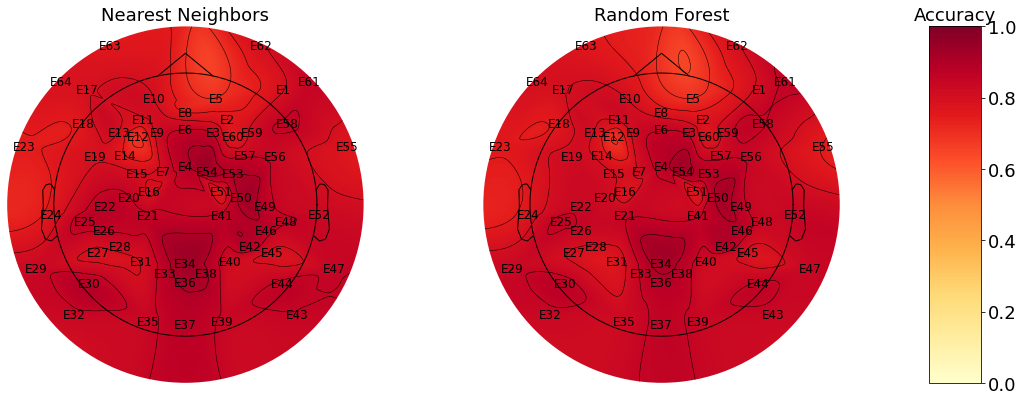

In [6]:
# KNN and random forest
values1 = np.array(chan_wise_score_part.iloc[0, :][1:])
values2 = np.array(chan_wise_score_part.iloc[3, :][1:])

fig, ax = plt.subplots(1, 3, gridspec_kw=dict(width_ratios=[8, 8, 1]), figsize=(18, 6))


mne.viz.plot_topomap(values1, info, ch_type="eeg", res=5000, axes=ax[0], names=channels, show=False,
                     contours=6, cmap="YlOrRd", vlim=(0, 1))
ax[0].set_title('Nearest Neighbors')


mne.viz.plot_topomap(values2, info, ch_type="eeg", res=5000, axes=ax[1], names=channels, show=False,
                     contours=6, cmap="YlOrRd", vlim=(0, 1))
ax[1].set_title('Random Forest')

plt.colorbar(ScalarMappable(None, cmap="YlOrRd"), cax=ax[2])
ax[2].set_title('Accuracy')

for tt in plt.findobj(fig, matplotlib.text.Text):
    if "E" in tt.get_text():
        tt.set_fontsize(12)
    else:
        tt.set_fontsize(18)


plt.savefig("/mnt/sda1/shivam/DrummingEEG/FullStudyData/images/topomap_electrodewise_part.png")
    
plt.show()

## Frequency-wise participant classification from spectopo

In [19]:
os.chdir("/mnt/sda1/shivam/DrummingEEG/FullStudyData/Preprocessed/spectopov2")
processed = glob.glob("*.mat")
len(processed), processed

(510,
 ['Drum13_drum04part01_1_4_clean_spec.mat',
  'Drum06_drum10_2_8_clean_spec.mat',
  'Drum09_drum07_1_3_clean_spec.mat',
  'Drum05_drum04part01_2_7_clean_spec.mat',
  'Drum10_drum10_1_5_clean_spec.mat',
  'Drum02_drum01part01_1_8_clean_spec.mat',
  'Subj4_drum05_1_2_clean_spec.mat',
  'Drum13_drum03_2_5_clean_spec.mat',
  'Subj2_drum04part01_1_7_clean_spec.mat',
  'Drum15_mix_2_3_clean_spec.mat',
  'Drum13_drum08_2_3_clean_spec.mat',
  'Drum06_mix_2_2_clean_spec.mat',
  'Drum11_drum04part02_1_6_clean_spec.mat',
  'Drum01_drum05_1_8_clean_spec.mat',
  'Subj4_drum06_1_8_clean_spec.mat',
  'Drum08_drum07_1_5_clean_spec.mat',
  'Drum14_drum04part01_1_6_clean_spec.mat',
  'Drum11_drum11_2_6_clean_spec.mat',
  'Drum10_drum11_2_6_clean_spec.mat',
  'Drum08_drum08_1_5_clean_spec.mat',
  'Drum15_drum05_1_3_clean_spec.mat',
  'Drum08_drum11_1_6_clean_spec.mat',
  'Drum13_drum10_2_2_clean_spec.mat',
  'Drum07_mix_rev_2_3_clean_spec.mat',
  'Drum10_drum07_1_4_clean_spec.mat',
  'Drum05_drum05

In [ ]:
# Participant classification (not drumming)
X, y = [], []
for mat in processed:
#     print(mat)
    data = loadmat(mat)["spectra"]
    data = np.expand_dims(data, 3)
    if len(X) > 0:
        X = np.concatenate((X, data))
    else:
        X = data
    label = mat.split("_")[0]
    y += [label]* data.shape[0] 
    
    print(X.shape, len(y))
    assert(X.shape[0] == len(y)), mat

(453, 64, 501, 1) 453
(906, 64, 501, 1) 906
(1359, 64, 501, 1) 1359
(1812, 64, 501, 1) 1812
(2265, 64, 501, 1) 2265
(2719, 64, 501, 1) 2719
(3172, 64, 501, 1) 3172
(3625, 64, 501, 1) 3625
(4078, 64, 501, 1) 4078
(4531, 64, 501, 1) 4531
(4984, 64, 501, 1) 4984
(5437, 64, 501, 1) 5437
(5890, 64, 501, 1) 5890
(6344, 64, 501, 1) 6344
(6797, 64, 501, 1) 6797
(7250, 64, 501, 1) 7250
(7703, 64, 501, 1) 7703
(8156, 64, 501, 1) 8156
(8609, 64, 501, 1) 8609
(9062, 64, 501, 1) 9062
(9515, 64, 501, 1) 9515
(9968, 64, 501, 1) 9968
(10422, 64, 501, 1) 10422
(10875, 64, 501, 1) 10875
(11328, 64, 501, 1) 11328
(11781, 64, 501, 1) 11781
(12234, 64, 501, 1) 12234
(12688, 64, 501, 1) 12688
(13141, 64, 501, 1) 13141
(13594, 64, 501, 1) 13594
(14048, 64, 501, 1) 14048
(14502, 64, 501, 1) 14502
(14955, 64, 501, 1) 14955
(15408, 64, 501, 1) 15408
(15861, 64, 501, 1) 15861
(16314, 64, 501, 1) 16314
(16768, 64, 501, 1) 16768
(17221, 64, 501, 1) 17221
(17674, 64, 501, 1) 17674
(18127, 64, 501, 1) 18127
(18581, 

In [ ]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit(y)
yt = le.transform(y)
yt, np.unique(yt)

In [ ]:
# https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import cross_val_score

In [ ]:
# source : https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html

clfs = [
    KNeighborsClassifier(2),
    # SVC(kernel="linear", C=0.025),
#     SVC(gamma=2, C=1),
    # GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=200),
    RandomForestClassifier(max_depth=200, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()
]

names = [
    "Nearest Neighbors",
    # "Linear SVM",
#     "RBF SVM",
    # "Gaussian Process",
    "Decision Tree",
    "Random Forest",
    "Neural Net",
    "AdaBoost",
    "Naive Bayes",
    "QDA",
]


In [ ]:
from joblib import parallel_backend
with parallel_backend('threading', n_jobs=5):
    # Chance: 100/15 ~ 6.66%
    scores_freq_spectopo = {}
    for freq in range(501):
        Xc, yc = X[:, :, freq, 0], y
        X_train, X_eval, y_train, y_eval = train_test_split(Xc, yc, test_size=0.2, random_state=42)

        print("\n Frequency: ", freq)
        scores_freq_spectopo[freq] = []
        for idx, clf in enumerate(clfs):
            clf.fit(X_train, y_train)
            score = clf.score(X_eval, y_eval)
            scores_freq_spectopo[freq].append(score)
            print(clfs[idx], ": ", score)

In [ ]:
scores_df = pd.DataFrame(scores_freq_spectopo, columns=list(range(501)), index=names)
os.chdir("/mnt/sda1/shivam/DrummingEEG/FullStudyData/Results")
scores_df.to_csv("scores_freq_wise_spectopo_part.csv", index=True)

In [10]:
os.chdir("/mnt/sda1/shivam/DrummingEEG/FullStudyData/Results")
chan_wise_score_part = pd.read_csv("scores_chan_wise_spectopo_part.csv")
chan_wise_score_part

Unnamed: 0    0    1    2    3    4    5    6    7    8  ...   54  \
0  Nearest Neighbors 1.00 0.99 1.00 1.00 1.00 1.00 1.00 1.00 1.00  ... 1.00   
1      Decision Tree 0.99 0.98 0.99 0.99 0.96 0.99 0.99 0.97 0.98  ... 0.98   
2      Random Forest 0.80 0.80 0.81 0.81 0.76 0.81 0.79 0.78 0.82  ... 0.80   
3         Neural Net 0.99 0.98 0.99 0.98 0.96 0.98 0.98 0.97 0.98  ... 0.96   
4           AdaBoost 0.26 0.23 0.28 0.17 0.24 0.21 0.18 0.18 0.23  ... 0.09   
5        Naive Bayes 0.78 0.78 0.80 0.89 0.74 0.86 0.84 0.79 0.85  ... 0.78   
6                QDA 0.98 0.96 0.98 0.99 0.93 0.97 0.99 0.94 0.95  ... 0.97   

    55   56   57   58   59   60   61   62   63  
0 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00  
1 0.99 0.99 0.99 0.99 0.98 0.99 0.99 0.99 0.99  
2 0.83 0.81 0.80 0.82 0.81 0.77 0.74 0.74 0.77  
3 0.98 0.97 0.96 0.97 0.97 0.97 0.98 0.97 0.97  
4 0.12 0.30 0.11 0.15 0.24 0.27 0.26 0.18 0.18  
5 0.70 0.78 0.72 0.74 0.73 0.74 0.74 0.76 0.73  
6 0.97 0.97 0.96 0.97 0.97 0.98 0.98 0.98 0.98  

[7 rows x 65 columns]

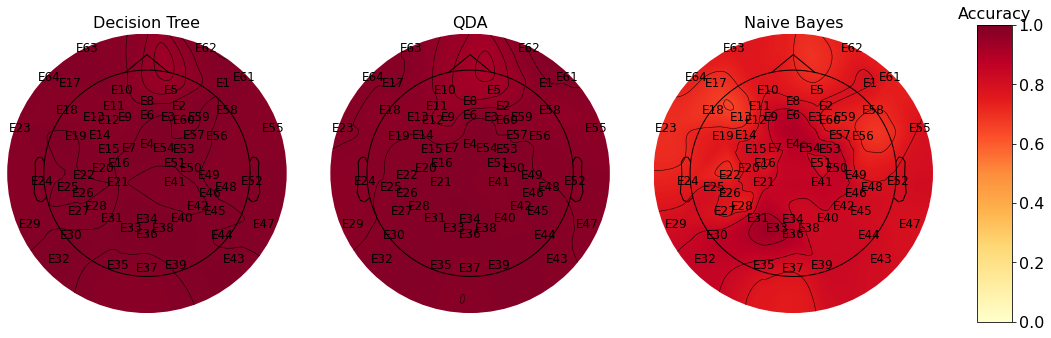

In [12]:
# Decision tree, QDA, neural network
class_idx = [1, 6, 5]

values1 = np.array(chan_wise_score_part.iloc[class_idx[0], :][1:])
values2 = np.array(chan_wise_score_part.iloc[class_idx[1], :][1:])
values3 = np.array(chan_wise_score_part.iloc[class_idx[2], :][1:])

fig, ax = plt.subplots(1, 4, gridspec_kw=dict(width_ratios=[8, 8, 8, 1]), figsize=(18, 5))


mne.viz.plot_topomap(values1, info, ch_type="eeg", res=5000, axes=ax[0], names=channels, show=False,
                     contours=4,cmap="YlOrRd", vlim=(0, 1))
ax[0].set_title('Decision Tree')


mne.viz.plot_topomap(values2, info, ch_type="eeg", res=5000, axes=ax[1], names=channels, show=False,
                     contours=4,cmap="YlOrRd", vlim=(0, 1))
ax[1].set_title('QDA')

mne.viz.plot_topomap(values3, info, ch_type="eeg", res=5000, axes=ax[2], names=channels, show=False,
                     contours=4,cmap="YlOrRd", vlim=(0, 1))
ax[2].set_title('Naive Bayes')

plt.colorbar(ScalarMappable(None, cmap="YlOrRd"), cax=ax[3])
ax[3].set_title('Accuracy')

for tt in plt.findobj(fig, matplotlib.text.Text):
    if "E" in tt.get_text():
        tt.set_fontsize(12)
    else:
        tt.set_fontsize(16)


plt.savefig("/mnt/sda1/shivam/DrummingEEG/FullStudyData/images/topomap_electrodewise_spectopo_part.png")
    
plt.show()